In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obfuscated-malware-memory-2022-cic/Obfuscated-MalMem2022.csv


In [2]:
!pip install compress_pickle
from compress_pickle import dump, load

In [3]:
import warnings
import re
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import matplotlib.lines as mlines
from colorama import Fore
from colorama import Style
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

In [4]:
data = pd.read_csv('/kaggle/input/obfuscated-malware-memory-2022-cic/Obfuscated-MalMem2022.csv')

In [5]:
data.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  48.300000             11529                    288.225000   
3                  45.156250              8457                    264.281250   
4                  49.214286             11816                    281.333333   

   handles.nport  handles.nfile  handles.nevent  handles.ndesktop  \
0              0            670            3161                46   
1              0            840            3761                51   
2              0           1050            3996                45   
3              0            630            2961                36   
4              0            908            3834                45   

   handles.nkey  handles.nthread  handles.ndirectory  handles.nsemaphore  \
0           716              887                 104                 671   
1          1011             1030                 117                 766   
2           784             1241                 100                 645   
3           654              792                  83                 567   
4          1252              942                 103                 825   

   handles.ntimer  handles.nsection  handles.nmutant  ldrmodules.not_in_load  \
0             125               184              257                      53   
1             148               337              394                      77   
2             138               369              338                      51   
3             127               186              242                      31   
4             135               375              429                     102   

   ldrmodules.not_in_init  ldrmodules.not_in_mem  ldrmodules.not_in_load_avg  \
0                      95                     53                    0.030372   
1                     123                     77                    0.036167   
2                      89                     51                    0.026114   
3                      62                     31                    0.021483   
4                     143                    102                    0.047820   

   ldrmodules.not_in_init_avg  ldrmodules.not_in_mem_avg  malfind.ninjections  \
0                    0.054441                   0.030372                    5   
1                    0.057774                   0.036167                   12   
2                    0.045571                   0.026114                    5   
3                    0.042966                   0.021483                    2   
4                    0.067042                   0.047820                   12   

   malfind.commitCharge  malfind.protection  malfind.uniqueInjections  \
0                    21                  30                  1.250000   
1                    77                  72                  1.714286   
2                     6                  30                  1.250000   
3                     2                  12                  1.000000   
4                    77                  72                  2.000000   

   psxview.not_in_psl

# Data Observation

In [6]:
print('Number of columns')
print()
print(len(data.columns))
print()
print('Name of columns')
print()
print(data.columns)
print()
print('type of columns')
print()
print(data.dtypes)
print()
print('number of rows')
print()
print(data.shape[0]) 

Number of columns

57

Name of columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session',

In [7]:
print(data['Class'].unique())
print(data['Category'].unique())

['Benign' 'Malware']
['Benign'
 'Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-1.raw'
 'Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-10.raw'
 ...
 'Ransomware-Shade-faddeea111a25da4d0888f3044ae9555f0c55517f6226b30e521008fceda6bbf-7.raw'
 'Ransomware-Shade-f866c086af2e1d8ebaa6f2c8631578896768285120b57ddd43453bdebb217ab1-10.raw'
 'Ransomware-Shade-955d9af38346c1755527bd196668edfad6d3f001d217b04d2380eb99e0760585-8.raw']


Voir si il y a des valeurs manquantes.

In [8]:
dfs = [data]
for df in dfs:
  print()
  for c in df.columns:
    wtf = ""
    nulls = df[c].isnull().sum()
    ratio = nulls/len(df)

    if ratio > 0.1:
      print(wtf + c + " : "  + str(nulls) + f" nulls, ratio : {Fore.RED}" + str(round(ratio*100,2)) + f"%{Style.RESET_ALL} de nulls")
    else:
      print(wtf + c + " : "  + str(nulls) + " nulls, ratio : " + str(round(ratio*100,2)) + "% de nulls")


Category : 0 nulls, ratio : 0.0% de nulls
pslist.nproc : 0 nulls, ratio : 0.0% de nulls
pslist.nppid : 0 nulls, ratio : 0.0% de nulls
pslist.avg_threads : 0 nulls, ratio : 0.0% de nulls
pslist.nprocs64bit : 0 nulls, ratio : 0.0% de nulls
pslist.avg_handlers : 0 nulls, ratio : 0.0% de nulls
dlllist.ndlls : 0 nulls, ratio : 0.0% de nulls
dlllist.avg_dlls_per_proc : 0 nulls, ratio : 0.0% de nulls
handles.nhandles : 0 nulls, ratio : 0.0% de nulls
handles.avg_handles_per_proc : 0 nulls, ratio : 0.0% de nulls
handles.nport : 0 nulls, ratio : 0.0% de nulls
handles.nfile : 0 nulls, ratio : 0.0% de nulls
handles.nevent : 0 nulls, ratio : 0.0% de nulls
handles.ndesktop : 0 nulls, ratio : 0.0% de nulls
handles.nkey : 0 nulls, ratio : 0.0% de nulls
handles.nthread : 0 nulls, ratio : 0.0% de nulls
handles.ndirectory : 0 nulls, ratio : 0.0% de nulls
handles.nsemaphore : 0 nulls, ratio : 0.0% de nulls
handles.ntimer : 0 nulls, ratio : 0.0% de nulls
handles.nsection : 0 nulls, ratio : 0.0% de nulls
h

Voir si il y a des colonnes où la même valeur se répète.

In [9]:
features_name = list(data.columns)

for element in features_name:
    if(len(data[element].unique()) < 2):
      print(element)
      print()
      print(data[element].unique())
      print()

pslist.nprocs64bit

[0]

handles.nport

[0]

svcscan.interactive_process_services

[0]



On supprime les colonnes comportant uniquement une valeur car elles ne nous apportent rien comme information.

In [10]:
del data['pslist.nprocs64bit']
del data['handles.nport']
del data['svcscan.interactive_process_services']

In [11]:
data

Category  pslist.nproc  \
0                                                 Benign            45   
1                                                 Benign            47   
2                                                 Benign            40   
3                                                 Benign            32   
4                                                 Benign            42   
...                                                  ...           ...   
58591  Ransomware-Shade-fa03be3078d1b9840f06745f160eb...            37   
58592  Ransomware-Shade-f56687137caf9a67678cde91e4614...            37   
58593  Ransomware-Shade-faddeea111a25da4d0888f3044ae9...            38   
58594  Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...            37   
58595  Ransomware-Shade-955d9af38346c1755527bd196668e...            38   

       pslist.nppid  pslist.avg_threads  pslist.avg_handlers  dlllist.ndlls  \
0                17           10.555556           202.844444           1694   
1                19           11.531915           242.234043           2074   
2                14           14.725000           288.225000           1932   
3                13           13.500000           264.281250           1445   
4                16           11.452381           281.333333           2067   
...             ...                 ...                  ...            ...   
58591            15           10.108108           215.486487           1453   
58592            14            9.945946           190.216216           1347   
58593            15            9.842105           210.026316           1448   
58594            15           10.243243           215.513513           1452   
58595            15            9.868421           213.026316           1487   

       dlllist.avg_dlls_per_proc  handles.nhandles  \
0                      38.500000              9129   
1                      44.127660             11385   
2                      48.300000             11529   
3                      45.156250              8457   
4                      49.214286             11816   
...                          ...               ...   
58591                  39.270270              7973   
58592                  36.405405              7038   
58593                  38.105263              7982   
58594                  39.243243              7974   
58595                  39.131579              8095   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
0                        212.302326            670            3161   
1                        242.234043            840            3761   
2                        288.225000           1050            3996   
3                        264.281250            630            2961   
4                        281.333333            908            3834   
...                             ...            ...             ...   
58591                    215.486487            630            2819   
58592                    190.216216            603            2394   
58593                    215.729730            624            2816   
58594                    215.513513            632            2819   
58595                    213.026316            637            2843   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
0                    46           716              887                 104   
1                    51          1011             1030                 117   
2                    45           784             1241                 100   
3                    36           654              792                  83   
4                    45          1252              942                 103   
...                 ...           ...              ...                 ...   
58591                40           668              664                  92   
58592                39           555              624                  91   
58593             

# Begnign and fraud data (2-class classification)

In [12]:
isBenign_data = data.loc[data['Category'] == 'Benign']

In [13]:
isFraud_data = data.loc[data['Category'] != 'Benign']

In [14]:
print(data.shape[0])
print(isBenign_data.shape[0] + isFraud_data.shape[0])

58596
58596


# 4-class classification

In [15]:
isBenign_data = data.loc[data['Category'] == 'Benign']

In [16]:
Dataframe_Ransomware = pd.DataFrame()
Dataframe_Spyware = pd.DataFrame()
Dataframe_Trojan = pd.DataFrame()

list = data['Category'].unique()

In [17]:
for element in list:
    z_Ransomware = re.match("(Ransomware\S*)",element)
    
    if z_Ransomware:
        value =  ''.join(z_Ransomware.groups(1))
        value = value.replace("(","").replace(")","")
        colonne = data.loc[data['Category'] == value]
        Dataframe_Ransomware = Dataframe_Ransomware.append(colonne)
        
Dataframe_Ransomware.loc[Dataframe_Ransomware['Class'] == 'Malware', 'Class'] = 'Malware_Ransomware'
        
Dataframe_Ransomware.head()        

Category  pslist.nproc  \
29298  Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd29...            39   
29299  Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd29...            37   
29300  Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd29...            39   
29301  Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd29...            41   
29302  Ransomware-Ako-00a2c6bab1e53f679cdd4fdc772cd29...            40   

       pslist.nppid  pslist.avg_threads  pslist.avg_handlers  dlllist.ndlls  \
29298            15           11.410256           220.589744           1562   
29299            15           10.135135           214.648649           1445   
29300            15           10.743590           217.410256           1551   
29301            16           10.121951           210.170732           1614   
29302            16            9.875000           208.650000           1556   

       dlllist.avg_dlls_per_proc  handles.nhandles  \
29298                  40.051282              8603   
29299                  39.054054              7942   
29300                  39.769231              8479   
29301                  39.365854              8617   
29302                  38.900000              8346   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
29298                    220.589744            646            3000   
29299                    214.648649            630            2809   
29300                    217.410256            646            2962   
29301                    210.170732            649            3006   
29302                    208.650000            646            2923   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
29298                42           654              829                  99   
29299                40           666              662                  92   
29300                42           654              776                  99   
29301                44           668              759                 103   
29302                43           663              709                 101   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
29298                 640             120               176              259   
29299                 594             113               160              230   
29300                 634             120               176              259   
29301                 643             126               180              267   
29302                 606             123               177              262   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
29298                      47                      85                     47   
29299                      42                      78                     42   
29300                      47                      85                     47   
29301                      46                      86                     46   
29302                      45                      84                     45   

       ldrmodules.not_in_load_avg  ldrmodules.not_in_init_avg  \
29298                    0.029229                    0.052861   
29299                    0.028826                    0.053535   
29300                    0.029430                    0.053225   
29301                    0.027728                    0.051838   
29302                    0.028160                    0.052566   

       ldrmodules.not_in_mem_avg  malfind.ninjections  malfind.commitCharge  \
29298                   0.029229                    3                     3   
29299                   0.028826                    3                     3   
29300                   0.029430                    3                     3   
29301                   0.027728                    3                     3   
29302                   0.028160                    3                     3   

       malfind.protection  malfind.uniqueInjections  psxview.not_in_pslist  \
29298  

In [18]:
for element in list:
    z_Ransomware = re.match("(Spyware\S*)",element)
    
    if z_Ransomware:
        value =  ''.join(z_Ransomware.groups(1))
        value = value.replace("(","").replace(")","")
        colonne = data.loc[data['Category'] == value]
        Dataframe_Spyware = Dataframe_Spyware.append(colonne)
    
Dataframe_Spyware.loc[Dataframe_Spyware['Class'] == 'Malware', 'Class'] = 'Malware_Spyware'
    
Dataframe_Spyware.head()

Category  pslist.nproc  \
35389  Spyware-180solutions-00a80e2e0f0f72ba202536615...            39   
35390  Spyware-180solutions-00a80e2e0f0f72ba202536615...            37   
35391  Spyware-180solutions-00a80e2e0f0f72ba202536615...            39   
35392  Spyware-180solutions-00a80e2e0f0f72ba202536615...            41   
35393  Spyware-180solutions-00a80e2e0f0f72ba202536615...            40   

       pslist.nppid  pslist.avg_threads  pslist.avg_handlers  dlllist.ndlls  \
35389            15           11.410256           220.769231           1563   
35390            15           10.135135           214.918919           1446   
35391            15           10.717949           217.641026           1552   
35392            16           10.073171           210.097561           1615   
35393            16            9.850000           208.550000           1557   

       dlllist.avg_dlls_per_proc  handles.nhandles  \
35389                  40.076923              8610   
35390                  39.081081              7952   
35391                  39.794872              8488   
35392                  39.390244              8614   
35393                  38.925000              8342   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
35389                    220.769231            642            3003   
35390                    214.918919            626            2812   
35391                    217.641026            642            2967   
35392                    210.097561            645            3006   
35393                    208.550000            642            2921   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
35389                42           656              830                  99   
35390                40           668              663                  92   
35391                42           656              777                  99   
35392                44           670              754                 103   
35393                43           665              703                 101   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
35389                 640             120               177              259   
35390                 594             113               162              230   
35391                 634             120               177              259   
35392                 643             126               181              267   
35393                 606             123               178              262   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
35389                      47                      85                     47   
35390                      42                      78                     42   
35391                      47                      85                     47   
35392                      46                      86                     46   
35393                      45                      84                     45   

       ldrmodules.not_in_load_avg  ldrmodules.not_in_init_avg  \
35389                    0.029211                    0.052828   
35390                    0.028846                    0.053571   
35391                    0.029412                    0.053191   
35392                    0.027711                    0.051807   
35393                    0.028125                    0.052500   

       ldrmodules.not_in_mem_avg  malfind.ninjections  malfind.commitCharge  \
35389                   0.029211                    3                     3   
35390                   0.028846                    3                     3   
35391                   0.029412                    3                     3   
35392                   0.027711                    3                     3   
35393                   0.028125                    3                     3   

       malfind.protection  malfind.uniqueInjections  psxview.not_in_pslist  \
35389  

In [19]:
for element in list:
    z_Ransomware = re.match("(Trojan\S*)",element)
    
    if z_Ransomware:
        value =  ''.join(z_Ransomware.groups(1))
        value = value.replace("(","").replace(")","")
        colonne = data.loc[data['Category'] == value]
        Dataframe_Trojan = Dataframe_Trojan.append(colonne)
        
Dataframe_Trojan.loc[Dataframe_Trojan['Class'] == 'Malware', 'Class'] = 'Malware_Trojan'
        
Dataframe_Trojan.head()

Category  pslist.nproc  \
45409  Trojan-Emotet-001ef4cc95a83b911b3e98dde1d1a77f...            42   
45410  Trojan-Emotet-001ef4cc95a83b911b3e98dde1d1a77f...            40   
45411  Trojan-Emotet-001ef4cc95a83b911b3e98dde1d1a77f...            42   
45412  Trojan-Emotet-001ef4cc95a83b911b3e98dde1d1a77f...            44   
45413  Trojan-Emotet-001ef4cc95a83b911b3e98dde1d1a77f...            44   

       pslist.nppid  pslist.avg_threads  pslist.avg_handlers  dlllist.ndlls  \
45409            16           10.738095           209.214286           1621   
45410            16            9.525000           204.175000           1504   
45411            16           10.023810           206.261905           1610   
45412            17            9.590909           200.795455           1674   
45413            17            9.250000           198.500000           1665   

       dlllist.avg_dlls_per_proc  handles.nhandles  \
45409                  38.595238              8787   
45410                  37.600000              8167   
45411                  38.333333              8663   
45412                  38.045455              8835   
45413                  37.840909              8734   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
45409                    209.214286            667            3057   
45410                    204.175000            650            2871   
45411                    206.261905            667            3021   
45412                    200.795455            671            3076   
45413                    198.500000            671            3041   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
45409                45           679              839                 105   
45410                43           692              705                  98   
45411                45           679              786                 105   
45412                47           694              783                 109   
45413                47           694              743                 109   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
45409                 648             120               178              261   
45410                 604             113               162              232   
45411                 642             120               178              261   
45412                 653             126               182              269   
45413                 650             126               182              269   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
45409                      51                      92                     51   
45410                      47                      86                     47   
45411                      51                      92                     51   
45412                      51                      94                     51   
45413                      50                      93                     50   

       ldrmodules.not_in_load_avg  ldrmodules.not_in_init_avg  \
45409                    0.030521                    0.055057   
45410                    0.030901                    0.056542   
45411                    0.030723                    0.055422   
45412                    0.029582                    0.054524   
45413                    0.029206                    0.054322   

       ldrmodules.not_in_mem_avg  malfind.ninjections  malfind.commitCharge  \
45409                   0.030521                    4                     4   
45410                   0.030901                    4                     4   
45411                   0.030723                    4                     4   
45412                   0.029582                    4                     4   
45413                   0.029206                    4                     4   

       malfind.protection  malfind.uniqueInjections  psxview.not_in_pslist  \
45409  

In [20]:
print(isFraud_data.shape[0])
print(Dataframe_Trojan.shape[0] + Dataframe_Spyware.shape[0] + Dataframe_Ransomware.shape[0])

29298
29298


In [21]:
data_4class = Dataframe_Ransomware.append(Dataframe_Spyware)
data_4class = data_4class.append(Dataframe_Trojan)
data_4class = data_4class.append(isBenign_data)

print(data_4class.shape[0])

58596


# 1hot la partie Class + supp category

## FOR 2-CLASS

In [22]:
X = pd.DataFrame(data)
Y = X['Class']
#Y = pd.get_dummies(Y)
del X['Class']
del X['Category']
# X = pd.concat([X,Y], axis=1)
X.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0            45            17           10.555556           202.844444   
1            47            19           11.531915           242.234043   
2            40            14           14.725000           288.225000   
3            32            13           13.500000           264.281250   
4            42            16           11.452381           281.333333   

   dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0           1694                  38.500000              9129   
1           2074                  44.127660             11385   
2           1932                  48.300000             11529   
3           1445                  45.156250              8457   
4           2067                  49.214286             11816   

   handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
0                    212.302326            670            3161   
1                    242.234043            840            3761   
2                    288.225000           1050            3996   
3                    264.281250            630            2961   
4                    281.333333            908            3834   

   handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
0                46           716              887                 104   
1                51          1011             1030                 117   
2                45           784             1241                 100   
3                36           654              792                  83   
4                45          1252              942                 103   

   handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
0                 671             125               184              257   
1                 766             148               337              394   
2                 645             138               369              338   
3                 567             127               186              242   
4                 825             135               375              429   

   ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
0                      53                      95                     53   
1                      77                     123                     77   
2                      51                      89                     51   
3                      31                      62                     31   
4                     102                     143                    102   

   ldrmodules.not_in_load_avg  ldrmodules.not_in_init_avg  \
0                    0.030372                    0.054441   
1                    0.036167                    0.057774   
2                    0.026114                    0.045571   
3                    0.021483                    0.042966   
4                    0.047820                    0.067042   

   ldrmodules.not_in_mem_avg  malfind.ninjections  malfind.commitCharge  \
0                   0.030372                    5                    21   
1                   0.036167                   12                    77   
2                   0.026114                    5                     6   
3                   0.021483                    2                     2   
4                   0.047820                   12                    77   

   malfind.protection  malfind.uniqueInjections  psxview.not_in_pslist  \
0                  30                  1.250000                      2   
1                  72                  1.714286                      0   
2                  30                  1.250000                      0   
3                  12                  1.000000                      0   
4                  72                  2.000000                      4   

   psxview.not_in_eprocess_pool  psxview.not_in_ethread_pool  \
0                             0                            3   
1                   

## FOR 4-CLASS

In [23]:
X_4class = pd.DataFrame(data_4class)
Y_4class = X_4class['Class']
#Y = pd.get_dummies(Y)
del X_4class['Class']
del X_4class['Category']
# X = pd.concat([X,Y], axis=1)
X_4class.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
29298            39            15           11.410256           220.589744   
29299            37            15           10.135135           214.648649   
29300            39            15           10.743590           217.410256   
29301            41            16           10.121951           210.170732   
29302            40            16            9.875000           208.650000   

       dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
29298           1562                  40.051282              8603   
29299           1445                  39.054054              7942   
29300           1551                  39.769231              8479   
29301           1614                  39.365854              8617   
29302           1556                  38.900000              8346   

       handles.avg_handles_per_proc  handles.nfile  handles.nevent  \
29298                    220.589744            646            3000   
29299                    214.648649            630            2809   
29300                    217.410256            646            2962   
29301                    210.170732            649            3006   
29302                    208.650000            646            2923   

       handles.ndesktop  handles.nkey  handles.nthread  handles.ndirectory  \
29298                42           654              829                  99   
29299                40           666              662                  92   
29300                42           654              776                  99   
29301                44           668              759                 103   
29302                43           663              709                 101   

       handles.nsemaphore  handles.ntimer  handles.nsection  handles.nmutant  \
29298                 640             120               176              259   
29299                 594             113               160              230   
29300                 634             120               176              259   
29301                 643             126               180              267   
29302                 606             123               177              262   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
29298                      47                      85                     47   
29299                      42                      78                     42   
29300                      47                      85                     47   
29301                      46                      86                     46   
29302                      45                      84                     45   

       ldrmodules.not_in_load_avg  ldrmodules.not_in_init_avg  \
29298                    0.029229                    0.052861   
29299                    0.028826                    0.053535   
29300                    0.029430                    0.053225   
29301                    0.027728                    0.051838   
29302                    0.028160                    0.052566   

       ldrmodules.not_in_mem_avg  malfind.ninjections  malfind.commitCharge  \
29298                   0.029229                    3                     3   
29299                   0.028826                    3                     3   
29300                   0.029430                    3                     3   
29301                   0.027728                    3                     3   
29302                   0.028160                    3                     3   

       malfind.protection  malfind.uniqueInjections  psxview.not_in_pslist  \
29298                  18                       1.0                      4   
29299                  18                       1.0                      0   
29300                  18                       1.0                      4   
29301                  18                       1.0                      4   
29302          

## LOFO Method

In [24]:
!pip install lofo-importance

In [25]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset

X_dataset = Dataset(df=pd.concat([X,Y], axis=1), target="Class", features=[col for col in X.columns])

cv = KFold(n_splits=4, shuffle=True, random_state=42)

lofo = LOFOImportance(X_dataset, scoring="roc_auc", cv=cv)

importance_df = lofo.get_importance()

  0%|          | 0/52 [00:00<?, ?it/s]

In [26]:
importance_df

feature  importance_mean  importance_std  \
47                          handles.nevent     2.842596e-06    4.923521e-06   
40                svcscan.process_services     8.900597e-07    1.530884e-06   
43                           dlllist.ndlls     6.570591e-07    1.138060e-06   
5                           handles.ntimer     5.685192e-07    9.847041e-07   
23                  ldrmodules.not_in_init     5.079393e-07    8.797767e-07   
1                     malfind.commitCharge     4.706593e-07    8.152059e-07   
7                 malfind.uniqueInjections     3.960994e-07    6.860644e-07   
36                            handles.nkey     3.867795e-07    6.699217e-07   
46               dlllist.avg_dlls_per_proc     3.681395e-07    6.376363e-07   
22                         handles.nthread     3.541595e-07    6.134223e-07   
4                       handles.nsemaphore     3.355195e-07    5.811369e-07   
20                    callbacks.ncallbacks     3.215427e-07    4.935839e-07   
39                 psxview.not_in_deskthrd     2.609596e-07    4.519953e-07   
31              ldrmodules.not_in_init_avg     2.516396e-07    4.358527e-07   
16         svcscan.shared_process_services     1.863997e-07    3.228538e-07   
27        psxview.not_in_session_false_avg     1.724198e-07    2.986398e-07   
33                      handles.ndirectory     1.537798e-07    2.663544e-07   
28   psxview.not_in_ethread_pool_false_avg     1.351398e-07    2.340690e-07   
34                            pslist.nppid     1.258198e-07    2.179263e-07   
0                            handles.nfile     7.921989e-08    1.372129e-07   
51              ldrmodules.not_in_load_avg     7.455990e-08    1.291415e-07   
38                        handles.ndesktop     6.057991e-08    1.049275e-07   
3                         handles.nhandles     5.125993e-08    8.878480e-08   
29                         svcscan.nactive     4.194038e-08    6.234630e-08   
15    psxview.not_in_pspcid_list_false_avg     2.775558e-17    4.807407e-17   
13               ldrmodules.not_in_mem_avg     2.775558e-17    4.807407e-17   
21             psxview.not_in_ethread_pool     0.000000e+00    0.000000e+00   
37            psxview.not_in_csrss_handles     0.000000e+00    0.000000e+00   
50                      svcscan.fs_drivers     0.000000e+00    0.000000e+00   
49         psxview.not_in_pslist_false_avg     0.000000e+00    7.850462e-17   
48                   ldrmodules.not_in_mem     0.000000e+00    0.000000e+00   
2                         modules.nmodules     0.000000e+00    0.000000e+00   
44                      callbacks.ngeneric     0.000000e+00    0.000000e+00   
6                   svcscan.kernel_drivers     0.000000e+00    0.000000e+00   
10                   psxview.not_in_pslist     0.000000e+00    0.000000e+00   
32                     malfind.ninjections     0.000000e+00    0.000000e+00   
14                  psxview.not_in_session     0.000000e+00    0.000000e+00   
24              psxview.not_in_pspcid_list     0.000000e+00    0.000000e+00   
17                    callbacks.nanonymous     0.000000e+00    0.000000e+00   
26  psxview.not_in_eprocess_pool_false_avg     0.000000e+00    0.000000e+00   
12            psxview.not_in_eprocess_pool     0.000000e+00    0.000000e+00   
30                  ldrmodules.not_in_load    -2.775558e-17    4.807407e-17   
9                       malfind.protection    -4.659993e-09    8.071345e-09   
25       psxview.not_in_deskthrd_false_avg    -9.319987e-09    1.614269e-08   
45                            pslist.nproc    -1.397998e-08    2.421404e-08   
8                       pslist.avg_threads    -1.863864e-08    6.848908e-08   
11                         handles.nmutant    -1.863997e-08    3.228538e-08   
42  psxview.not_in_csrss_handles_false_avg    -2.329997e-08    4.035673e-08   
41                       svcscan.nservices    -3.261962e-08    7.949383e-08   
18                        handles.nsection    -3.261995e-08    5.649942e-08   
19    

In [27]:
importance_df[['feature', 'importance_mean']][importance_df['importance_mean'] > 0]

feature  importance_mean
47                         handles.nevent     2.842596e-06
40               svcscan.process_services     8.900597e-07
43                          dlllist.ndlls     6.570591e-07
5                          handles.ntimer     5.685192e-07
23                 ldrmodules.not_in_init     5.079393e-07
1                    malfind.commitCharge     4.706593e-07
7                malfind.uniqueInjections     3.960994e-07
36                           handles.nkey     3.867795e-07
46              dlllist.avg_dlls_per_proc     3.681395e-07
22                        handles.nthread     3.541595e-07
4                      handles.nsemaphore     3.355195e-07
20                   callbacks.ncallbacks     3.215427e-07
39                psxview.not_in_deskthrd     2.609596e-07
31             ldrmodules.not_in_init_avg     2.516396e-07
16        svcscan.shared_process_services     1.863997e-07
27       psxview.not_in_session_false_avg     1.724198e-07
33                     handles.ndirectory     1.537798e-07
28  psxview.not_in_ethread_pool_false_avg     1.351398e-07
34                           pslist.nppid     1.258198e-07
0                           handles.nfile     7.921989e-08
51             ldrmodules.not_in_load_avg     7.455990e-08
38                       handles.ndesktop     6.057991e-08
3                        handles.nhandles     5.125993e-08
29                        svcscan.nactive     4.194038e-08
15   psxview.not_in_pspcid_list_false_avg     2.775558e-17
13              ldrmodules.not_in_mem_avg     2.775558e-17

In [28]:
features_to_delete = []
for feature in X.columns:
    if(feature not in importance_df['feature'][importance_df['importance_mean'] > 0].unique()):
        features_to_delete.append(feature)

In [29]:
features_to_delete

['pslist.nproc',
 'pslist.avg_threads',
 'pslist.avg_handlers',
 'handles.avg_handles_per_proc',
 'handles.nsection',
 'handles.nmutant',
 'ldrmodules.not_in_load',
 'ldrmodules.not_in_mem',
 'malfind.ninjections',
 'malfind.protection',
 'psxview.not_in_pslist',
 'psxview.not_in_eprocess_pool',
 'psxview.not_in_ethread_pool',
 'psxview.not_in_pspcid_list',
 'psxview.not_in_csrss_handles',
 'psxview.not_in_session',
 'psxview.not_in_pslist_false_avg',
 'psxview.not_in_eprocess_pool_false_avg',
 'psxview.not_in_csrss_handles_false_avg',
 'psxview.not_in_deskthrd_false_avg',
 'modules.nmodules',
 'svcscan.nservices',
 'svcscan.kernel_drivers',
 'svcscan.fs_drivers',
 'callbacks.nanonymous',
 'callbacks.ngeneric']

In [30]:
for feature in features_to_delete:
    del X[feature]
    del X_4class[feature]
    del data[feature]

In [31]:
X

pslist.nppid  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0                17           1694                  38.500000   
1                19           2074                  44.127660   
2                14           1932                  48.300000   
3                13           1445                  45.156250   
4                16           2067                  49.214286   
...             ...            ...                        ...   
58591            15           1453                  39.270270   
58592            14           1347                  36.405405   
58593            15           1448                  38.105263   
58594            15           1452                  39.243243   
58595            15           1487                  39.131579   

       handles.nhandles  handles.nfile  handles.nevent  handles.ndesktop  \
0                  9129            670            3161                46   
1                 11385            840            3761                51   
2                 11529           1050            3996                45   
3                  8457            630            2961                36   
4                 11816            908            3834                45   
...                 ...            ...             ...               ...   
58591              7973            630            2819                40   
58592              7038            603            2394                39   
58593              7982            624            2816                40   
58594              7974            632            2819                40   
58595              8095            637            2843                41   

       handles.nkey  handles.nthread  handles.ndirectory  handles.nsemaphore  \
0               716              887                 104                 671   
1              1011             1030                 117                 766   
2               784             1241                 100                 645   
3               654              792                  83                 567   
4              1252              942                 103                 825   
...             ...              ...                 ...                 ...   
58591           668              664                  92                 596   
58592           555              624                  91                 482   
58593           673              661                  92                 596   
58594           668              667                  92                 596   
58595           683              669                  94                 598   

       handles.ntimer  ldrmodules.not_in_init  ldrmodules.not_in_load_avg  \
0                 125                      95                    0.030372   
1                 148                     123                    0.036167   
2                 138                      89                    0.026114   
3                 127                      62                    0.021483   
4                 135                     143                    0.047820   
...               ...                     ...                         ...   
58591             113                      79                    0.029292   
58592             102                      79                    0.030958   
58593             113                      79                    0.029292   
58594             113                      79                    0.029392   
58595             116                      81                    0.029255   

       ldrmodules.not_in_init_avg  ldrmodules.not_in_mem_avg  \
0                        0.054441                   0.030372   
1                        0.057774                   0.036167   
2                        0.045571                   0.026114   
3                        0.042966                   0.021483   
4                        0.067042                   0.047820   
...                           ...          

# Build the correlation matrix

## Benign DATA

In [32]:
isBenign_data = X.loc[data['Category'] == 'Benign']

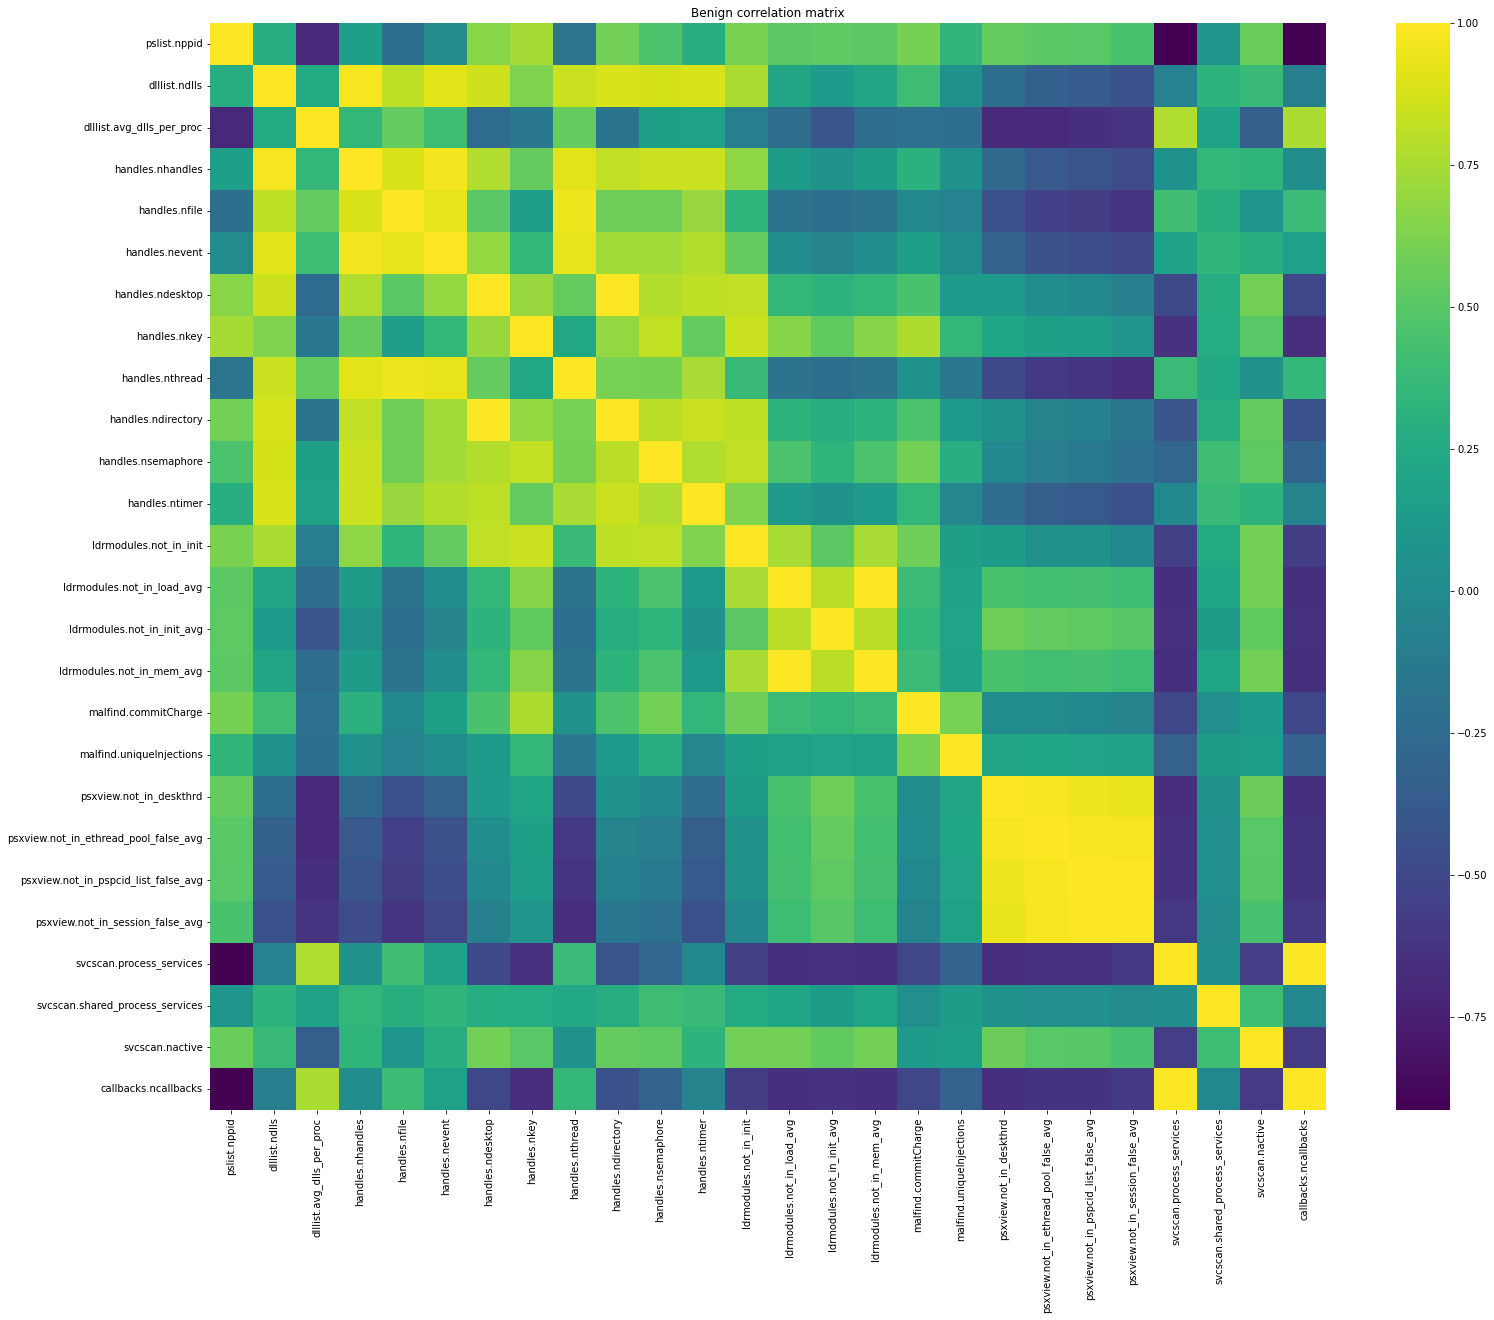

In [33]:
benign_corr = isBenign_data.corr()
fig, axs = plt.subplots(figsize=(25,20))
sns.heatmap(benign_corr,ax=axs,cmap=sns.color_palette("viridis", as_cmap=True))
plt.title("Benign correlation matrix")
plt.savefig("benign_corr.png", transparent = False)
plt.show()

## Fraud DATA

In [34]:
isFraud_data = X.loc[data['Category'] != 'Benign']

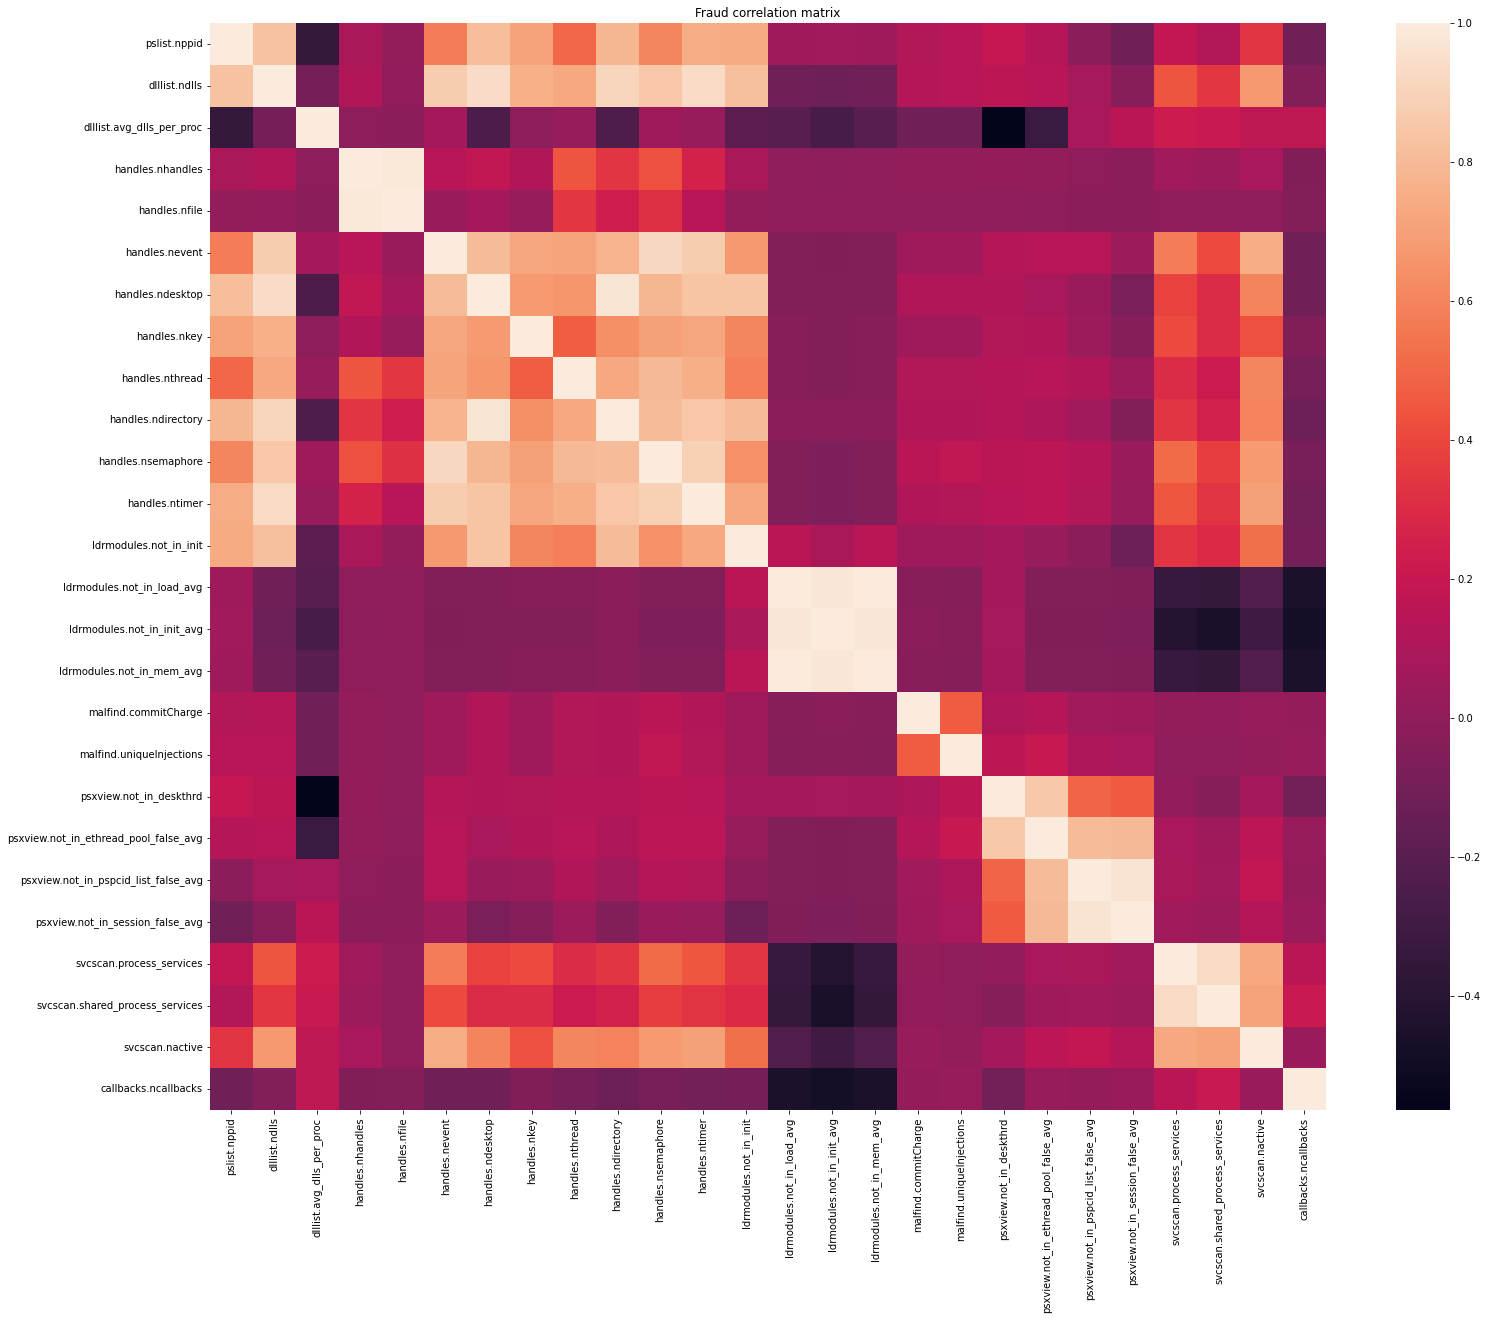

In [35]:
fraud_corr = isFraud_data.corr()
fig, axs = plt.subplots(figsize=(25,20))
sns.heatmap(fraud_corr,ax=axs)
plt.title("Fraud correlation matrix")
plt.savefig("fraud_corr.png")
plt.show()

# Test Algorithmes

In [36]:
%%capture
!pip install pretty-confusion-matrix

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support, balanced_accuracy_score \
                            ,matthews_corrcoef, average_precision_score, precision_recall_curve, auc, plot_precision_recall_curve \
                            ,classification_report, f1_score, accuracy_score, confusion_matrix
from pretty_confusion_matrix import pp_matrix_from_data

In [38]:
import graphviz

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 33)
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4class, Y_4class, test_size = 0.33, random_state = 33)

In [40]:
import time
models = {}
time_fit = {}
time_pred = {}
antiscore = {}
models_all = {}
time_fit_all = {}
time_pred_all = {}
antiscore_all = {}
def test_model(model_name, model_f,verbose=False, **model_args):
    print("---> ",model_name)
    models[model_name] = model_f(**model_args)
    deb = time.time()
    models[model_name].fit(X_train, y_train)
    time_fit[model_name]=time.time()-deb
    print("temps de fit : ", time_fit[model_name])
    deb = time.time()
    prediction = models[model_name].predict(X_test)
    time_pred[model_name]=time.time()-deb
    print("temps de prédiction : ", time_pred[model_name])
    antiscore[model_name] = 1-models[model_name].score(X_test, y_test)
    print("antiscore : ", antiscore[model_name])
    (models_all[model_name], time_fit_all[model_name], time_pred_all[model_name], antiscore_all[model_name]) = (models[model_name], time_fit[model_name], time_pred[model_name], antiscore[model_name])
    if verbose:
        proba = models[model_name].predict_proba(X_test)
        print("prediction : ", prediction)
        print("proba : ", proba)
        prediction = pd.DataFrame(prediction, columns = ['Class'])
        print("confusion matrix : ")
        conf_matrix = confusion_matrix(y_test,prediction)
        print("pp_matrix_from_data : ")
        pp_matrix_from_data(y_test,prediction, columns=["Benign", "Malware"])
        print("classification_report : ")
        print(classification_report(y_test, prediction))
        print("balanced_accuracy_score :", balanced_accuracy_score(y_test, prediction))
        print("matthews_corrcoef :", matthews_corrcoef(y_test, prediction))
        FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
        FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
        TP = np.diag(conf_matrix)
        TN = conf_matrix.sum() - (FP + FN + TP)
        print("TNRs :", TN/(TN+FP))
        print("TPRs :", TP/(TP+FN))

In [41]:
import time
models = {}
time_fit = {}
time_pred = {}
antiscore = {}
models_all = {}
time_fit_all = {}
time_pred_all = {}
antiscore_all = {}
def test_model_4_class(model_name, model_f,verbose=False, **model_args):
    print("---> ",model_name)
    models[model_name] = model_f(**model_args)
    deb = time.time()
    models[model_name].fit(X_4_train, y_4_train)
    time_fit[model_name]=time.time()-deb
    print("temps de fit : ", time_fit[model_name])
    deb = time.time()
    prediction = models[model_name].predict(X_4_test)
    time_pred[model_name]=time.time()-deb
    print("temps de prédiction : ", time_pred[model_name])
    antiscore[model_name] = 1-models[model_name].score(X_4_test, y_4_test)
    print("antiscore : ", antiscore[model_name])
    (models_all[model_name], time_fit_all[model_name], time_pred_all[model_name], antiscore_all[model_name]) = (models[model_name], time_fit[model_name], time_pred[model_name], antiscore[model_name])
    if verbose:
        proba = models[model_name].predict_proba(X_4_test)
        print("prediction : ", prediction)
        print("proba : ", proba)
        prediction = pd.DataFrame(prediction, columns = ['Class'])
        print("confusion matrix : ")
        conf_matrix = confusion_matrix(y_4_test,prediction)
        print("pp_matrix_from_data : ")
        pp_matrix_from_data(y_4_test,prediction, columns=["Benign", "Malware_Ransomware","Malware_Spyware","Malware_Trojan"])
        print("classification_report : ")
        print(classification_report(y_4_test, prediction))
        print("balanced_accuracy_score :", balanced_accuracy_score(y_4_test, prediction))
        print("matthews_corrcoef :", matthews_corrcoef(y_4_test, prediction))
        FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
        FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
        TP = np.diag(conf_matrix)
        TN = conf_matrix.sum() - (FP + FN + TP)
        print("TNRs :", TN/(TN+FP))
        print("TPRs :", TP/(TP+FN))

## CART

In [42]:
from sklearn import tree

--->  clf
temps de fit :  0.3043818473815918
temps de prédiction :  0.005017280578613281
antiscore :  5.17143300408085e-05
prediction :  ['Benign' 'Benign' 'Benign' ... 'Malware' 'Malware' 'Malware']
proba :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
confusion matrix : 
pp_matrix_from_data : 


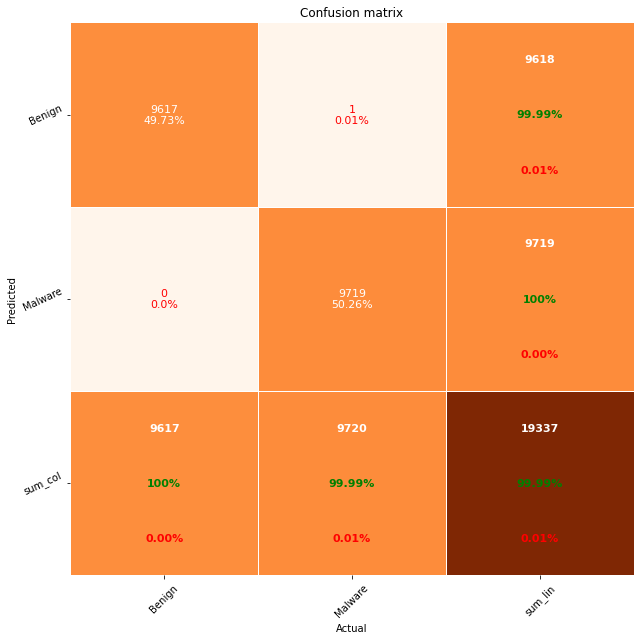

classification_report : 
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      9617
     Malware       1.00      1.00      1.00      9720

    accuracy                           1.00     19337
   macro avg       1.00      1.00      1.00     19337
weighted avg       1.00      1.00      1.00     19337

balanced_accuracy_score : 0.9999485596707819
matthews_corrcoef : 0.999896573810787
TNRs : [0.99989712 1.        ]
TPRs : [1.         0.99989712]


In [43]:
test_model("clf",tree.DecisionTreeClassifier,verbose=True,random_state=42)

--->  clf_4class
temps de fit :  0.5883867740631104
temps de prédiction :  0.00758051872253418
antiscore :  0.15684956301391118
prediction :  ['Malware_Trojan' 'Malware_Ransomware' 'Malware_Spyware' ... 'Benign'
 'Benign' 'Benign']
proba :  [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
confusion matrix : 
pp_matrix_from_data : 


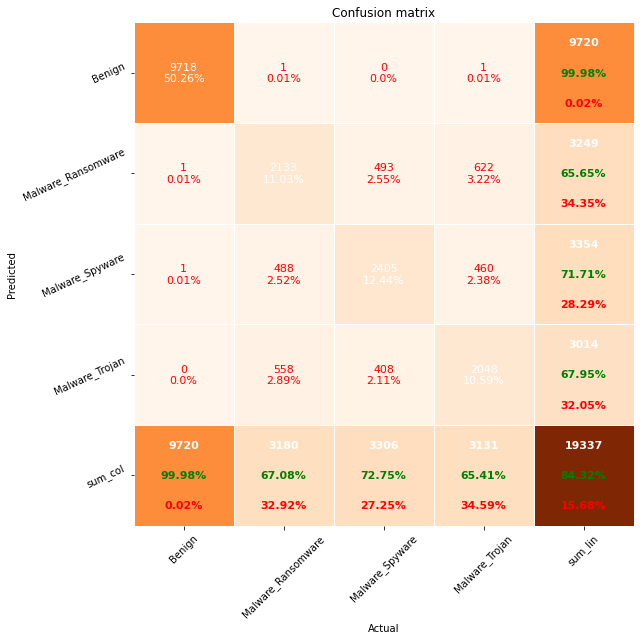

classification_report : 
                    precision    recall  f1-score   support

            Benign       1.00      1.00      1.00      9720
Malware_Ransomware       0.66      0.67      0.66      3180
   Malware_Spyware       0.72      0.73      0.72      3306
    Malware_Trojan       0.68      0.65      0.67      3131

          accuracy                           0.84     19337
         macro avg       0.76      0.76      0.76     19337
      weighted avg       0.84      0.84      0.84     19337

balanced_accuracy_score : 0.7630295726286822
matthews_corrcoef : 0.7640992737658809
TNRs : [0.99979203 0.93092777 0.9408022  0.94039245]
TPRs : [0.99979424 0.67075472 0.72746521 0.65410412]


In [44]:
test_model_4_class("clf_4class",tree.DecisionTreeClassifier,verbose=True,random_state=42)

## XGBoost

In [45]:
!pip install xgboost==1.5.0 --quiet
from xgboost import XGBClassifier

--->  xbg
[14:12:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.9881608486175537
temps de prédiction :  0.018486499786376953
antiscore :  5.17143300408085e-05
prediction :  ['Benign' 'Benign' 'Benign' ... 'Malware' 'Malware' 'Malware']
proba :  [[9.9999517e-01 4.8096172e-06]
 [9.9995995e-01 4.0047496e-05]
 [9.9999529e-01 4.6840969e-06]
 ...
 [1.3232231e-05 9.9998677e-01]
 [1.5377998e-05 9.9998462e-01]
 [1.6331673e-05 9.9998367e-01]]
confusion matrix : 
pp_matrix_from_data : 


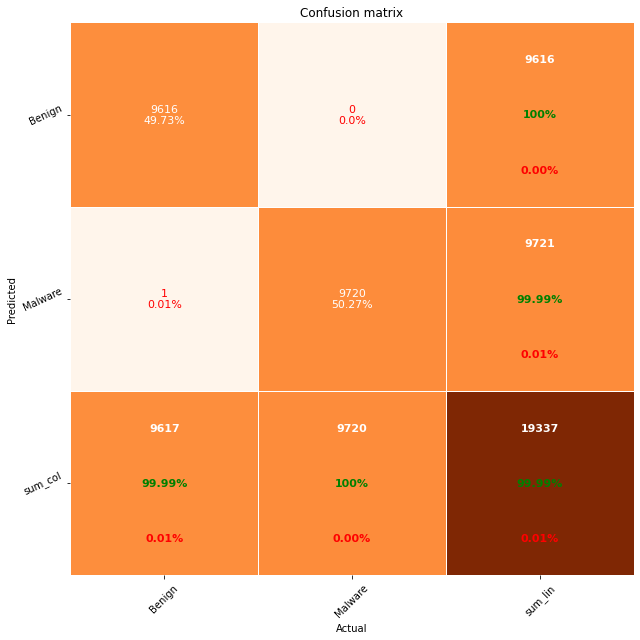

classification_report : 
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      9617
     Malware       1.00      1.00      1.00      9720

    accuracy                           1.00     19337
   macro avg       1.00      1.00      1.00     19337
weighted avg       1.00      1.00      1.00     19337

balanced_accuracy_score : 0.9999480087345326
matthews_corrcoef : 0.9998965736968304
TNRs : [1.         0.99989602]
TPRs : [0.99989602 1.        ]


In [46]:
test_model("xbg",XGBClassifier,verbose=True,objective="binary:logistic",random_state=42)

--->  xbg_4class
[14:12:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  13.695783615112305
temps de prédiction :  0.07404565811157227
antiscore :  0.12990639706262608
prediction :  ['Malware_Trojan' 'Malware_Ransomware' 'Malware_Spyware' ... 'Benign'
 'Benign' 'Benign']
proba :  [[1.03352295e-05 1.12112969e-01 1.23437069e-01 7.64439642e-01]
 [2.93912562e-05 4.83852178e-01 3.69933039e-01 1.46185443e-01]
 [2.65071158e-05 1.88249975e-01 5.45686364e-01 2.66037196e-01]
 ...
 [9.99994755e-01 2.25799499e-06 8.72068540e-07 2.13110116e-06]
 [9.99984264e-01 9.21756680e-07 2.95831774e-06 1.18105199e-05]
 [9.99996662e-01 1.06271466e-06 1.87525279e-06 3.52389549e-07]]
confusion matrix : 
pp_matrix_from_data : 


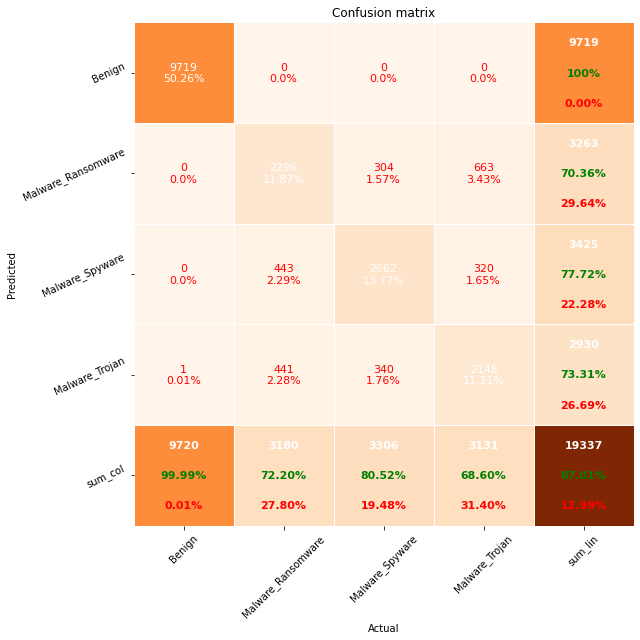

classification_report : 
                    precision    recall  f1-score   support

            Benign       1.00      1.00      1.00      9720
Malware_Ransomware       0.70      0.72      0.71      3180
   Malware_Spyware       0.78      0.81      0.79      3306
    Malware_Trojan       0.73      0.69      0.71      3131

          accuracy                           0.87     19337
         macro avg       0.80      0.80      0.80     19337
      weighted avg       0.87      0.87      0.87     19337

balanced_accuracy_score : 0.8032887894032668
matthews_corrcoef : 0.8046895547265358
TNRs : [1.         0.94014978 0.95240472 0.95174627]
TPRs : [0.99989712 0.72201258 0.80520266 0.6860428 ]


In [47]:
test_model_4_class("xbg_4class",XGBClassifier,verbose=True,objective="multi:softprob",random_state=42)

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

--->  rf
temps de fit :  5.018779039382935
temps de prédiction :  0.15602922439575195
antiscore :  0.0
prediction :  ['Benign' 'Benign' 'Benign' ... 'Malware' 'Malware' 'Malware']
proba :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
confusion matrix : 
pp_matrix_from_data : 


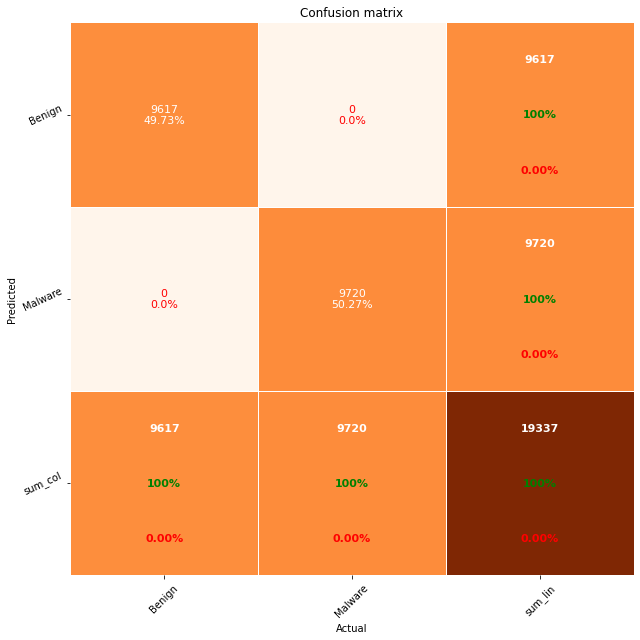

classification_report : 
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      9617
     Malware       1.00      1.00      1.00      9720

    accuracy                           1.00     19337
   macro avg       1.00      1.00      1.00     19337
weighted avg       1.00      1.00      1.00     19337

balanced_accuracy_score : 1.0
matthews_corrcoef : 1.0
TNRs : [1. 1.]
TPRs : [1. 1.]


In [49]:
# random_state pas prise en charge
test_model("rf",RandomForestClassifier,verbose=True,n_estimators=100)

--->  rf_4class
temps de fit :  9.283352375030518
temps de prédiction :  0.4431037902832031
antiscore :  0.12871696747168637
prediction :  ['Malware_Trojan' 'Malware_Ransomware' 'Malware_Spyware' ... 'Benign'
 'Benign' 'Benign']
proba :  [[0.   0.2  0.31 0.49]
 [0.   0.67 0.27 0.06]
 [0.   0.   0.93 0.07]
 ...
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [1.   0.   0.   0.  ]]
confusion matrix : 
pp_matrix_from_data : 


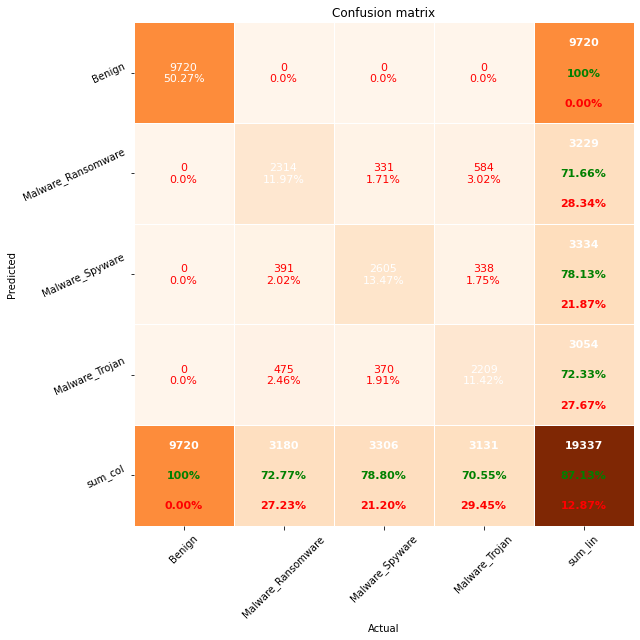

classification_report : 
                    precision    recall  f1-score   support

            Benign       1.00      1.00      1.00      9720
Malware_Ransomware       0.72      0.73      0.72      3180
   Malware_Spyware       0.78      0.79      0.78      3306
    Malware_Trojan       0.72      0.71      0.71      3131

          accuracy                           0.87     19337
         macro avg       0.81      0.81      0.81     19337
      weighted avg       0.87      0.87      0.87     19337

balanced_accuracy_score : 0.8052899074350705
matthews_corrcoef : 0.8064026095733202
TNRs : [1.         0.9433682  0.95452561 0.94785882]
TPRs : [1.         0.72767296 0.78796128 0.70552539]


In [50]:
test_model_4_class("rf_4class",RandomForestClassifier,verbose=True,n_estimators=100)

## MLP

In [51]:
from sklearn.neural_network import MLPClassifier

--->  mlp
temps de fit :  5.517902135848999
temps de prédiction :  0.029496431350708008
antiscore :  0.004861147023840329
prediction :  ['Benign' 'Benign' 'Benign' ... 'Malware' 'Malware' 'Malware']
proba :  [[1.00000000e+00 3.46653497e-60]
 [1.00000000e+00 7.60303231e-22]
 [1.00000000e+00 1.69635639e-61]
 ...
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.22044605e-16 1.00000000e+00]]
confusion matrix : 
pp_matrix_from_data : 


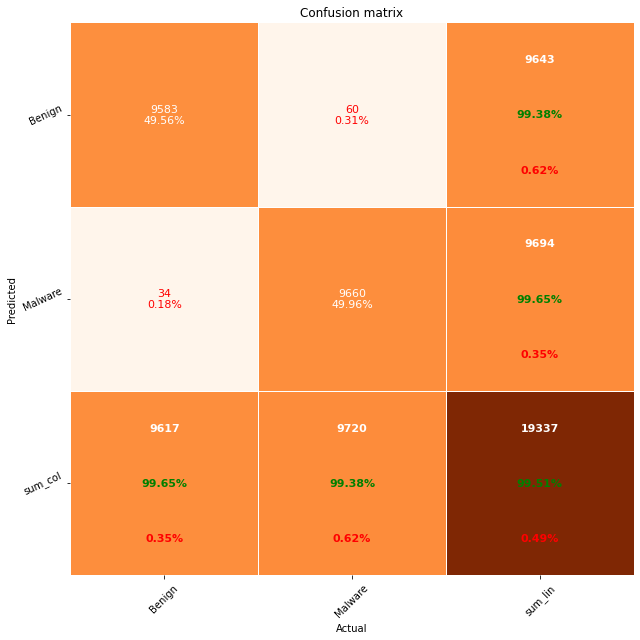

classification_report : 
              precision    recall  f1-score   support

      Benign       0.99      1.00      1.00      9617
     Malware       1.00      0.99      1.00      9720

    accuracy                           1.00     19337
   macro avg       1.00      1.00      1.00     19337
weighted avg       1.00      1.00      1.00     19337

balanced_accuracy_score : 0.995145877221022
matthews_corrcoef : 0.99028115008398
TNRs : [0.99382716 0.99646459]
TPRs : [0.99646459 0.99382716]


In [52]:
test_model("mlp",MLPClassifier,verbose=True,max_iter=300,random_state=42)

--->  mlp_4class
temps de fit :  5.828003644943237
temps de prédiction :  0.0351719856262207
antiscore :  0.3392977193980452
prediction :  ['Malware_Spyware' 'Malware_Spyware' 'Malware_Spyware' ... 'Benign'
 'Benign' 'Benign']
proba :  [[1.75930895e-022 4.89971441e-020 1.00000000e+000 5.30859381e-040]
 [7.75049774e-028 8.79898761e-015 1.00000000e+000 8.76505990e-030]
 [5.26942778e-021 8.76830231e-020 1.00000000e+000 2.03817851e-038]
 ...
 [1.00000000e+000 2.99591866e-139 5.93380101e-122 3.13553925e-187]
 [9.97309693e-001 1.36015299e-022 2.69030728e-003 1.12497272e-049]
 [1.00000000e+000 1.15577326e-071 7.68750765e-059 4.39603158e-102]]
confusion matrix : 
pp_matrix_from_data : 


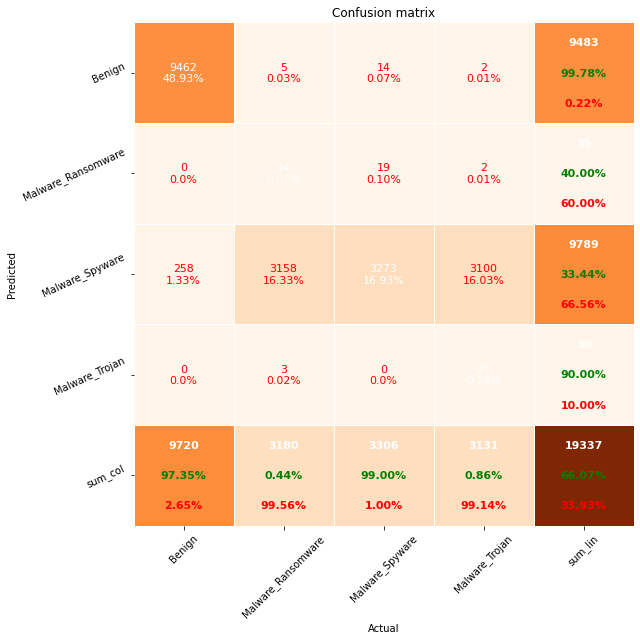

classification_report : 
                    precision    recall  f1-score   support

            Benign       1.00      0.97      0.99      9720
Malware_Ransomware       0.40      0.00      0.01      3180
   Malware_Spyware       0.33      0.99      0.50      3306
    Malware_Trojan       0.90      0.01      0.02      3131

          accuracy                           0.66     19337
         macro avg       0.66      0.49      0.38     19337
      weighted avg       0.77      0.66      0.59     19337

balanced_accuracy_score : 0.49412522441412854
matthews_corrcoef : 0.5655023687424998
TNRs : [0.99781637 0.99870025 0.59353752 0.99981488]
TPRs : [0.97345679 0.00440252 0.99001815 0.00862344]


In [53]:
test_model_4_class("mlp_4class",MLPClassifier,verbose=True,max_iter=300,random_state=42)

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

--->  knn
temps de fit :  0.056607723236083984
temps de prédiction :  11.18041205406189
antiscore :  0.0011894295909395947
prediction :  ['Benign' 'Benign' 'Benign' ... 'Malware' 'Malware' 'Malware']
proba :  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
confusion matrix : 
pp_matrix_from_data : 


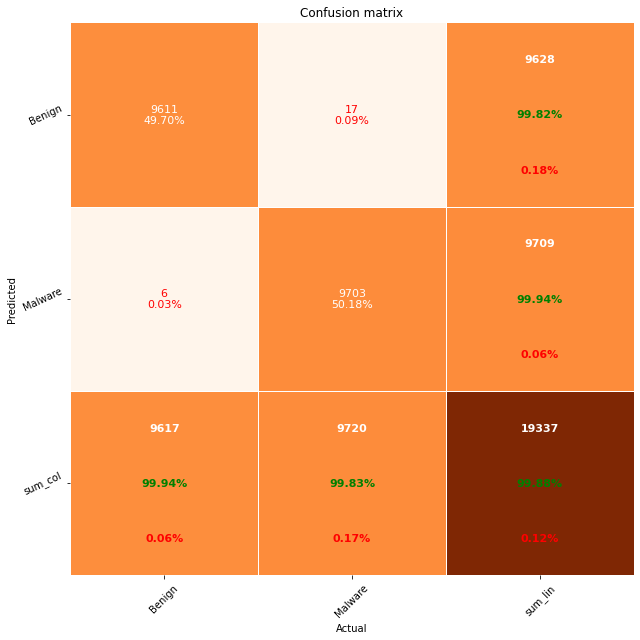

classification_report : 
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      9617
     Malware       1.00      1.00      1.00      9720

    accuracy                           1.00     19337
   macro avg       1.00      1.00      1.00     19337
weighted avg       1.00      1.00      1.00     19337

balanced_accuracy_score : 0.9988135668104878
matthews_corrcoef : 0.9976217334269726
TNRs : [0.99825103 0.9993761 ]
TPRs : [0.9993761  0.99825103]


In [55]:
# random_state pas prise en charge
test_model("knn",KNeighborsClassifier,verbose=True, n_neighbors=3)

--->  knn_4class
temps de fit :  0.050388336181640625
temps de prédiction :  11.087274312973022
antiscore :  0.19201530744169204
prediction :  ['Malware_Trojan' 'Malware_Ransomware' 'Malware_Spyware' ... 'Benign'
 'Benign' 'Benign']
proba :  [[0.         0.         0.         1.        ]
 [0.         0.66666667 0.33333333 0.        ]
 [0.         0.33333333 0.66666667 0.        ]
 ...
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]]
confusion matrix : 
pp_matrix_from_data : 


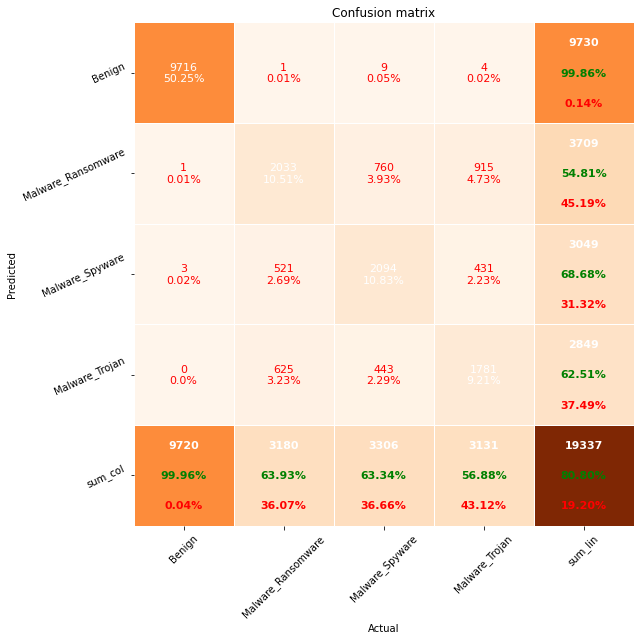

classification_report : 
                    precision    recall  f1-score   support

            Benign       1.00      1.00      1.00      9720
Malware_Ransomware       0.55      0.64      0.59      3180
   Malware_Spyware       0.69      0.63      0.66      3306
    Malware_Trojan       0.63      0.57      0.60      3131

          accuracy                           0.81     19337
         macro avg       0.71      0.71      0.71     19337
      weighted avg       0.81      0.81      0.81     19337

balanced_accuracy_score : 0.7102795833487403
matthews_corrcoef : 0.7117400691779838
TNRs : [0.99854424 0.89626787 0.94042792 0.93409848]
TPRs : [0.99958848 0.63930818 0.63339383 0.56882785]


In [56]:
test_model_4_class("knn_4class",KNeighborsClassifier,verbose=True, n_neighbors=3)

## SVM

In [57]:
from sklearn import svm

In [58]:
# très long sur kaggle...
# test_model("svm",svm.SVC,verbose=True,kernel='linear', C=1, probability=True,random_state=42)

In [59]:
# très très long sur kaggle...
# test_model_4_class("svm_4class",svm.SVC,verbose=True,kernel='linear', C=1, probability=True,random_state=42)

# Comparaison des algorithmes

In [60]:
import matplotlib.pyplot as plt

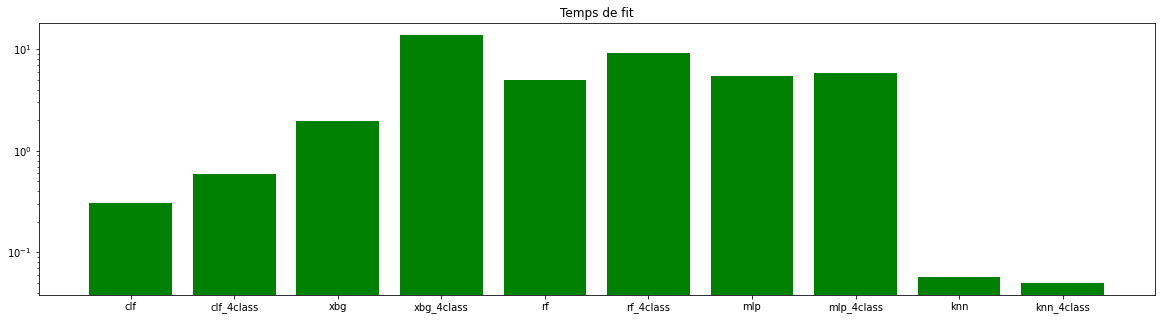

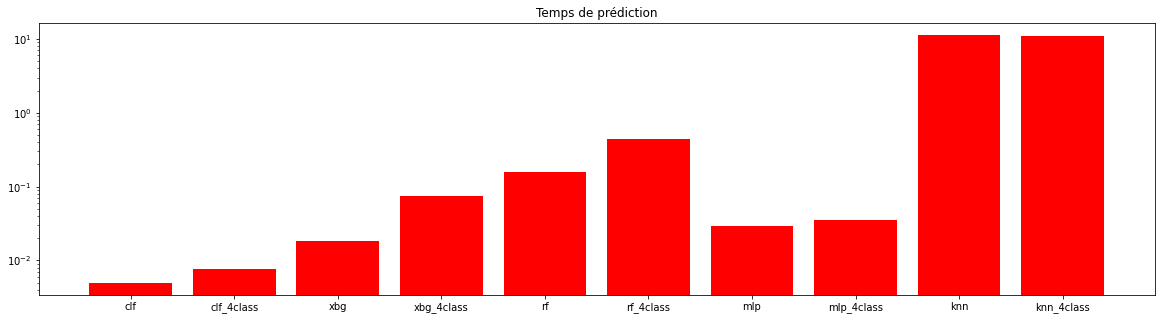

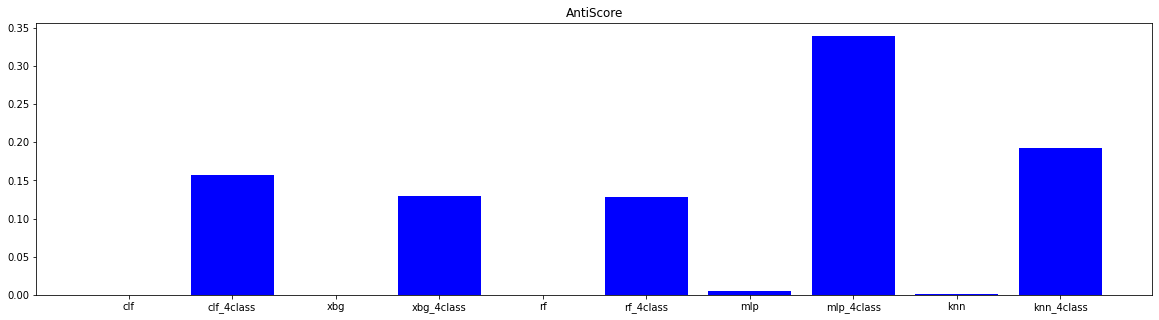

In [61]:
def compare(time_fit, time_pred, models, antiscore=None):
    """
    Compare the time of fit and prediction and score of the models
    :param time_fit:
    :param time_pred:
    :param models:
    :return:
    """
    plt.figure(figsize=(2*len(models),5))
    plt.bar(time_fit.keys(), time_fit.values(), color='g')
    plt.title('Temps de fit')
    plt.yscale('log')
    plt.show()

    plt.figure(figsize=(2*len(models),5))
    plt.bar(time_pred.keys(), time_pred.values(), color='r')
    plt.title('Temps de prédiction')
    plt.yscale('log')
    plt.show()

    plt.figure(figsize=(2*len(models),5))
    if antiscore is None:
        plt.bar(models.keys(), [1-models[model].score(X_test, y_test) for model in models.keys()], color='b')
    else:
        plt.bar(antiscore.keys(), antiscore.values(), color='b')
    plt.title('AntiScore')
    plt.show()
compare(time_fit,time_pred,models,antiscore)

# Comparaison des paramètres des modèles

In [62]:
def clean_tabs():
    """
    Clean the tabs
    :return:
    """
    global models, time_fit, time_pred, antiscore
    models = {}
    time_fit = {}
    time_pred = {}
    antiscore = {}
clean_tabs()

## CART

## Binary-classification

--->  clf_max_depth_1
temps de fit :  0.11690425872802734
temps de prédiction :  0.004408597946166992
antiscore :  0.00336143145265555
--->  clf_max_depth_2
temps de fit :  0.1751878261566162
temps de prédiction :  0.00513005256652832
antiscore :  0.0010342866008170581
--->  clf_max_depth_3
temps de fit :  0.2257387638092041
temps de prédiction :  0.00483393669128418
antiscore :  0.0009308579407353301
--->  clf_max_depth_4
temps de fit :  0.2825281620025635
temps de prédiction :  0.00470733642578125
antiscore :  0.0007240006205719851
--->  clf_max_depth_5
temps de fit :  0.30541348457336426
temps de prédiction :  0.004830121994018555
antiscore :  0.0006722862905310656
--->  clf_max_depth_6
temps de fit :  0.3199191093444824
temps de prédiction :  0.00528264045715332
antiscore :  5.17143300408085e-05
--->  clf_max_depth_7
temps de fit :  0.31775712966918945
temps de prédiction :  0.005037784576416016
antiscore :  5.17143300408085e-05
--->  clf_max_depth_8
temps de fit :  0.3149900436401

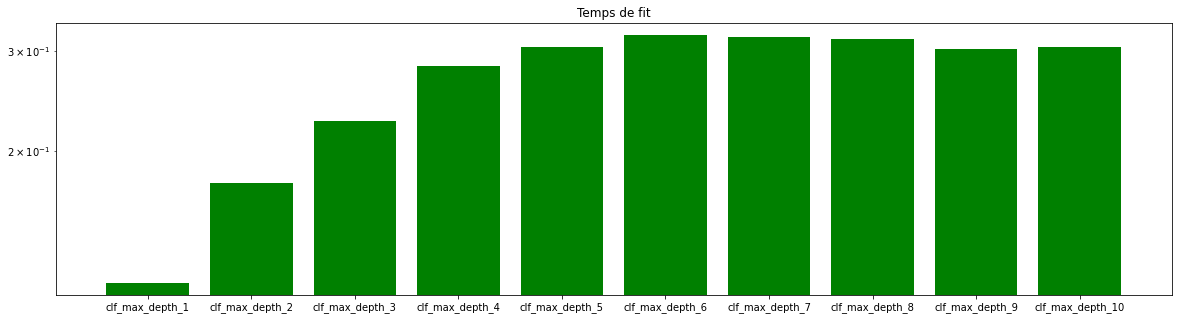

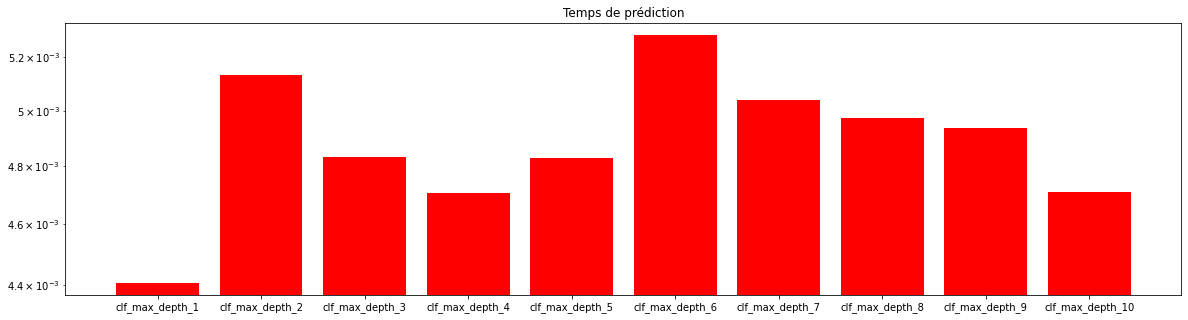

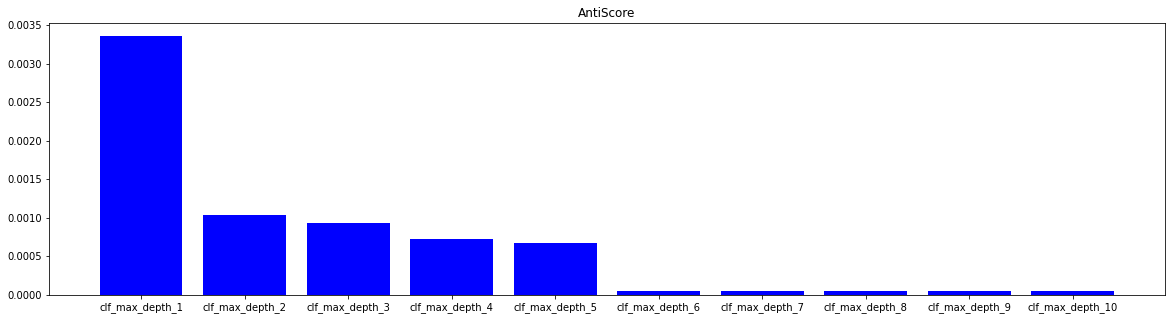

--->  clf_class_weight_None
temps de fit :  0.3053138256072998
temps de prédiction :  0.004809141159057617
antiscore :  5.17143300408085e-05
--->  clf_class_weight_balanced
temps de fit :  0.40259695053100586
temps de prédiction :  0.004715681076049805
antiscore :  5.17143300408085e-05


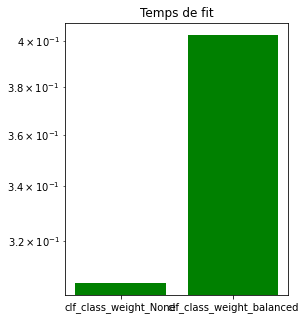

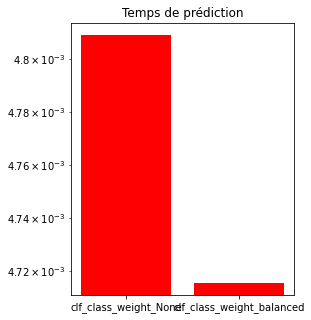

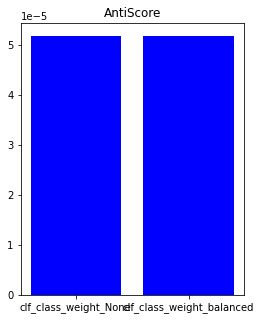

--->  clf_criterion_gini
temps de fit :  0.3342883586883545
temps de prédiction :  0.004674196243286133
antiscore :  5.17143300408085e-05
--->  clf_criterion_entropy
temps de fit :  0.23573040962219238
temps de prédiction :  0.004750728607177734
antiscore :  0.00015514299012253652


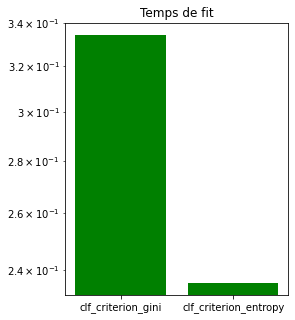

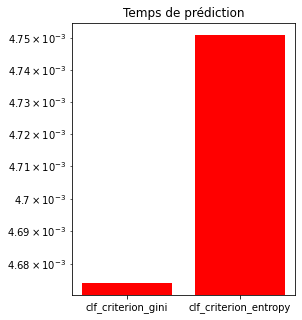

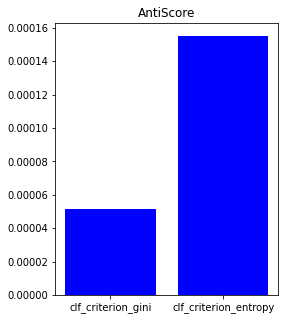

--->  clf_splitter_best
temps de fit :  0.3085923194885254
temps de prédiction :  0.0048182010650634766
antiscore :  5.17143300408085e-05
--->  clf_splitter_random
temps de fit :  0.10525059700012207
temps de prédiction :  0.004948854446411133
antiscore :  0.00015514299012253652


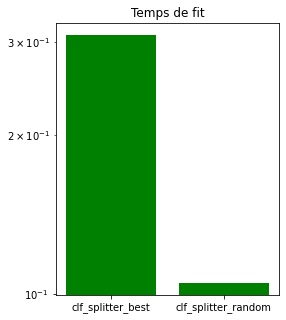

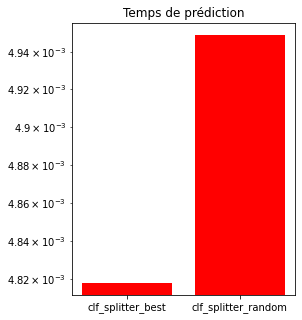

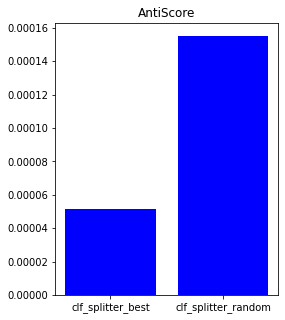

--->  clf_max_features_None
temps de fit :  0.3019270896911621
temps de prédiction :  0.0051610469818115234
antiscore :  5.17143300408085e-05
--->  clf_max_features_auto
temps de fit :  0.12080121040344238
temps de prédiction :  0.0048787593841552734
antiscore :  0.0006205719604902571
--->  clf_max_features_sqrt
temps de fit :  0.12016010284423828
temps de prédiction :  0.00467991828918457
antiscore :  0.0006205719604902571
--->  clf_max_features_log2
temps de fit :  0.1247406005859375
temps de prédiction :  0.004982471466064453
antiscore :  0.0


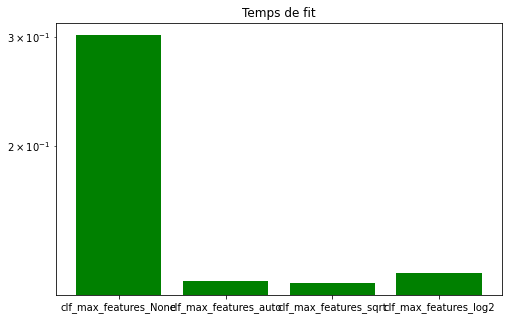

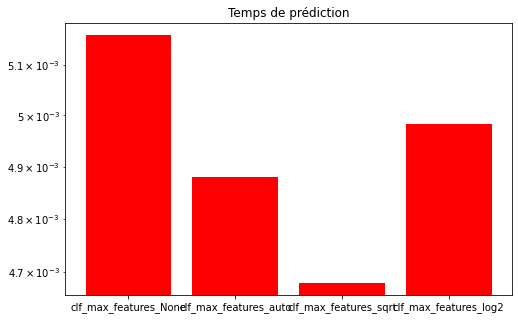

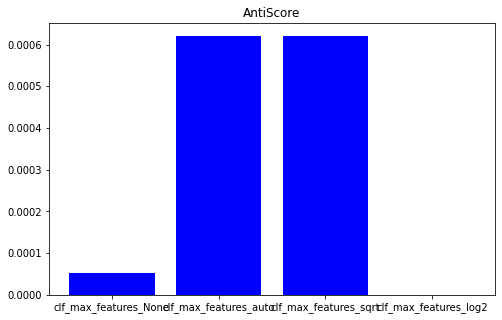

--->  clf_min_samples_split_2
temps de fit :  0.3039405345916748
temps de prédiction :  0.004771232604980469
antiscore :  5.17143300408085e-05
--->  clf_min_samples_split_3
temps de fit :  0.3013603687286377
temps de prédiction :  0.004903554916381836
antiscore :  5.17143300408085e-05
--->  clf_min_samples_split_4
temps de fit :  0.30271244049072266
temps de prédiction :  0.004792928695678711
antiscore :  5.17143300408085e-05
--->  clf_min_samples_split_5
temps de fit :  0.30203795433044434
temps de prédiction :  0.004847526550292969
antiscore :  5.17143300408085e-05
--->  clf_min_samples_split_6
temps de fit :  0.30243611335754395
temps de prédiction :  0.0049877166748046875
antiscore :  5.17143300408085e-05
--->  clf_min_samples_split_7
temps de fit :  0.3038949966430664
temps de prédiction :  0.004783153533935547
antiscore :  5.17143300408085e-05
--->  clf_min_samples_split_8
temps de fit :  0.30448317527770996
temps de prédiction :  0.004685401916503906
antiscore :  5.1714330040808

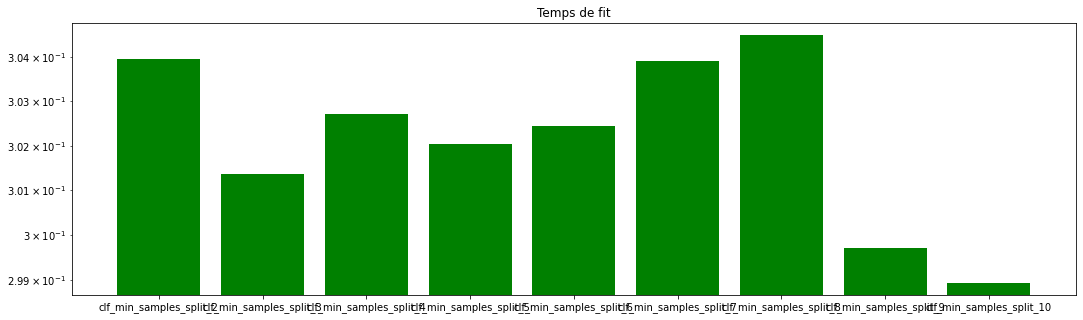

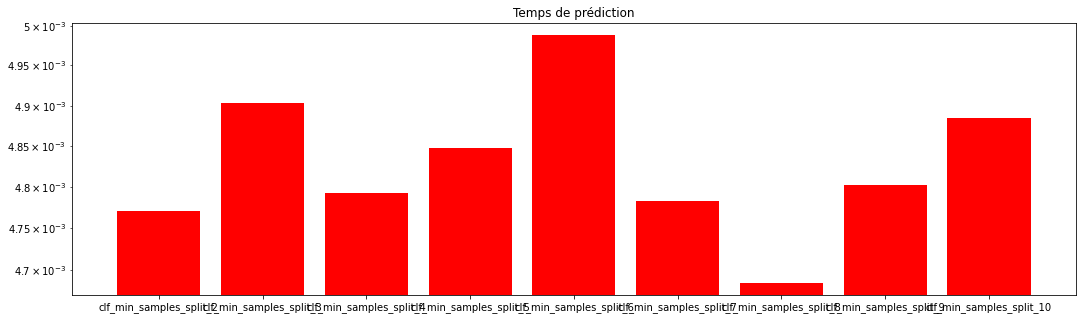

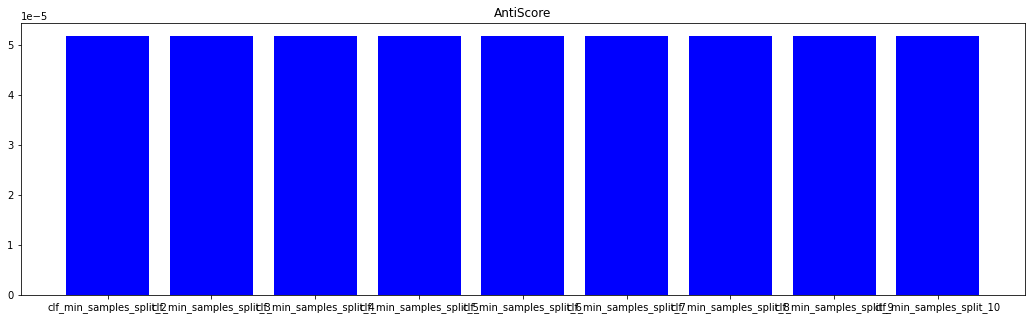

--->  clf_min_samples_leaf_1
temps de fit :  0.3230113983154297
temps de prédiction :  0.004644155502319336
antiscore :  5.17143300408085e-05
--->  clf_min_samples_leaf_2
temps de fit :  0.3016476631164551
temps de prédiction :  0.004805803298950195
antiscore :  5.17143300408085e-05
--->  clf_min_samples_leaf_3
temps de fit :  0.29776859283447266
temps de prédiction :  0.005172014236450195
antiscore :  5.17143300408085e-05
--->  clf_min_samples_leaf_4
temps de fit :  0.29692602157592773
temps de prédiction :  0.0046024322509765625
antiscore :  5.17143300408085e-05
--->  clf_min_samples_leaf_5
temps de fit :  0.2971067428588867
temps de prédiction :  0.004668474197387695
antiscore :  5.17143300408085e-05
--->  clf_min_samples_leaf_6
temps de fit :  0.29848694801330566
temps de prédiction :  0.004793882369995117
antiscore :  5.17143300408085e-05
--->  clf_min_samples_leaf_7
temps de fit :  0.29802536964416504
temps de prédiction :  0.004742622375488281
antiscore :  5.17143300408085e-05
-

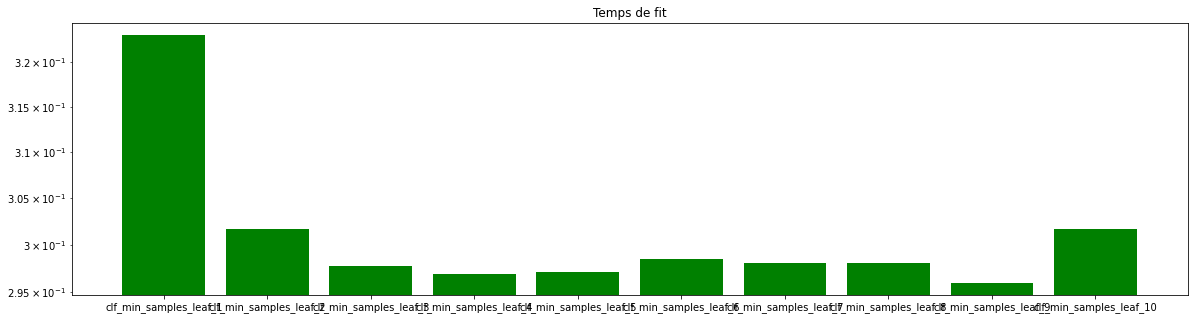

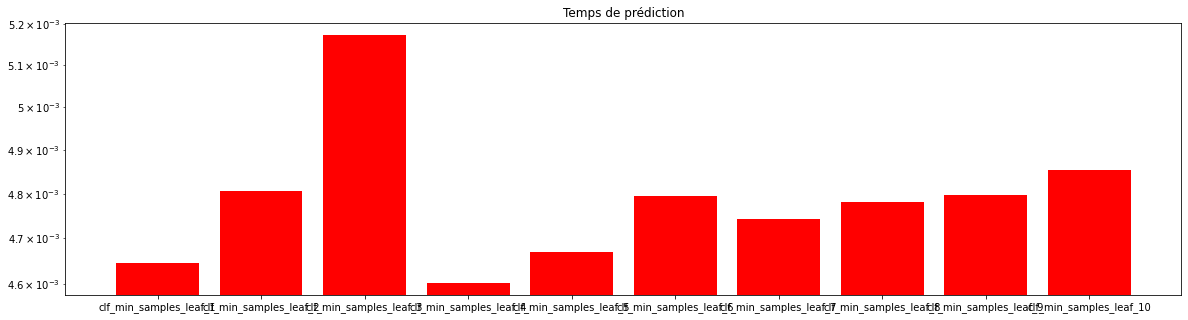

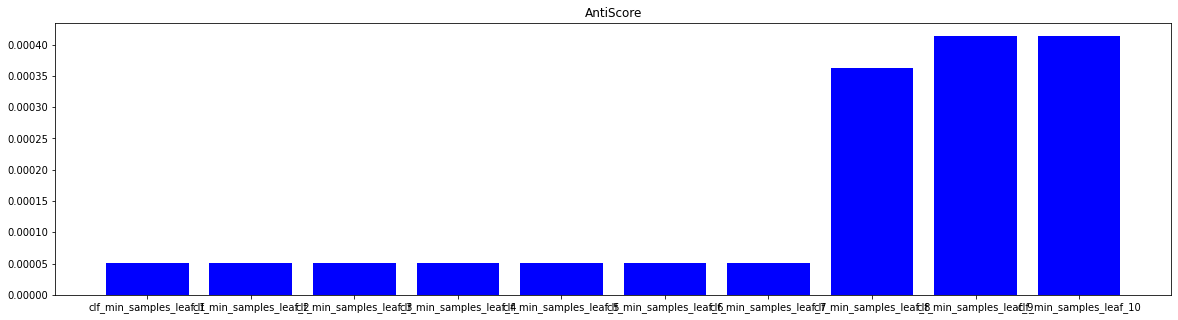

--->  clf_min_weight_fraction_leaf_0.0
temps de fit :  0.3004014492034912
temps de prédiction :  0.004862308502197266
antiscore :  5.17143300408085e-05
--->  clf_min_weight_fraction_leaf_0.1
temps de fit :  0.18383264541625977
temps de prédiction :  0.004839897155761719
antiscore :  0.00336143145265555
--->  clf_min_weight_fraction_leaf_0.2
temps de fit :  0.16547226905822754
temps de prédiction :  0.004810333251953125
antiscore :  0.00336143145265555
--->  clf_min_weight_fraction_leaf_0.3
temps de fit :  0.11408424377441406
temps de prédiction :  0.004489421844482422
antiscore :  0.00336143145265555
--->  clf_min_weight_fraction_leaf_0.4
temps de fit :  0.11437797546386719
temps de prédiction :  0.0045108795166015625
antiscore :  0.00336143145265555
--->  clf_min_weight_fraction_leaf_0.5
temps de fit :  0.11413145065307617
temps de prédiction :  0.004916667938232422
antiscore :  0.502663287997104


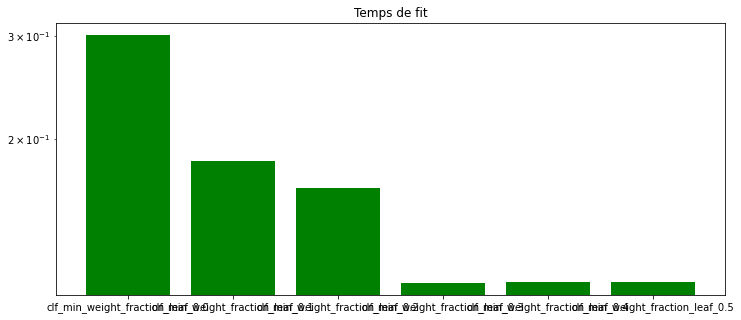

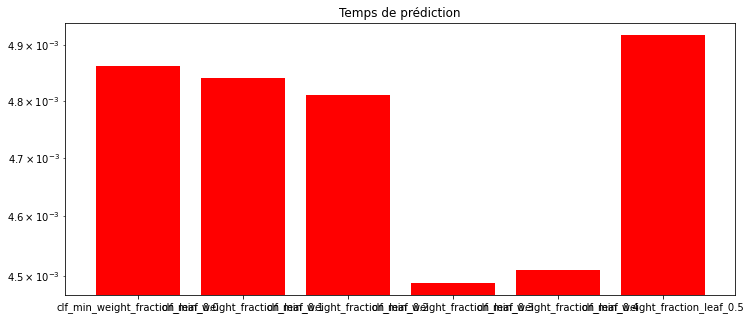

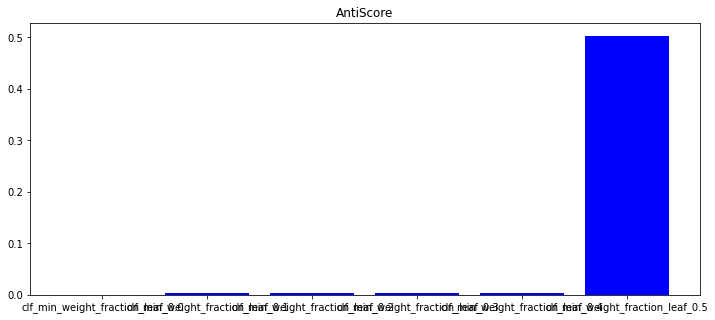

--->  clf_max_leaf_nodes_None
temps de fit :  0.3047003746032715
temps de prédiction :  0.0047070980072021484
antiscore :  5.17143300408085e-05
--->  clf_max_leaf_nodes_2
temps de fit :  0.16821694374084473
temps de prédiction :  0.004771232604980469
antiscore :  0.00336143145265555
--->  clf_max_leaf_nodes_3
temps de fit :  0.19072794914245605
temps de prédiction :  0.004495859146118164
antiscore :  0.0013445725810622422
--->  clf_max_leaf_nodes_4
temps de fit :  0.22153043746948242
temps de prédiction :  0.00457000732421875
antiscore :  0.0010342866008170581
--->  clf_max_leaf_nodes_5
temps de fit :  0.24490904808044434
temps de prédiction :  0.005187034606933594
antiscore :  0.0009308579407353301
--->  clf_max_leaf_nodes_6
temps de fit :  0.2743973731994629
temps de prédiction :  0.0046844482421875
antiscore :  0.0009308579407353301
--->  clf_max_leaf_nodes_7
temps de fit :  0.27353906631469727
temps de prédiction :  0.004647493362426758
antiscore :  0.0008791436106945216
--->  clf_

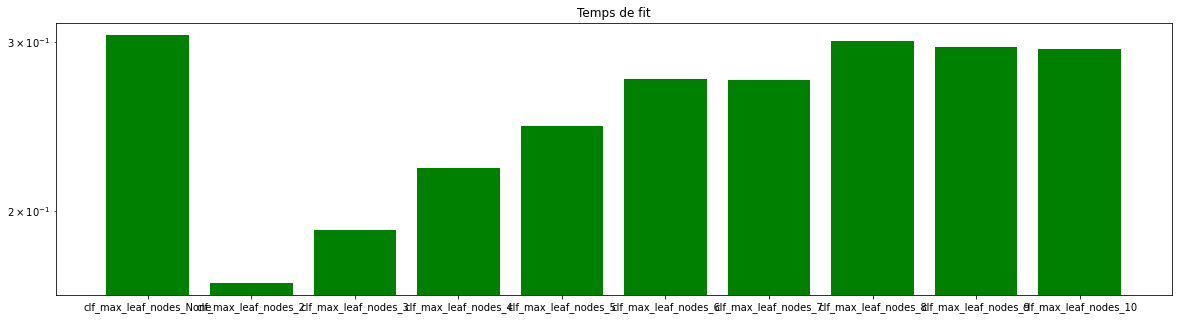

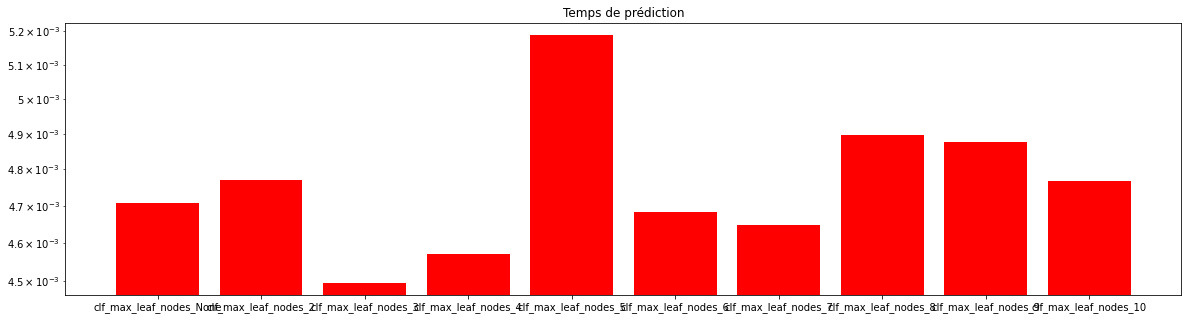

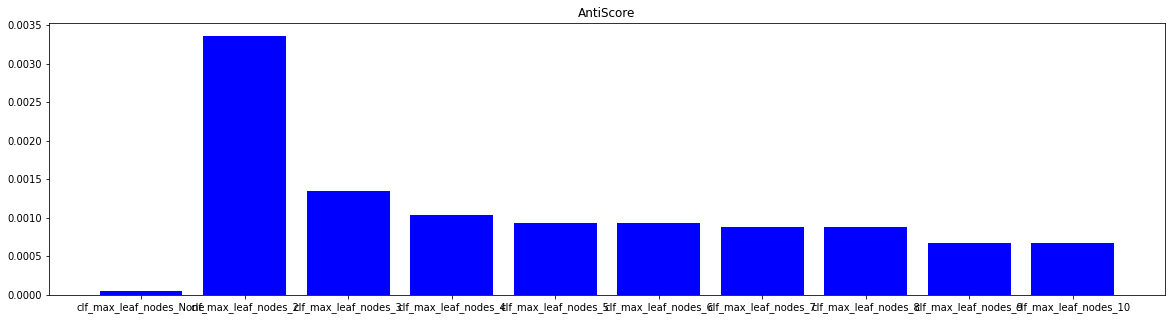

--->  clf_min_impurity_decrease_0.0
temps de fit :  0.324084997177124
temps de prédiction :  0.00484776496887207
antiscore :  5.17143300408085e-05
--->  clf_min_impurity_decrease_0.1
temps de fit :  0.1706385612487793
temps de prédiction :  0.004652500152587891
antiscore :  0.00336143145265555
--->  clf_min_impurity_decrease_0.2
temps de fit :  0.17511773109436035
temps de prédiction :  0.004694223403930664
antiscore :  0.00336143145265555
--->  clf_min_impurity_decrease_0.3
temps de fit :  0.16738653182983398
temps de prédiction :  0.004784584045410156
antiscore :  0.00336143145265555
--->  clf_min_impurity_decrease_0.4
temps de fit :  0.16738200187683105
temps de prédiction :  0.004633188247680664
antiscore :  0.00336143145265555
--->  clf_min_impurity_decrease_0.5
temps de fit :  0.11419987678527832
temps de prédiction :  0.004103183746337891
antiscore :  0.502663287997104


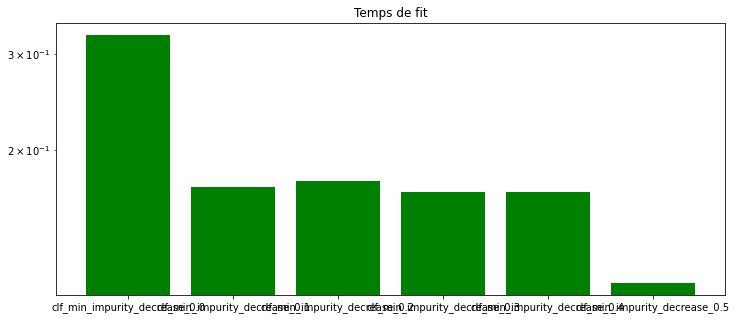

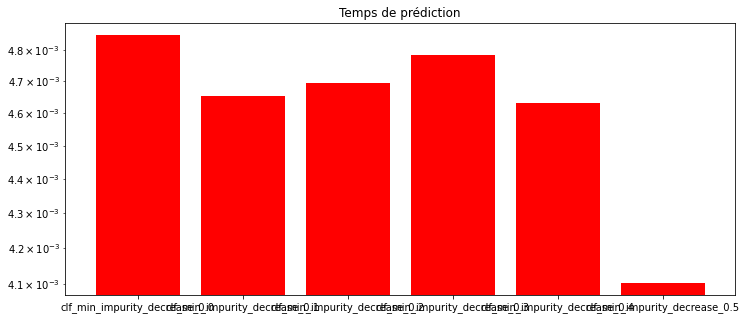

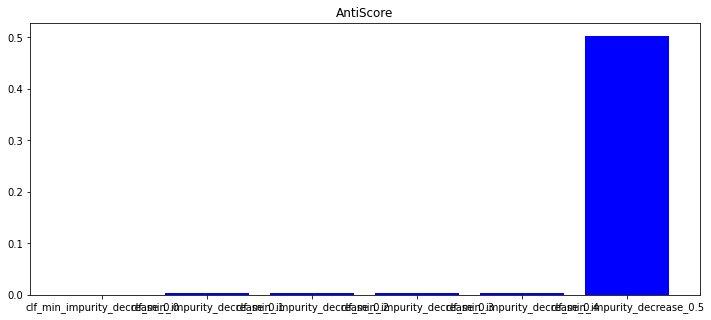

--->  clf_ccp_alpha_0.0
temps de fit :  0.3025703430175781
temps de prédiction :  0.004807472229003906
antiscore :  5.17143300408085e-05
--->  clf_ccp_alpha_0.1
temps de fit :  0.30165958404541016
temps de prédiction :  0.0045015811920166016
antiscore :  0.00336143145265555
--->  clf_ccp_alpha_0.2
temps de fit :  0.30310797691345215
temps de prédiction :  0.004592418670654297
antiscore :  0.00336143145265555
--->  clf_ccp_alpha_0.3
temps de fit :  0.30303025245666504
temps de prédiction :  0.0044443607330322266
antiscore :  0.00336143145265555
--->  clf_ccp_alpha_0.4
temps de fit :  0.3037607669830322
temps de prédiction :  0.00457763671875
antiscore :  0.00336143145265555
--->  clf_ccp_alpha_0.5
temps de fit :  0.30178165435791016
temps de prédiction :  0.004159212112426758
antiscore :  0.502663287997104


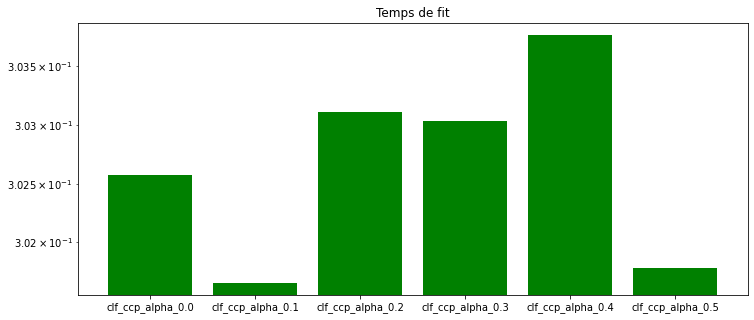

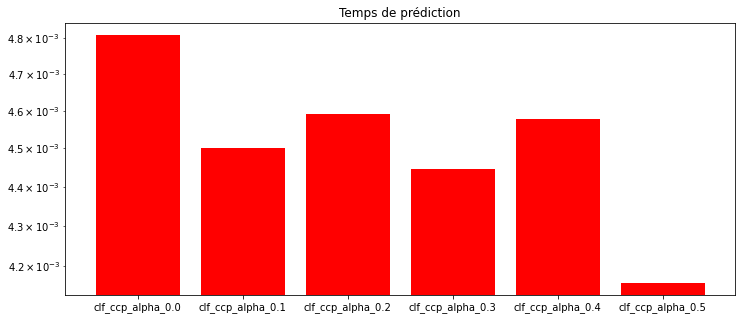

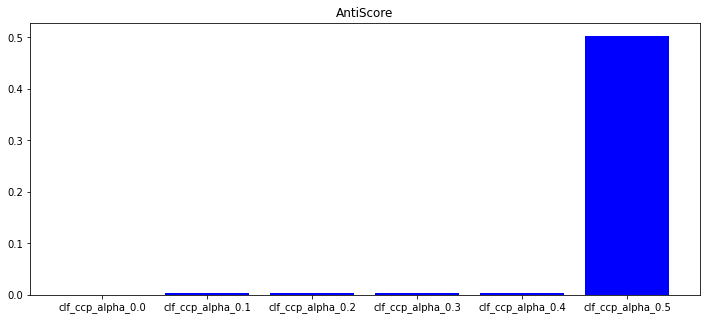

In [63]:
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    test_model("clf_max_depth_"+str(max_depth),tree.DecisionTreeClassifier,random_state=42,max_depth=max_depth)
compare(time_fit, time_pred, models)
clean_tabs()
for class_weight in [None, 'balanced']:
    test_model("clf_class_weight_"+str(class_weight),tree.DecisionTreeClassifier,random_state=42,class_weight=class_weight)
compare(time_fit, time_pred, models)
clean_tabs()
for criterion in ['gini', 'entropy']:
    test_model("clf_criterion_"+str(criterion),tree.DecisionTreeClassifier,random_state=42,criterion=criterion)
compare(time_fit, time_pred, models)
clean_tabs()
for splitter in ['best', 'random']:
    test_model("clf_splitter_"+str(splitter),tree.DecisionTreeClassifier,random_state=42,splitter=splitter)
compare(time_fit, time_pred, models)
clean_tabs()
for max_features in [None, 'auto', 'sqrt', 'log2']:
    test_model("clf_max_features_"+str(max_features),tree.DecisionTreeClassifier,random_state=42,max_features=max_features)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_split in [2,3,4,5,6,7,8,9,10]:
    test_model("clf_min_samples_split_"+str(min_samples_split),tree.DecisionTreeClassifier,random_state=42,min_samples_split=min_samples_split)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_leaf in [1,2,3,4,5,6,7,8,9,10]:
    test_model("clf_min_samples_leaf_"+str(min_samples_leaf),tree.DecisionTreeClassifier,random_state=42,min_samples_leaf=min_samples_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for min_weight_fraction_leaf in [0.0,0.1,0.2,0.3,0.4,0.5]:
    test_model("clf_min_weight_fraction_leaf_"+str(min_weight_fraction_leaf),tree.DecisionTreeClassifier,random_state=42,min_weight_fraction_leaf=min_weight_fraction_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for max_leaf_nodes in [None,2,3,4,5,6,7,8,9,10]:
    test_model("clf_max_leaf_nodes_"+str(max_leaf_nodes),tree.DecisionTreeClassifier,random_state=42,max_leaf_nodes=max_leaf_nodes)
compare(time_fit, time_pred, models)
clean_tabs()
for min_impurity_decrease in [0.0,0.1,0.2,0.3,0.4,0.5]:
    test_model("clf_min_impurity_decrease_"+str(min_impurity_decrease),tree.DecisionTreeClassifier,random_state=42,min_impurity_decrease=min_impurity_decrease)
compare(time_fit, time_pred, models)
clean_tabs()
for ccp_alpha in [0.0,0.1,0.2,0.3,0.4,0.5]:
    test_model("clf_ccp_alpha_"+str(ccp_alpha),tree.DecisionTreeClassifier,random_state=42,ccp_alpha=ccp_alpha)
compare(time_fit, time_pred, models)
clean_tabs()

## 4-classification

--->  clf_max_depth_4_class_1
temps de fit :  0.11304497718811035
temps de prédiction :  0.004571199417114258
antiscore :  0.330144282980814
--->  clf_max_depth_4_class_2
temps de fit :  0.16418743133544922
temps de prédiction :  0.0046732425689697266
antiscore :  0.31447484097843514
--->  clf_max_depth_4_class_3
temps de fit :  0.21469879150390625
temps de prédiction :  0.004942178726196289
antiscore :  0.285773387805761
--->  clf_max_depth_4_class_4
temps de fit :  0.26747965812683105
temps de prédiction :  0.005527019500732422
antiscore :  0.2592956508248435
--->  clf_max_depth_4_class_5
temps de fit :  0.3154153823852539
temps de prédiction :  0.005300998687744141
antiscore :  0.2405750633500543
--->  clf_max_depth_4_class_6
temps de fit :  0.34616637229919434
temps de prédiction :  0.005194902420043945
antiscore :  0.22656047990898276
--->  clf_max_depth_4_class_7
temps de fit :  0.3679800033569336
temps de prédiction :  0.005452871322631836
antiscore :  0.22697419454930956
--->  

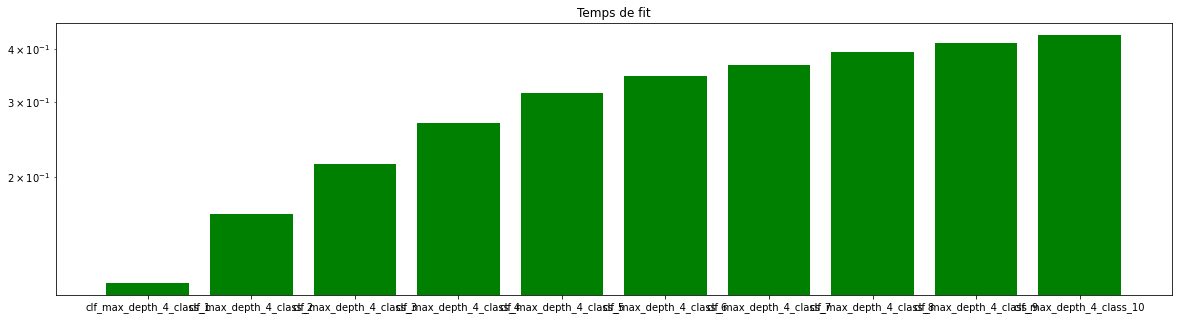

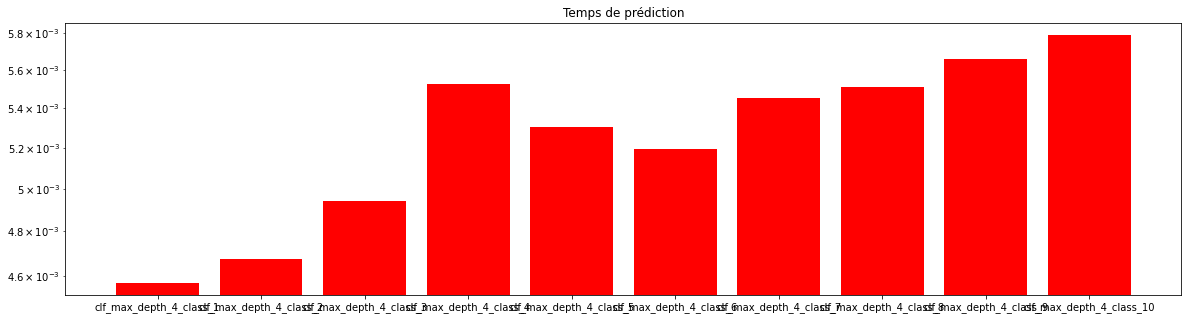

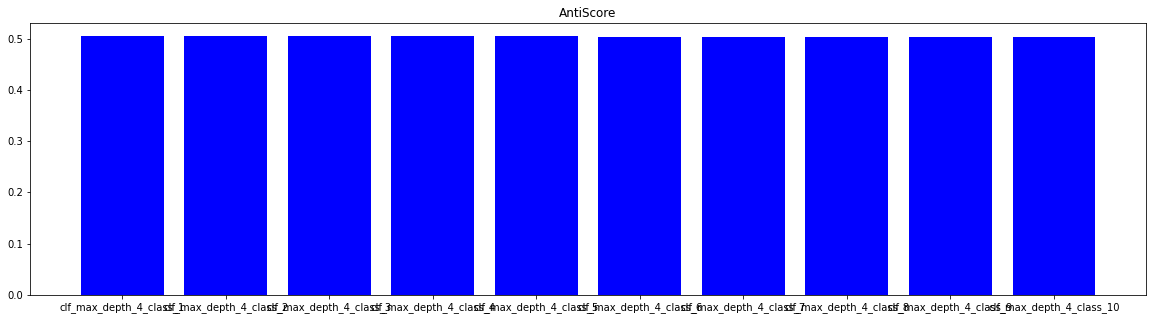

--->  clf_class_weight_4_class_None
temps de fit :  0.5847728252410889
temps de prédiction :  0.007170915603637695
antiscore :  0.15684956301391118
--->  clf_class_weight_4_class_balanced
temps de fit :  0.6719350814819336
temps de prédiction :  0.007291555404663086
antiscore :  0.15767699229456478


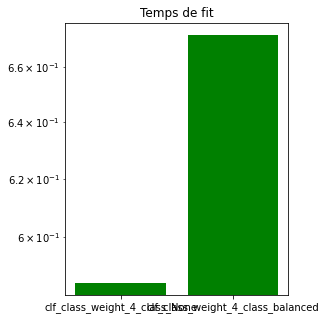

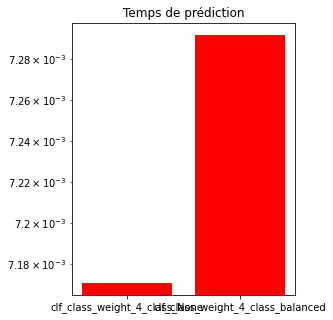

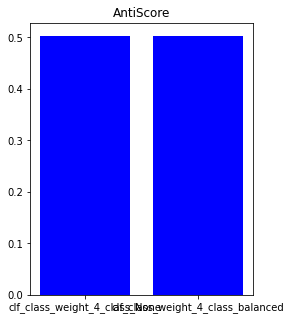

--->  clf_criterion_4_class_gini
temps de fit :  0.5791130065917969
temps de prédiction :  0.007131338119506836
antiscore :  0.15684956301391118
--->  clf_criterion_4_class_entropy
temps de fit :  0.5968368053436279
temps de prédiction :  0.007149457931518555
antiscore :  0.16615814242126492


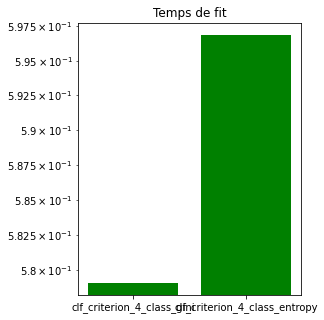

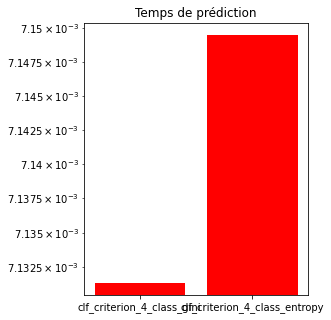

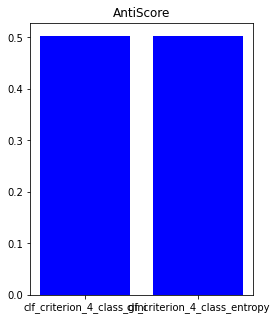

--->  clf_splitter_4_class_best
temps de fit :  0.577324390411377
temps de prédiction :  0.007587432861328125
antiscore :  0.15684956301391118
--->  clf_splitter_4_class_random
temps de fit :  0.17690277099609375
temps de prédiction :  0.007347583770751953
antiscore :  0.16905414490355275


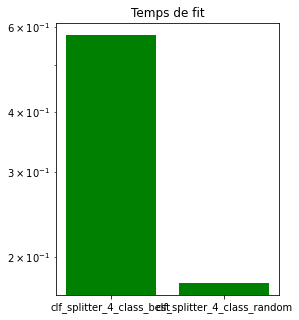

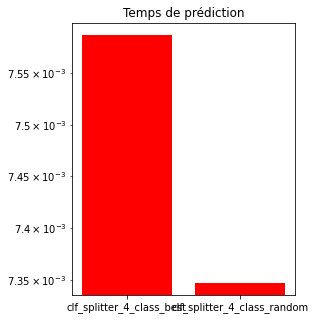

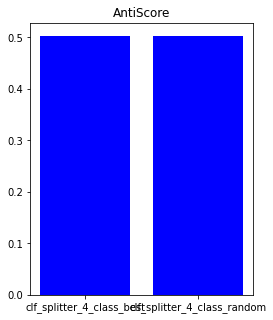

--->  clf_max_features_4_class_None
temps de fit :  0.5822229385375977
temps de prédiction :  0.0075991153717041016
antiscore :  0.15684956301391118
--->  clf_max_features_4_class_auto
temps de fit :  0.18166637420654297
temps de prédiction :  0.007792234420776367
antiscore :  0.16796814397269488
--->  clf_max_features_4_class_sqrt
temps de fit :  0.1833665370941162
temps de prédiction :  0.00837850570678711
antiscore :  0.16796814397269488
--->  clf_max_features_4_class_log2
temps de fit :  0.15465211868286133
temps de prédiction :  0.007303714752197266
antiscore :  0.1672958576821637


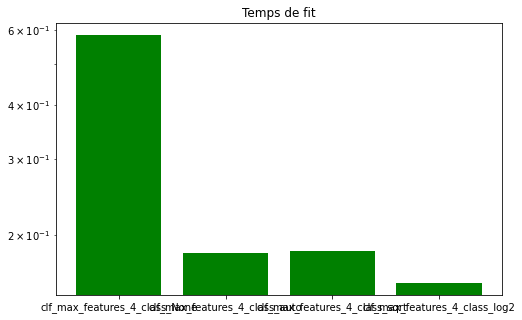

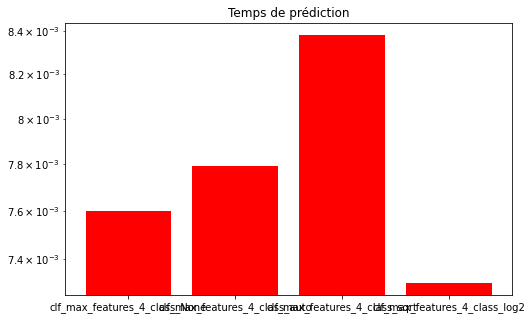

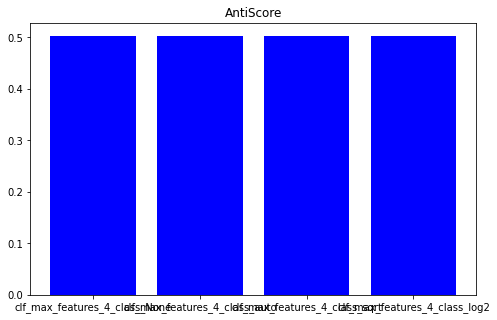

--->  clf_min_samples_split_4_class_2
temps de fit :  0.5801665782928467
temps de prédiction :  0.006936788558959961
antiscore :  0.15684956301391118
--->  clf_min_samples_split_4_class_3
temps de fit :  0.59197998046875
temps de prédiction :  0.00686335563659668
antiscore :  0.15783213528468742
--->  clf_min_samples_split_4_class_4
temps de fit :  0.5719289779663086
temps de prédiction :  0.006712436676025391
antiscore :  0.15803899260485077
--->  clf_min_samples_split_4_class_5
temps de fit :  0.5688817501068115
temps de prédiction :  0.007110595703125
antiscore :  0.16000413714640327
--->  clf_min_samples_split_4_class_6
temps de fit :  0.5722842216491699
temps de prédiction :  0.00705409049987793
antiscore :  0.15990070848632154
--->  clf_min_samples_split_4_class_7
temps de fit :  0.5714402198791504
temps de prédiction :  0.006799459457397461
antiscore :  0.16098670941717952
--->  clf_min_samples_split_4_class_8
temps de fit :  0.5737075805664062
temps de prédiction :  0.006780862

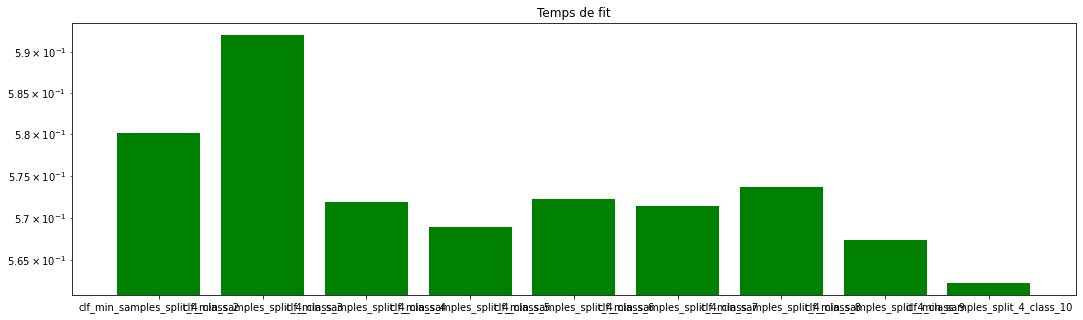

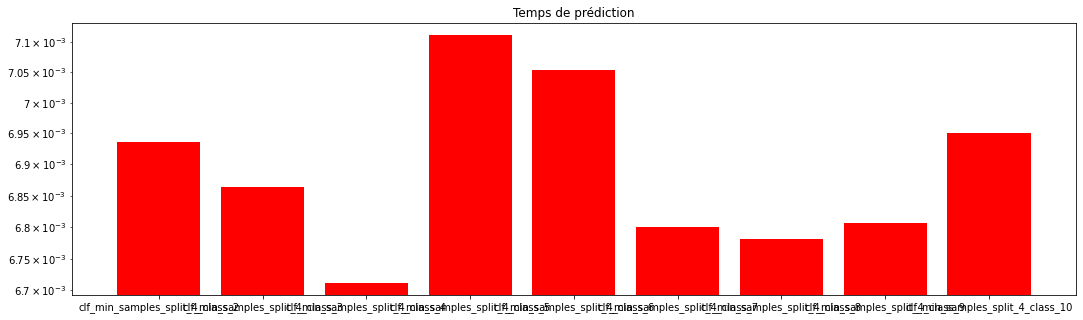

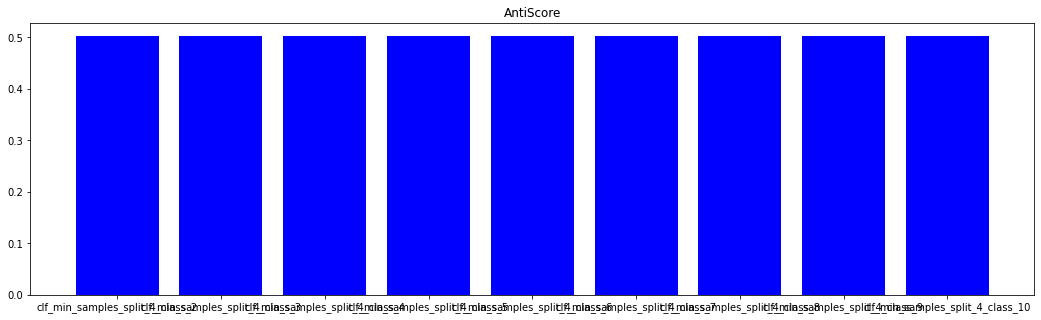

--->  clf_min_samples_leaf_4_class_1
temps de fit :  0.5751504898071289
temps de prédiction :  0.008192300796508789
antiscore :  0.15684956301391118
--->  clf_min_samples_leaf_4_class_2
temps de fit :  0.5601129531860352
temps de prédiction :  0.007253170013427734
antiscore :  0.1585561359052593
--->  clf_min_samples_leaf_4_class_3
temps de fit :  0.547344446182251
temps de prédiction :  0.00693964958190918
antiscore :  0.16026270879660753
--->  clf_min_samples_leaf_4_class_4
temps de fit :  0.5394396781921387
temps de prédiction :  0.006727933883666992
antiscore :  0.15829756425505503
--->  clf_min_samples_leaf_4_class_5
temps de fit :  0.53682541847229
temps de prédiction :  0.00667262077331543
antiscore :  0.15865956456534103
--->  clf_min_samples_leaf_4_class_6
temps de fit :  0.5321755409240723
temps de prédiction :  0.006856679916381836
antiscore :  0.15721156332419717
--->  clf_min_samples_leaf_4_class_7
temps de fit :  0.52945876121521
temps de prédiction :  0.00782966613769531

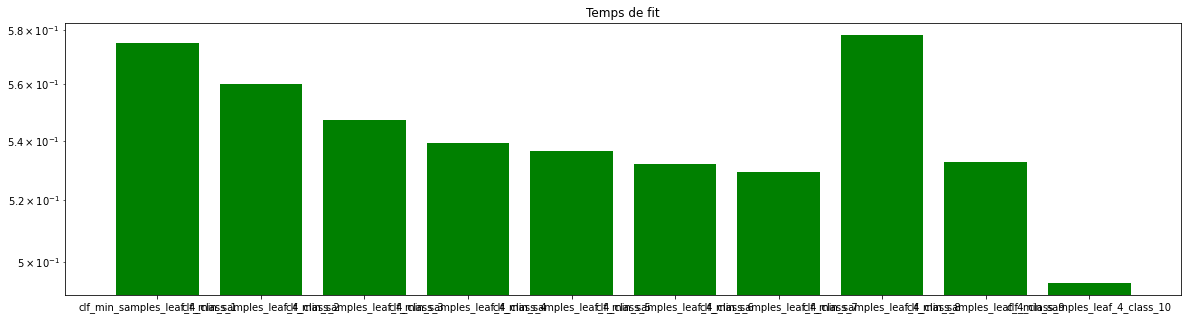

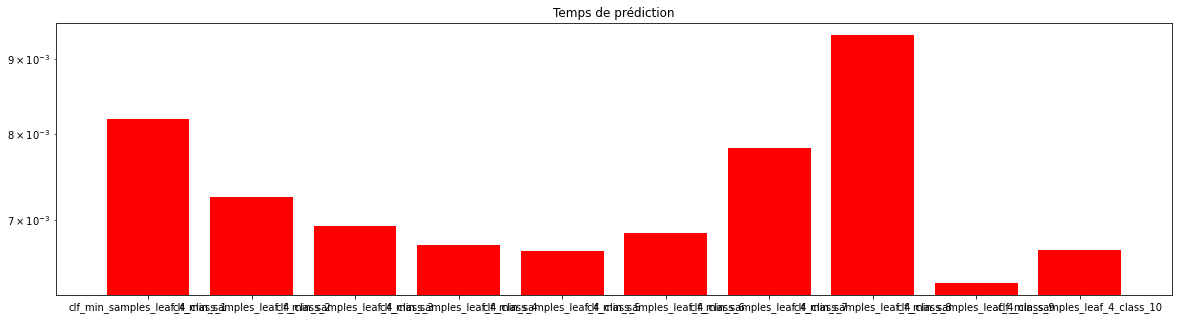

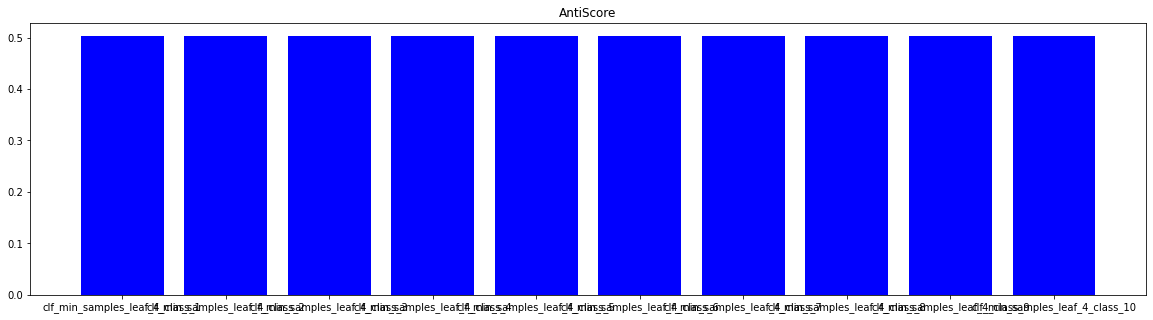

--->  clf_min_weight_fraction_leaf_4_class_0.0
temps de fit :  0.5776751041412354
temps de prédiction :  0.007287263870239258
antiscore :  0.15684956301391118
--->  clf_min_weight_fraction_leaf_4_class_0.1
temps de fit :  0.18066835403442383
temps de prédiction :  0.005055904388427734
antiscore :  0.3063039768319802
--->  clf_min_weight_fraction_leaf_4_class_0.2
temps de fit :  0.1588118076324463
temps de prédiction :  0.00482940673828125
antiscore :  0.3023736877488752
--->  clf_min_weight_fraction_leaf_4_class_0.3
temps de fit :  0.10942363739013672
temps de prédiction :  0.004670619964599609
antiscore :  0.330144282980814
--->  clf_min_weight_fraction_leaf_4_class_0.4
temps de fit :  0.1091763973236084
temps de prédiction :  0.004869699478149414
antiscore :  0.330144282980814
--->  clf_min_weight_fraction_leaf_4_class_0.5
temps de fit :  0.10697531700134277
temps de prédiction :  0.004380464553833008
antiscore :  0.497336712002896


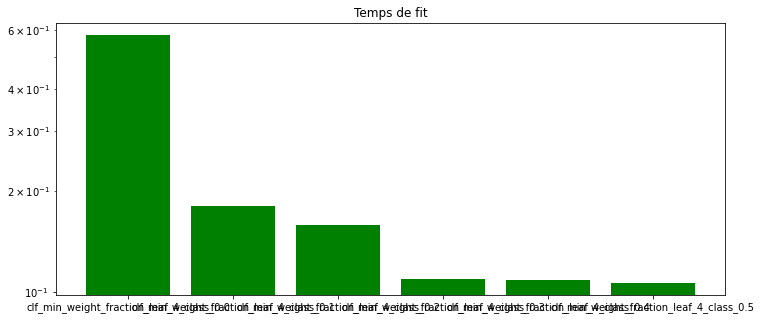

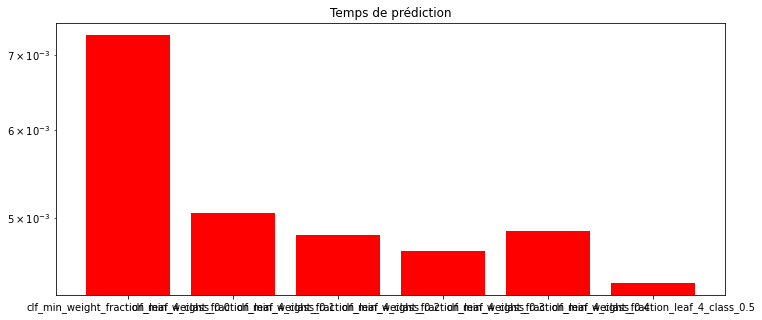

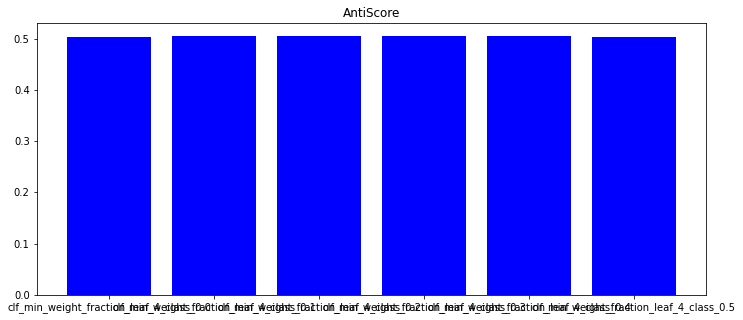

--->  clf_max_leaf_nodes_4_class_None
temps de fit :  0.5797319412231445
temps de prédiction :  0.007154941558837891
antiscore :  0.15684956301391118
--->  clf_max_leaf_nodes_4_class_2
temps de fit :  0.161865234375
temps de prédiction :  0.004636049270629883
antiscore :  0.330144282980814
--->  clf_max_leaf_nodes_4_class_3
temps de fit :  0.18561339378356934
temps de prédiction :  0.0046844482421875
antiscore :  0.3147334126286394
--->  clf_max_leaf_nodes_4_class_4
temps de fit :  0.21229910850524902
temps de prédiction :  0.005699872970581055
antiscore :  0.29389253762217515
--->  clf_max_leaf_nodes_4_class_5
temps de fit :  0.24080872535705566
temps de prédiction :  0.005094289779663086
antiscore :  0.27124166106428094
--->  clf_max_leaf_nodes_4_class_6
temps de fit :  0.24065923690795898
temps de prédiction :  0.004878520965576172
antiscore :  0.25541707607177944
--->  clf_max_leaf_nodes_4_class_7
temps de fit :  0.24608469009399414
temps de prédiction :  0.00487518310546875
antisc

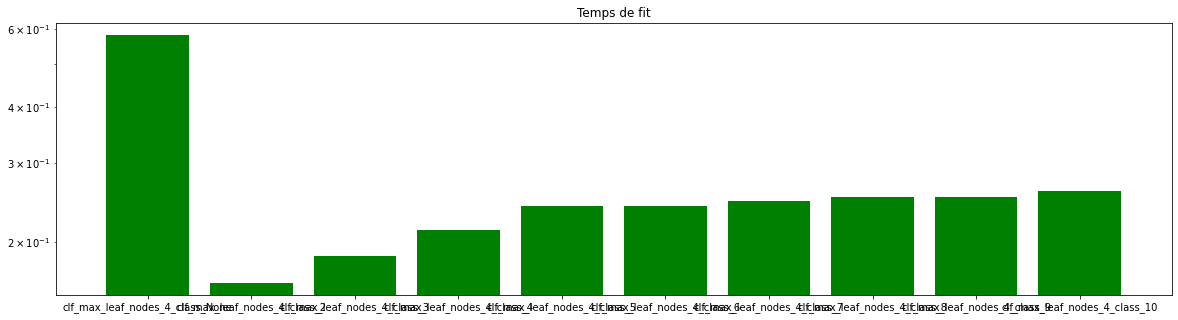

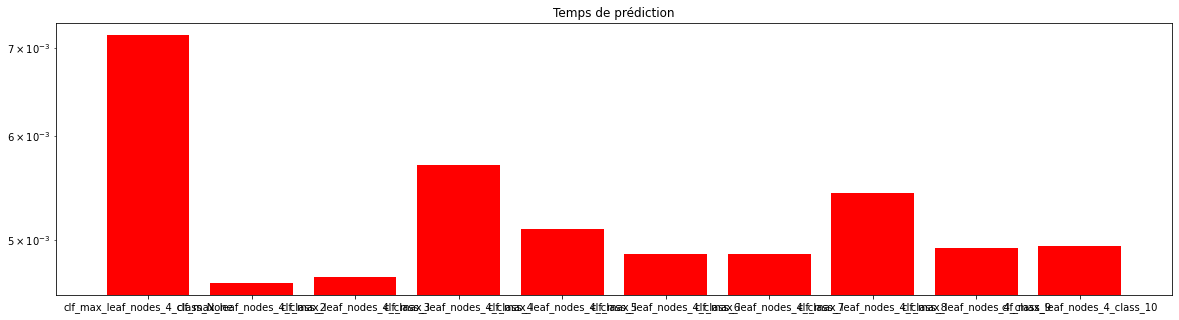

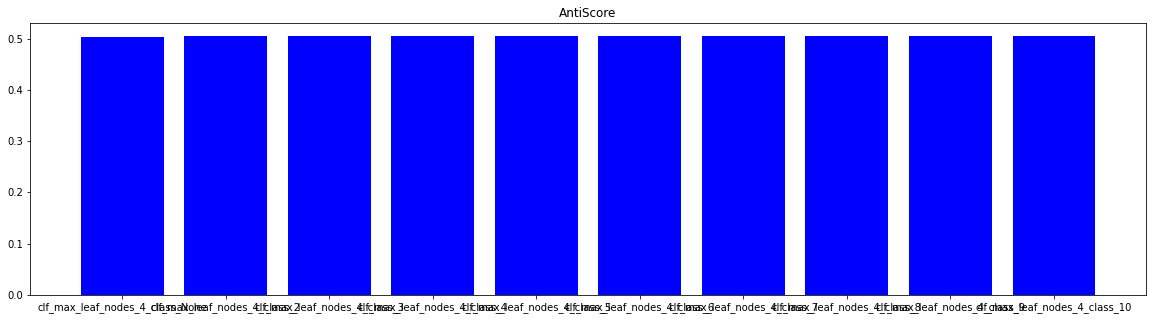

--->  clf_min_impurity_decrease_4_class_0.0
temps de fit :  0.5728929042816162
temps de prédiction :  0.0071756839752197266
antiscore :  0.15684956301391118
--->  clf_min_impurity_decrease_4_class_0.1
temps de fit :  0.15976762771606445
temps de prédiction :  0.004651308059692383
antiscore :  0.330144282980814
--->  clf_min_impurity_decrease_4_class_0.2
temps de fit :  0.15883731842041016
temps de prédiction :  0.004527568817138672
antiscore :  0.330144282980814
--->  clf_min_impurity_decrease_4_class_0.3
temps de fit :  0.16109848022460938
temps de prédiction :  0.00474095344543457
antiscore :  0.330144282980814
--->  clf_min_impurity_decrease_4_class_0.4
temps de fit :  0.10889744758605957
temps de prédiction :  0.004172325134277344
antiscore :  0.497336712002896
--->  clf_min_impurity_decrease_4_class_0.5
temps de fit :  0.1136317253112793
temps de prédiction :  0.004252910614013672
antiscore :  0.497336712002896


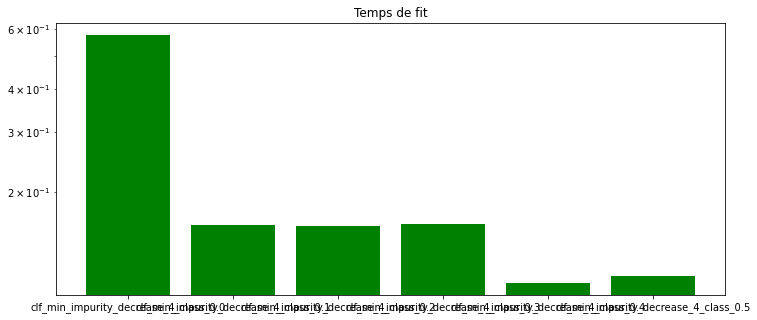

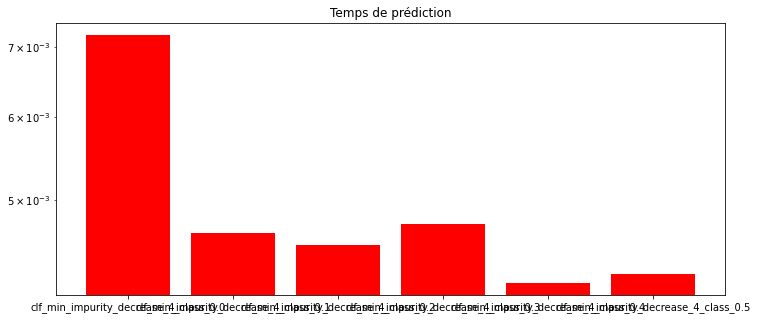

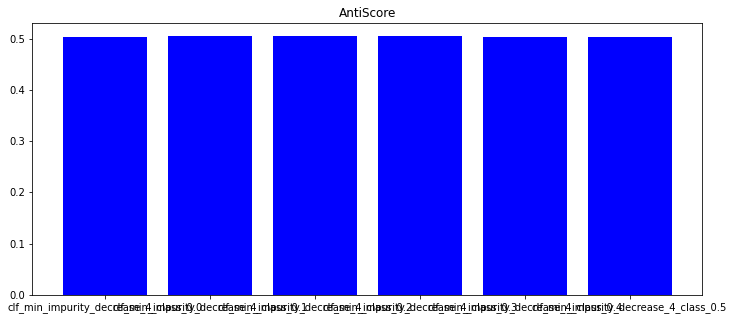

--->  clf_ccp_alpha_4_class_0.0
temps de fit :  0.5744154453277588
temps de prédiction :  0.007174253463745117
antiscore :  0.15684956301391118
--->  clf_ccp_alpha_4_class_0.1
temps de fit :  0.6817312240600586
temps de prédiction :  0.004813432693481445
antiscore :  0.330144282980814
--->  clf_ccp_alpha_4_class_0.2
temps de fit :  0.6757447719573975
temps de prédiction :  0.004765748977661133
antiscore :  0.330144282980814
--->  clf_ccp_alpha_4_class_0.3
temps de fit :  0.6702010631561279
temps de prédiction :  0.004796504974365234
antiscore :  0.330144282980814
--->  clf_ccp_alpha_4_class_0.4
temps de fit :  0.6702480316162109
temps de prédiction :  0.004645824432373047
antiscore :  0.497336712002896
--->  clf_ccp_alpha_4_class_0.5
temps de fit :  0.6757373809814453
temps de prédiction :  0.004483699798583984
antiscore :  0.497336712002896


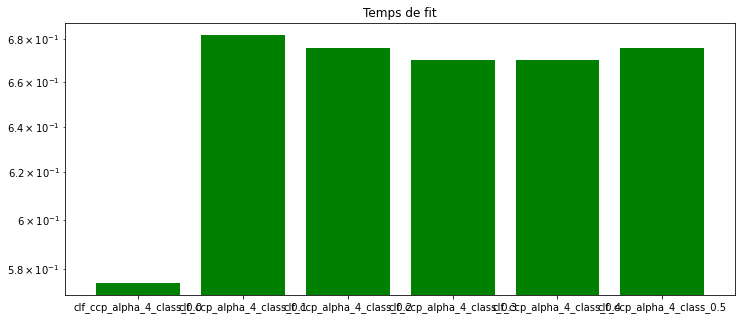

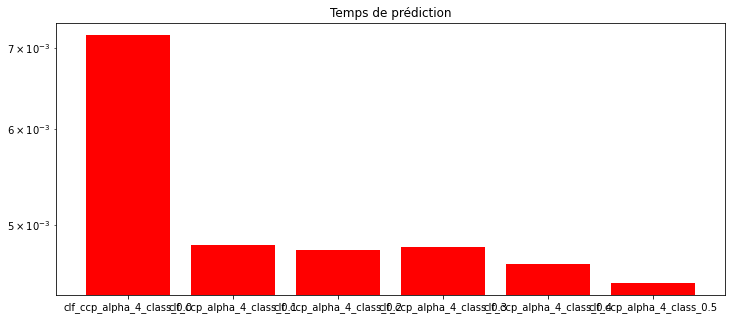

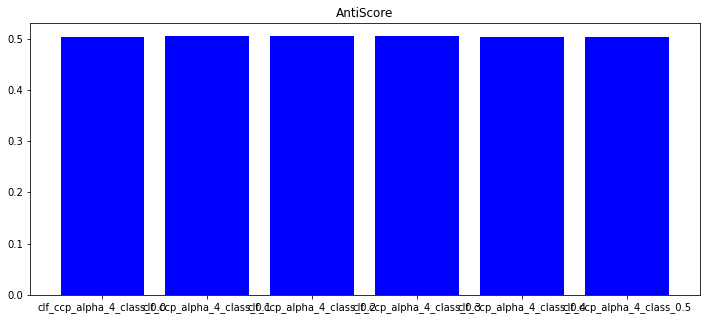

In [64]:
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    test_model_4_class("clf_max_depth_4_class_"+str(max_depth),tree.DecisionTreeClassifier,random_state=42,max_depth=max_depth)
compare(time_fit, time_pred, models)
clean_tabs()
for class_weight in [None, 'balanced']:
    test_model_4_class("clf_class_weight_4_class_"+str(class_weight),tree.DecisionTreeClassifier,random_state=42,class_weight=class_weight)
compare(time_fit, time_pred, models)
clean_tabs()
for criterion in ['gini', 'entropy']:
    test_model_4_class("clf_criterion_4_class_"+str(criterion),tree.DecisionTreeClassifier,random_state=42,criterion=criterion)
compare(time_fit, time_pred, models)
clean_tabs()
for splitter in ['best', 'random']:
    test_model_4_class("clf_splitter_4_class_"+str(splitter),tree.DecisionTreeClassifier,random_state=42,splitter=splitter)
compare(time_fit, time_pred, models)
clean_tabs()
for max_features in [None, 'auto', 'sqrt', 'log2']:
    test_model_4_class("clf_max_features_4_class_"+str(max_features),tree.DecisionTreeClassifier,random_state=42,max_features=max_features)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_split in [2,3,4,5,6,7,8,9,10]:
    test_model_4_class("clf_min_samples_split_4_class_"+str(min_samples_split),tree.DecisionTreeClassifier,random_state=42,min_samples_split=min_samples_split)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_leaf in [1,2,3,4,5,6,7,8,9,10]:
    test_model_4_class("clf_min_samples_leaf_4_class_"+str(min_samples_leaf),tree.DecisionTreeClassifier,random_state=42,min_samples_leaf=min_samples_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for min_weight_fraction_leaf in [0.0,0.1,0.2,0.3,0.4,0.5]:
    test_model_4_class("clf_min_weight_fraction_leaf_4_class_"+str(min_weight_fraction_leaf),tree.DecisionTreeClassifier,random_state=42,min_weight_fraction_leaf=min_weight_fraction_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for max_leaf_nodes in [None,2,3,4,5,6,7,8,9,10]:
    test_model_4_class("clf_max_leaf_nodes_4_class_"+str(max_leaf_nodes),tree.DecisionTreeClassifier,random_state=42,max_leaf_nodes=max_leaf_nodes)
compare(time_fit, time_pred, models)
clean_tabs()
for min_impurity_decrease in [0.0,0.1,0.2,0.3,0.4,0.5]:
    test_model_4_class("clf_min_impurity_decrease_4_class_"+str(min_impurity_decrease),tree.DecisionTreeClassifier,random_state=42,min_impurity_decrease=min_impurity_decrease)
compare(time_fit, time_pred, models)
clean_tabs()
for ccp_alpha in [0.0,0.1,0.2,0.3,0.4,0.5]:
    test_model_4_class("clf_ccp_alpha_4_class_"+str(ccp_alpha),tree.DecisionTreeClassifier,random_state=42,ccp_alpha=ccp_alpha)
compare(time_fit, time_pred, models)
clean_tabs()

## XGBoost

## Binary-classification

--->  xbg_max_depth_1
[14:15:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.1183602809906006
temps de prédiction :  0.015084981918334961
antiscore :  0.00025857165020426454
--->  xbg_max_depth_2
[14:15:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.5778396129608154
temps de prédiction :  0.017256975173950195
antiscore :  5.17143300408085e-05
--->  xbg_max_depth_3
[14:15:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_

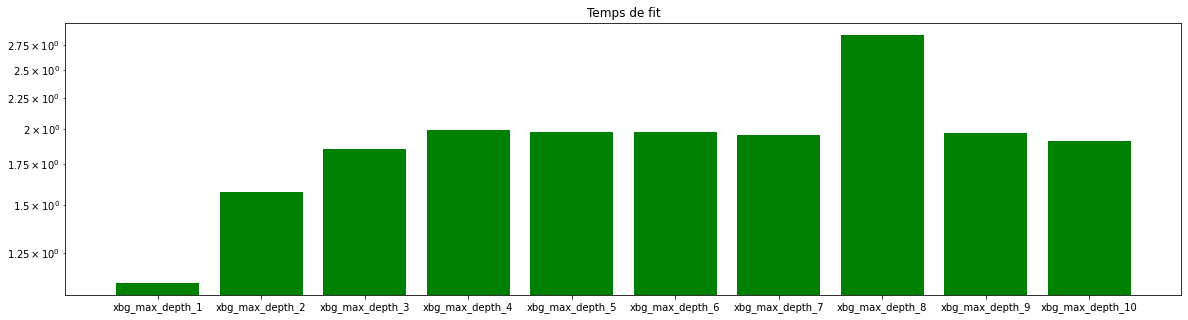

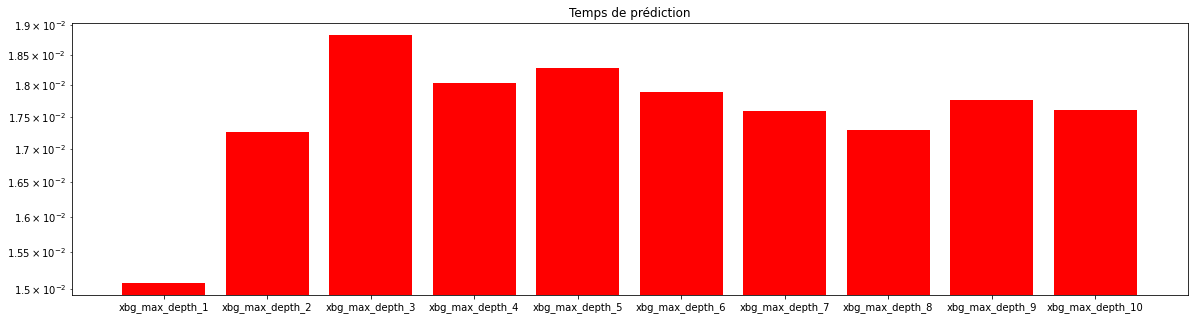

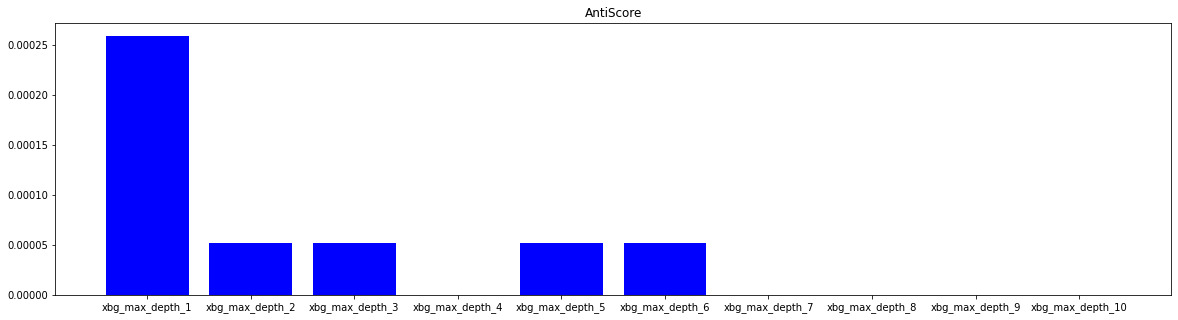

--->  xbg_learning_rate_0.01
[14:15:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  3.2502999305725098
temps de prédiction :  0.020501136779785156
antiscore :  0.0007240006205719851
--->  xbg_learning_rate_0.1
[14:15:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  2.89228892326355
temps de prédiction :  0.02016472816467285
antiscore :  0.0
--->  xbg_learning_rate_0.5
[14:15:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_me

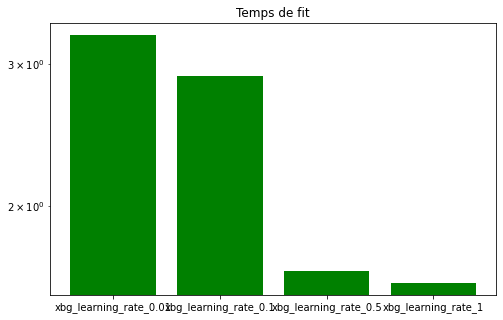

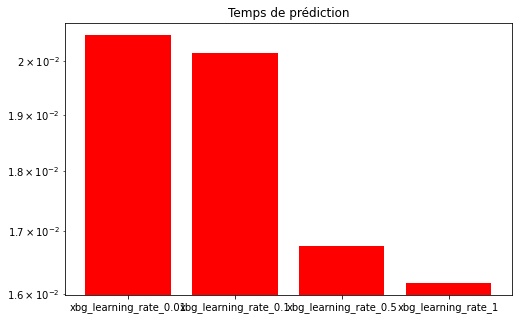

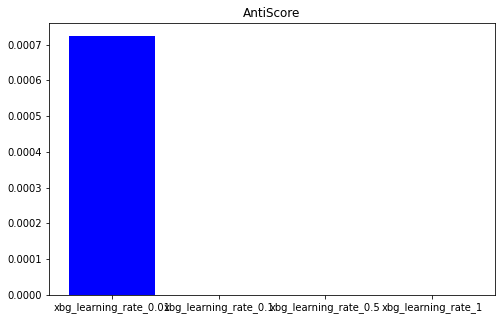

--->  xbg_n_estimators_10
[14:16:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  0.42125821113586426
temps de prédiction :  0.013349294662475586
antiscore :  0.00010342866008172802
--->  xbg_n_estimators_100
[14:16:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.91092848777771
temps de prédiction :  0.01752614974975586
antiscore :  5.17143300408085e-05
--->  xbg_n_estimators_1000
[14:16:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

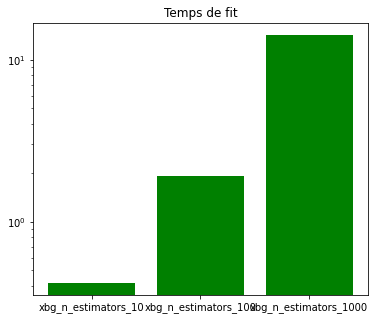

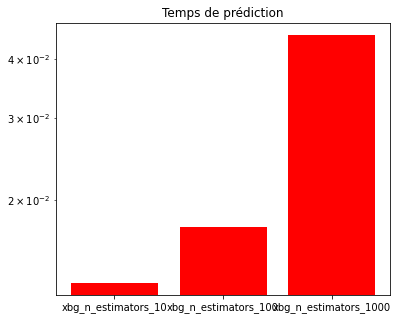

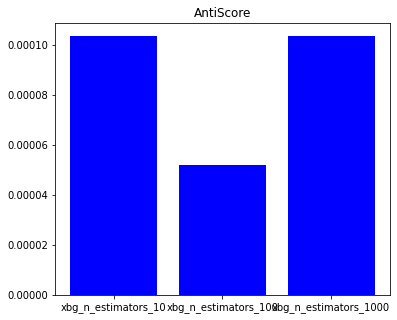

--->  xbg_booster_gbtree
[14:16:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.935577154159546
temps de prédiction :  0.01747918128967285
antiscore :  5.17143300408085e-05
--->  xbg_booster_gblinear
[14:16:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  0.695136308670044
temps de prédiction :  0.01793503761291504
antiscore :  0.0072917205357604375
--->  xbg_booster_dart
[14:16:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set e

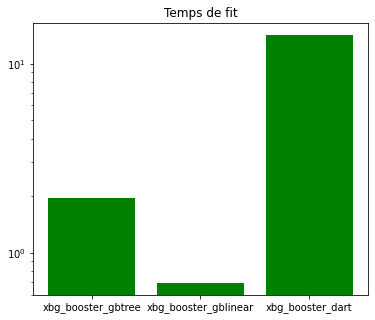

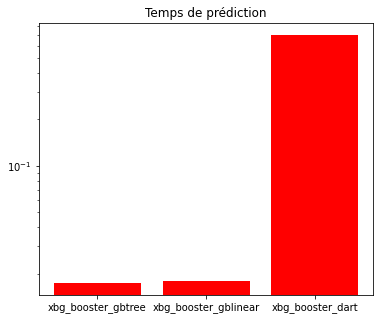

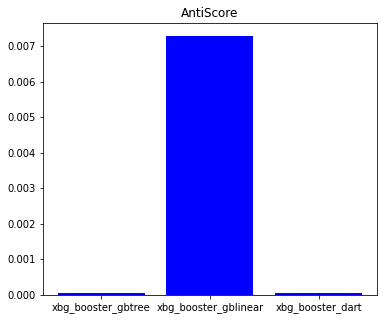

--->  xbg_colsample_bytree_0.1
[14:16:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.2869408130645752
temps de prédiction :  0.02698993682861328
antiscore :  0.00015514299012253652
--->  xbg_colsample_bytree_0.5
[14:16:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.4332103729248047
temps de prédiction :  0.019094228744506836
antiscore :  0.0
--->  xbg_colsample_bytree_1
[14:16:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly se

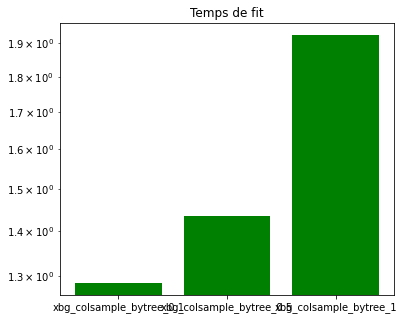

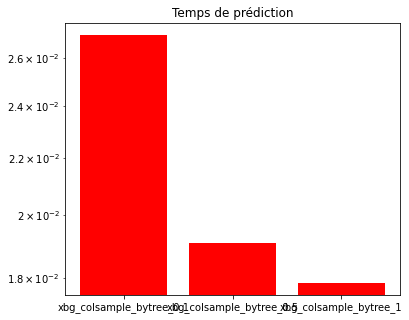

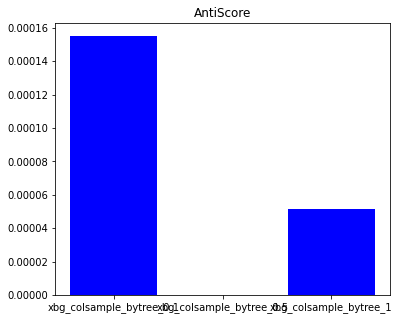

--->  xbg_colsample_bylevel_0.1
[14:16:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.3477842807769775
temps de prédiction :  0.02188897132873535
antiscore :  0.00010342866008172802
--->  xbg_colsample_bylevel_0.5
[14:16:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.40561842918396
temps de prédiction :  0.0182645320892334
antiscore :  5.17143300408085e-05
--->  xbg_colsample_bylevel_1
[14:16:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss

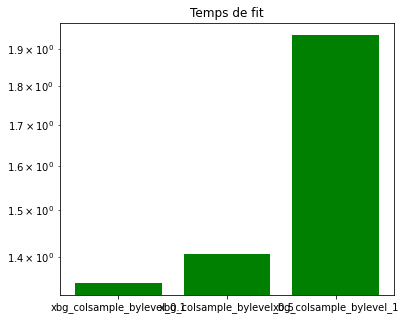

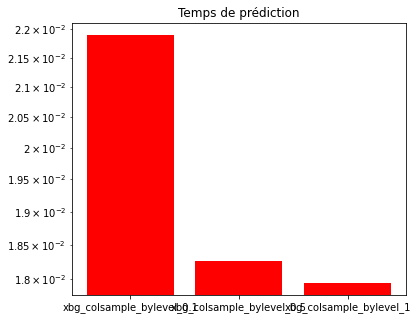

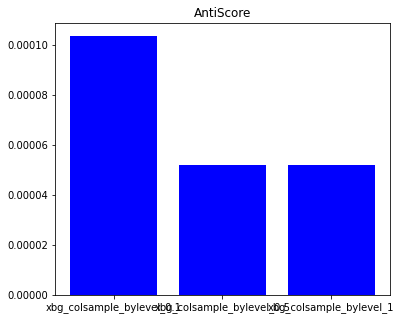

--->  xbg_colsample_bynode_0.1
[14:16:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.0508456230163574
temps de prédiction :  0.02139449119567871
antiscore :  0.00010342866008172802
--->  xbg_colsample_bynode_0.5
[14:16:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.384354591369629
temps de prédiction :  0.018022775650024414
antiscore :  5.17143300408085e-05
--->  xbg_colsample_bynode_1
[14:16:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss

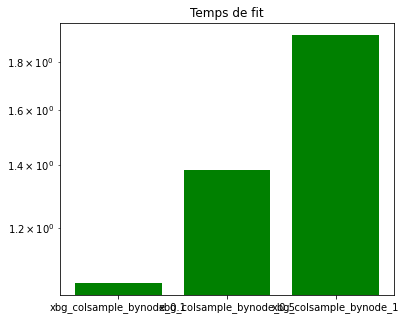

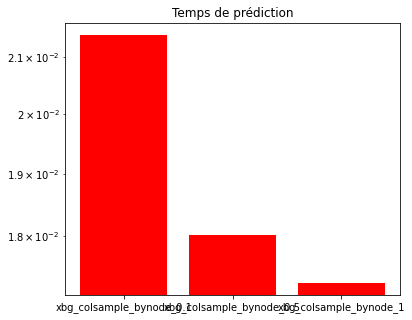

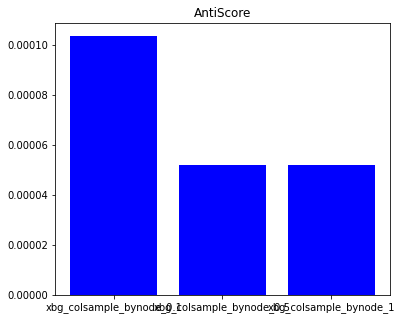

--->  xbg_reg_alpha_0
[14:16:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.9432158470153809
temps de prédiction :  0.01836848258972168
antiscore :  5.17143300408085e-05
--->  xbg_reg_alpha_0.1
[14:16:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.9760499000549316
temps de prédiction :  0.017891407012939453
antiscore :  0.0
--->  xbg_reg_alpha_0.5
[14:17:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd 

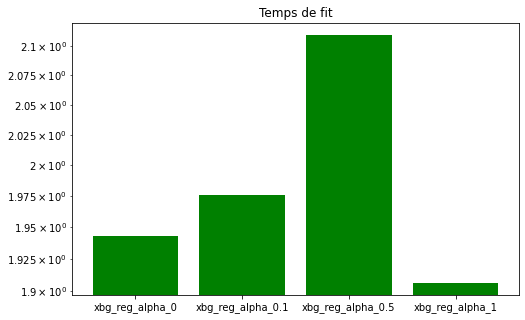

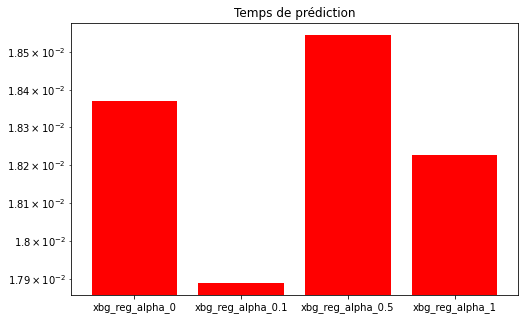

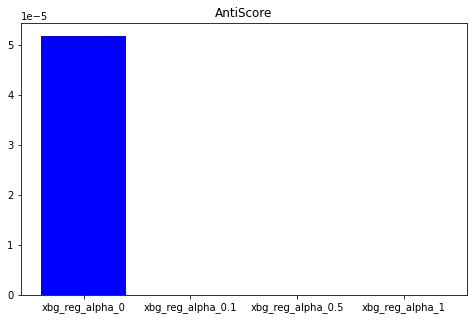

--->  xbg_reg_lambda_0
[14:17:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  2.064959764480591
temps de prédiction :  0.018611907958984375
antiscore :  0.0
--->  xbg_reg_lambda_0.1
[14:17:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.9019920825958252
temps de prédiction :  0.024018526077270508
antiscore :  5.17143300408085e-05
--->  xbg_reg_lambda_0.5
[14:17:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you

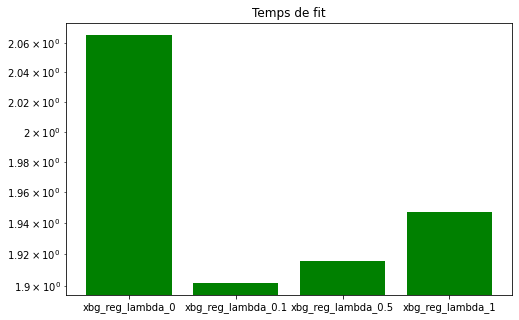

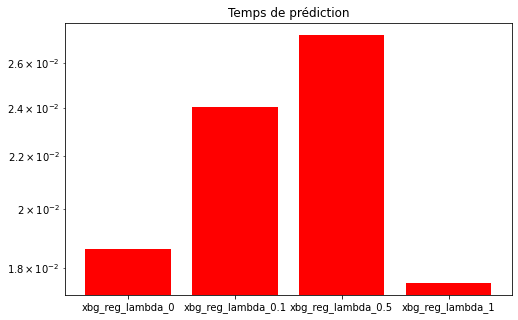

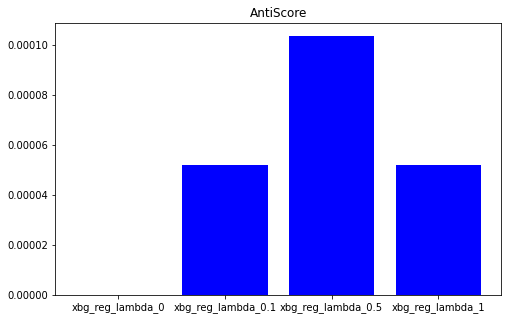

--->  xbg_scale_pos_weight_0.1
[14:17:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  2.3473291397094727
temps de prédiction :  0.017561912536621094
antiscore :  0.00020685732016345604
--->  xbg_scale_pos_weight_0.5
[14:17:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.9033534526824951
temps de prédiction :  0.017976999282836914
antiscore :  0.00010342866008172802
--->  xbg_scale_pos_weight_1
[14:17:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'log

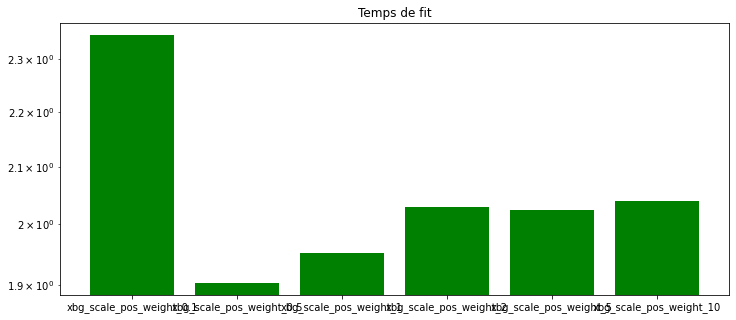

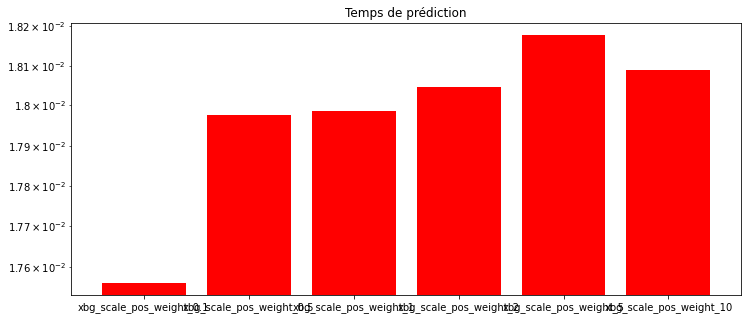

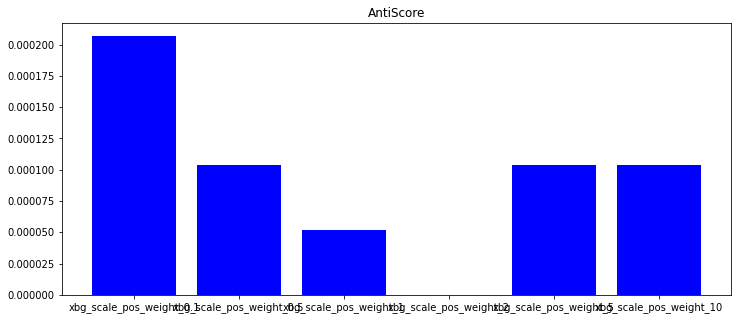

In [65]:
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    test_model("xbg_max_depth_"+str(max_depth),XGBClassifier,objective="binary:logistic",random_state=42,max_depth=max_depth)
compare(time_fit, time_pred, models)
clean_tabs()
for learning_rate in [0.01,0.1,0.5,1]:
    test_model("xbg_learning_rate_"+str(learning_rate),XGBClassifier,objective="binary:logistic",random_state=42,learning_rate=learning_rate)
compare(time_fit, time_pred, models)
clean_tabs()
for n_estimators in [10,100,1000]:
    test_model("xbg_n_estimators_"+str(n_estimators),XGBClassifier,objective="binary:logistic",random_state=42,n_estimators=n_estimators)
compare(time_fit, time_pred, models)
clean_tabs()
for booster in ['gbtree', 'gblinear', 'dart']:
    test_model("xbg_booster_"+str(booster),XGBClassifier,objective="binary:logistic",random_state=42,booster=booster)
compare(time_fit, time_pred, models)
clean_tabs()
for colsample_bytree in [0.1,0.5,1]:
    test_model("xbg_colsample_bytree_"+str(colsample_bytree),XGBClassifier,objective="binary:logistic",random_state=42,colsample_bytree=colsample_bytree)
compare(time_fit, time_pred, models)
clean_tabs()
for colsample_bylevel in [0.1,0.5,1]:
    test_model("xbg_colsample_bylevel_"+str(colsample_bylevel),XGBClassifier,objective="binary:logistic",random_state=42,colsample_bylevel=colsample_bylevel)
compare(time_fit, time_pred, models)
clean_tabs()
for colsample_bynode in [0.1,0.5,1]:
    test_model("xbg_colsample_bynode_"+str(colsample_bynode),XGBClassifier,objective="binary:logistic",random_state=42,colsample_bynode=colsample_bynode)
compare(time_fit, time_pred, models)
clean_tabs()
for reg_alpha in [0,0.1,0.5,1]:
    test_model("xbg_reg_alpha_"+str(reg_alpha),XGBClassifier,objective="binary:logistic",random_state=42,reg_alpha=reg_alpha)
compare(time_fit, time_pred, models)
clean_tabs()
for reg_lambda in [0,0.1,0.5,1]:
    test_model("xbg_reg_lambda_"+str(reg_lambda),XGBClassifier,objective="binary:logistic",random_state=42,reg_lambda=reg_lambda)
compare(time_fit, time_pred, models)
clean_tabs()
for scale_pos_weight in [0.1,0.5,1,2,5,10]:
    test_model("xbg_scale_pos_weight_"+str(scale_pos_weight),XGBClassifier,objective="binary:logistic",random_state=42,scale_pos_weight=scale_pos_weight)
compare(time_fit, time_pred, models)
clean_tabs()

## 4-classification

--->  xbg_max_depth_4_class_1
[14:17:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  2.9883596897125244
temps de prédiction :  0.024042367935180664
antiscore :  0.21632104256089357
--->  xbg_max_depth_4_class_2
[14:17:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  5.159913778305054
temps de prédiction :  0.03309488296508789
antiscore :  0.18136215545327605
--->  xbg_max_depth_4_class_3
[14:17:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'.

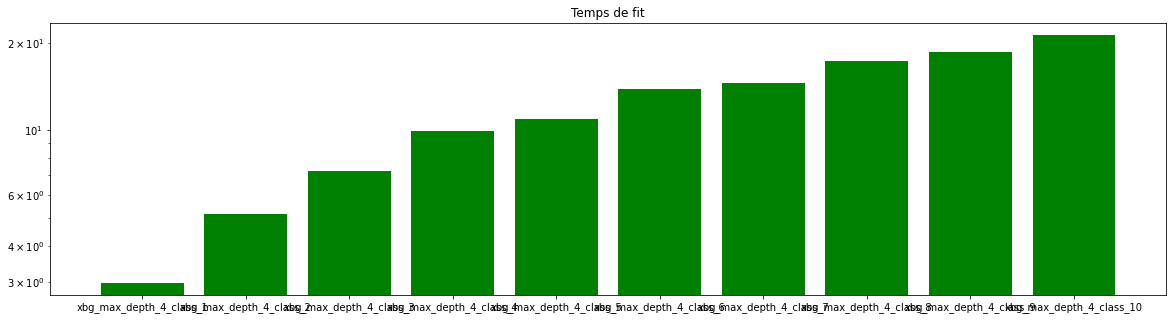

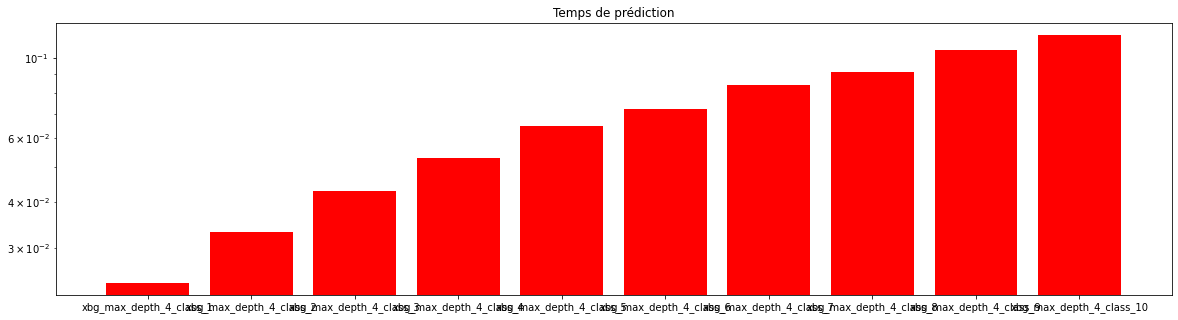

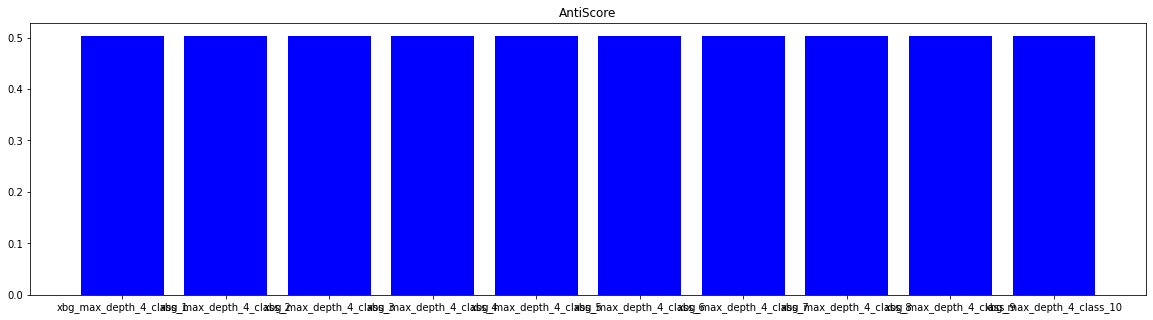

--->  xbg_learning_rate_4_class_0.01
[14:19:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  14.187083959579468
temps de prédiction :  0.06958460807800293
antiscore :  0.1914981641412835
--->  xbg_learning_rate_4_class_0.1
[14:19:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  14.375507116317749
temps de prédiction :  0.06848359107971191
antiscore :  0.15007498577855927
--->  xbg_learning_rate_4_class_0.5
[14:20:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merr

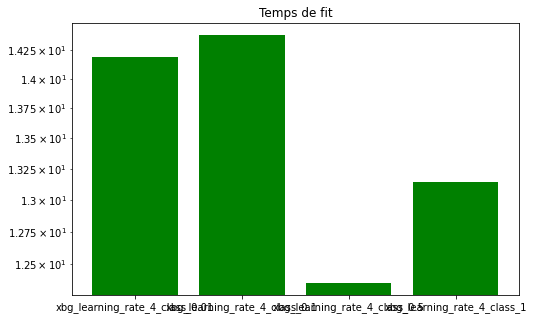

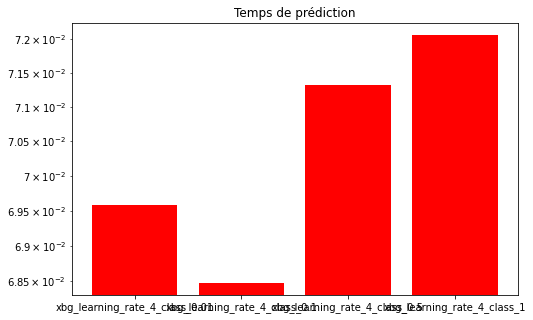

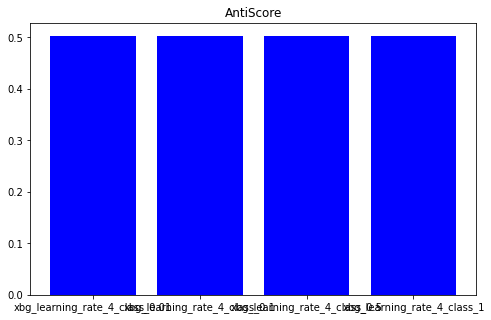

--->  xbg_n_estimators_4_class_10
[14:20:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  1.4840149879455566
temps de prédiction :  0.018265724182128906
antiscore :  0.17706986605988517
--->  xbg_n_estimators_4_class_100
[14:20:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  12.79277491569519
temps de prédiction :  0.07387852668762207
antiscore :  0.12990639706262608
--->  xbg_n_estimators_4_class_1000
[14:20:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror'

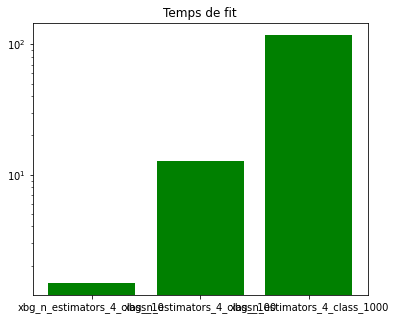

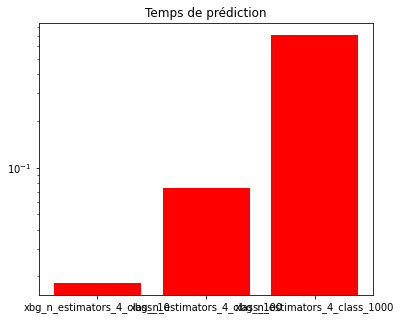

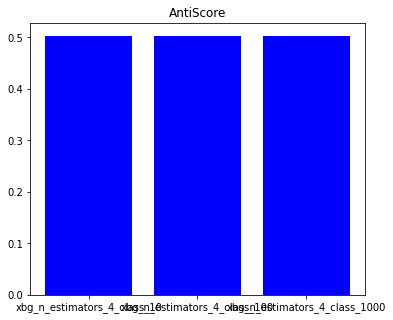

--->  xbg_booster_4_class_gbtree
[14:22:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  13.834018468856812
temps de prédiction :  0.07347369194030762
antiscore :  0.12990639706262608
--->  xbg_booster_4_class_gblinear
[14:23:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  2.094306468963623
temps de prédiction :  0.019453763961791992
antiscore :  0.30144282980813986
--->  xbg_booster_4_class_dart
[14:23:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'm

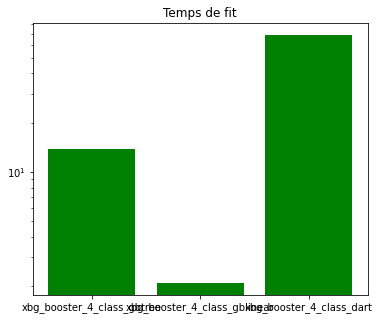

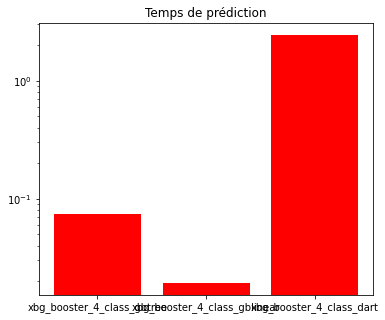

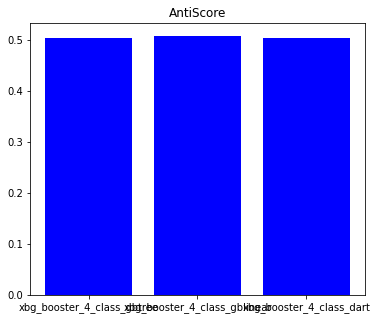

--->  xbg_colsample_bytree_4_class_0.1
[14:24:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  4.449645757675171
temps de prédiction :  0.0846400260925293
antiscore :  0.14929927082794647
--->  xbg_colsample_bytree_4_class_0.5
[14:24:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  8.300445079803467
temps de prédiction :  0.07717442512512207
antiscore :  0.13300925686507736
--->  xbg_colsample_bytree_4_class_1
[14:24:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from '

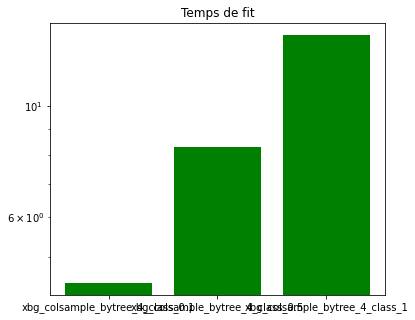

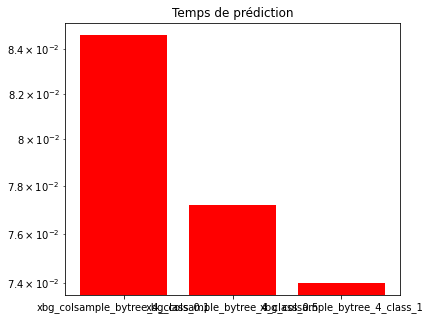

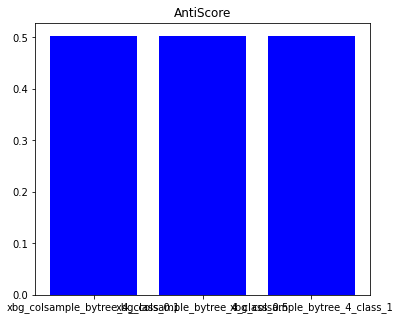

--->  xbg_colsample_bylevel_4_class_0.1
[14:24:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  4.352767705917358
temps de prédiction :  0.08183121681213379
antiscore :  0.14169726431194085
--->  xbg_colsample_bylevel_4_class_0.5
[14:24:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  8.352645635604858
temps de prédiction :  0.0741426944732666
antiscore :  0.13207839892434192
--->  xbg_colsample_bylevel_4_class_1
[14:25:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed fro

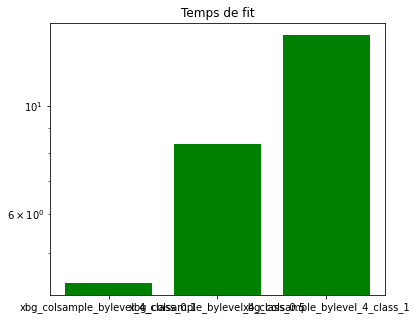

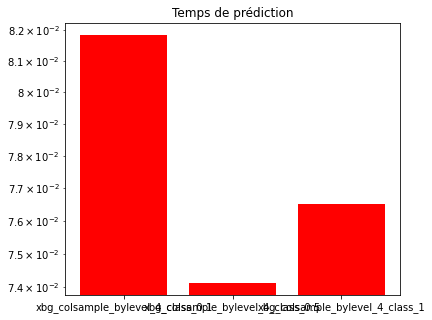

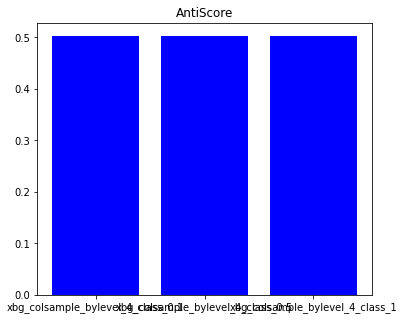

--->  xbg_colsample_bynode_4_class_0.1
[14:25:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  4.420860528945923
temps de prédiction :  0.08178997039794922
antiscore :  0.14169726431194085
--->  xbg_colsample_bynode_4_class_0.5
[14:25:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  8.416064500808716
temps de prédiction :  0.07600116729736328
antiscore :  0.13207839892434192
--->  xbg_colsample_bynode_4_class_1
[14:25:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 

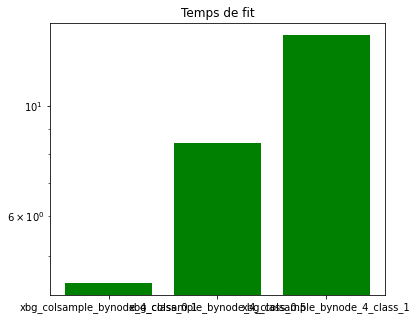

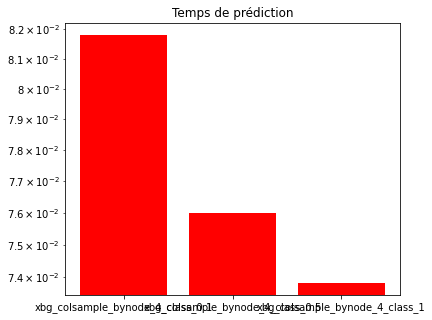

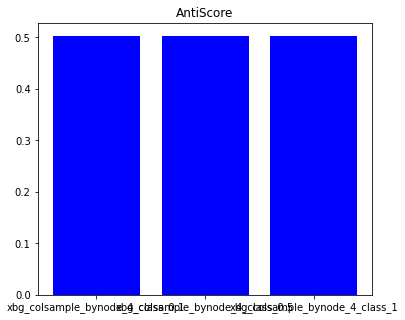

--->  xbg_reg_alpha_4_class_0
[14:25:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  12.830482959747314
temps de prédiction :  0.0737607479095459
antiscore :  0.12990639706262608
--->  xbg_reg_alpha_4_class_0.1
[14:25:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  14.106497287750244
temps de prédiction :  0.07562398910522461
antiscore :  0.12969953974246262
--->  xbg_reg_alpha_4_class_0.5
[14:26:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mloglos

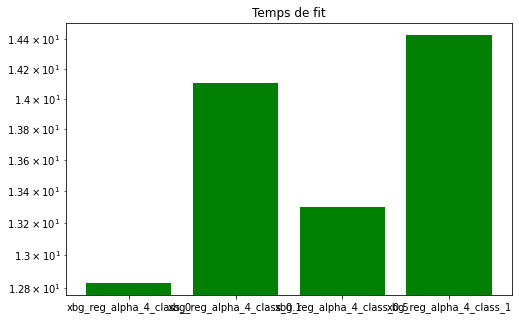

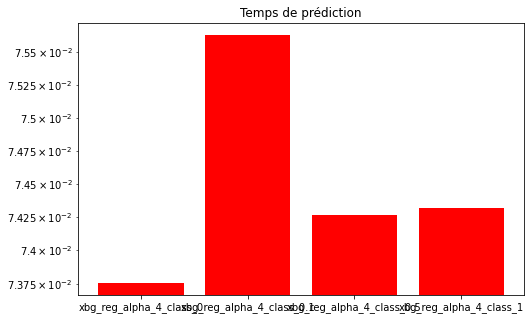

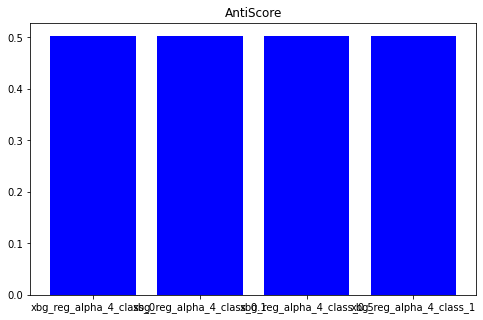

--->  xbg_reg_lambda_4_class_0
[14:26:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  13.14057183265686
temps de prédiction :  0.07597899436950684
antiscore :  0.12768268087086931
--->  xbg_reg_lambda_4_class_0.1
[14:26:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  12.885348320007324
temps de prédiction :  0.07298564910888672
antiscore :  0.1284066814914413
--->  xbg_reg_lambda_4_class_0.5
[14:27:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogl

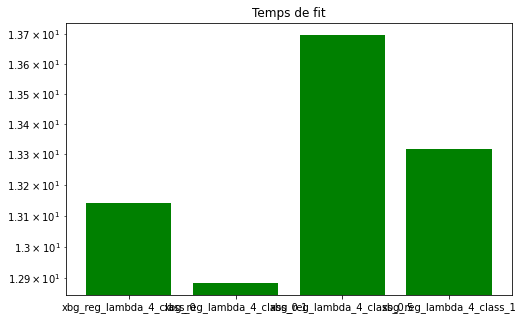

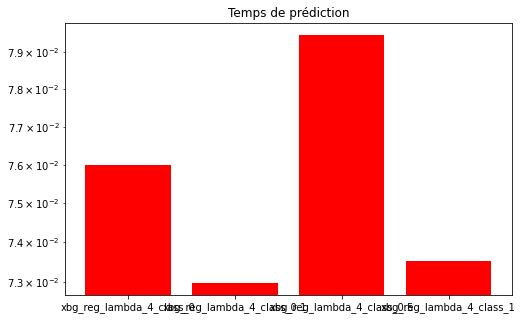

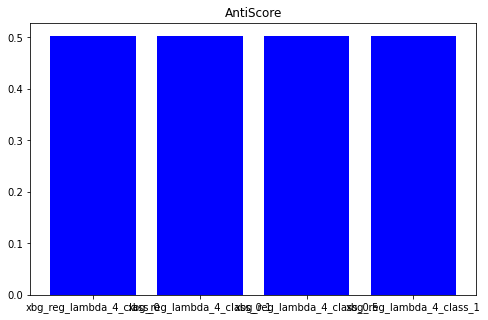

--->  xbg_scale_pos_weight_4_class_0.1
[14:27:36] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:27:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
temps de fit :  14.237613201141357
temps de prédiction :  0.07388997077941895
antiscore :  0.12990639706262608
--->  xbg_scale_pos_weight_4_class_0.5
[14:27:50] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  

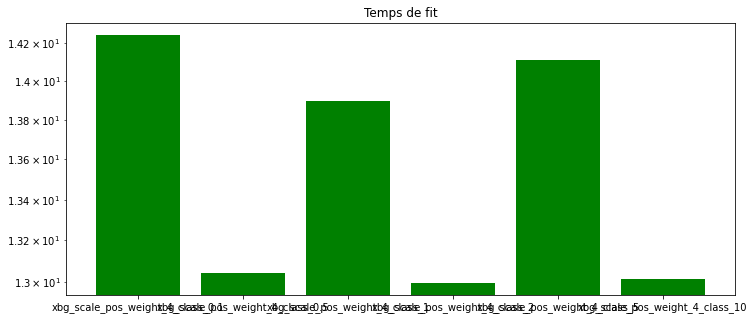

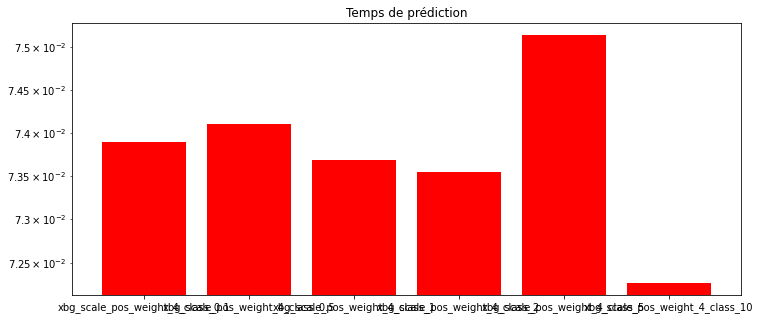

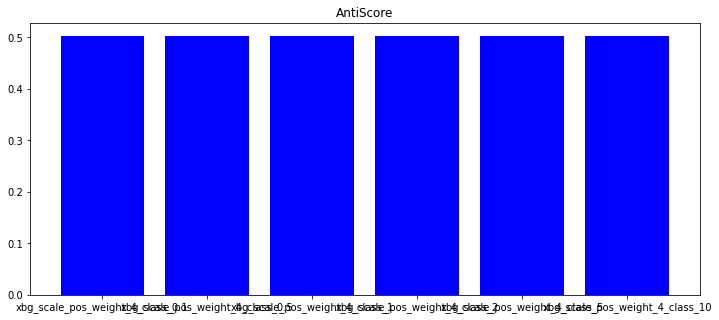

In [66]:
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    test_model_4_class("xbg_max_depth_4_class_"+str(max_depth),XGBClassifier,objective="binary:logistic",random_state=42,max_depth=max_depth)
compare(time_fit, time_pred, models)
clean_tabs()
for learning_rate in [0.01,0.1,0.5,1]:
    test_model_4_class("xbg_learning_rate_4_class_"+str(learning_rate),XGBClassifier,objective="binary:logistic",random_state=42,learning_rate=learning_rate)
compare(time_fit, time_pred, models)
clean_tabs()
for n_estimators in [10,100,1000]:
    test_model_4_class("xbg_n_estimators_4_class_"+str(n_estimators),XGBClassifier,objective="binary:logistic",random_state=42,n_estimators=n_estimators)
compare(time_fit, time_pred, models)
clean_tabs()
for booster in ['gbtree', 'gblinear', 'dart']:
    test_model_4_class("xbg_booster_4_class_"+str(booster),XGBClassifier,objective="binary:logistic",random_state=42,booster=booster)
compare(time_fit, time_pred, models)
clean_tabs()
for colsample_bytree in [0.1,0.5,1]:
    test_model_4_class("xbg_colsample_bytree_4_class_"+str(colsample_bytree),XGBClassifier,objective="binary:logistic",random_state=42,colsample_bytree=colsample_bytree)
compare(time_fit, time_pred, models)
clean_tabs()
for colsample_bylevel in [0.1,0.5,1]:
    test_model_4_class("xbg_colsample_bylevel_4_class_"+str(colsample_bylevel),XGBClassifier,objective="binary:logistic",random_state=42,colsample_bylevel=colsample_bylevel)
compare(time_fit, time_pred, models)
clean_tabs()
for colsample_bynode in [0.1,0.5,1]:
    test_model_4_class("xbg_colsample_bynode_4_class_"+str(colsample_bynode),XGBClassifier,objective="binary:logistic",random_state=42,colsample_bynode=colsample_bynode)
compare(time_fit, time_pred, models)
clean_tabs()
for reg_alpha in [0,0.1,0.5,1]:
    test_model_4_class("xbg_reg_alpha_4_class_"+str(reg_alpha),XGBClassifier,objective="binary:logistic",random_state=42,reg_alpha=reg_alpha)
compare(time_fit, time_pred, models)
clean_tabs()
for reg_lambda in [0,0.1,0.5,1]:
    test_model_4_class("xbg_reg_lambda_4_class_"+str(reg_lambda),XGBClassifier,objective="binary:logistic",random_state=42,reg_lambda=reg_lambda)
compare(time_fit, time_pred, models)
clean_tabs()
for scale_pos_weight in [0.1,0.5,1,2,5,10]:
    test_model_4_class("xbg_scale_pos_weight_4_class_"+str(scale_pos_weight),XGBClassifier,objective="binary:logistic",random_state=42,scale_pos_weight=scale_pos_weight)
compare(time_fit, time_pred, models)
clean_tabs()

## Random Forest

## Binary-classification

--->  rf_n_estimators_10
temps de fit :  0.546961784362793
temps de prédiction :  0.019913434982299805
antiscore :  5.17143300408085e-05
--->  rf_n_estimators_100
temps de fit :  5.371110916137695
temps de prédiction :  0.16778922080993652
antiscore :  0.0
--->  rf_n_estimators_1000
temps de fit :  51.181490898132324
temps de prédiction :  1.4820168018341064
antiscore :  0.0


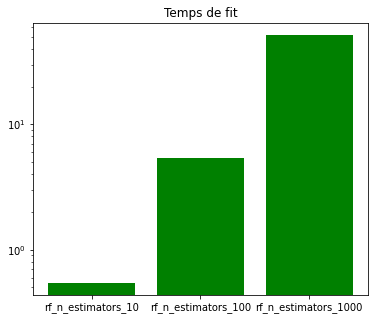

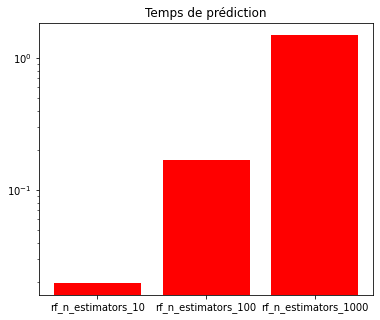

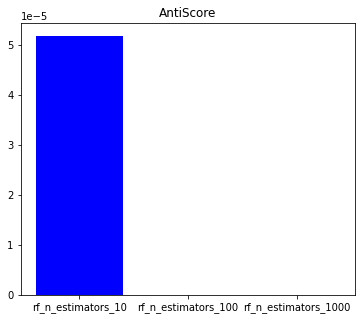

--->  rf_criterion_gini
temps de fit :  4.847971439361572
temps de prédiction :  0.15212559700012207
antiscore :  0.0
--->  rf_criterion_entropy
temps de fit :  3.9253945350646973
temps de prédiction :  0.14755654335021973
antiscore :  5.17143300408085e-05


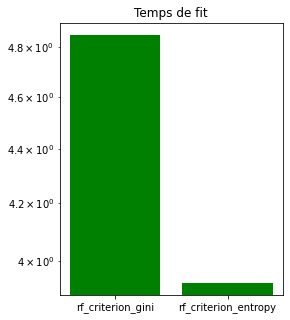

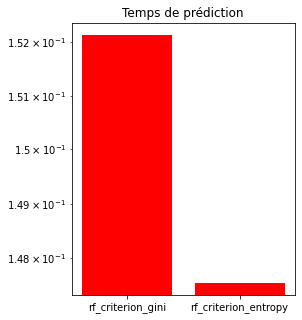

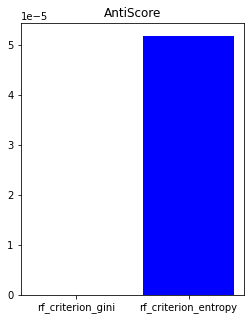

--->  rf_max_depth_1
temps de fit :  1.5580995082855225
temps de prédiction :  0.1354832649230957
antiscore :  0.013032011170295288
--->  rf_max_depth_2
temps de fit :  2.465609550476074
temps de prédiction :  0.13168597221374512
antiscore :  0.003775146092982351
--->  rf_max_depth_3
temps de fit :  2.884237051010132
temps de prédiction :  0.13933610916137695
antiscore :  0.0012928582510213227
--->  rf_max_depth_4
temps de fit :  3.5342910289764404
temps de prédiction :  0.13985157012939453
antiscore :  0.0010342866008170581
--->  rf_max_depth_5
temps de fit :  4.05594539642334
temps de prédiction :  0.14394044876098633
antiscore :  0.0006722862905310656
--->  rf_max_depth_6
temps de fit :  4.428629636764526
temps de prédiction :  0.14704179763793945
antiscore :  0.0006205719604902571
--->  rf_max_depth_7
temps de fit :  4.6276867389678955
temps de prédiction :  0.1509106159210205
antiscore :  0.0006205719604902571
--->  rf_max_depth_8
temps de fit :  4.728774309158325
temps de prédict

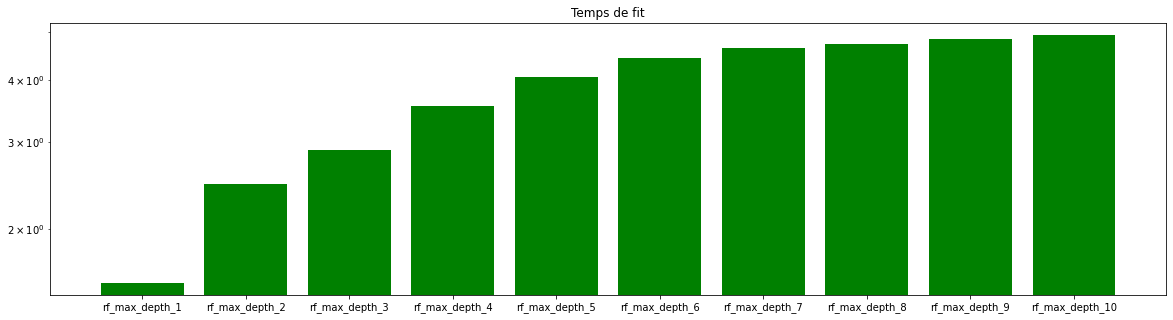

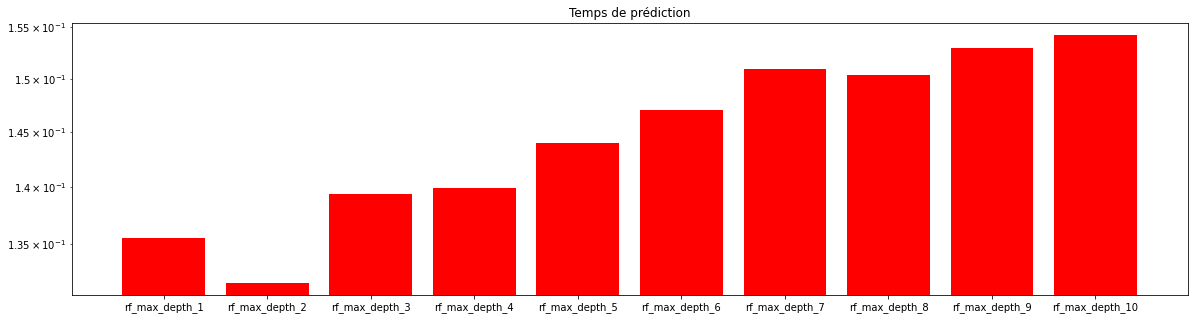

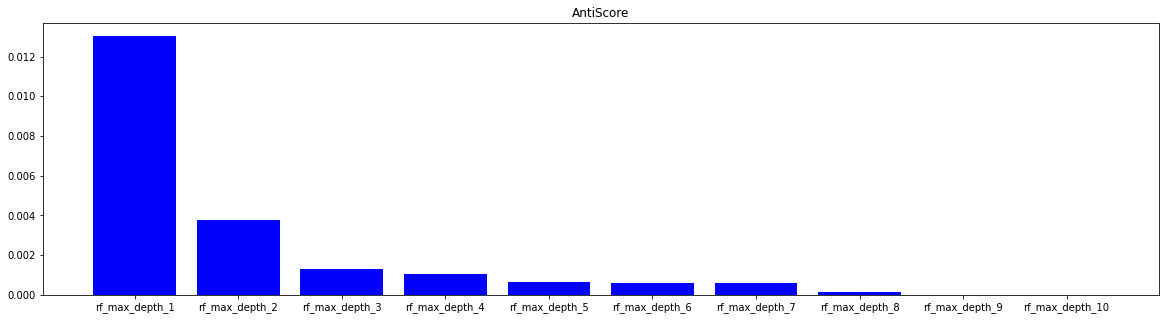

--->  rf_min_samples_split_2
temps de fit :  4.866845369338989
temps de prédiction :  0.15187573432922363
antiscore :  0.0
--->  rf_min_samples_split_3
temps de fit :  4.949992656707764
temps de prédiction :  0.15318894386291504
antiscore :  0.0
--->  rf_min_samples_split_4
temps de fit :  5.105980634689331
temps de prédiction :  0.15227317810058594
antiscore :  0.0
--->  rf_min_samples_split_5
temps de fit :  5.0398499965667725
temps de prédiction :  0.1602022647857666
antiscore :  0.0
--->  rf_min_samples_split_6
temps de fit :  5.1655402183532715
temps de prédiction :  0.15671491622924805
antiscore :  0.0
--->  rf_min_samples_split_7
temps de fit :  5.0224082469940186
temps de prédiction :  0.15260028839111328
antiscore :  0.0
--->  rf_min_samples_split_8
temps de fit :  4.889848709106445
temps de prédiction :  0.1517629623413086
antiscore :  0.0
--->  rf_min_samples_split_9
temps de fit :  4.864987134933472
temps de prédiction :  0.15418577194213867
antiscore :  0.0
--->  rf_min_sa

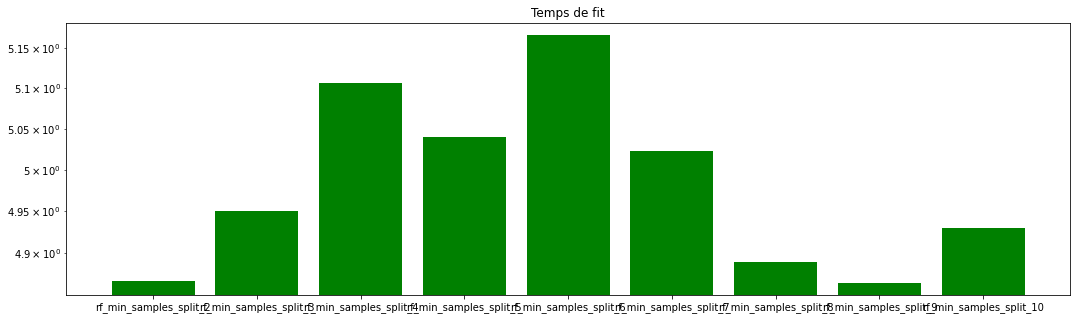

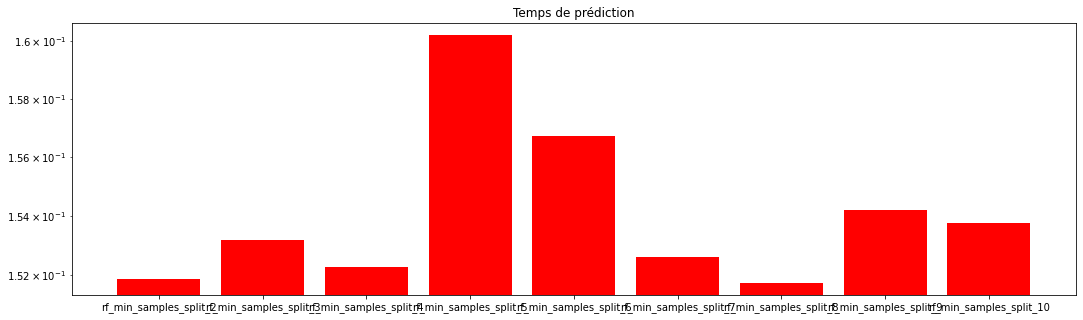

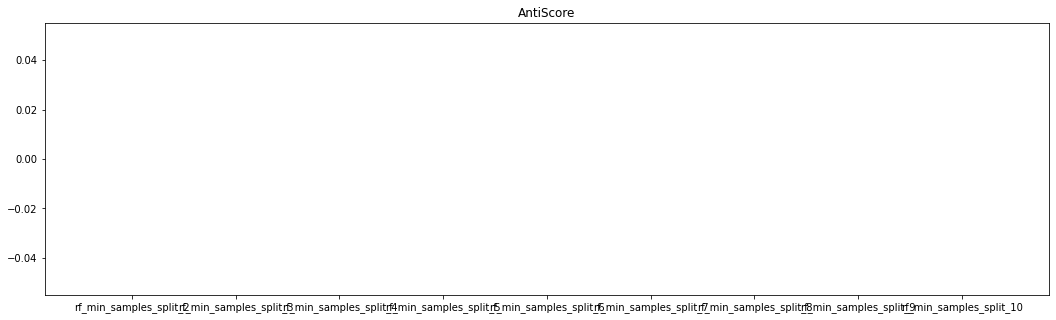

--->  rf_min_samples_leaf_1
temps de fit :  4.809472560882568
temps de prédiction :  0.1522674560546875
antiscore :  0.0
--->  rf_min_samples_leaf_2
temps de fit :  4.80608057975769
temps de prédiction :  0.15185189247131348
antiscore :  0.0
--->  rf_min_samples_leaf_3
temps de fit :  5.07391357421875
temps de prédiction :  0.15358257293701172
antiscore :  0.0
--->  rf_min_samples_leaf_4
temps de fit :  4.773194313049316
temps de prédiction :  0.15223455429077148
antiscore :  0.0
--->  rf_min_samples_leaf_5
temps de fit :  5.0094757080078125
temps de prédiction :  0.1510162353515625
antiscore :  0.0
--->  rf_min_samples_leaf_6
temps de fit :  5.051854610443115
temps de prédiction :  0.15507054328918457
antiscore :  0.00020685732016345604
--->  rf_min_samples_leaf_7
temps de fit :  4.690122365951538
temps de prédiction :  0.151503324508667
antiscore :  5.17143300408085e-05
--->  rf_min_samples_leaf_8
temps de fit :  4.7777886390686035
temps de prédiction :  0.15336894989013672
antiscore

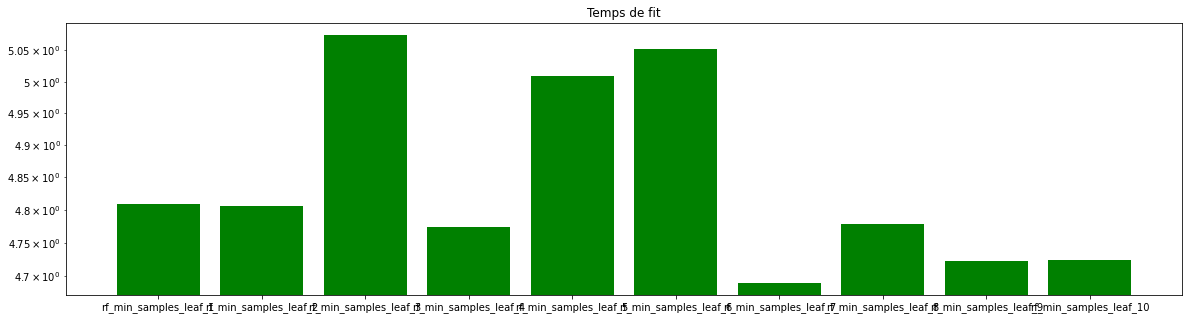

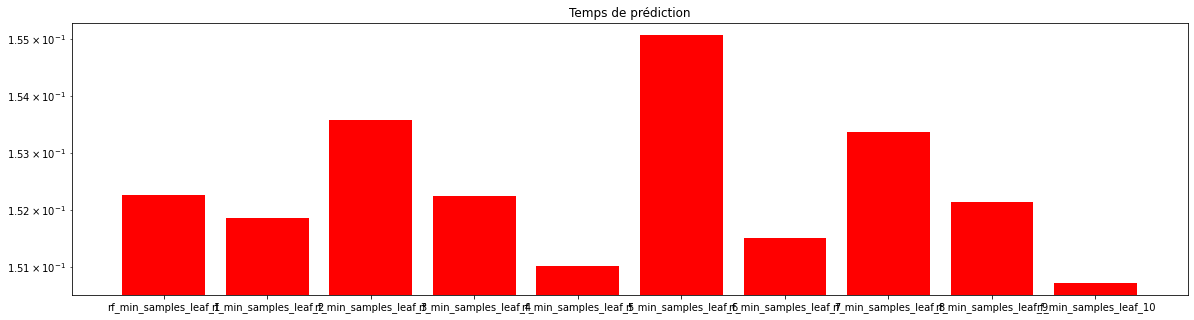

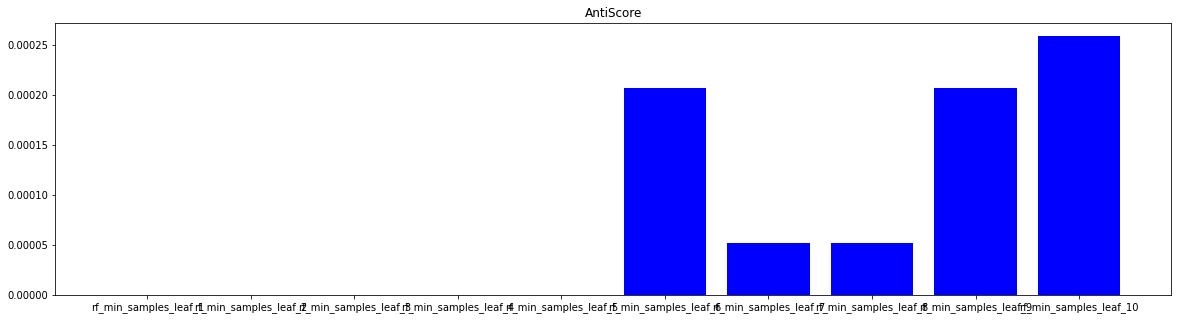

--->  rf_min_weight_fraction_leaf_0
temps de fit :  4.962564945220947
temps de prédiction :  0.1508636474609375
antiscore :  0.0
--->  rf_min_weight_fraction_leaf_0.1
temps de fit :  2.781428813934326
temps de prédiction :  0.1486215591430664
antiscore :  0.01298029684025448
--->  rf_min_weight_fraction_leaf_0.5
temps de fit :  1.4037871360778809
temps de prédiction :  0.10546398162841797
antiscore :  0.502663287997104


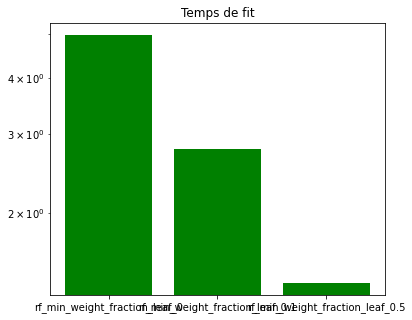

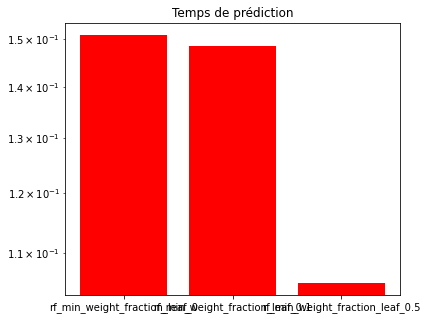

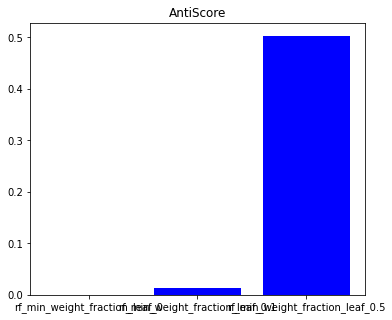

--->  rf_max_features_auto
temps de fit :  4.8114659786224365
temps de prédiction :  0.15206074714660645
antiscore :  5.17143300408085e-05
--->  rf_max_features_sqrt
temps de fit :  4.975038766860962
temps de prédiction :  0.15437889099121094
antiscore :  0.0
--->  rf_max_features_log2
temps de fit :  4.128568410873413
temps de prédiction :  0.1525430679321289
antiscore :  5.17143300408085e-05


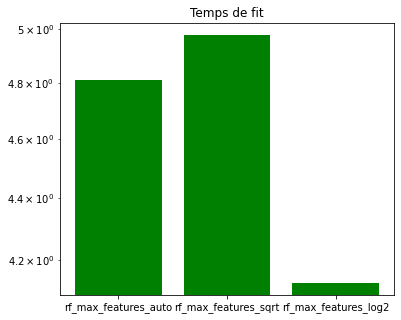

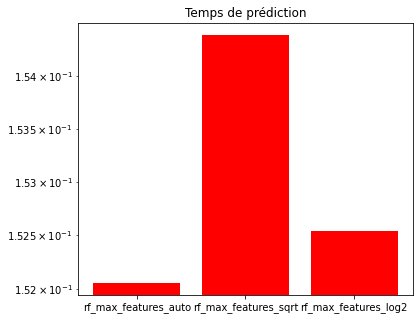

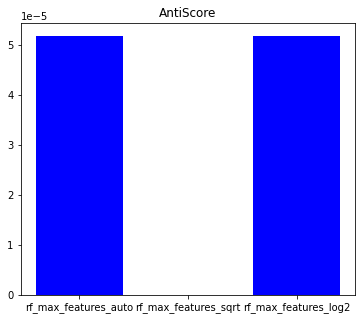

--->  rf_max_leaf_nodes_2
temps de fit :  2.169785499572754
temps de prédiction :  0.12428069114685059
antiscore :  0.013135439830377016
--->  rf_max_leaf_nodes_3
temps de fit :  2.5007598400115967
temps de prédiction :  0.12579727172851562
antiscore :  0.0043440037234318
--->  rf_max_leaf_nodes_4
temps de fit :  2.8213930130004883
temps de prédiction :  0.1312718391418457
antiscore :  0.0039302890831048876
--->  rf_max_leaf_nodes_5
temps de fit :  3.1241366863250732
temps de prédiction :  0.13429903984069824
antiscore :  0.0013962869111030507
--->  rf_max_leaf_nodes_6
temps de fit :  3.2305383682250977
temps de prédiction :  0.131300687789917
antiscore :  0.0013445725810622422
--->  rf_max_leaf_nodes_7
temps de fit :  3.4197492599487305
temps de prédiction :  0.13477611541748047
antiscore :  0.0012928582510213227
--->  rf_max_leaf_nodes_8
temps de fit :  3.6347734928131104
temps de prédiction :  0.14069175720214844
antiscore :  0.0012928582510213227
--->  rf_max_leaf_nodes_9
temps de 

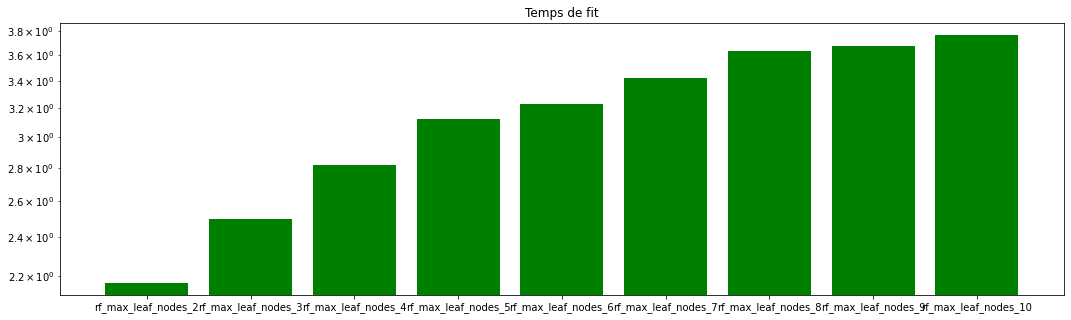

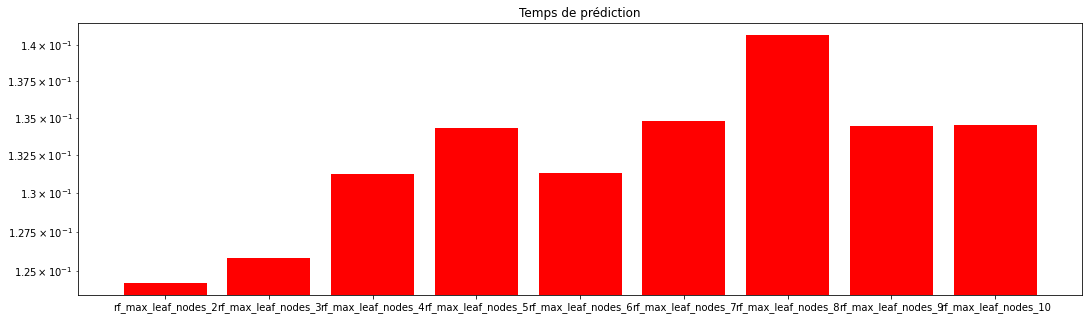

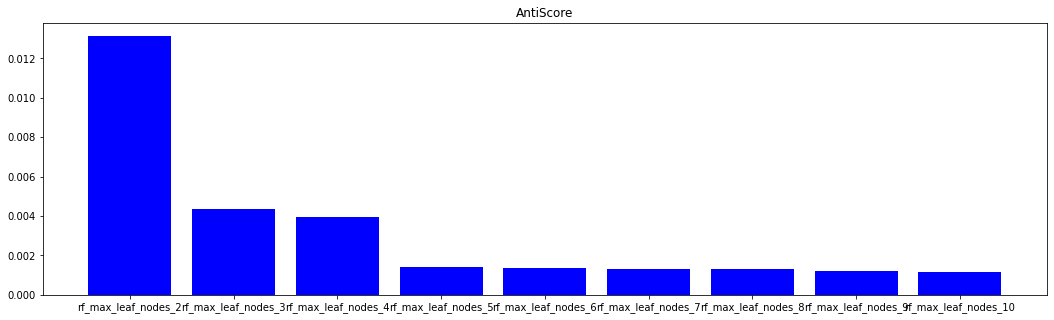

--->  rf_min_impurity_decrease_0
temps de fit :  4.962113618850708
temps de prédiction :  0.1539900302886963
antiscore :  0.0
--->  rf_min_impurity_decrease_0.1
temps de fit :  2.274291753768921
temps de prédiction :  0.12443733215332031
antiscore :  0.013807726120908081
--->  rf_min_impurity_decrease_0.5
temps de fit :  1.4794952869415283
temps de prédiction :  0.1044914722442627
antiscore :  0.502663287997104
--->  rf_min_impurity_decrease_1
temps de fit :  1.446342945098877
temps de prédiction :  0.10473895072937012
antiscore :  0.502663287997104


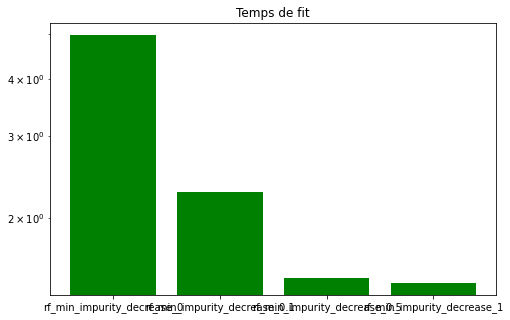

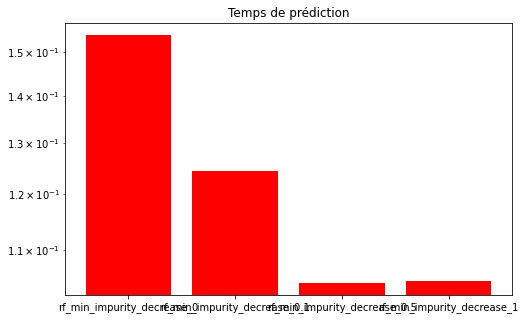

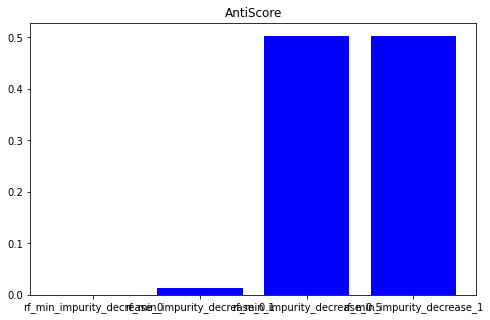

--->  rf_bootstrap_True
temps de fit :  4.901388168334961
temps de prédiction :  0.1558830738067627
antiscore :  0.0
--->  rf_bootstrap_False
temps de fit :  7.222878694534302
temps de prédiction :  0.15083932876586914
antiscore :  0.0


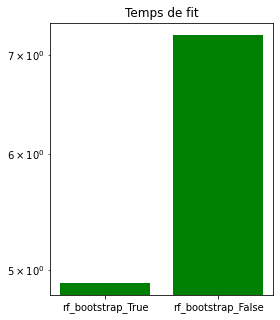

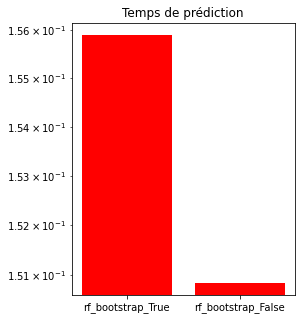

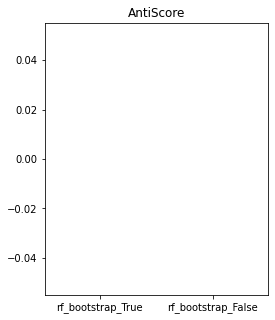

--->  rf_oob_score_True
temps de fit :  5.392719268798828
temps de prédiction :  0.15381693840026855
antiscore :  5.17143300408085e-05
--->  rf_oob_score_False
temps de fit :  4.88812255859375
temps de prédiction :  0.16430068016052246
antiscore :  0.0


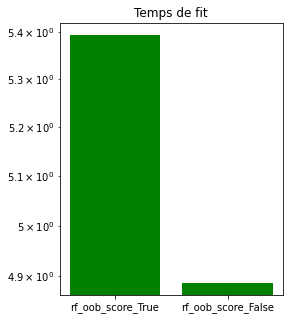

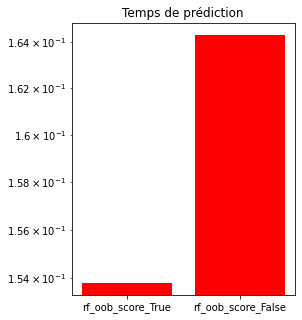

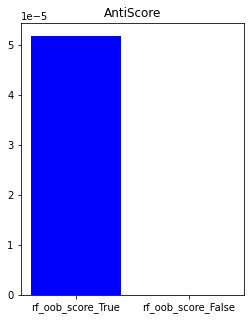

--->  rf_n_jobs_1
temps de fit :  4.9317357540130615
temps de prédiction :  0.15357232093811035
antiscore :  0.0
--->  rf_n_jobs_2
temps de fit :  2.7096238136291504
temps de prédiction :  0.10575222969055176
antiscore :  0.0
--->  rf_n_jobs_3
temps de fit :  2.203230142593384
temps de prédiction :  0.10644078254699707
antiscore :  0.0
--->  rf_n_jobs_4
temps de fit :  2.0054872035980225
temps de prédiction :  0.10626745223999023
antiscore :  0.0
--->  rf_n_jobs_5
temps de fit :  1.9029185771942139
temps de prédiction :  0.1068124771118164
antiscore :  0.0
--->  rf_n_jobs_6
temps de fit :  1.9054749011993408
temps de prédiction :  0.10622382164001465
antiscore :  0.0
--->  rf_n_jobs_7
temps de fit :  2.008286237716675
temps de prédiction :  0.1068427562713623
antiscore :  0.0
--->  rf_n_jobs_8
temps de fit :  1.929772138595581
temps de prédiction :  0.10669827461242676
antiscore :  0.0
--->  rf_n_jobs_9
temps de fit :  2.124450206756592
temps de prédiction :  0.10716676712036133
antisc

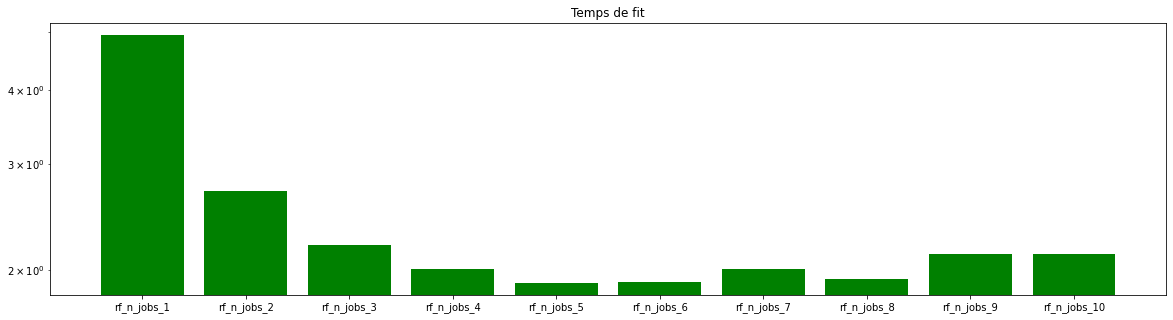

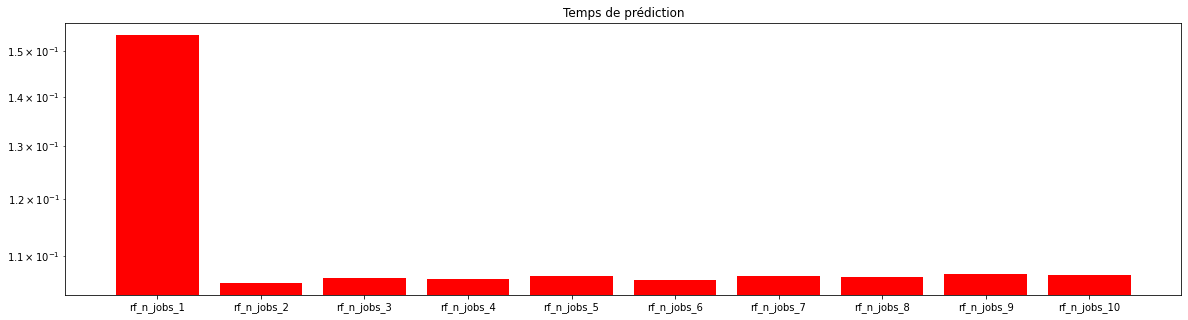

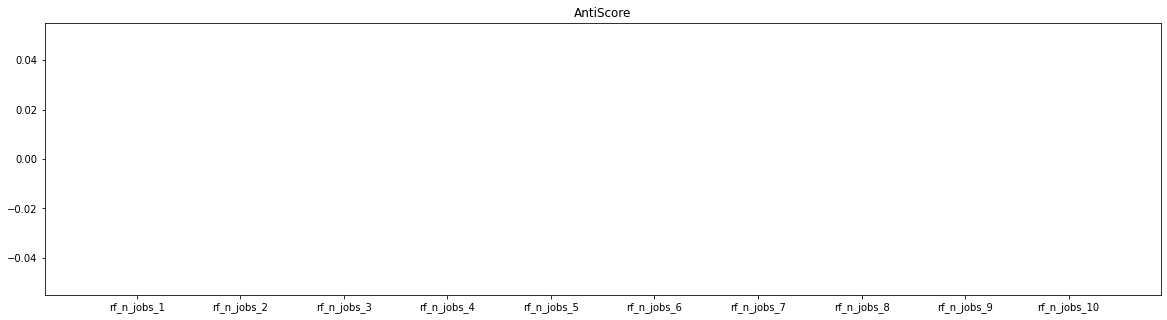

--->  rf_class_weight_None
temps de fit :  5.091346740722656
temps de prédiction :  0.15264487266540527
antiscore :  0.0
--->  rf_class_weight_balanced
temps de fit :  5.069908857345581
temps de prédiction :  0.15219640731811523
antiscore :  0.0
--->  rf_class_weight_balanced_subsample
temps de fit :  6.042393445968628
temps de prédiction :  0.1537032127380371
antiscore :  0.0


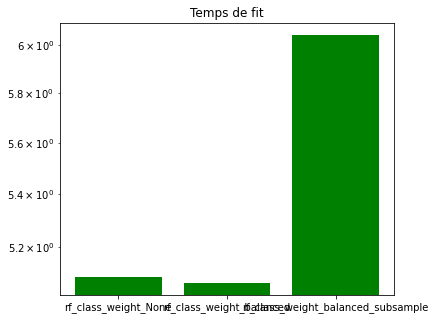

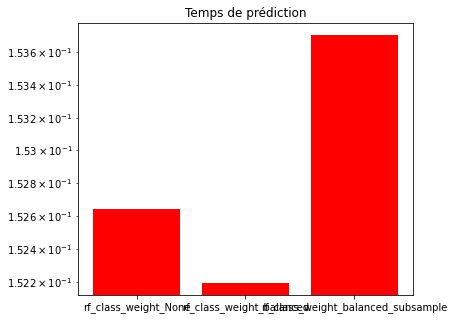

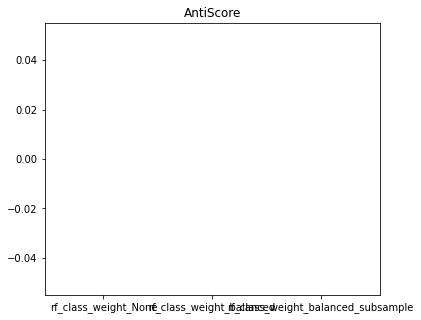

In [67]:
for n_estimators in [10,100,1000]:
    test_model("rf_n_estimators_"+str(n_estimators),RandomForestClassifier,n_estimators=n_estimators)
compare(time_fit, time_pred, models)
clean_tabs()
for criterion in ['gini', 'entropy']:
    test_model("rf_criterion_"+str(criterion),RandomForestClassifier,n_estimators=100,criterion=criterion)
compare(time_fit, time_pred, models)
clean_tabs()
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    test_model("rf_max_depth_"+str(max_depth),RandomForestClassifier,n_estimators=100,max_depth=max_depth)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_split in [2,3,4,5,6,7,8,9,10]:
    test_model("rf_min_samples_split_"+str(min_samples_split),RandomForestClassifier,n_estimators=100,min_samples_split=min_samples_split)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_leaf in [1,2,3,4,5,6,7,8,9,10]:
    test_model("rf_min_samples_leaf_"+str(min_samples_leaf),RandomForestClassifier,n_estimators=100,min_samples_leaf=min_samples_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for min_weight_fraction_leaf in [0,0.1,0.5]:
    test_model("rf_min_weight_fraction_leaf_"+str(min_weight_fraction_leaf),RandomForestClassifier,n_estimators=100,min_weight_fraction_leaf=min_weight_fraction_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for max_features in ['auto', 'sqrt', 'log2']:
    test_model("rf_max_features_"+str(max_features),RandomForestClassifier,n_estimators=100,max_features=max_features)
compare(time_fit, time_pred, models)
clean_tabs()
for max_leaf_nodes in [2,3,4,5,6,7,8,9,10]:
    test_model("rf_max_leaf_nodes_"+str(max_leaf_nodes),RandomForestClassifier,n_estimators=100,max_leaf_nodes=max_leaf_nodes)
compare(time_fit, time_pred, models)
clean_tabs()
for min_impurity_decrease in [0,0.1,0.5,1]:
    test_model("rf_min_impurity_decrease_"+str(min_impurity_decrease),RandomForestClassifier,n_estimators=100,min_impurity_decrease=min_impurity_decrease)
compare(time_fit, time_pred, models)
clean_tabs()
for bootstrap in [True, False]:
    test_model("rf_bootstrap_"+str(bootstrap),RandomForestClassifier,n_estimators=100,bootstrap=bootstrap)
compare(time_fit, time_pred, models)
clean_tabs()
for oob_score in [True, False]:
    test_model("rf_oob_score_"+str(oob_score),RandomForestClassifier,n_estimators=100,oob_score=oob_score)
compare(time_fit, time_pred, models)
clean_tabs()
for n_jobs in [1,2,3,4,5,6,7,8,9,10]:
    test_model("rf_n_jobs_"+str(n_jobs),RandomForestClassifier,n_estimators=100,n_jobs=n_jobs)
compare(time_fit, time_pred, models)
clean_tabs()
for class_weight in [None, 'balanced', 'balanced_subsample']:
    test_model("rf_class_weight_"+str(class_weight),RandomForestClassifier,n_estimators=100,class_weight=class_weight)
compare(time_fit, time_pred, models)
clean_tabs()

## 4-classification

--->  rf_n_estimators_4_class_10
temps de fit :  0.9734382629394531
temps de prédiction :  0.04722118377685547
antiscore :  0.14040440606091953
--->  rf_n_estimators_4_class_100
temps de fit :  9.225767135620117
temps de prédiction :  0.42403292655944824
antiscore :  0.12654496560997053
--->  rf_n_estimators_4_class_1000
temps de fit :  91.3067307472229
temps de prédiction :  4.341043710708618
antiscore :  0.12613125096964373


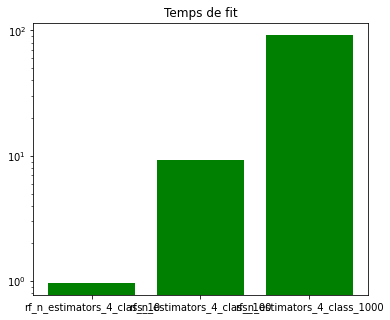

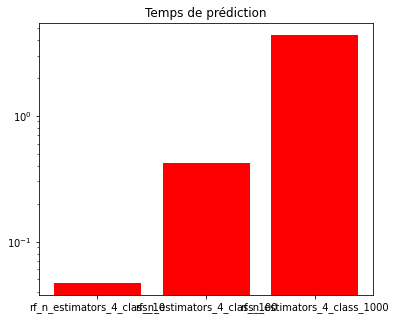

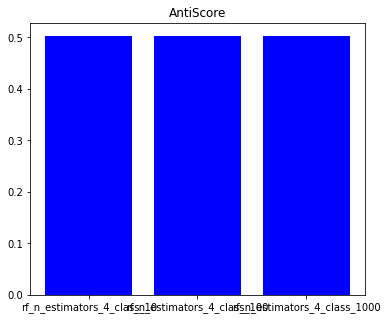

--->  rf_criterion_4_class_gini
temps de fit :  8.857011795043945
temps de prédiction :  0.41554784774780273
antiscore :  0.12633810828980707
--->  rf_criterion_4_class_entropy
temps de fit :  9.678452253341675
temps de prédiction :  0.4024336338043213
antiscore :  0.12757925221078759


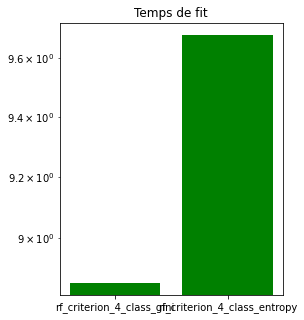

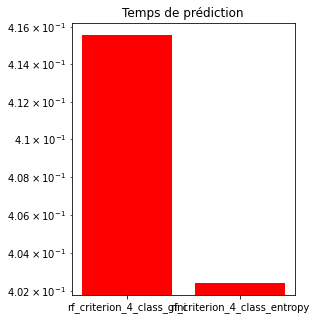

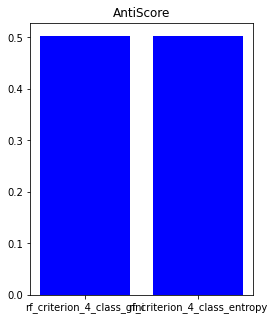

--->  rf_max_depth_4_class_1
temps de fit :  1.5365104675292969
temps de prédiction :  0.13599061965942383
antiscore :  0.3144231266483942
--->  rf_max_depth_4_class_2
temps de fit :  2.27546763420105
temps de prédiction :  0.1483745574951172
antiscore :  0.2651393701194601
--->  rf_max_depth_4_class_3
temps de fit :  2.9586215019226074
temps de prédiction :  0.1517016887664795
antiscore :  0.25469307545120756
--->  rf_max_depth_4_class_4
temps de fit :  3.6807472705841064
temps de prédiction :  0.1631910800933838
antiscore :  0.24941821378704043
--->  rf_max_depth_4_class_5
temps de fit :  4.234076976776123
temps de prédiction :  0.17156982421875
antiscore :  0.23193877023323162
--->  rf_max_depth_4_class_6
temps de fit :  4.802927017211914
temps de prédiction :  0.1837320327758789
antiscore :  0.22164761855510162
--->  rf_max_depth_4_class_7
temps de fit :  5.208142995834351
temps de prédiction :  0.19469714164733887
antiscore :  0.21554532761028078
--->  rf_max_depth_4_class_8
temps

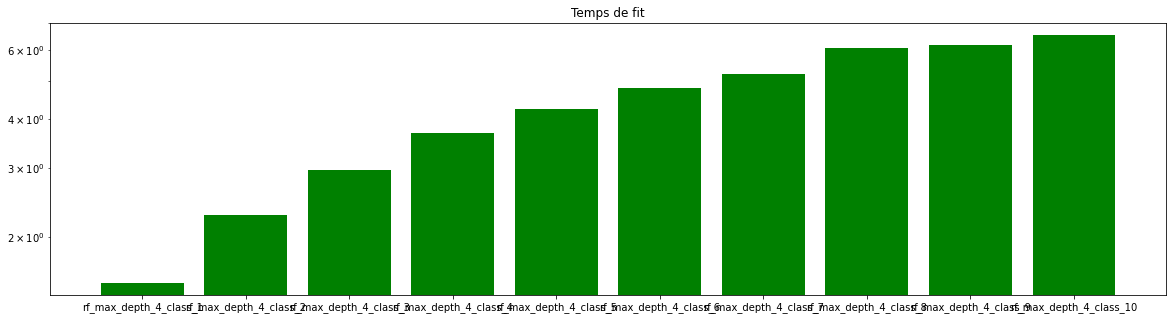

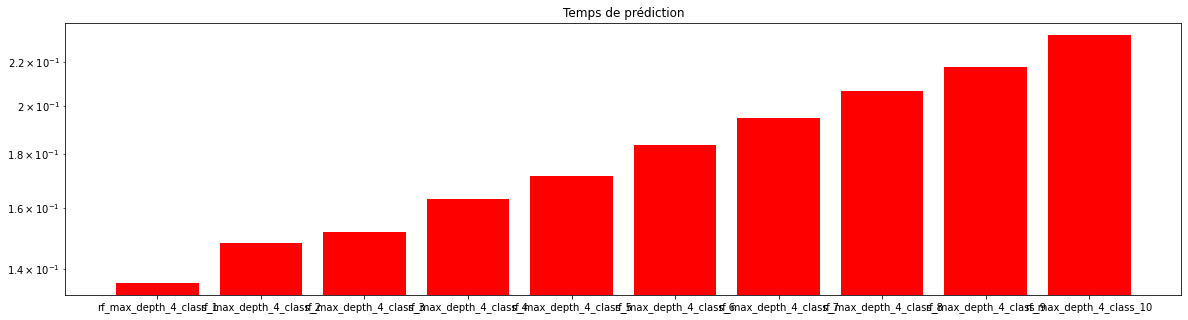

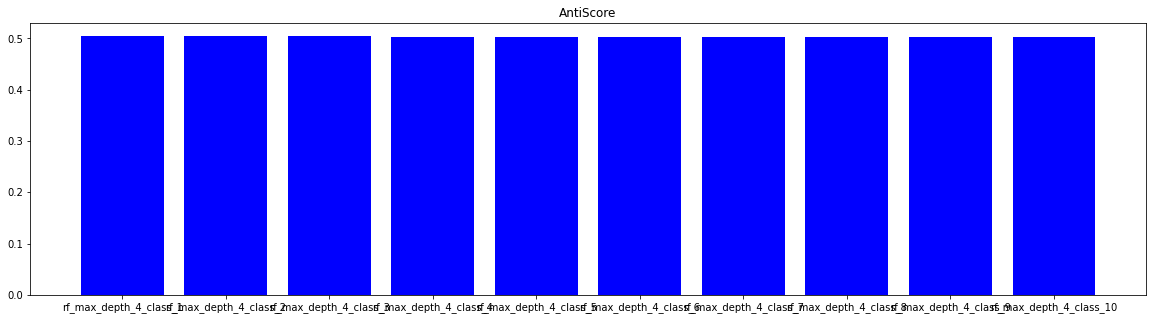

--->  rf_min_samples_split_4_class_2
temps de fit :  9.320717096328735
temps de prédiction :  0.46155261993408203
antiscore :  0.12861353881160464
--->  rf_min_samples_split_4_class_3
temps de fit :  9.243484735488892
temps de prédiction :  0.4181191921234131
antiscore :  0.12675182293013398
--->  rf_min_samples_split_4_class_4
temps de fit :  9.018077850341797
temps de prédiction :  0.3963286876678467
antiscore :  0.12618296529968454
--->  rf_min_samples_split_4_class_5
temps de fit :  8.907050609588623
temps de prédiction :  0.3836081027984619
antiscore :  0.12690696592025652
--->  rf_min_samples_split_4_class_6
temps de fit :  8.970917701721191
temps de prédiction :  0.3783421516418457
antiscore :  0.12659667994001134
--->  rf_min_samples_split_4_class_7
temps de fit :  8.786238431930542
temps de prédiction :  0.3717620372772217
antiscore :  0.12742410922066505
--->  rf_min_samples_split_4_class_8
temps de fit :  8.839057207107544
temps de prédiction :  0.35971522331237793
antiscore

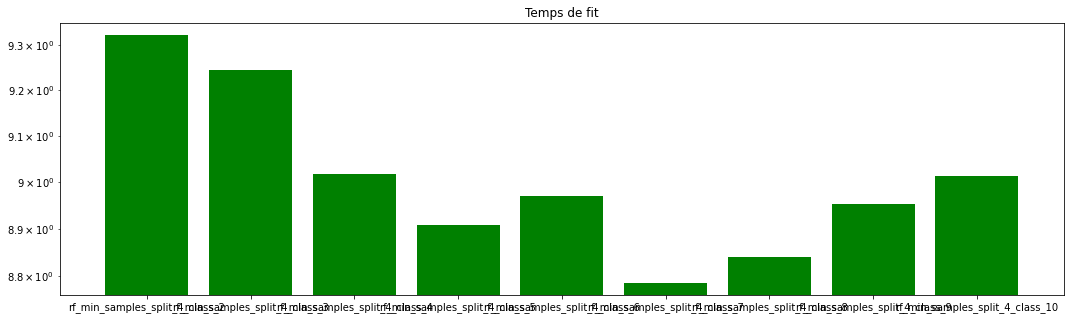

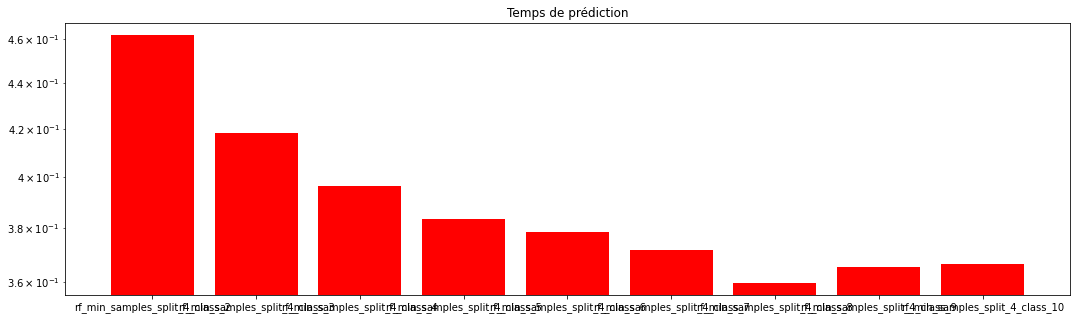

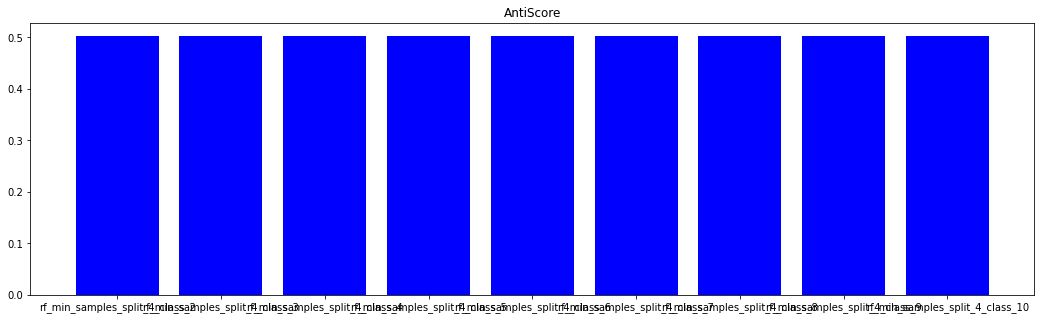

--->  rf_min_samples_leaf_4_class_1
temps de fit :  9.20919919013977
temps de prédiction :  0.4721541404724121
antiscore :  0.12856182448156384
--->  rf_min_samples_leaf_4_class_2
temps de fit :  8.990113019943237
temps de prédiction :  0.39489245414733887
antiscore :  0.1268552515902156
--->  rf_min_samples_leaf_4_class_3
temps de fit :  8.671344518661499
temps de prédiction :  0.3674659729003906
antiscore :  0.12913068211201328
--->  rf_min_samples_leaf_4_class_4
temps de fit :  8.229969501495361
temps de prédiction :  0.3440699577331543
antiscore :  0.13213011325438284
--->  rf_min_samples_leaf_4_class_5
temps de fit :  8.272461891174316
temps de prédiction :  0.32840752601623535
antiscore :  0.13414697212597615
--->  rf_min_samples_leaf_4_class_6
temps de fit :  8.418545007705688
temps de prédiction :  0.324521541595459
antiscore :  0.136680974297978
--->  rf_min_samples_leaf_4_class_7
temps de fit :  7.884042263031006
temps de prédiction :  0.31531214714050293
antiscore :  0.13885

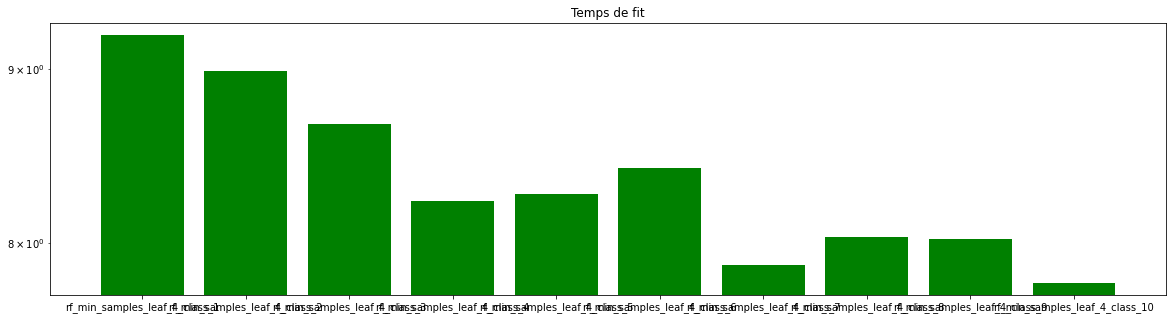

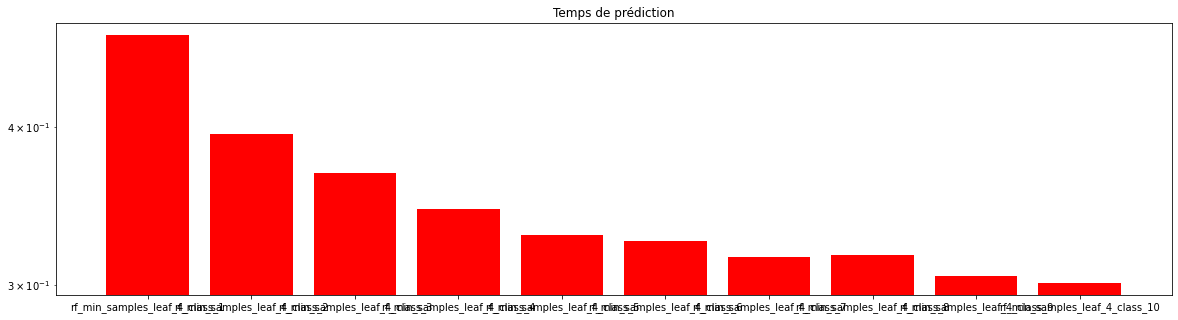

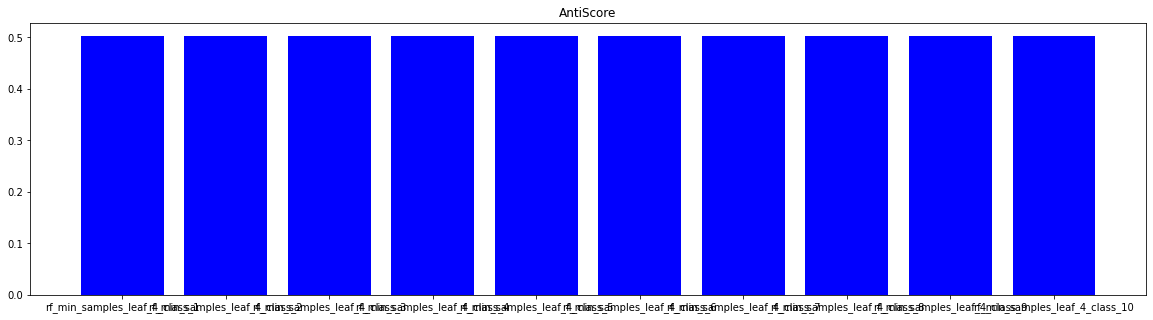

--->  rf_min_weight_fraction_leaf_4_class_0
temps de fit :  9.164461135864258
temps de prédiction :  0.4305095672607422
antiscore :  0.12716553757046078
--->  rf_min_weight_fraction_leaf_4_class_0.1
temps de fit :  2.866297721862793
temps de prédiction :  0.17297029495239258
antiscore :  0.2607953663960283
--->  rf_min_weight_fraction_leaf_4_class_0.5
temps de fit :  1.5206892490386963
temps de prédiction :  0.12318229675292969
antiscore :  0.497336712002896


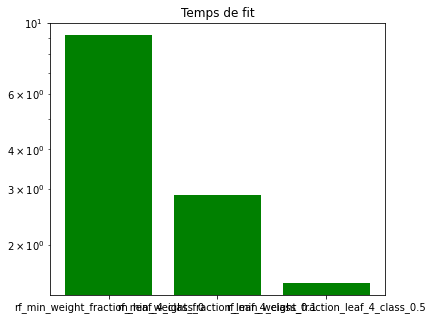

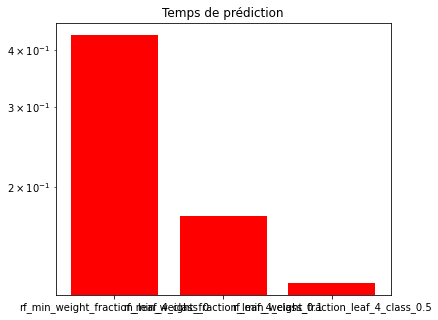

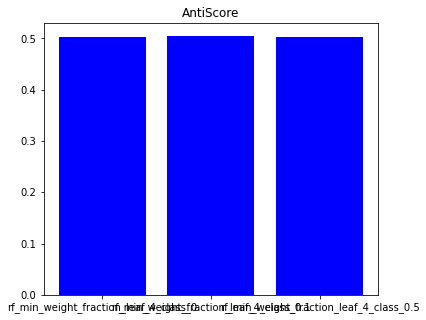

--->  rf_max_features_4_class_auto
temps de fit :  9.017698764801025
temps de prédiction :  0.41397809982299805
antiscore :  0.12690696592025652
--->  rf_max_features_4_class_sqrt
temps de fit :  8.951667308807373
temps de prédiction :  0.44280576705932617
antiscore :  0.12701039458033825
--->  rf_max_features_4_class_log2
temps de fit :  7.861737012863159
temps de prédiction :  0.44460344314575195
antiscore :  0.12897553912189064


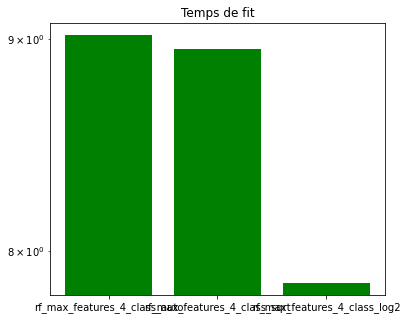

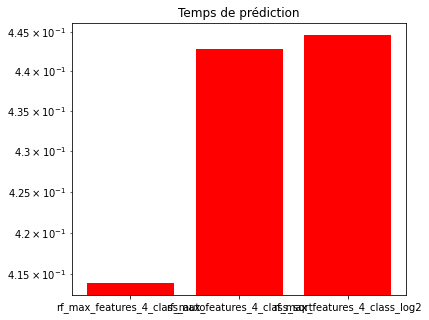

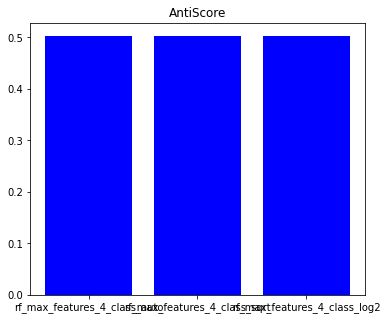

--->  rf_max_leaf_nodes_4_class_2
temps de fit :  2.2504539489746094
temps de prédiction :  0.1384115219116211
antiscore :  0.31447484097843514
--->  rf_max_leaf_nodes_4_class_3
temps de fit :  2.5647823810577393
temps de prédiction :  0.14140629768371582
antiscore :  0.26772508662150285
--->  rf_max_leaf_nodes_4_class_4
temps de fit :  2.8909175395965576
temps de prédiction :  0.14835643768310547
antiscore :  0.26410508351864304
--->  rf_max_leaf_nodes_4_class_5
temps de fit :  3.1823039054870605
temps de prédiction :  0.1492786407470703
antiscore :  0.26369136887831623
--->  rf_max_leaf_nodes_4_class_6
temps de fit :  3.325007200241089
temps de prédiction :  0.1524662971496582
antiscore :  0.24915964213683617
--->  rf_max_leaf_nodes_4_class_7
temps de fit :  3.4791347980499268
temps de prédiction :  0.15397167205810547
antiscore :  0.24409163779283238
--->  rf_max_leaf_nodes_4_class_8
temps de fit :  3.795638084411621
temps de prédiction :  0.15764236450195312
antiscore :  0.24424678

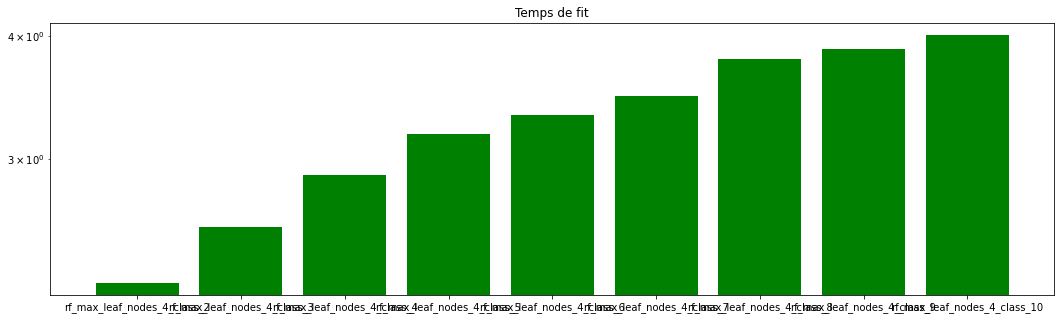

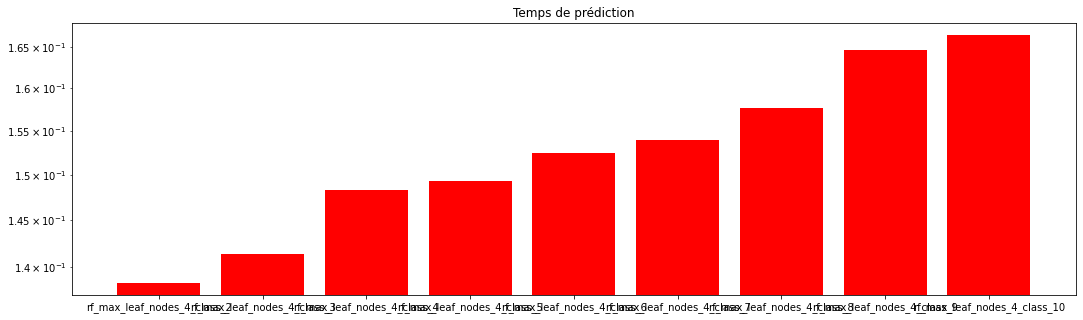

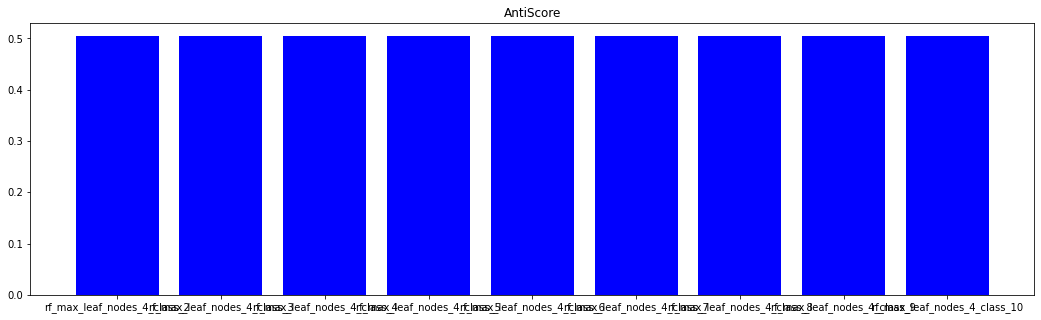

--->  rf_min_impurity_decrease_4_class_0
temps de fit :  9.14433217048645
temps de prédiction :  0.4644002914428711
antiscore :  0.12809639551119612
--->  rf_min_impurity_decrease_4_class_0.1
temps de fit :  2.2637531757354736
temps de prédiction :  0.14119291305541992
antiscore :  0.3139059833479857
--->  rf_min_impurity_decrease_4_class_0.5
temps de fit :  1.5794422626495361
temps de prédiction :  0.11876392364501953
antiscore :  0.497336712002896
--->  rf_min_impurity_decrease_4_class_1
temps de fit :  1.5247089862823486
temps de prédiction :  0.12072372436523438
antiscore :  0.497336712002896


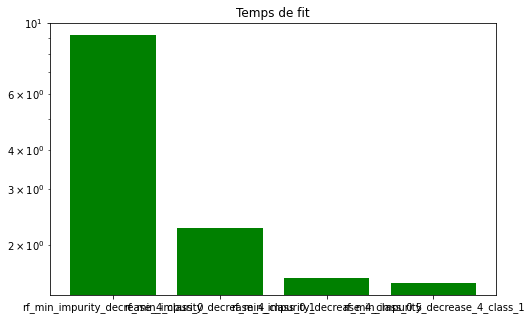

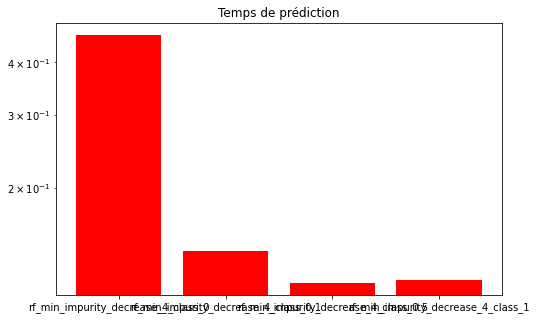

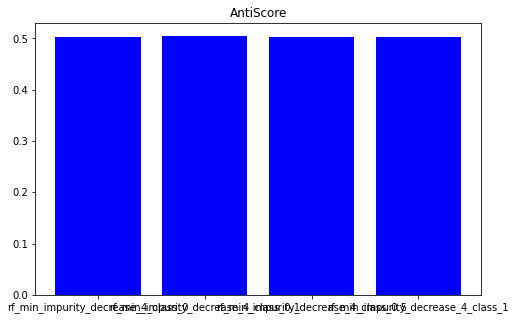

--->  rf_bootstrap_4_class_True
temps de fit :  9.192461729049683
temps de prédiction :  0.4569249153137207
antiscore :  0.1279929668511145
--->  rf_bootstrap_4_class_False
temps de fit :  14.217660188674927
temps de prédiction :  0.5018954277038574
antiscore :  0.12711382324041987


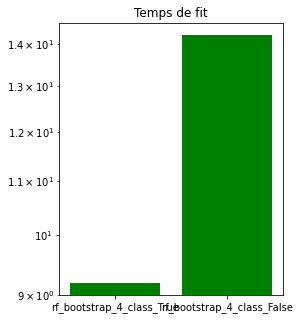

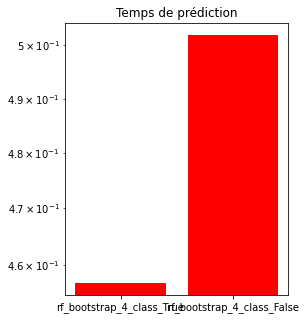

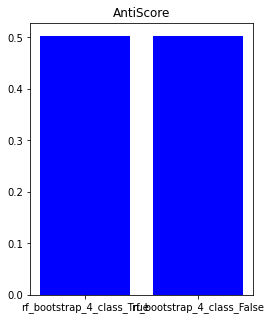

--->  rf_oob_score_4_class_True
temps de fit :  10.490235090255737
temps de prédiction :  0.44606471061706543
antiscore :  0.1268552515902156
--->  rf_oob_score_4_class_False
temps de fit :  9.468729496002197
temps de prédiction :  0.44193172454833984
antiscore :  0.12670010860009306


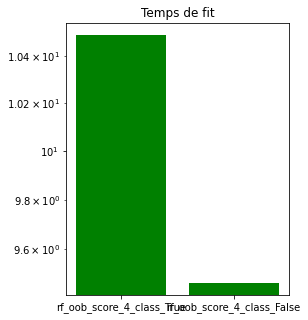

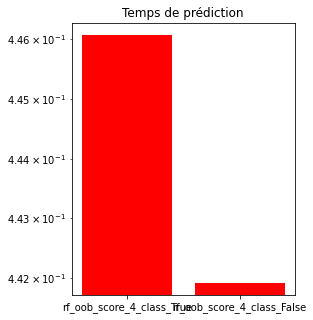

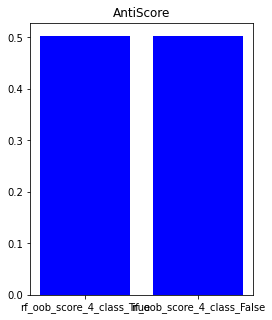

--->  rf_n_jobs_1
temps de fit :  9.416072368621826
temps de prédiction :  0.4362297058105469
antiscore :  0.12664839427005226
--->  rf_n_jobs_2
temps de fit :  5.0124406814575195
temps de prédiction :  0.30724072456359863
antiscore :  0.12856182448156384
--->  rf_n_jobs_3
temps de fit :  4.005636692047119
temps de prédiction :  0.2079477310180664
antiscore :  0.12742410922066505
--->  rf_n_jobs_4
temps de fit :  3.301668405532837
temps de prédiction :  0.2071669101715088
antiscore :  0.1268035372601748
--->  rf_n_jobs_5
temps de fit :  3.4014811515808105
temps de prédiction :  0.20790815353393555
antiscore :  0.1268035372601748
--->  rf_n_jobs_6
temps de fit :  3.5016872882843018
temps de prédiction :  0.20763778686523438
antiscore :  0.12701039458033825
--->  rf_n_jobs_7
temps de fit :  3.520456314086914
temps de prédiction :  0.3095734119415283
antiscore :  0.12675182293013398
--->  rf_n_jobs_8
temps de fit :  3.440977096557617
temps de prédiction :  0.311521053314209
antiscore :  0

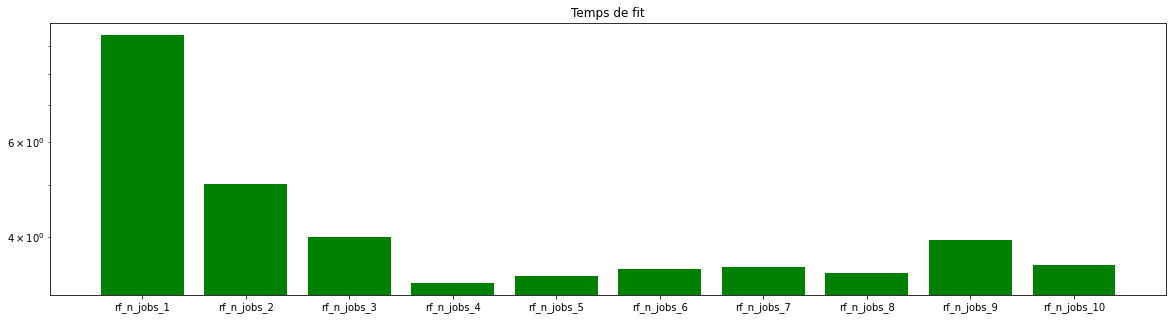

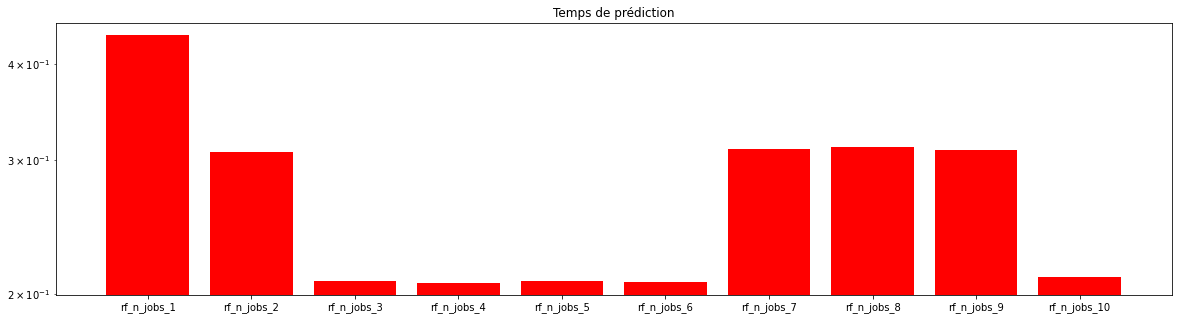

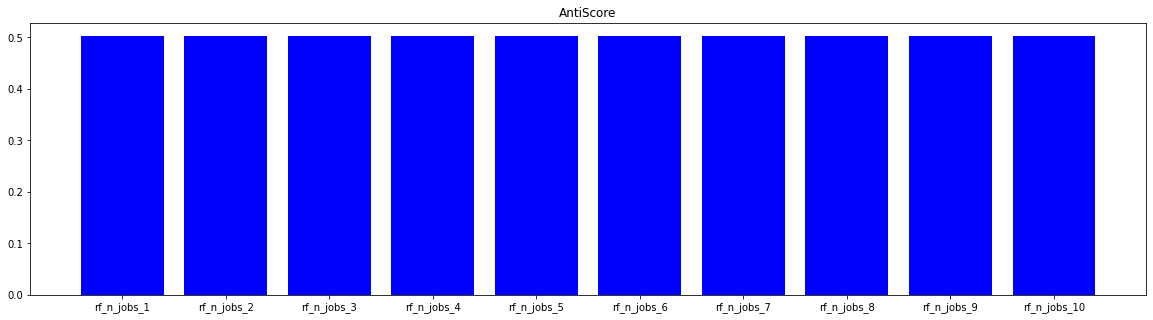

--->  rf_class_weight_4_class_None
temps de fit :  9.513715982437134
temps de prédiction :  0.44136977195739746
antiscore :  0.1276309665408285
--->  rf_class_weight_4_class_balanced
temps de fit :  9.380775690078735
temps de prédiction :  0.46596336364746094
antiscore :  0.12752753788074678
--->  rf_class_weight_4_class_balanced_subsample
temps de fit :  10.437793493270874
temps de prédiction :  0.4607274532318115
antiscore :  0.12788953819103277


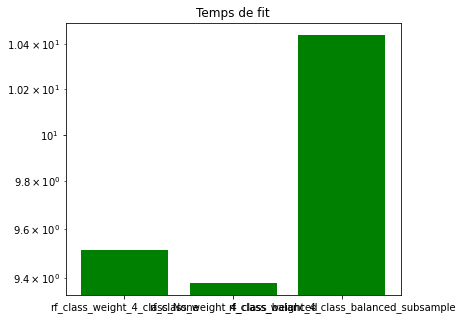

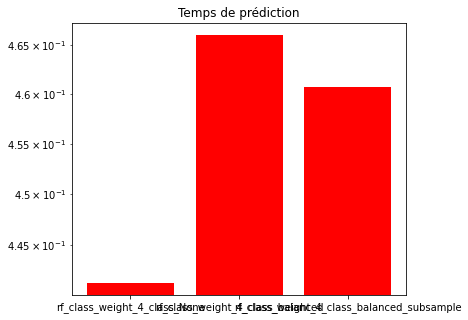

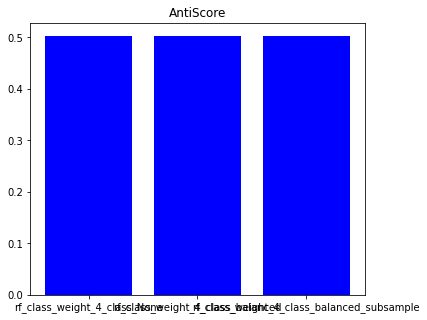

In [68]:
for n_estimators in [10,100,1000]:
    test_model_4_class("rf_n_estimators_4_class_"+str(n_estimators),RandomForestClassifier,n_estimators=n_estimators)
compare(time_fit, time_pred, models)
clean_tabs()
for criterion in ['gini', 'entropy']:
    test_model_4_class("rf_criterion_4_class_"+str(criterion),RandomForestClassifier,n_estimators=100,criterion=criterion)
compare(time_fit, time_pred, models)
clean_tabs()
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    test_model_4_class("rf_max_depth_4_class_"+str(max_depth),RandomForestClassifier,n_estimators=100,max_depth=max_depth)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_split in [2,3,4,5,6,7,8,9,10]:
    test_model_4_class("rf_min_samples_split_4_class_"+str(min_samples_split),RandomForestClassifier,n_estimators=100,min_samples_split=min_samples_split)
compare(time_fit, time_pred, models)
clean_tabs()
for min_samples_leaf in [1,2,3,4,5,6,7,8,9,10]:
    test_model_4_class("rf_min_samples_leaf_4_class_"+str(min_samples_leaf),RandomForestClassifier,n_estimators=100,min_samples_leaf=min_samples_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for min_weight_fraction_leaf in [0,0.1,0.5]:
    test_model_4_class("rf_min_weight_fraction_leaf_4_class_"+str(min_weight_fraction_leaf),RandomForestClassifier,n_estimators=100,min_weight_fraction_leaf=min_weight_fraction_leaf)
compare(time_fit, time_pred, models)
clean_tabs()
for max_features in ['auto', 'sqrt', 'log2']:
    test_model_4_class("rf_max_features_4_class_"+str(max_features),RandomForestClassifier,n_estimators=100,max_features=max_features)
compare(time_fit, time_pred, models)
clean_tabs()
for max_leaf_nodes in [2,3,4,5,6,7,8,9,10]:
    test_model_4_class("rf_max_leaf_nodes_4_class_"+str(max_leaf_nodes),RandomForestClassifier,n_estimators=100,max_leaf_nodes=max_leaf_nodes)
compare(time_fit, time_pred, models)
clean_tabs()
for min_impurity_decrease in [0,0.1,0.5,1]:
    test_model_4_class("rf_min_impurity_decrease_4_class_"+str(min_impurity_decrease),RandomForestClassifier,n_estimators=100,min_impurity_decrease=min_impurity_decrease)
compare(time_fit, time_pred, models)
clean_tabs()
for bootstrap in [True, False]:
    test_model_4_class("rf_bootstrap_4_class_"+str(bootstrap),RandomForestClassifier,n_estimators=100,bootstrap=bootstrap)
compare(time_fit, time_pred, models)
clean_tabs()
for oob_score in [True, False]:
    test_model_4_class("rf_oob_score_4_class_"+str(oob_score),RandomForestClassifier,n_estimators=100,oob_score=oob_score)
compare(time_fit, time_pred, models)
clean_tabs()
for n_jobs in [1,2,3,4,5,6,7,8,9,10]:
    test_model_4_class("rf_n_jobs_"+str(n_jobs),RandomForestClassifier,n_estimators=100,n_jobs=n_jobs)
compare(time_fit, time_pred, models)
clean_tabs()
for class_weight in [None, 'balanced', 'balanced_subsample']:
    test_model_4_class("rf_class_weight_4_class_"+str(class_weight),RandomForestClassifier,n_estimators=100,class_weight=class_weight)
compare(time_fit, time_pred, models)
clean_tabs()

## MLP

## Binary-classification

--->  mlp_hidden_layer_sizes_(10,)
temps de fit :  4.132062673568726
temps de prédiction :  0.010680198669433594
antiscore :  0.003051145472410366
--->  mlp_hidden_layer_sizes_(100,)
temps de fit :  5.564007520675659
temps de prédiction :  0.027121305465698242
antiscore :  0.004861147023840329
--->  mlp_hidden_layer_sizes_(1000,)
temps de fit :  22.122637271881104
temps de prédiction :  0.18593955039978027
antiscore :  0.0039302890831048876


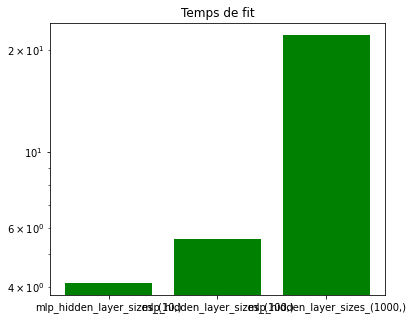

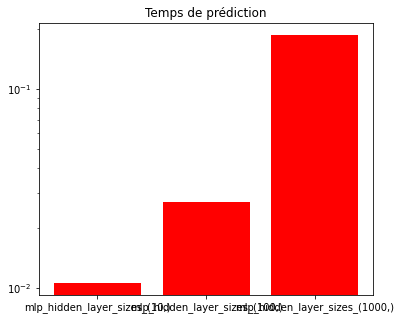

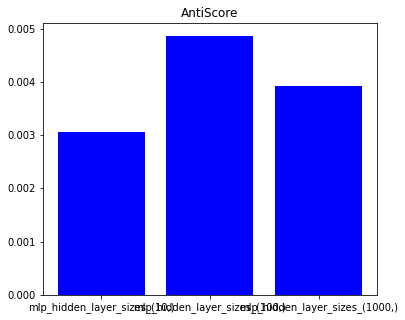

--->  mlp_activation_identity
temps de fit :  7.2558958530426025
temps de prédiction :  0.016486644744873047
antiscore :  0.006412576925065916
--->  mlp_activation_logistic
temps de fit :  19.05837392807007
temps de prédiction :  0.09644222259521484
antiscore :  0.006826291565392717
--->  mlp_activation_tanh
temps de fit :  8.45551586151123
temps de prédiction :  0.03709769248962402
antiscore :  0.45405181775870096
--->  mlp_activation_relu
temps de fit :  5.606069087982178
temps de prédiction :  0.023060321807861328
antiscore :  0.004861147023840329


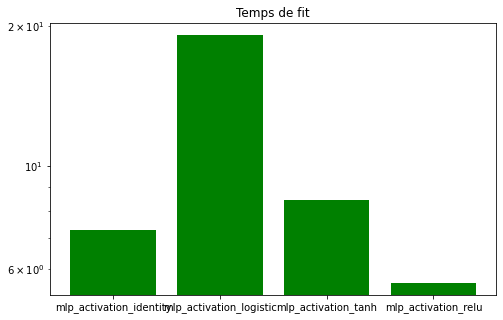

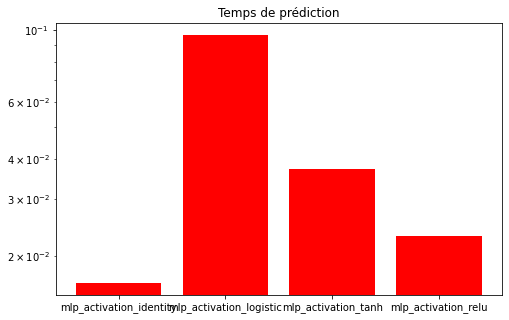

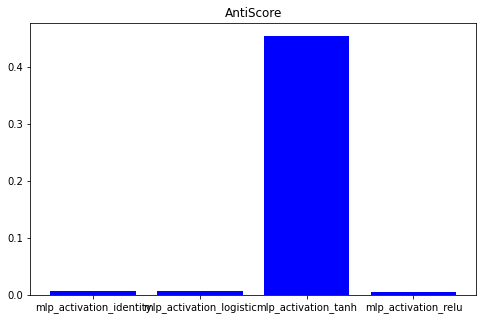

--->  mlp_solver_lbfgs
temps de fit :  5.931995153427124
temps de prédiction :  0.02329397201538086
antiscore :  0.46077468066401195
--->  mlp_solver_sgd
temps de fit :  7.645097494125366
temps de prédiction :  0.025159120559692383
antiscore :  0.496612711382324
--->  mlp_solver_adam
temps de fit :  5.612891435623169
temps de prédiction :  0.023514986038208008
antiscore :  0.004861147023840329


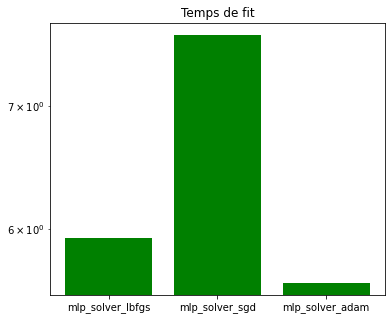

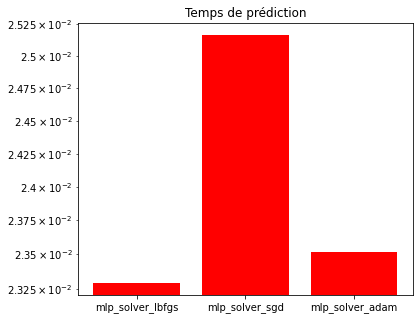

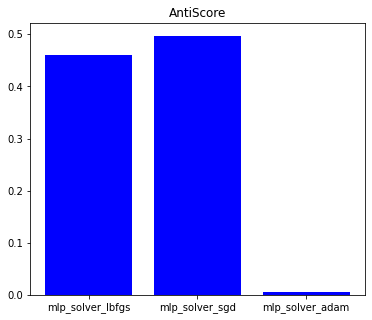

--->  mlp_alpha_0.0001
temps de fit :  5.655038833618164
temps de prédiction :  0.02341008186340332
antiscore :  0.004861147023840329
--->  mlp_alpha_0.001
temps de fit :  6.735408306121826
temps de prédiction :  0.02387404441833496
antiscore :  0.004240575063350072
--->  mlp_alpha_0.01
temps de fit :  6.4140050411224365
temps de prédiction :  0.02391672134399414
antiscore :  0.0034131457826963585
--->  mlp_alpha_0.1
temps de fit :  5.8671417236328125
temps de prédiction :  0.023668766021728516
antiscore :  0.003568288772818895
--->  mlp_alpha_1
temps de fit :  7.046684265136719
temps de prédiction :  0.02308201789855957
antiscore :  0.004395718053472608


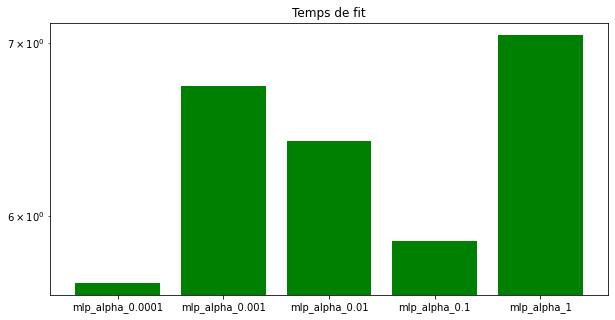

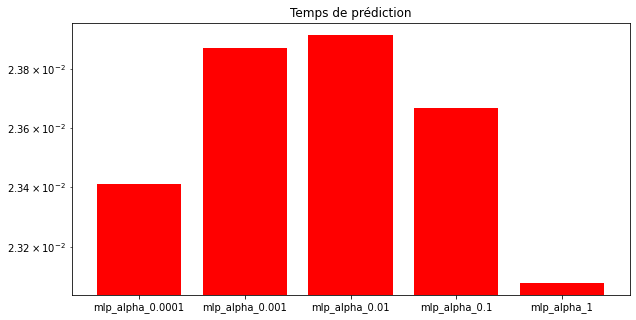

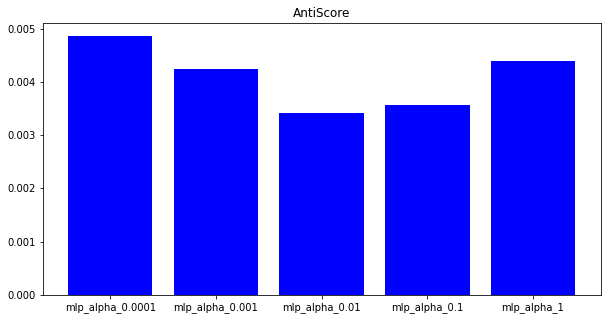

--->  mlp_learning_rate_constant
temps de fit :  5.505992889404297
temps de prédiction :  0.023724794387817383
antiscore :  0.004861147023840329
--->  mlp_learning_rate_invscaling
temps de fit :  5.928788185119629
temps de prédiction :  0.048303842544555664
antiscore :  0.004861147023840329
--->  mlp_learning_rate_adaptive
temps de fit :  6.3725574016571045
temps de prédiction :  0.02438497543334961
antiscore :  0.004861147023840329


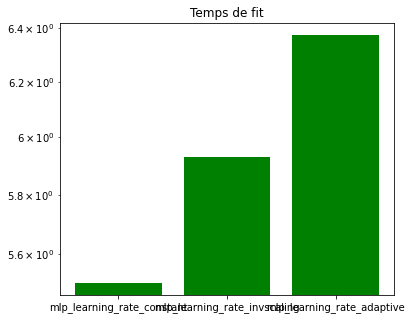

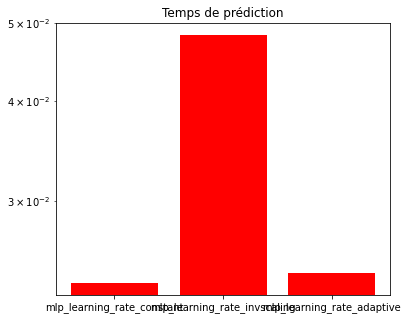

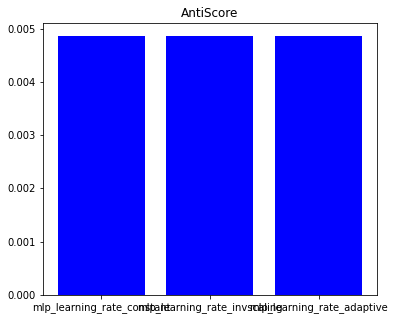

--->  mlp_learning_rate_init_0.0001
temps de fit :  14.61629843711853
temps de prédiction :  0.3160581588745117
antiscore :  0.003671717432900623
--->  mlp_learning_rate_init_0.001
temps de fit :  5.7071099281311035
temps de prédiction :  0.02410602569580078
antiscore :  0.004861147023840329
--->  mlp_learning_rate_init_0.01
temps de fit :  18.396169424057007
temps de prédiction :  0.025321006774902344
antiscore :  0.4530692454879247
--->  mlp_learning_rate_init_0.1
temps de fit :  4.946807384490967
temps de prédiction :  0.025002002716064453
antiscore :  0.4530692454879247
--->  mlp_learning_rate_init_1
temps de fit :  30.548866271972656
temps de prédiction :  0.05282855033874512
antiscore :  0.502663287997104


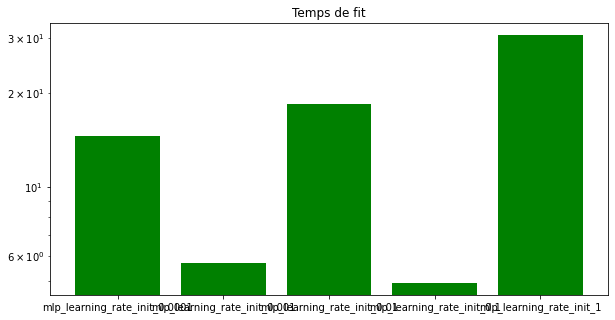

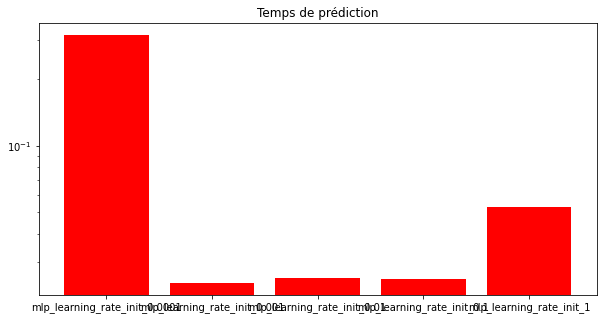

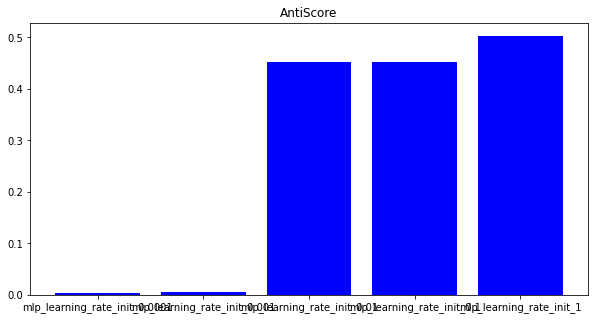

--->  mlp_power_t_0.1
temps de fit :  5.6116344928741455
temps de prédiction :  0.023299455642700195
antiscore :  0.004861147023840329
--->  mlp_power_t_0.5
temps de fit :  5.654664516448975
temps de prédiction :  0.030801773071289062
antiscore :  0.004861147023840329
--->  mlp_power_t_1
temps de fit :  5.944754123687744
temps de prédiction :  0.02536630630493164
antiscore :  0.004861147023840329
--->  mlp_power_t_2
temps de fit :  5.729836702346802
temps de prédiction :  0.024105548858642578
antiscore :  0.004861147023840329
--->  mlp_power_t_10
temps de fit :  5.758295774459839
temps de prédiction :  0.023401498794555664
antiscore :  0.004861147023840329


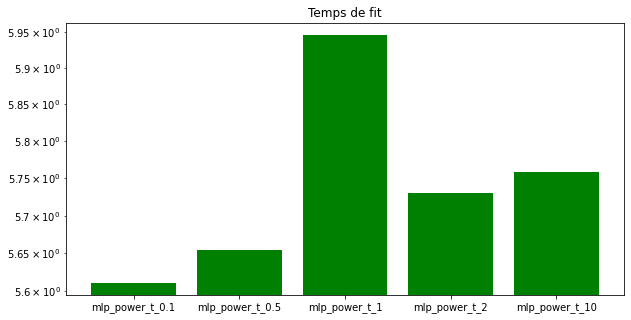

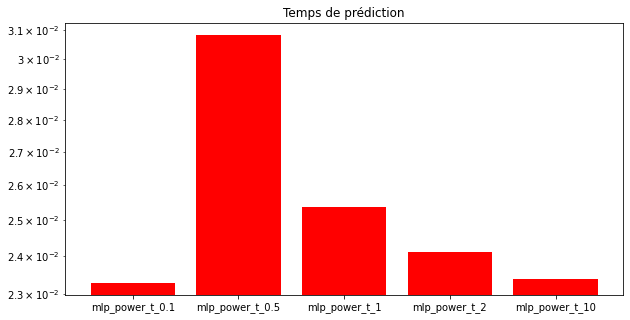

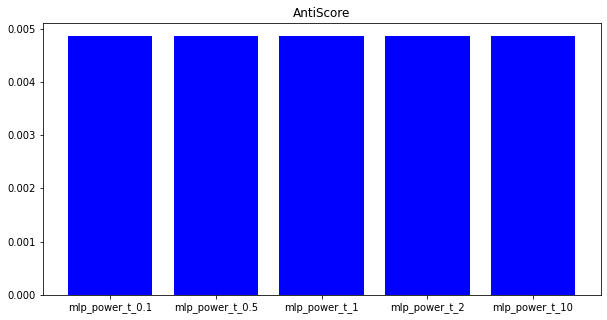

--->  mlp_max_iter_100
temps de fit :  5.490236520767212
temps de prédiction :  0.023313283920288086
antiscore :  0.004861147023840329
--->  mlp_max_iter_200
temps de fit :  5.511414051055908
temps de prédiction :  0.023325443267822266
antiscore :  0.004861147023840329
--->  mlp_max_iter_300
temps de fit :  6.278207778930664
temps de prédiction :  0.02336716651916504
antiscore :  0.004861147023840329
--->  mlp_max_iter_400
temps de fit :  5.439899444580078
temps de prédiction :  0.024092912673950195
antiscore :  0.004861147023840329
--->  mlp_max_iter_500
temps de fit :  5.472458124160767
temps de prédiction :  0.02285480499267578
antiscore :  0.004861147023840329


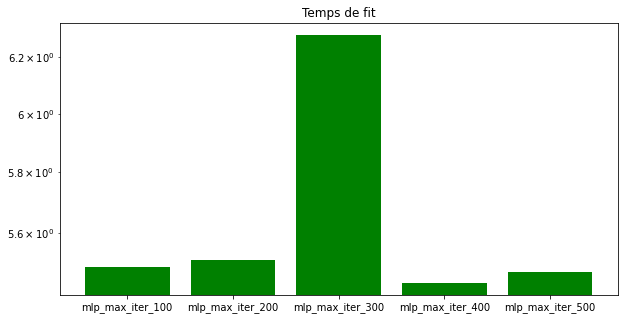

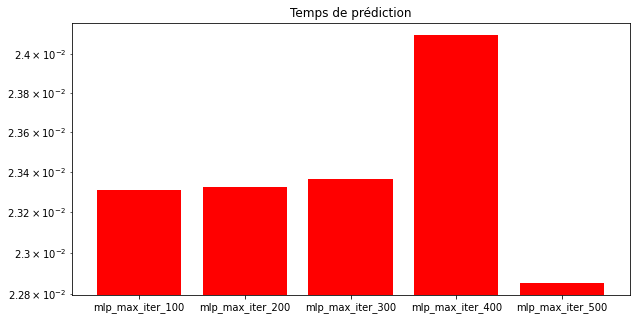

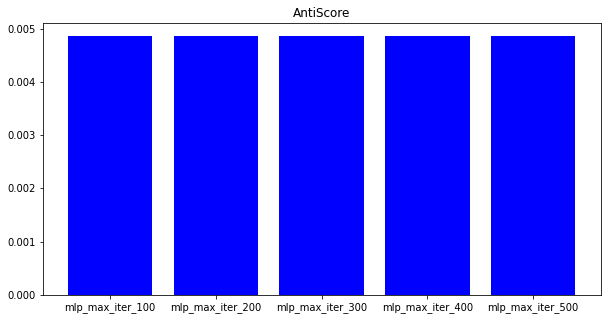

--->  mlp_shuffle_True
temps de fit :  5.3586266040802
temps de prédiction :  0.023599624633789062
antiscore :  0.004861147023840329
--->  mlp_shuffle_False
temps de fit :  4.930058479309082
temps de prédiction :  0.02276611328125
antiscore :  0.004757718363758601


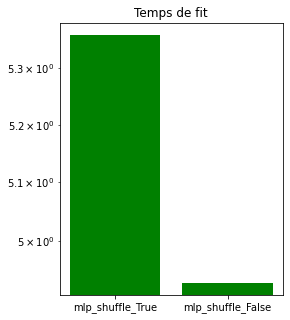

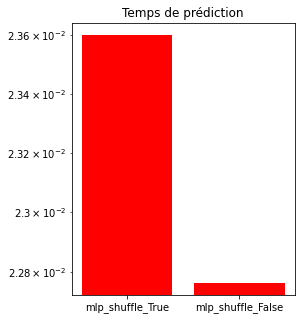

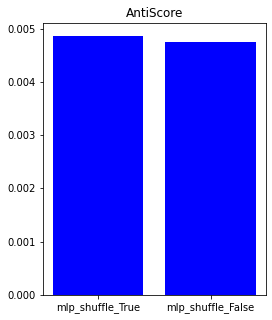

--->  mlp_tol_0.0001
temps de fit :  6.378271102905273
temps de prédiction :  0.02374434471130371
antiscore :  0.004861147023840329
--->  mlp_tol_0.001
temps de fit :  5.408225059509277
temps de prédiction :  0.023403167724609375
antiscore :  0.004861147023840329
--->  mlp_tol_0.01
temps de fit :  5.136605978012085
temps de prédiction :  0.02347588539123535
antiscore :  0.004602575373636064
--->  mlp_tol_0.1
temps de fit :  4.674511671066284
temps de prédiction :  0.023091793060302734
antiscore :  0.02632259399079484
--->  mlp_tol_1
temps de fit :  4.605100154876709
temps de prédiction :  0.023216962814331055
antiscore :  0.02632259399079484


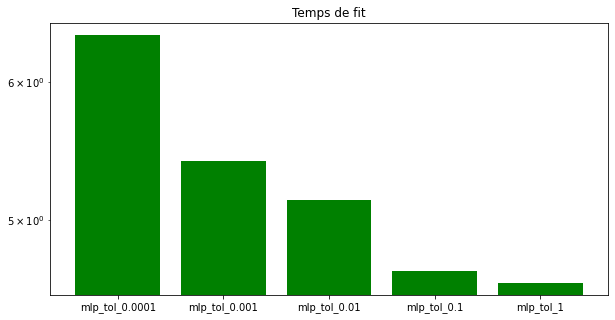

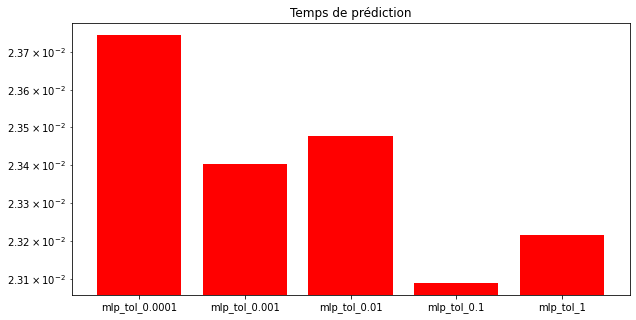

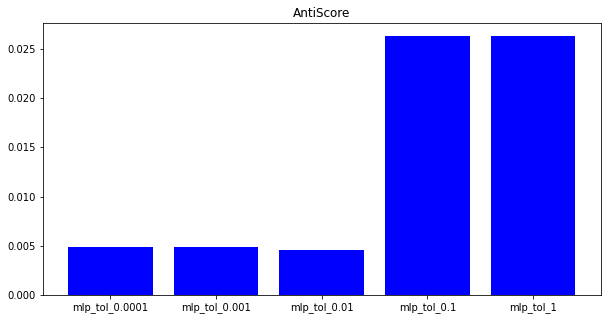

--->  mlp_momentum_0.1
temps de fit :  5.738361120223999
temps de prédiction :  0.02407240867614746
antiscore :  0.004861147023840329
--->  mlp_momentum_0.5
temps de fit :  5.576985120773315
temps de prédiction :  0.023812532424926758
antiscore :  0.004861147023840329
--->  mlp_momentum_1
temps de fit :  5.380102634429932
temps de prédiction :  0.023254871368408203
antiscore :  0.004861147023840329


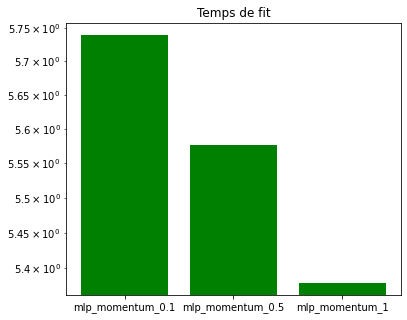

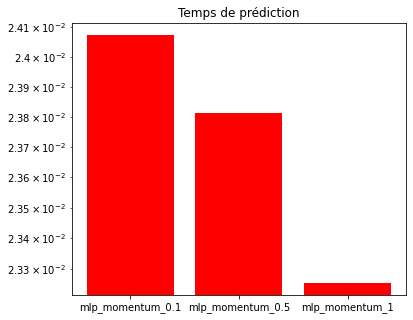

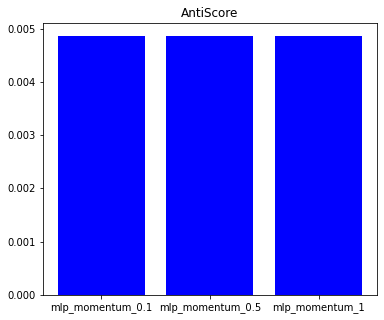

--->  mlp_nesterovs_momentum_True
temps de fit :  5.574940919876099
temps de prédiction :  0.023198604583740234
antiscore :  0.004861147023840329
--->  mlp_nesterovs_momentum_False
temps de fit :  5.467424392700195
temps de prédiction :  0.02266550064086914
antiscore :  0.004861147023840329


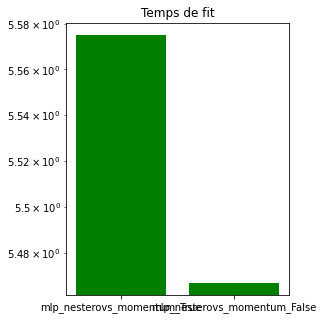

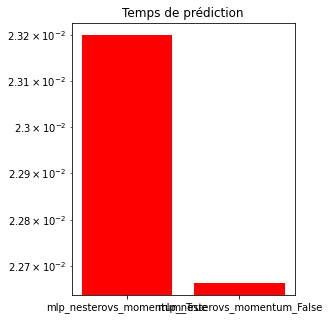

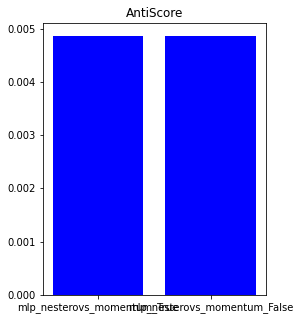

--->  mlp_early_stopping_True
temps de fit :  12.34571623802185
temps de prédiction :  0.023698091506958008
antiscore :  0.0034131457826963585
--->  mlp_early_stopping_False
temps de fit :  5.6740641593933105
temps de prédiction :  0.025587081909179688
antiscore :  0.004861147023840329


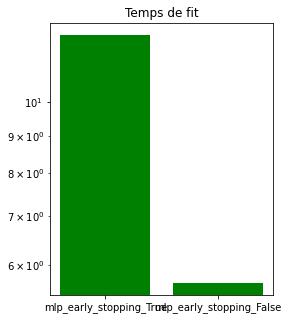

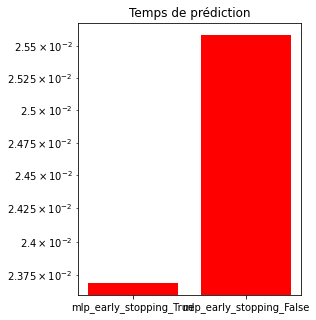

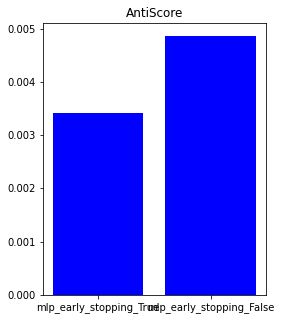

--->  mlp_validation_fraction_0.1
temps de fit :  5.622343301773071
temps de prédiction :  0.022609472274780273
antiscore :  0.004861147023840329
--->  mlp_validation_fraction_0.2
temps de fit :  5.504518032073975
temps de prédiction :  0.022806406021118164
antiscore :  0.004861147023840329
--->  mlp_validation_fraction_0.3
temps de fit :  5.564182281494141
temps de prédiction :  0.023272037506103516
antiscore :  0.004861147023840329
--->  mlp_validation_fraction_0.4
temps de fit :  6.362199068069458
temps de prédiction :  0.023347854614257812
antiscore :  0.004861147023840329
--->  mlp_validation_fraction_0.5
temps de fit :  5.636640787124634
temps de prédiction :  0.023022890090942383
antiscore :  0.004861147023840329


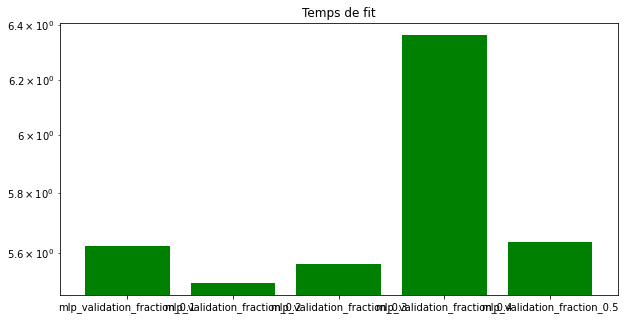

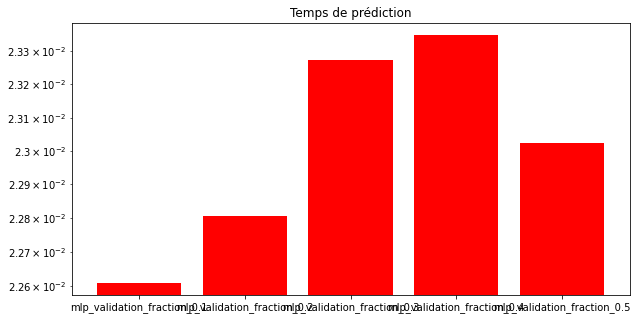

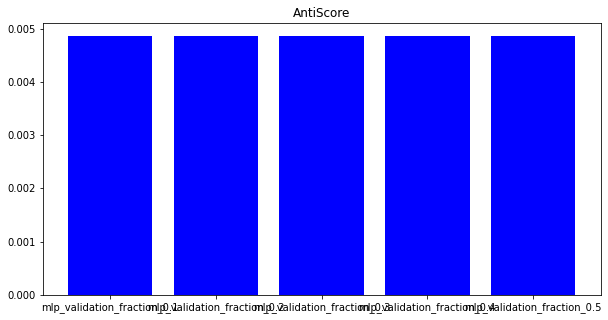

--->  mlp_beta_1_0.1
temps de fit :  7.787756681442261
temps de prédiction :  0.0234072208404541
antiscore :  0.40652634845115576
--->  mlp_beta_1_0.2
temps de fit :  5.305188179016113
temps de prédiction :  0.023783445358276367
antiscore :  0.004550861043595145
--->  mlp_beta_1_0.3
temps de fit :  6.6519293785095215
temps de prédiction :  0.023931503295898438
antiscore :  0.004654289703676873
--->  mlp_beta_1_0.4
temps de fit :  5.2101891040802
temps de prédiction :  0.02426314353942871
antiscore :  0.004240575063350072
--->  mlp_beta_1_0.5
temps de fit :  8.888923406600952
temps de prédiction :  0.023327350616455078
antiscore :  0.005947147954698195


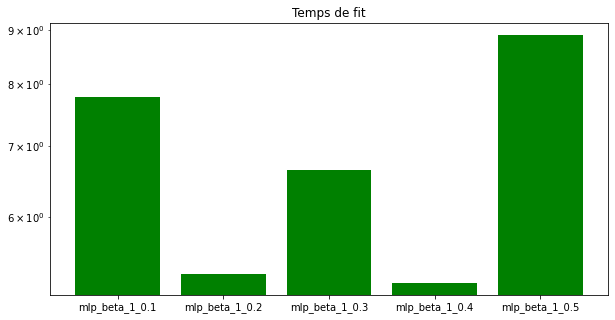

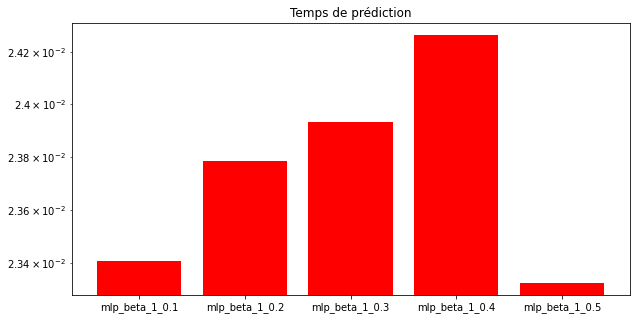

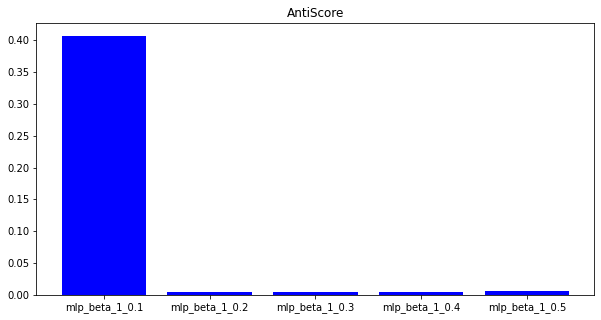

--->  mlp_beta_2_0.1
temps de fit :  4.644045829772949
temps de prédiction :  0.024645566940307617
antiscore :  0.05797176397579773
--->  mlp_beta_2_0.2
temps de fit :  4.770010709762573
temps de prédiction :  0.02435135841369629
antiscore :  0.41914464498112425
--->  mlp_beta_2_0.3
temps de fit :  5.008196592330933
temps de prédiction :  0.024068593978881836
antiscore :  0.4981641412835497
--->  mlp_beta_2_0.4
temps de fit :  12.859650373458862
temps de prédiction :  0.025131702423095703
antiscore :  0.0903966489114133
--->  mlp_beta_2_0.5
temps de fit :  7.51249623298645
temps de prédiction :  0.023964405059814453
antiscore :  0.0392511765010084


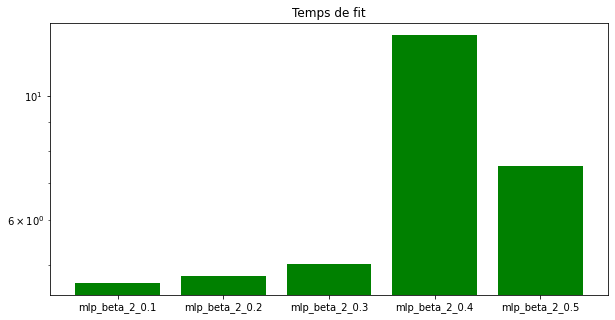

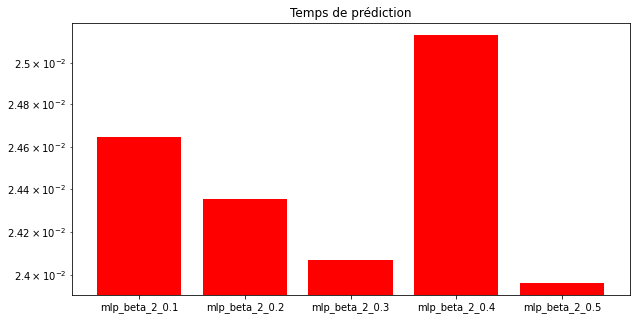

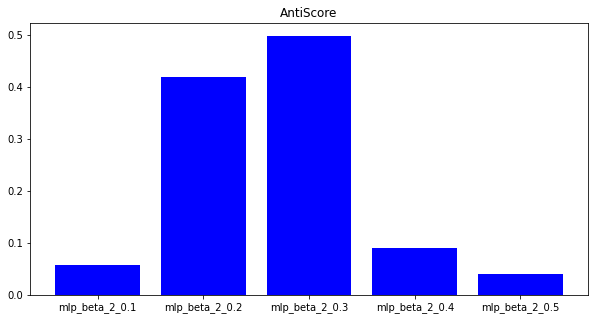

--->  mlp_epsilon_0.0001
temps de fit :  5.173353910446167
temps de prédiction :  0.024374723434448242
antiscore :  0.008791436106945216
--->  mlp_epsilon_0.001
temps de fit :  5.594362497329712
temps de prédiction :  0.024662256240844727
antiscore :  0.007033148885556173
--->  mlp_epsilon_0.01
temps de fit :  5.172820091247559
temps de prédiction :  0.023814916610717773
antiscore :  0.00336143145265555
--->  mlp_epsilon_0.1
temps de fit :  5.6607935428619385
temps de prédiction :  0.023462533950805664
antiscore :  0.005223147334126321
--->  mlp_epsilon_1
temps de fit :  5.26131534576416
temps de prédiction :  0.024689912796020508
antiscore :  0.0069814345555153645


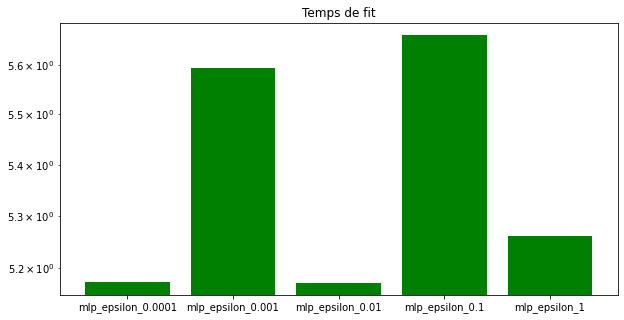

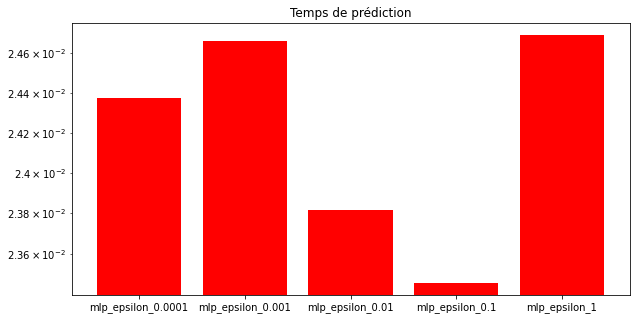

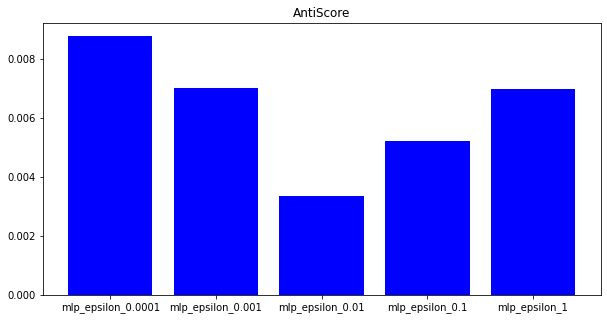

--->  mlp_n_iter_no_change_1
temps de fit :  2.5389764308929443
temps de prédiction :  0.026113271713256836
antiscore :  0.0064642912551068354
--->  mlp_n_iter_no_change_2
temps de fit :  2.637441396713257
temps de prédiction :  0.023678064346313477
antiscore :  0.008429435796659224
--->  mlp_n_iter_no_change_3
temps de fit :  2.9704792499542236
temps de prédiction :  0.02405261993408203
antiscore :  0.005533433314371394
--->  mlp_n_iter_no_change_4
temps de fit :  4.205633640289307
temps de prédiction :  0.023913145065307617
antiscore :  0.004757718363758601
--->  mlp_n_iter_no_change_5
temps de fit :  3.6355106830596924
temps de prédiction :  0.023783445358276367
antiscore :  0.00765372084604643


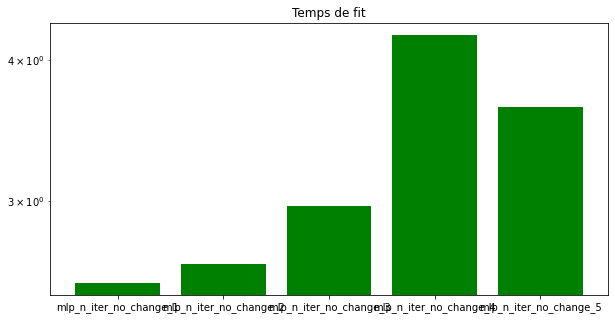

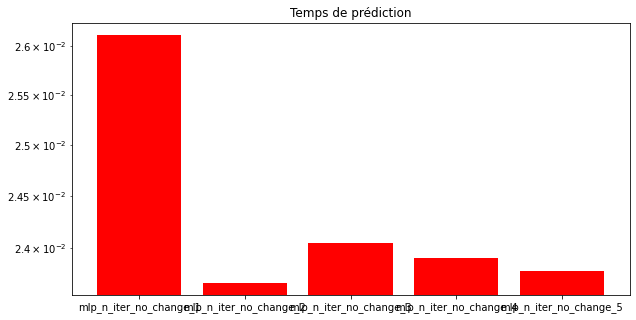

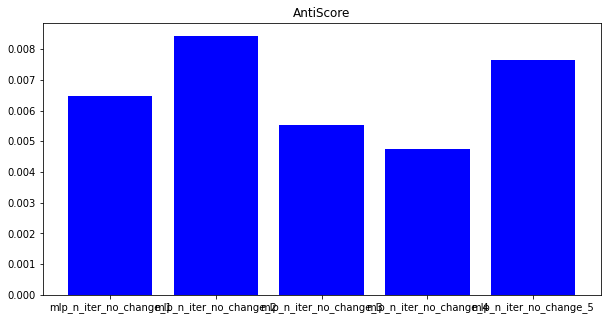

--->  mlp_max_fun_100
temps de fit :  5.583585977554321
temps de prédiction :  0.02517414093017578
antiscore :  0.004861147023840329
--->  mlp_max_fun_200
temps de fit :  5.481274604797363
temps de prédiction :  0.024074554443359375
antiscore :  0.004861147023840329
--->  mlp_max_fun_300
temps de fit :  5.726602077484131
temps de prédiction :  0.02516031265258789
antiscore :  0.004861147023840329
--->  mlp_max_fun_400
temps de fit :  5.7545325756073
temps de prédiction :  0.02359175682067871
antiscore :  0.004861147023840329
--->  mlp_max_fun_500
temps de fit :  6.360917806625366
temps de prédiction :  0.025173187255859375
antiscore :  0.004861147023840329


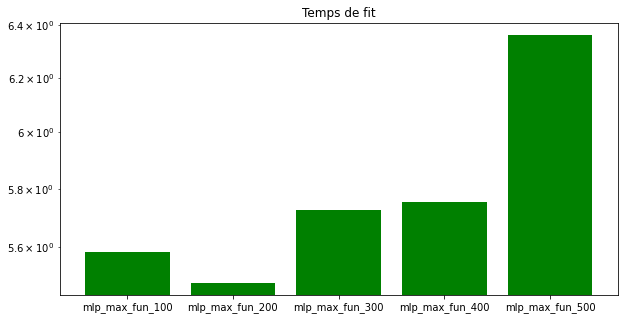

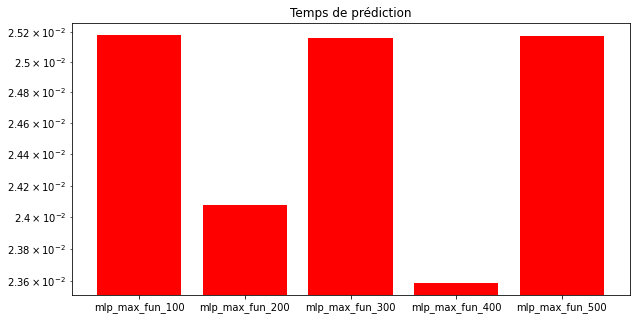

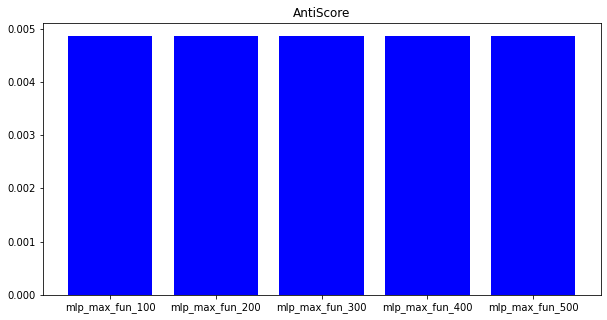

In [69]:
for hidden_layer_sizes in [(10,),(100,),(1000,)]:
    test_model("mlp_hidden_layer_sizes_"+str(hidden_layer_sizes),MLPClassifier,hidden_layer_sizes=hidden_layer_sizes,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for activation in ['identity', 'logistic', 'tanh', 'relu']:
    test_model("mlp_activation_"+str(activation),MLPClassifier,activation=activation,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for solver in ['lbfgs', 'sgd', 'adam']:
    test_model("mlp_solver_"+str(solver),MLPClassifier,solver=solver,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for alpha in [0.0001,0.001,0.01,0.1,1]:
    test_model("mlp_alpha_"+str(alpha),MLPClassifier,alpha=alpha,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for learning_rate in ['constant', 'invscaling', 'adaptive']:
    test_model("mlp_learning_rate_"+str(learning_rate),MLPClassifier,learning_rate=learning_rate,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for learning_rate_init in [0.0001,0.001,0.01,0.1,1]:
    test_model("mlp_learning_rate_init_"+str(learning_rate_init),MLPClassifier,learning_rate_init=learning_rate_init,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for power_t in [0.1,0.5,1,2,10]:
    test_model("mlp_power_t_"+str(power_t),MLPClassifier,power_t=power_t,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for max_iter in [100,200,300,400,500]:
    test_model("mlp_max_iter_"+str(max_iter),MLPClassifier,max_iter=max_iter,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for shuffle in [True, False]:
    test_model("mlp_shuffle_"+str(shuffle),MLPClassifier,shuffle=shuffle,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for tol in [0.0001,0.001,0.01,0.1,1]:
    test_model("mlp_tol_"+str(tol),MLPClassifier,tol=tol,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for momentum in [0.1,0.5,1]:
    test_model("mlp_momentum_"+str(momentum),MLPClassifier,momentum=momentum,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for nesterovs_momentum in [True, False]:
    test_model("mlp_nesterovs_momentum_"+str(nesterovs_momentum),MLPClassifier,nesterovs_momentum=nesterovs_momentum,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for early_stopping in [True, False]:
    test_model("mlp_early_stopping_"+str(early_stopping),MLPClassifier,early_stopping=early_stopping,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for validation_fraction in [0.1,0.2,0.3,0.4,0.5]:
    test_model("mlp_validation_fraction_"+str(validation_fraction),MLPClassifier,validation_fraction=validation_fraction,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for beta_1 in [0.1,0.2,0.3,0.4,0.5]:
    test_model("mlp_beta_1_"+str(beta_1),MLPClassifier,beta_1=beta_1,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for beta_2 in [0.1,0.2,0.3,0.4,0.5]:
    test_model("mlp_beta_2_"+str(beta_2),MLPClassifier,beta_2=beta_2,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for epsilon in [0.0001,0.001,0.01,0.1,1]:
    test_model("mlp_epsilon_"+str(epsilon),MLPClassifier,epsilon=epsilon,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for n_iter_no_change in [1,2,3,4,5]:
    test_model("mlp_n_iter_no_change_"+str(n_iter_no_change),MLPClassifier,n_iter_no_change=n_iter_no_change,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for max_fun in [100,200,300,400,500]:
    test_model("mlp_max_fun_"+str(max_fun),MLPClassifier,max_fun=max_fun,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()

## 4-classification

--->  mlp_hidden_layer_sizes_4_class_(10,)
temps de fit :  8.87137508392334
temps de prédiction :  0.01670098304748535
antiscore :  0.33267828515281583
--->  mlp_hidden_layer_sizes_4_class_(100,)
temps de fit :  6.266740798950195
temps de prédiction :  0.03386425971984863
antiscore :  0.3392977193980452
--->  mlp_hidden_layer_sizes_4_class_(1000,)
temps de fit :  190.24009585380554
temps de prédiction :  0.5439999103546143
antiscore :  0.3058902621916533


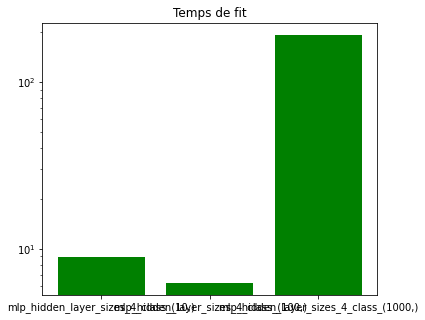

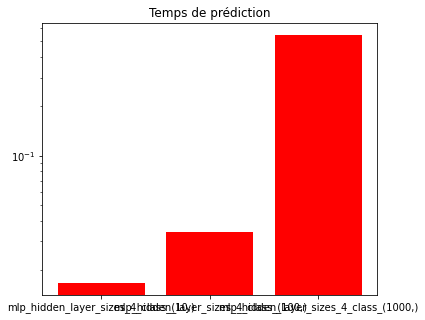

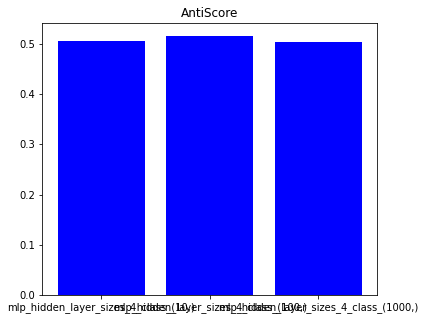

--->  mlp_activation_4_class_identity
temps de fit :  4.345831871032715
temps de prédiction :  0.024126052856445312
antiscore :  0.33784971815690124
--->  mlp_activation_4_class_logistic
temps de fit :  20.01805591583252
temps de prédiction :  0.10527276992797852
antiscore :  0.32564513626725966
--->  mlp_activation_4_class_tanh
temps de fit :  7.0528481006622314
temps de prédiction :  0.04462432861328125
antiscore :  0.4700832600713658
--->  mlp_activation_4_class_relu
temps de fit :  6.133220911026001
temps de prédiction :  0.03192543983459473
antiscore :  0.3392977193980452


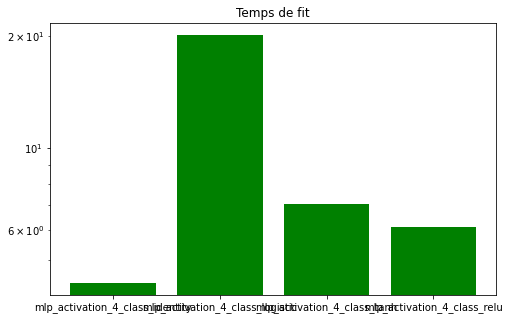

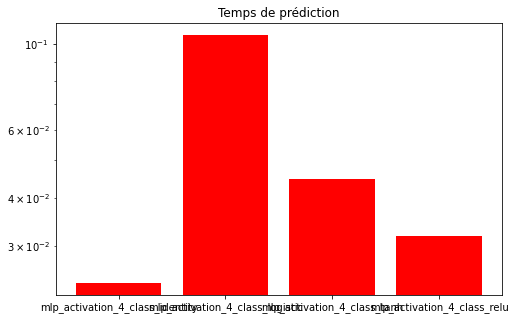

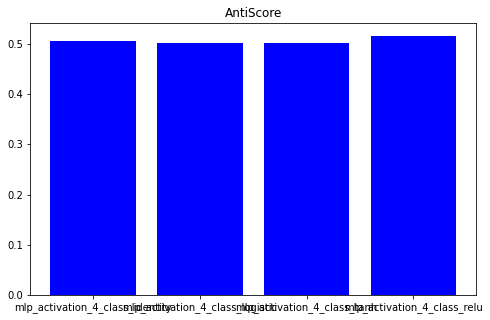

--->  mlp_solver_4_class_lbfgs
temps de fit :  6.932359933853149
temps de prédiction :  0.031106233596801758
antiscore :  0.487045560324766
--->  mlp_solver_4_class_sgd
temps de fit :  6.218889474868774
temps de prédiction :  0.032625436782836914
antiscore :  0.497336712002896
--->  mlp_solver_4_class_adam
temps de fit :  5.984359979629517
temps de prédiction :  0.030981063842773438
antiscore :  0.3392977193980452


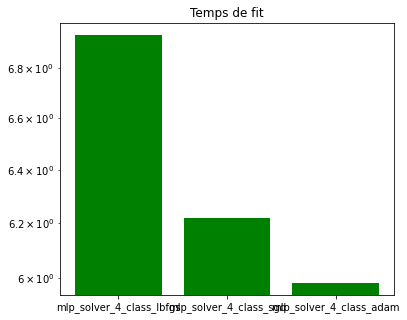

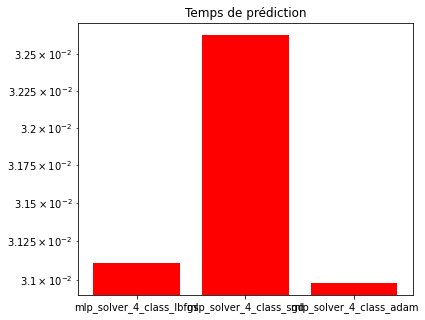

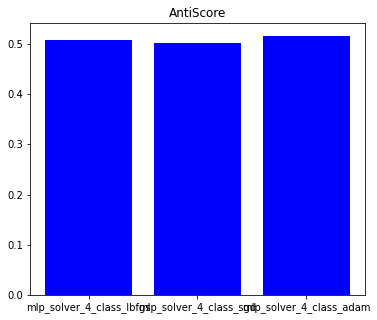

--->  mlp_alpha_4_class_0.0001
temps de fit :  5.977270603179932
temps de prédiction :  0.031110763549804688
antiscore :  0.3392977193980452
--->  mlp_alpha_4_class_0.001
temps de fit :  10.077361822128296
temps de prédiction :  0.03164935111999512
antiscore :  0.4241092206650463
--->  mlp_alpha_4_class_0.01
temps de fit :  8.073076009750366
temps de prédiction :  0.03145647048950195
antiscore :  0.33748771784661524
--->  mlp_alpha_4_class_0.1
temps de fit :  10.99616551399231
temps de prédiction :  0.03047037124633789
antiscore :  0.3305062832911
--->  mlp_alpha_4_class_1
temps de fit :  6.733138561248779
temps de prédiction :  0.030986547470092773
antiscore :  0.32528313595697367


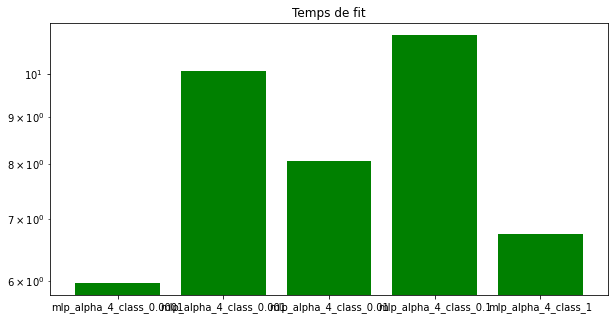

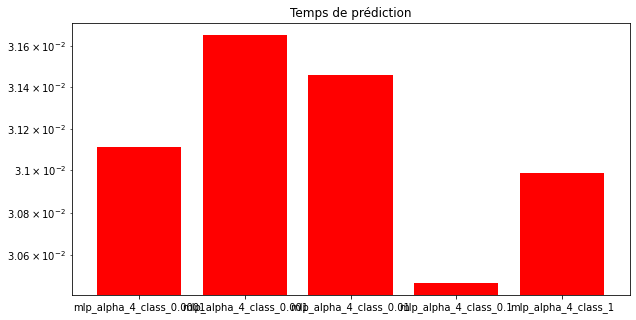

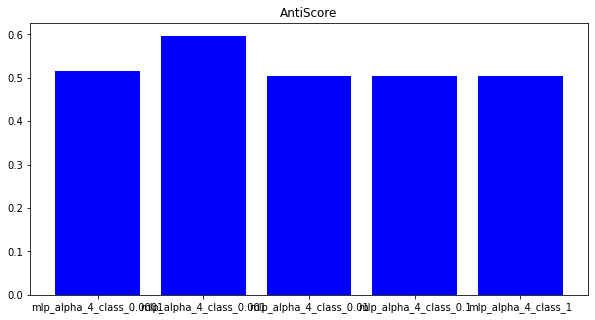

--->  mlp_learning_rate_4_class_constant
temps de fit :  6.064740180969238
temps de prédiction :  0.031630516052246094
antiscore :  0.3392977193980452
--->  mlp_learning_rate_4_class_invscaling
temps de fit :  6.283487796783447
temps de prédiction :  0.0322566032409668
antiscore :  0.3392977193980452
--->  mlp_learning_rate_4_class_adaptive
temps de fit :  6.223936080932617
temps de prédiction :  0.03409624099731445
antiscore :  0.3392977193980452


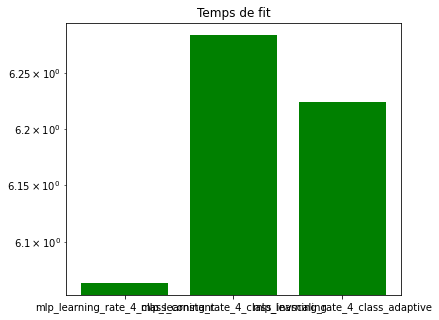

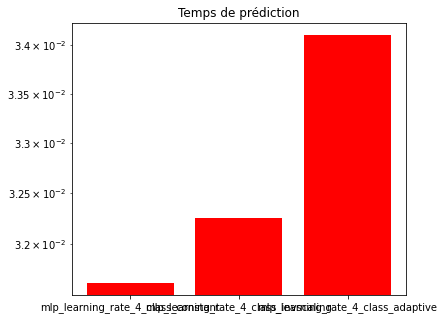

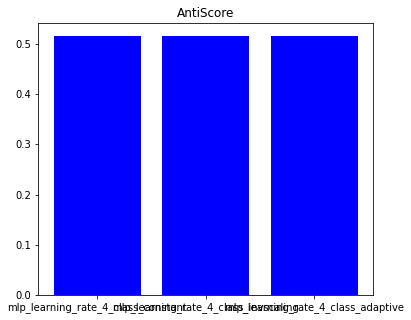

--->  mlp_learning_rate_init_4_class_0.0001
temps de fit :  42.42884063720703
temps de prédiction :  0.03215193748474121
antiscore :  0.2845839582148213
--->  mlp_learning_rate_init_4_class_0.001
temps de fit :  6.351977348327637
temps de prédiction :  0.03112936019897461
antiscore :  0.3392977193980452
--->  mlp_learning_rate_init_4_class_0.01
temps de fit :  10.799724340438843
temps de prédiction :  0.0332183837890625
antiscore :  0.330868283601386
--->  mlp_learning_rate_init_4_class_0.1
temps de fit :  5.396583795547485
temps de prédiction :  0.031798362731933594
antiscore :  0.497336712002896
--->  mlp_learning_rate_init_4_class_1
temps de fit :  12.88540530204773
temps de prédiction :  0.03266119956970215
antiscore :  0.497336712002896


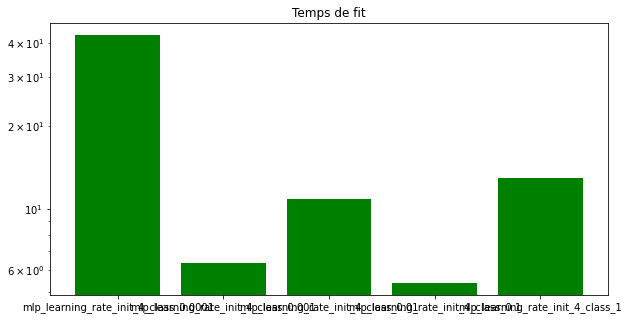

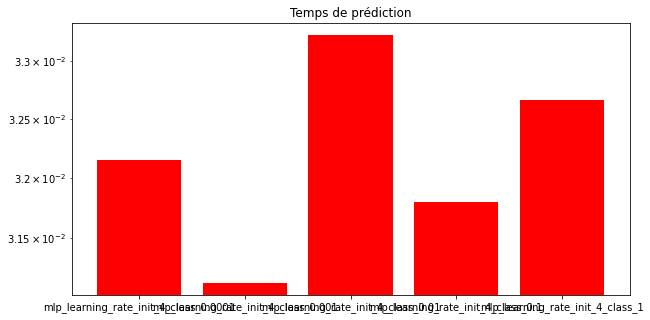

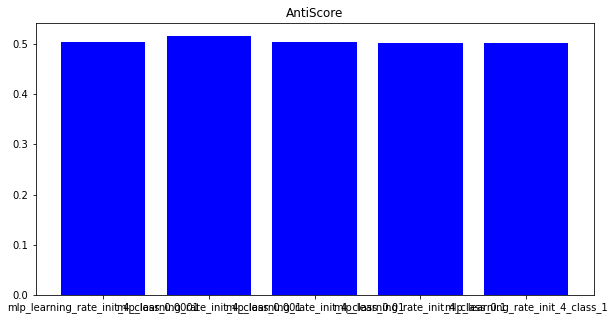

--->  mlp_power_t_4_class_0.1
temps de fit :  5.932583570480347
temps de prédiction :  0.03050971031188965
antiscore :  0.3392977193980452
--->  mlp_power_t_4_class_0.5
temps de fit :  6.091752290725708
temps de prédiction :  0.03106856346130371
antiscore :  0.3392977193980452
--->  mlp_power_t_4_class_1
temps de fit :  6.057282209396362
temps de prédiction :  0.03118109703063965
antiscore :  0.3392977193980452
--->  mlp_power_t_4_class_2
temps de fit :  6.023074388504028
temps de prédiction :  0.031545162200927734
antiscore :  0.3392977193980452
--->  mlp_power_t_4_class_10
temps de fit :  5.966172218322754
temps de prédiction :  0.030647993087768555
antiscore :  0.3392977193980452


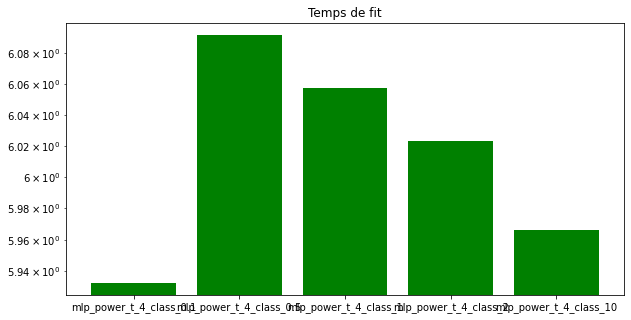

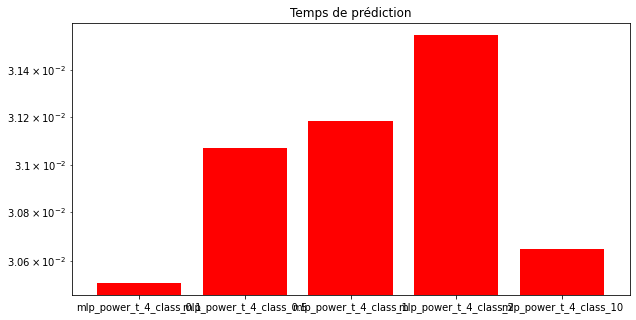

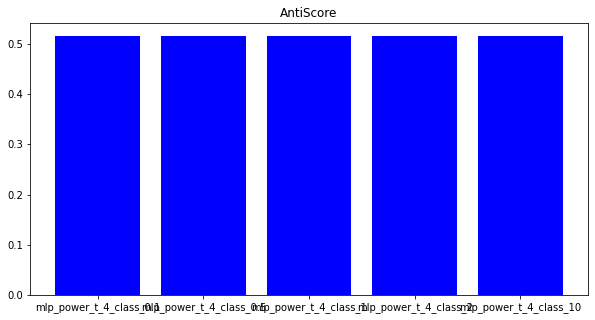

--->  mlp_max_iter_4_class_100
temps de fit :  5.928343772888184
temps de prédiction :  0.03084111213684082
antiscore :  0.3392977193980452
--->  mlp_max_iter_4_class_200
temps de fit :  5.883930921554565
temps de prédiction :  0.030968427658081055
antiscore :  0.3392977193980452
--->  mlp_max_iter_4_class_300
temps de fit :  5.905480146408081
temps de prédiction :  0.03196001052856445
antiscore :  0.3392977193980452
--->  mlp_max_iter_4_class_400
temps de fit :  5.880777359008789
temps de prédiction :  0.031026840209960938
antiscore :  0.3392977193980452
--->  mlp_max_iter_4_class_500
temps de fit :  6.834522008895874
temps de prédiction :  0.031092166900634766
antiscore :  0.3392977193980452


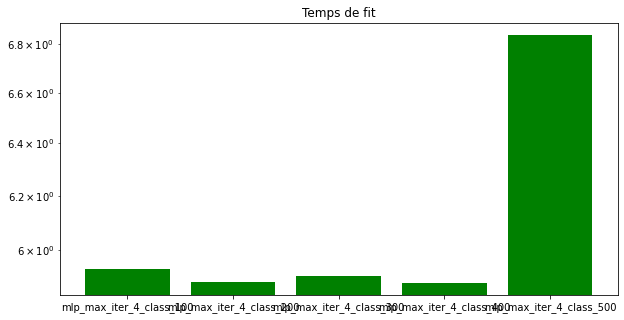

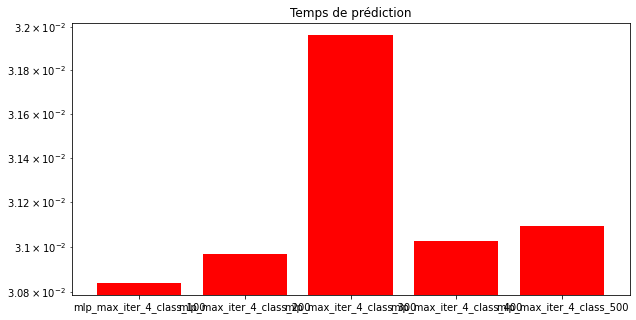

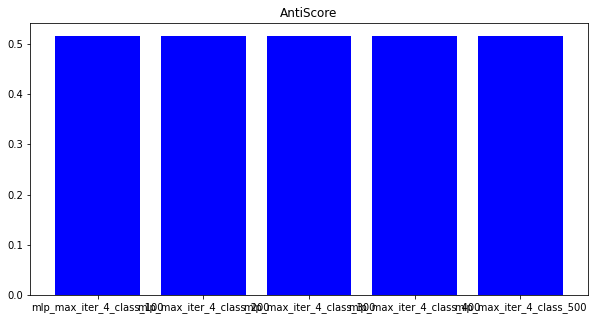

--->  mlp_shuffle_4_class_True
temps de fit :  5.978472471237183
temps de prédiction :  0.03200650215148926
antiscore :  0.3392977193980452
--->  mlp_shuffle_4_class_False
temps de fit :  4.447096586227417
temps de prédiction :  0.0316622257232666
antiscore :  0.33666028856596164


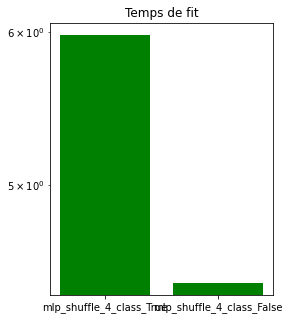

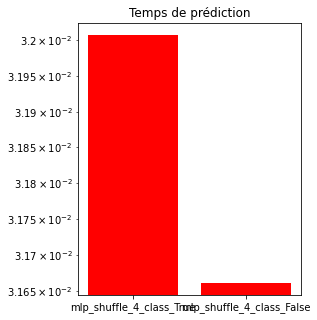

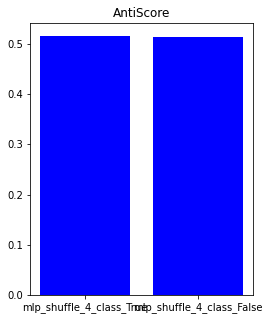

--->  mlp_tol_4_class_0.0001
temps de fit :  6.184348106384277
temps de prédiction :  0.030914783477783203
antiscore :  0.3392977193980452
--->  mlp_tol_4_class_0.001
temps de fit :  6.069569110870361
temps de prédiction :  0.03171396255493164
antiscore :  0.3392977193980452
--->  mlp_tol_4_class_0.01
temps de fit :  6.798197269439697
temps de prédiction :  0.031497955322265625
antiscore :  0.3392977193980452
--->  mlp_tol_4_class_0.1
temps de fit :  6.400484085083008
temps de prédiction :  0.03168487548828125
antiscore :  0.3392977193980452
--->  mlp_tol_4_class_1
temps de fit :  6.056687593460083
temps de prédiction :  0.031893014907836914
antiscore :  0.3392977193980452


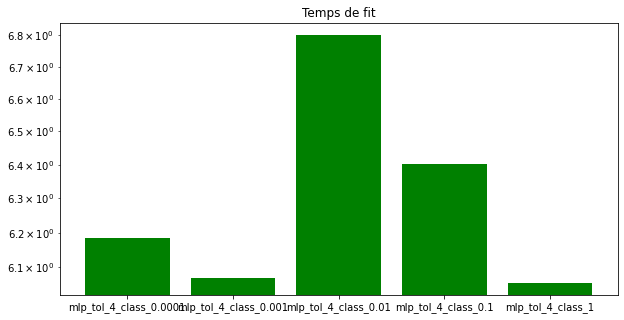

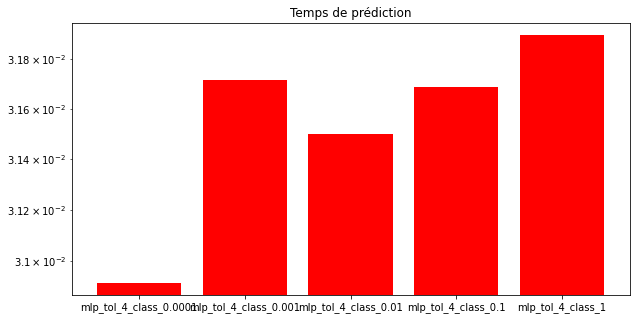

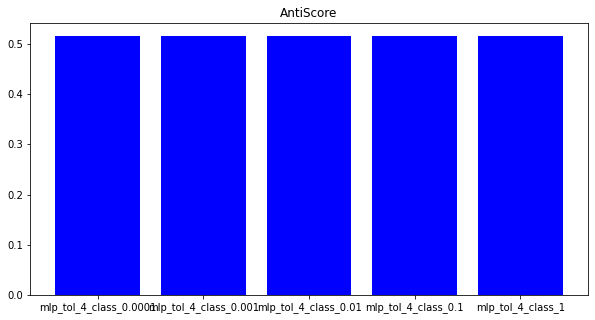

--->  mlp_momentum_4_class_0.1
temps de fit :  6.036958456039429
temps de prédiction :  0.0316314697265625
antiscore :  0.3392977193980452
--->  mlp_momentum_4_class_0.5
temps de fit :  6.189318418502808
temps de prédiction :  0.037912607192993164
antiscore :  0.3392977193980452
--->  mlp_momentum_4_class_1
temps de fit :  6.424184322357178
temps de prédiction :  0.031143903732299805
antiscore :  0.3392977193980452


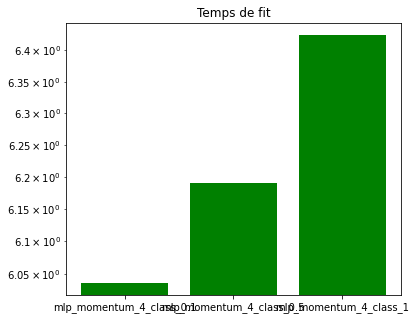

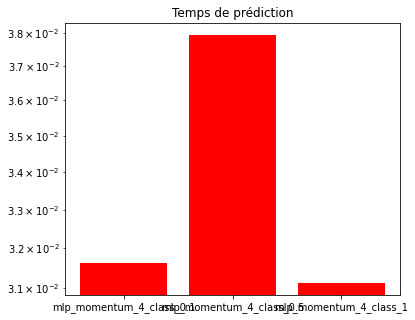

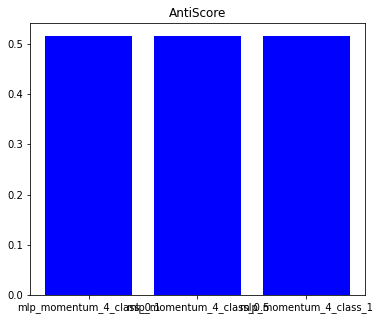

--->  mlp_nesterovs_momentum_4_class_True
temps de fit :  6.069310665130615
temps de prédiction :  0.03202676773071289
antiscore :  0.3392977193980452
--->  mlp_nesterovs_momentum_4_class_False
temps de fit :  6.00180459022522
temps de prédiction :  0.031233787536621094
antiscore :  0.3392977193980452


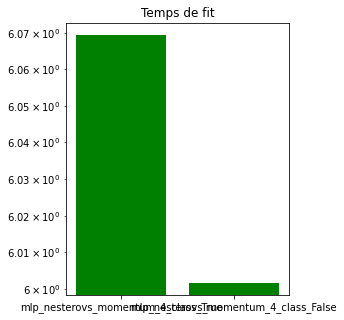

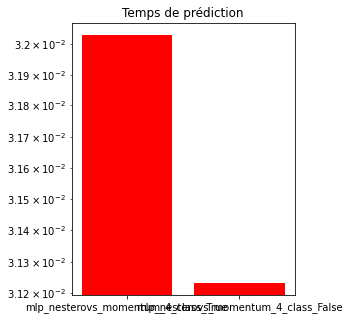

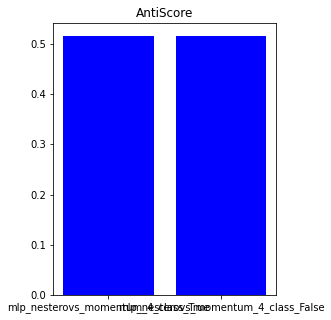

--->  mlp_early_stopping_4_class_True
temps de fit :  5.999276399612427
temps de prédiction :  0.03197145462036133
antiscore :  0.3106479805554119
--->  mlp_early_stopping_4_class_False
temps de fit :  6.337293386459351
temps de prédiction :  0.031983375549316406
antiscore :  0.3392977193980452


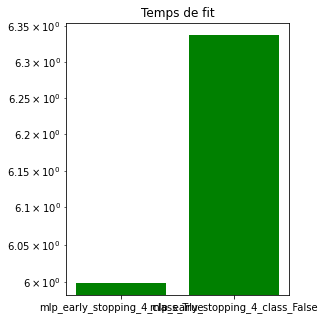

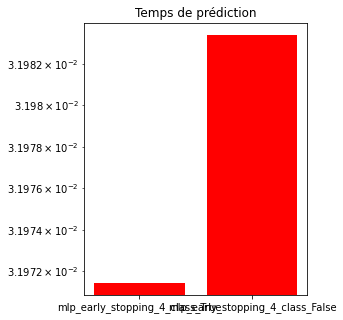

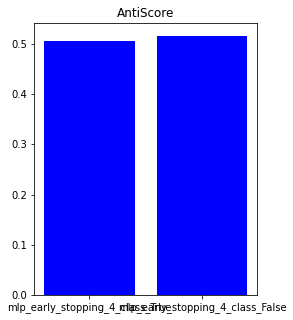

--->  mlp_validation_fraction_4_class_0.1
temps de fit :  6.038215398788452
temps de prédiction :  0.0322880744934082
antiscore :  0.3392977193980452
--->  mlp_validation_fraction_4_class_0.2
temps de fit :  6.321813106536865
temps de prédiction :  0.03192734718322754
antiscore :  0.3392977193980452
--->  mlp_validation_fraction_4_class_0.3
temps de fit :  5.919617176055908
temps de prédiction :  0.030547380447387695
antiscore :  0.3392977193980452
--->  mlp_validation_fraction_4_class_0.4
temps de fit :  6.153125047683716
temps de prédiction :  0.030599117279052734
antiscore :  0.3392977193980452
--->  mlp_validation_fraction_4_class_0.5
temps de fit :  6.9058616161346436
temps de prédiction :  0.03148365020751953
antiscore :  0.3392977193980452


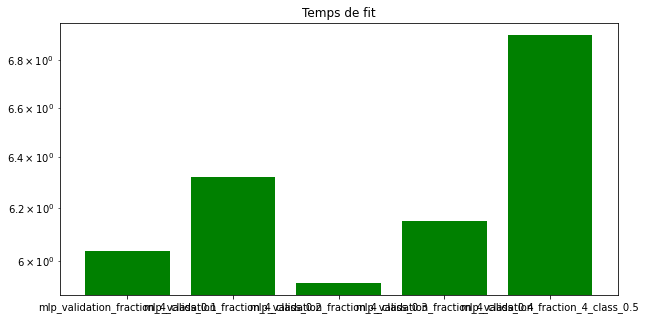

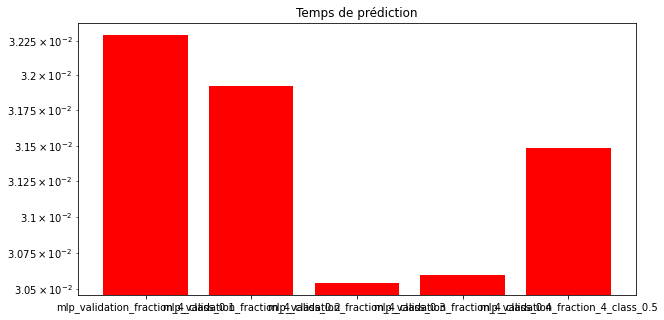

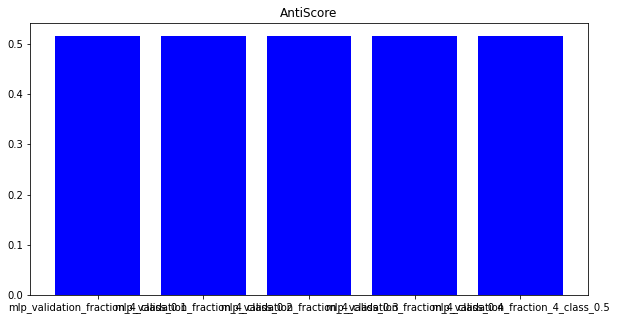

--->  mlp_beta_1_4_class_0.1
temps de fit :  55.58913540840149
temps de prédiction :  0.07171821594238281
antiscore :  0.34105600661943425
--->  mlp_beta_1_4_class_0.2
temps de fit :  68.8819990158081
temps de prédiction :  0.07753396034240723
antiscore :  0.31054455189533015
--->  mlp_beta_1_4_class_0.3
temps de fit :  74.95077681541443
temps de prédiction :  0.07546854019165039
antiscore :  0.3048042612607954
--->  mlp_beta_1_4_class_0.4
temps de fit :  88.97298336029053
temps de prédiction :  0.07916045188903809
antiscore :  0.308837979003982
--->  mlp_beta_1_4_class_0.5
temps de fit :  95.15161085128784
temps de prédiction :  0.06788301467895508
antiscore :  0.3075451207529607


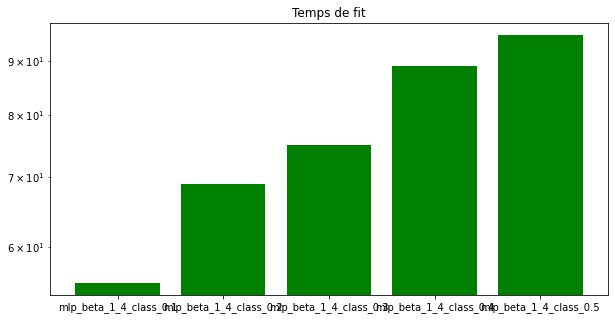

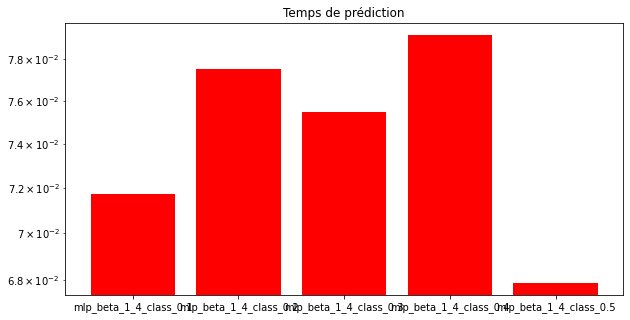

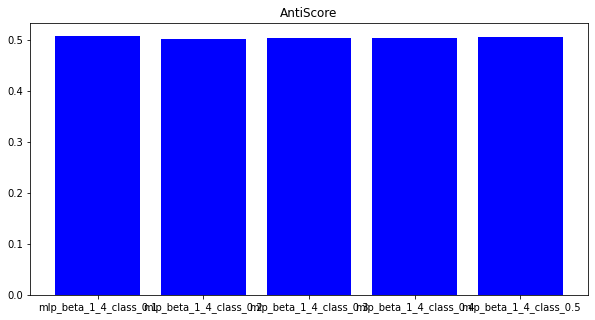

--->  mlp_beta_2_4_class_0.1
temps de fit :  4.86518669128418
temps de prédiction :  0.03194069862365723
antiscore :  0.5017841443864095
--->  mlp_beta_2_4_class_0.2
temps de fit :  5.002956390380859
temps de prédiction :  0.03201556205749512
antiscore :  0.34265915085070076
--->  mlp_beta_2_4_class_0.3
temps de fit :  4.839216709136963
temps de prédiction :  0.03154587745666504
antiscore :  0.37404974918549927
--->  mlp_beta_2_4_class_0.4
temps de fit :  4.954917907714844
temps de prédiction :  0.03246498107910156
antiscore :  0.8277912809639552
--->  mlp_beta_2_4_class_0.5
temps de fit :  5.20522928237915
temps de prédiction :  0.03408622741699219
antiscore :  0.3427625795107825


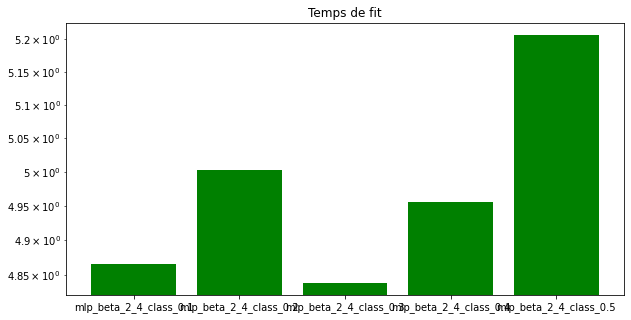

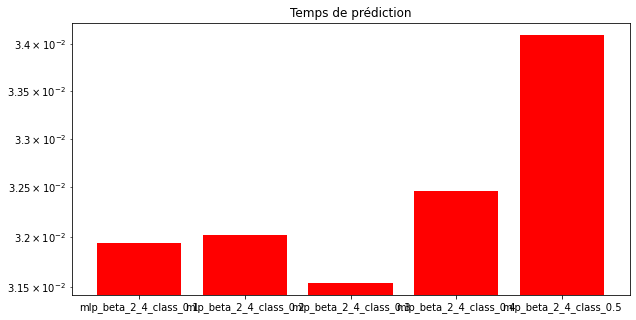

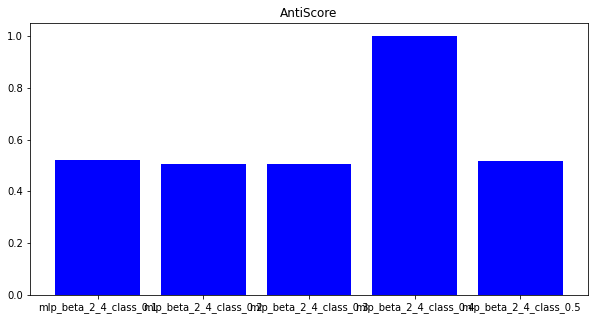

--->  mlp_epsilon_4_class_0.0001
temps de fit :  6.420006275177002
temps de prédiction :  0.03117203712463379
antiscore :  0.3108031235455345
--->  mlp_epsilon_4_class_0.001
temps de fit :  5.752595663070679
temps de prédiction :  0.032279253005981445
antiscore :  0.3270414231783627
--->  mlp_epsilon_4_class_0.01
temps de fit :  6.199956893920898
temps de prédiction :  0.03125357627868652
antiscore :  0.3019082587785076
--->  mlp_epsilon_4_class_0.1
temps de fit :  10.417842388153076
temps de prédiction :  0.031044483184814453
antiscore :  0.3179397010911723
--->  mlp_epsilon_4_class_1
temps de fit :  6.046102285385132
temps de prédiction :  0.030985593795776367
antiscore :  0.30020168588715934


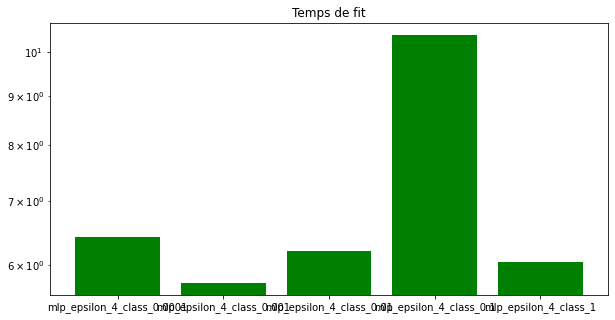

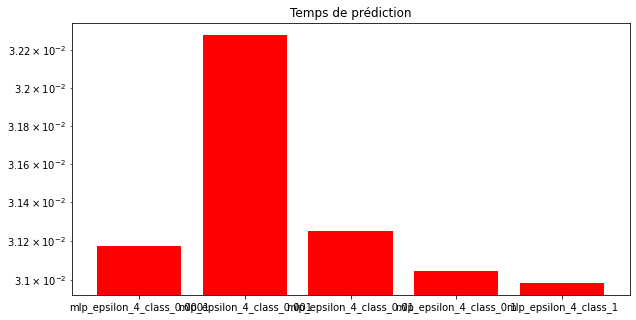

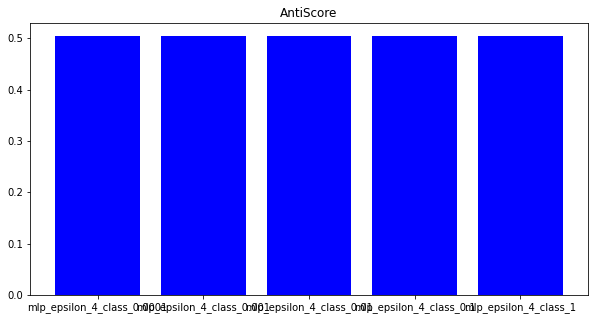

--->  mlp_n_iter_no_change_4_class_1
temps de fit :  2.4471359252929688
temps de prédiction :  0.0307159423828125
antiscore :  0.31178569581631066
--->  mlp_n_iter_no_change_4_class_2
temps de fit :  3.0666611194610596
temps de prédiction :  0.03155016899108887
antiscore :  0.32843771008946576
--->  mlp_n_iter_no_change_4_class_3
temps de fit :  3.2685067653656006
temps de prédiction :  0.03141665458679199
antiscore :  0.3166985571701919
--->  mlp_n_iter_no_change_4_class_4
temps de fit :  3.7325735092163086
temps de prédiction :  0.03100872039794922
antiscore :  0.33195428453224385
--->  mlp_n_iter_no_change_4_class_5
temps de fit :  3.962623357772827
temps de prédiction :  0.031216859817504883
antiscore :  0.3305062832911


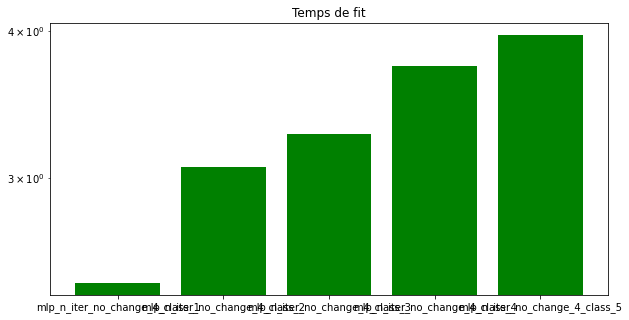

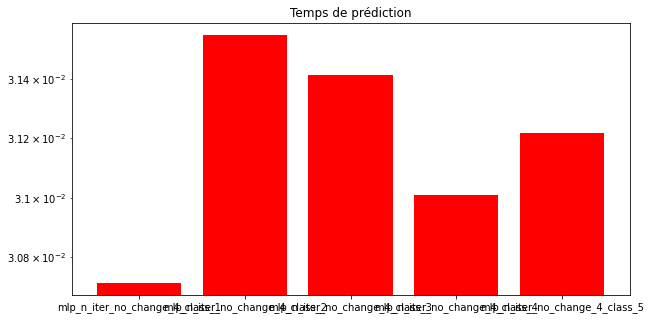

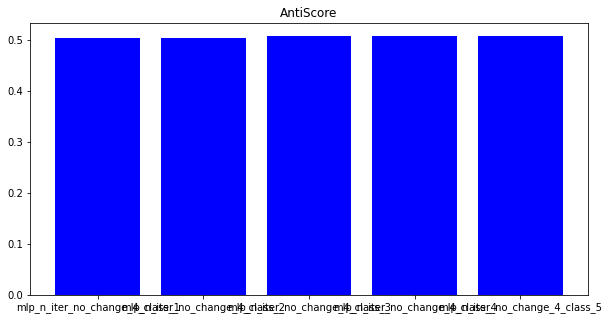

--->  mlp_max_fun_4_class_100
temps de fit :  6.351295471191406
temps de prédiction :  0.054793596267700195
antiscore :  0.3392977193980452
--->  mlp_max_fun_4_class_200
temps de fit :  6.122729063034058
temps de prédiction :  0.03162264823913574
antiscore :  0.3392977193980452
--->  mlp_max_fun_4_class_300
temps de fit :  6.156371593475342
temps de prédiction :  0.032269954681396484
antiscore :  0.3392977193980452
--->  mlp_max_fun_4_class_400
temps de fit :  6.2414326667785645
temps de prédiction :  0.0317387580871582
antiscore :  0.3392977193980452
--->  mlp_max_fun_4_class_500
temps de fit :  6.057210206985474
temps de prédiction :  0.03289461135864258
antiscore :  0.3392977193980452


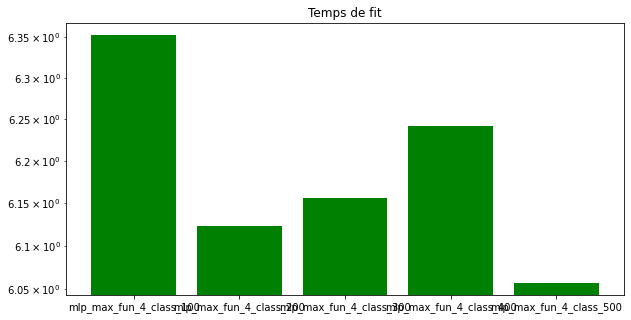

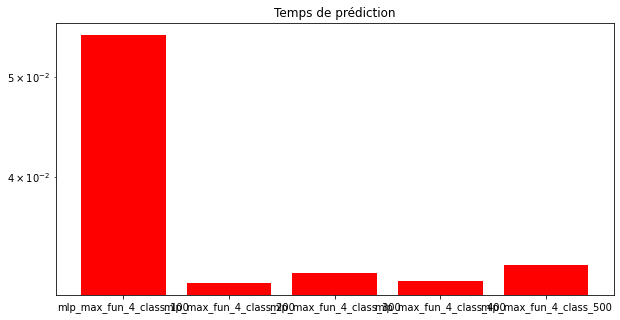

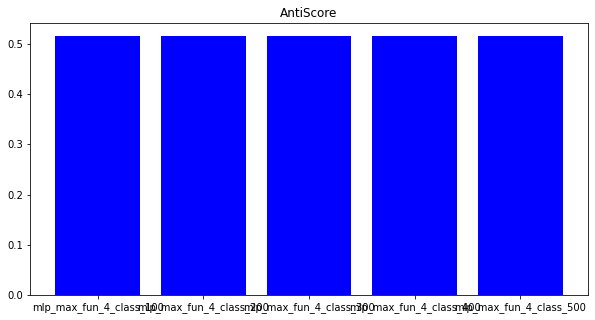

In [70]:
for hidden_layer_sizes in [(10,),(100,),(1000,)]:
    test_model_4_class("mlp_hidden_layer_sizes_4_class_"+str(hidden_layer_sizes),MLPClassifier,hidden_layer_sizes=hidden_layer_sizes,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for activation in ['identity', 'logistic', 'tanh', 'relu']:
    test_model_4_class("mlp_activation_4_class_"+str(activation),MLPClassifier,activation=activation,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for solver in ['lbfgs', 'sgd', 'adam']:
    test_model_4_class("mlp_solver_4_class_"+str(solver),MLPClassifier,solver=solver,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for alpha in [0.0001,0.001,0.01,0.1,1]:
    test_model_4_class("mlp_alpha_4_class_"+str(alpha),MLPClassifier,alpha=alpha,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for learning_rate in ['constant', 'invscaling', 'adaptive']:
    test_model_4_class("mlp_learning_rate_4_class_"+str(learning_rate),MLPClassifier,learning_rate=learning_rate,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for learning_rate_init in [0.0001,0.001,0.01,0.1,1]:
    test_model_4_class("mlp_learning_rate_init_4_class_"+str(learning_rate_init),MLPClassifier,learning_rate_init=learning_rate_init,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for power_t in [0.1,0.5,1,2,10]:
    test_model_4_class("mlp_power_t_4_class_"+str(power_t),MLPClassifier,power_t=power_t,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for max_iter in [100,200,300,400,500]:
    test_model_4_class("mlp_max_iter_4_class_"+str(max_iter),MLPClassifier,max_iter=max_iter,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for shuffle in [True, False]:
    test_model_4_class("mlp_shuffle_4_class_"+str(shuffle),MLPClassifier,shuffle=shuffle,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for tol in [0.0001,0.001,0.01,0.1,1]:
    test_model_4_class("mlp_tol_4_class_"+str(tol),MLPClassifier,tol=tol,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for momentum in [0.1,0.5,1]:
    test_model_4_class("mlp_momentum_4_class_"+str(momentum),MLPClassifier,momentum=momentum,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for nesterovs_momentum in [True, False]:
    test_model_4_class("mlp_nesterovs_momentum_4_class_"+str(nesterovs_momentum),MLPClassifier,nesterovs_momentum=nesterovs_momentum,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for early_stopping in [True, False]:
    test_model_4_class("mlp_early_stopping_4_class_"+str(early_stopping),MLPClassifier,early_stopping=early_stopping,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for validation_fraction in [0.1,0.2,0.3,0.4,0.5]:
    test_model_4_class("mlp_validation_fraction_4_class_"+str(validation_fraction),MLPClassifier,validation_fraction=validation_fraction,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for beta_1 in [0.1,0.2,0.3,0.4,0.5]:
    test_model_4_class("mlp_beta_1_4_class_"+str(beta_1),MLPClassifier,beta_1=beta_1,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for beta_2 in [0.1,0.2,0.3,0.4,0.5]:
    test_model_4_class("mlp_beta_2_4_class_"+str(beta_2),MLPClassifier,beta_2=beta_2,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for epsilon in [0.0001,0.001,0.01,0.1,1]:
    test_model_4_class("mlp_epsilon_4_class_"+str(epsilon),MLPClassifier,epsilon=epsilon,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for n_iter_no_change in [1,2,3,4,5]:
    test_model_4_class("mlp_n_iter_no_change_4_class_"+str(n_iter_no_change),MLPClassifier,n_iter_no_change=n_iter_no_change,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for max_fun in [100,200,300,400,500]:
    test_model_4_class("mlp_max_fun_4_class_"+str(max_fun),MLPClassifier,max_fun=max_fun,max_iter=300,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()

## KNN

## Binary-classification

--->  knn_n_neighbors_1
temps de fit :  0.057469844818115234
temps de prédiction :  8.63979721069336
antiscore :  0.0006722862905310656
--->  knn_n_neighbors_2
temps de fit :  0.05895280838012695
temps de prédiction :  9.664255380630493
antiscore :  0.0011377152608987862
--->  knn_n_neighbors_3
temps de fit :  0.05876445770263672
temps de prédiction :  11.151407957077026
antiscore :  0.0011894295909395947
--->  knn_n_neighbors_4
temps de fit :  0.06008601188659668
temps de prédiction :  16.079380989074707
antiscore :  0.0014997155711847787
--->  knn_n_neighbors_5
temps de fit :  0.06009340286254883
temps de prédiction :  15.97633981704712
antiscore :  0.0015514299012255872


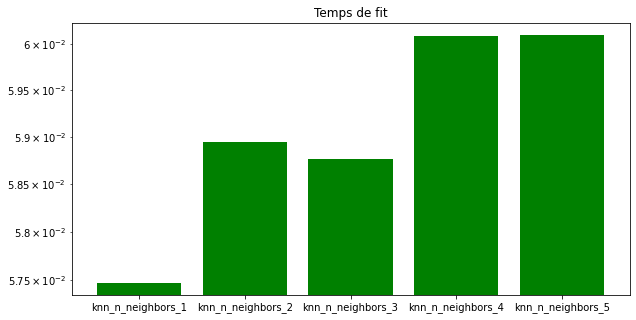

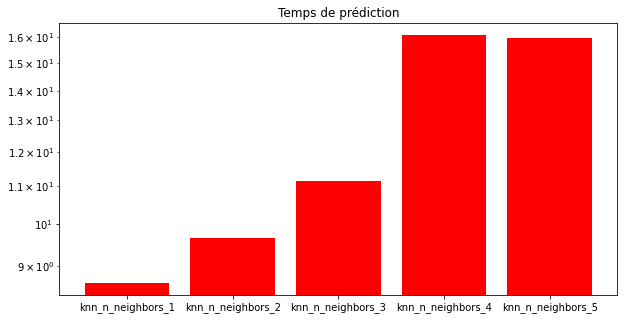

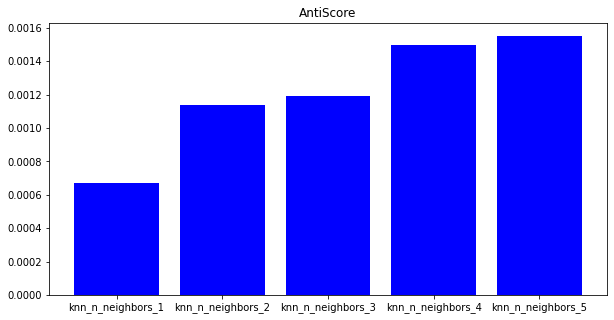

--->  knn_weights_uniform
temps de fit :  0.06717586517333984
temps de prédiction :  16.130001306533813
antiscore :  0.0015514299012255872
--->  knn_weights_distance
temps de fit :  0.06031918525695801
temps de prédiction :  15.646986961364746
antiscore :  0.0011377152608987862


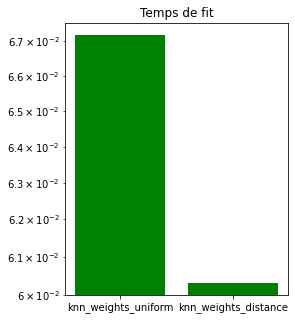

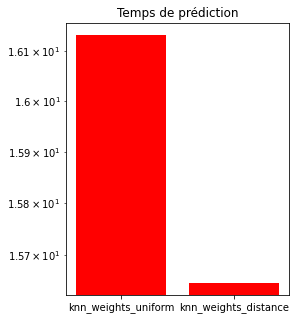

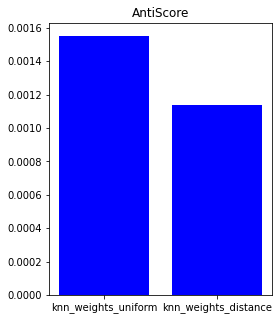

--->  knn_algorithm_auto
temps de fit :  0.05945873260498047
temps de prédiction :  15.959298372268677
antiscore :  0.0015514299012255872
--->  knn_algorithm_ball_tree
temps de fit :  0.16524958610534668
temps de prédiction :  4.152997970581055
antiscore :  0.0015514299012255872
--->  knn_algorithm_kd_tree
temps de fit :  0.23065781593322754
temps de prédiction :  1.369004487991333
antiscore :  0.0015514299012255872
--->  knn_algorithm_brute
temps de fit :  0.06730127334594727
temps de prédiction :  15.856547594070435
antiscore :  0.0015514299012255872


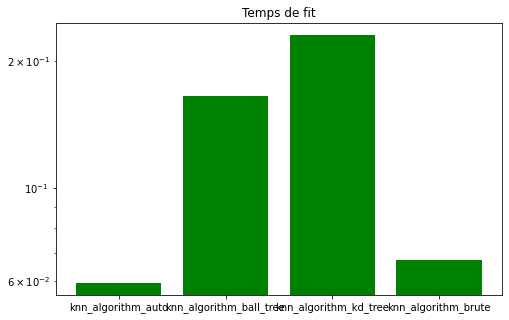

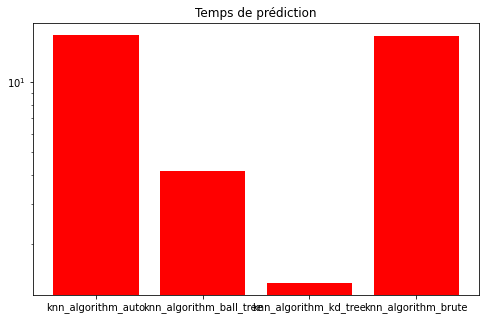

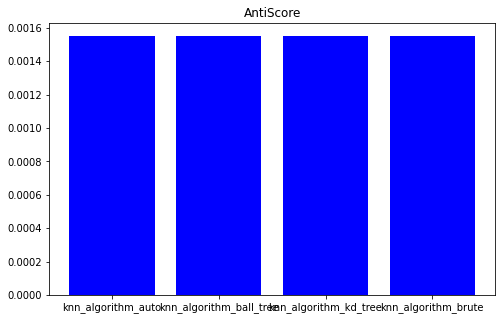

--->  knn_leaf_size_10
temps de fit :  0.06549382209777832
temps de prédiction :  16.326100826263428
antiscore :  0.0015514299012255872
--->  knn_leaf_size_20
temps de fit :  0.058826446533203125
temps de prédiction :  16.058125495910645
antiscore :  0.0015514299012255872
--->  knn_leaf_size_30
temps de fit :  0.059893131256103516
temps de prédiction :  16.43855047225952
antiscore :  0.0015514299012255872
--->  knn_leaf_size_40
temps de fit :  0.05907702445983887
temps de prédiction :  16.205323219299316
antiscore :  0.0015514299012255872
--->  knn_leaf_size_50
temps de fit :  0.05927920341491699
temps de prédiction :  16.328073740005493
antiscore :  0.0015514299012255872


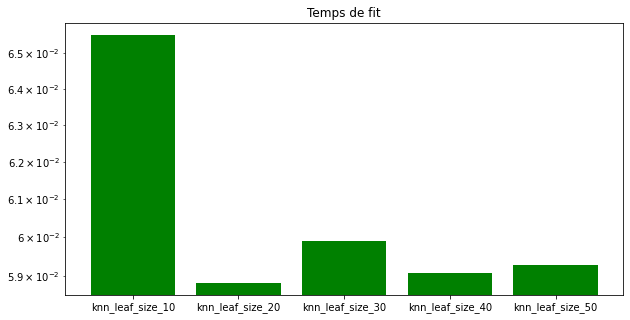

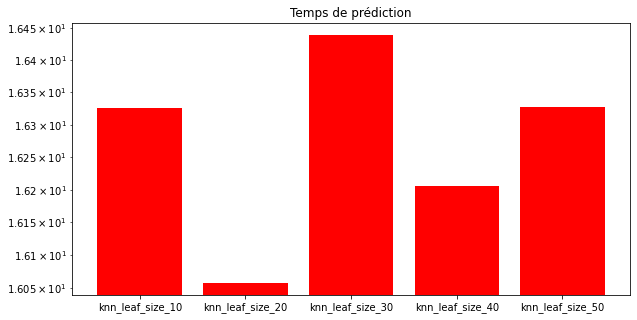

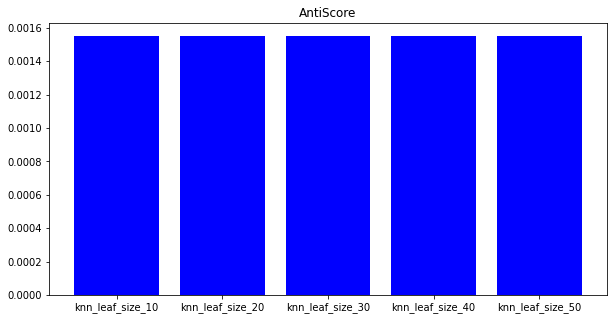

--->  knn_p_1
temps de fit :  0.06852555274963379
temps de prédiction :  33.900309324264526
antiscore :  0.0010860009308579777
--->  knn_p_2
temps de fit :  0.0594022274017334
temps de prédiction :  15.949608325958252
antiscore :  0.0015514299012255872


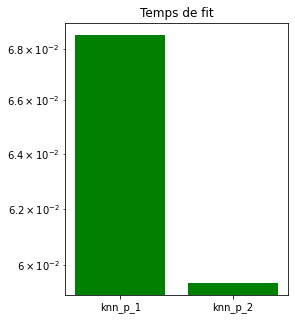

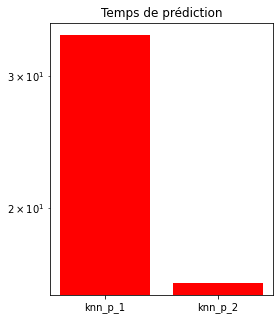

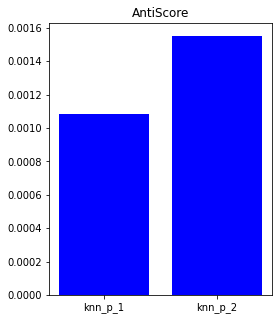

--->  knn_metric_minkowski
temps de fit :  0.08130502700805664
temps de prédiction :  16.04015278816223
antiscore :  0.0015514299012255872
--->  knn_metric_euclidean
temps de fit :  0.05923128128051758
temps de prédiction :  16.130671501159668
antiscore :  0.0015514299012255872
--->  knn_metric_manhattan
temps de fit :  0.059909820556640625
temps de prédiction :  34.10277223587036
antiscore :  0.0010860009308579777
--->  knn_metric_chebyshev
temps de fit :  0.05957794189453125
temps de prédiction :  27.023738145828247
antiscore :  0.0018617158814707713
--->  knn_metric_minkowski
temps de fit :  0.05888652801513672
temps de prédiction :  15.982374429702759
antiscore :  0.0015514299012255872


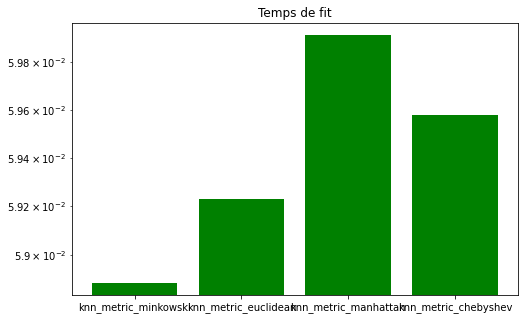

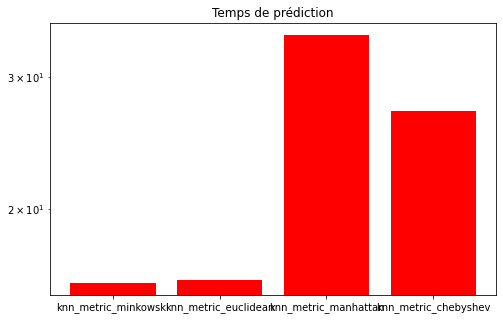

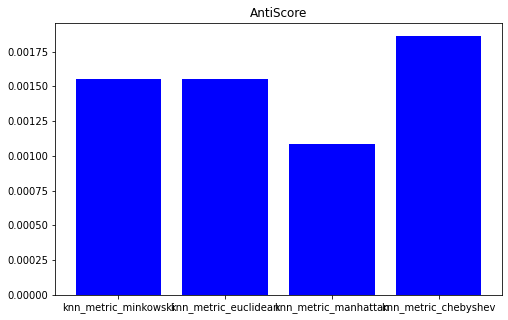

In [71]:
clean_tabs()
for n_neighbors in [1,2,3,4,5]:
    test_model("knn_n_neighbors_"+str(n_neighbors),KNeighborsClassifier,n_neighbors=n_neighbors)
compare(time_fit, time_pred, models)
clean_tabs()
for weights in ['uniform', 'distance']:
    test_model("knn_weights_"+str(weights),KNeighborsClassifier,weights=weights)
compare(time_fit, time_pred, models)
clean_tabs()
for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
    test_model("knn_algorithm_"+str(algorithm),KNeighborsClassifier,algorithm=algorithm)
compare(time_fit, time_pred, models)
clean_tabs()
for leaf_size in [10,20,30,40,50]:
    test_model("knn_leaf_size_"+str(leaf_size),KNeighborsClassifier,leaf_size=leaf_size)
compare(time_fit, time_pred, models)
clean_tabs()
for p in [1,2]:
    test_model("knn_p_"+str(p),KNeighborsClassifier,p=p)
compare(time_fit, time_pred, models)
clean_tabs()
for metric in ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'minkowski']: # d'autre metric existe 
    test_model("knn_metric_"+str(metric),KNeighborsClassifier,metric=metric)
compare(time_fit, time_pred, models)
clean_tabs()

## 4-classification

--->  knn_n_neighbors_4_class_1
temps de fit :  0.051032066345214844
temps de prédiction :  8.199079036712646
antiscore :  0.18927444794952686
--->  knn_n_neighbors_4_class_2
temps de fit :  0.05370950698852539
temps de prédiction :  9.84455132484436
antiscore :  0.2025650307700264
--->  knn_n_neighbors_4_class_3
temps de fit :  0.05357074737548828
temps de prédiction :  11.458728551864624
antiscore :  0.19201530744169204
--->  knn_n_neighbors_4_class_4
temps de fit :  0.05295705795288086
temps de prédiction :  15.788617134094238
antiscore :  0.19641102549516476
--->  knn_n_neighbors_4_class_5
temps de fit :  0.053449153900146484
temps de prédiction :  15.80918836593628
antiscore :  0.194549309613694


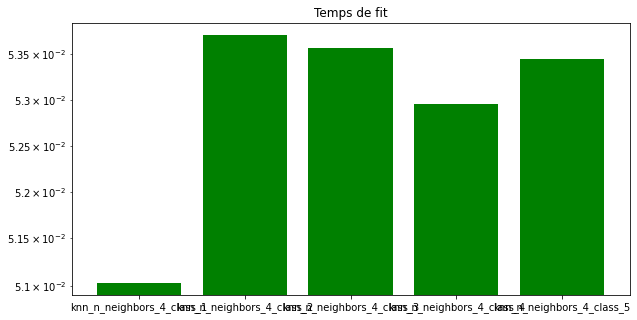

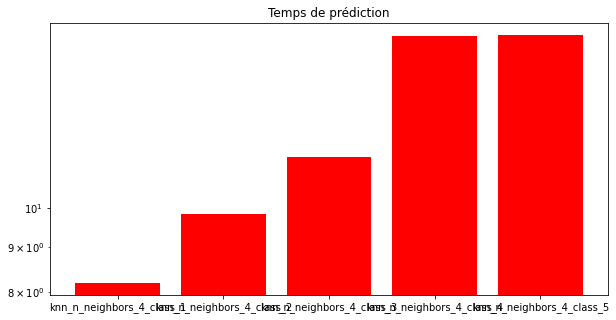

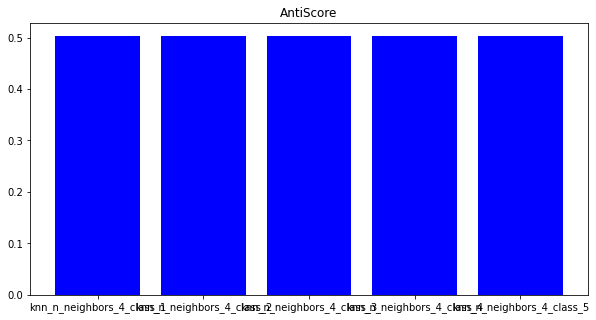

--->  knn_weights_4_class_uniform
temps de fit :  0.06664419174194336
temps de prédiction :  15.92589545249939
antiscore :  0.194549309613694
--->  knn_weights_4_class_distance
temps de fit :  0.05318093299865723
temps de prédiction :  15.46635389328003
antiscore :  0.18601644515695304


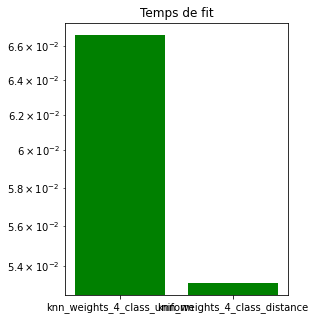

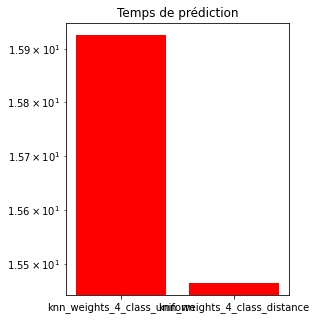

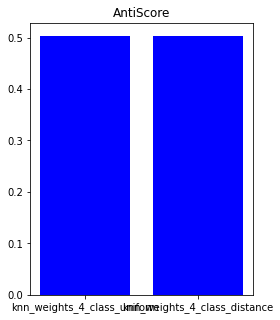

--->  knn_algorithm_4_class_auto
temps de fit :  0.053145647048950195
temps de prédiction :  15.83656930923462
antiscore :  0.194549309613694
--->  knn_algorithm_4_class_ball_tree
temps de fit :  0.1553819179534912
temps de prédiction :  4.762786865234375
antiscore :  0.19434245229353053
--->  knn_algorithm_4_class_kd_tree
temps de fit :  0.21628499031066895
temps de prédiction :  1.4118969440460205
antiscore :  0.1942390236334488
--->  knn_algorithm_4_class_brute
temps de fit :  0.05179476737976074
temps de prédiction :  15.780632495880127
antiscore :  0.194549309613694


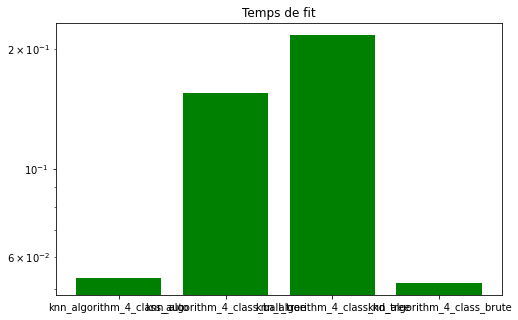

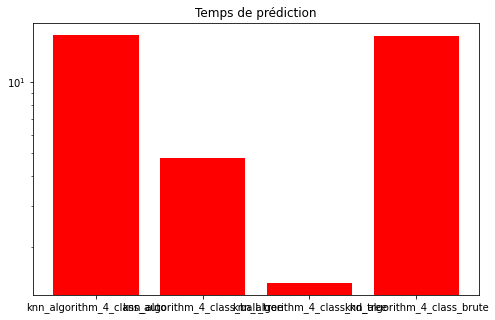

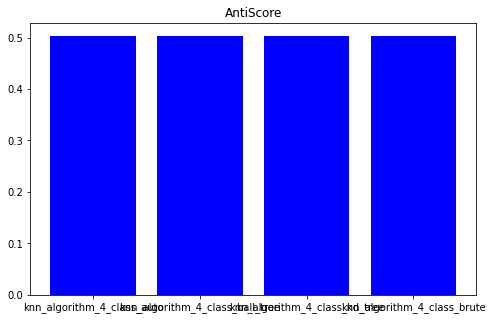

--->  knn_leaf_size_4_class_10
temps de fit :  0.05293869972229004
temps de prédiction :  15.691573858261108
antiscore :  0.194549309613694
--->  knn_leaf_size_4_class_20
temps de fit :  0.054521799087524414
temps de prédiction :  15.724753618240356
antiscore :  0.194549309613694
--->  knn_leaf_size_4_class_30
temps de fit :  0.05199551582336426
temps de prédiction :  15.817269086837769
antiscore :  0.194549309613694
--->  knn_leaf_size_4_class_40
temps de fit :  0.05208420753479004
temps de prédiction :  15.781891584396362
antiscore :  0.194549309613694
--->  knn_leaf_size_4_class_50
temps de fit :  0.052495479583740234
temps de prédiction :  15.811796426773071
antiscore :  0.194549309613694


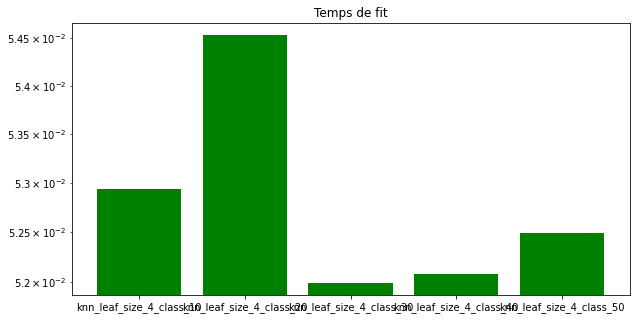

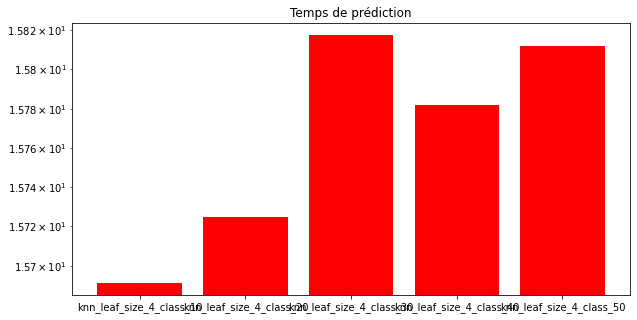

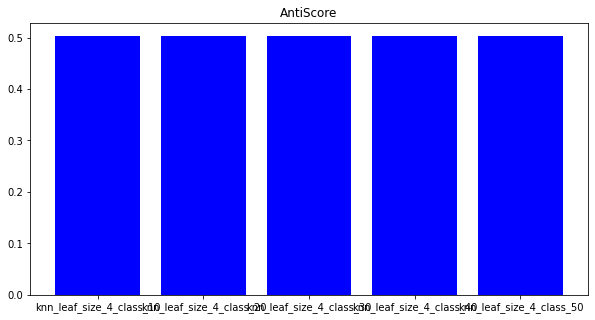

--->  knn_p_4_class_1
temps de fit :  0.05459737777709961
temps de prédiction :  36.39189648628235
antiscore :  0.18006929720225473
--->  knn_p_4_class_2
temps de fit :  0.053244829177856445
temps de prédiction :  15.978806972503662
antiscore :  0.194549309613694


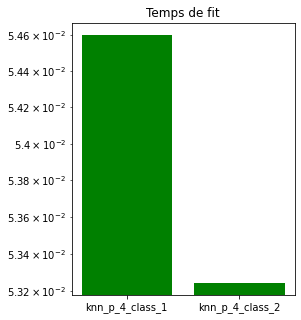

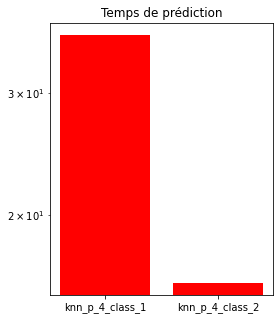

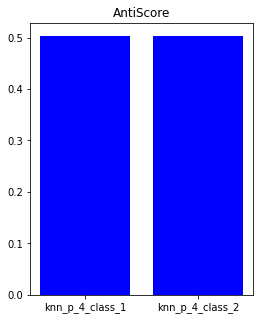

--->  knn_metric_4_class_minkowski
temps de fit :  0.053977251052856445
temps de prédiction :  15.90560007095337
antiscore :  0.194549309613694
--->  knn_metric_4_class_euclidean
temps de fit :  0.052878618240356445
temps de prédiction :  16.073354959487915
antiscore :  0.194549309613694
--->  knn_metric_4_class_manhattan
temps de fit :  0.0532228946685791
temps de prédiction :  35.18305253982544
antiscore :  0.18006929720225473
--->  knn_metric_4_class_chebyshev
temps de fit :  0.05402183532714844
temps de prédiction :  27.230611324310303
antiscore :  0.2151833272999948
--->  knn_metric_4_class_minkowski
temps de fit :  0.05347323417663574
temps de prédiction :  15.872793674468994
antiscore :  0.194549309613694


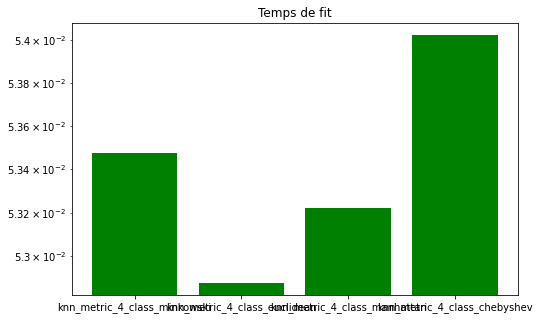

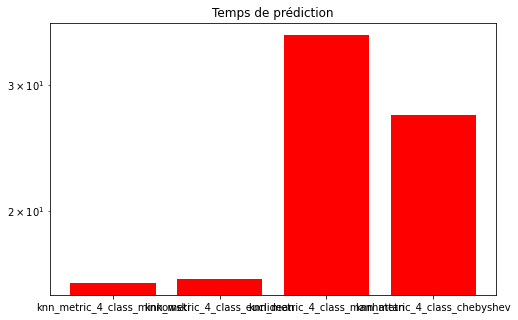

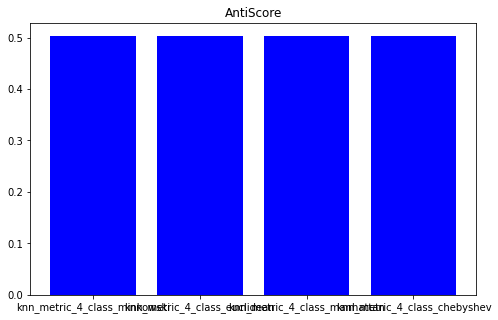

In [72]:
clean_tabs()
for n_neighbors in [1,2,3,4,5]:
    test_model_4_class("knn_n_neighbors_4_class_"+str(n_neighbors),KNeighborsClassifier,n_neighbors=n_neighbors)
compare(time_fit, time_pred, models)
clean_tabs()
for weights in ['uniform', 'distance']:
    test_model_4_class("knn_weights_4_class_"+str(weights),KNeighborsClassifier,weights=weights)
compare(time_fit, time_pred, models)
clean_tabs()
for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
    test_model_4_class("knn_algorithm_4_class_"+str(algorithm),KNeighborsClassifier,algorithm=algorithm)
compare(time_fit, time_pred, models)
clean_tabs()
for leaf_size in [10,20,30,40,50]:
    test_model_4_class("knn_leaf_size_4_class_"+str(leaf_size),KNeighborsClassifier,leaf_size=leaf_size)
compare(time_fit, time_pred, models)
clean_tabs()
for p in [1,2]:
    test_model_4_class("knn_p_4_class_"+str(p),KNeighborsClassifier,p=p)
compare(time_fit, time_pred, models)
clean_tabs()
for metric in ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'minkowski']: # d'autre metric existe 
    test_model_4_class("knn_metric_4_class_"+str(metric),KNeighborsClassifier,metric=metric)
compare(time_fit, time_pred, models)
clean_tabs()

## SVM

## Binary-classification

In [73]:
"""
(models,time_fit,time_pred,antiscore) = load("../input/protection-models/data_export_svm_v7.pkl.lzma")
for name in models.keys():
    models_all[name]=models[name]
    time_fit_all[name]=time_fit[name]
    time_pred_all[name]=time_pred[name]
"""    
# plusieurs heures !
"""
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    test_model("svm_kernel_"+str(kernel),svm.SVC,kernel=kernel, C=1, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for C in [0.1,0.5,1,5,10]:
    test_model("svm_C_"+str(C),svm.SVC,kernel='linear', C=C, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for degree in [1,2,3,4,5]:
    test_model("svm_degree_"+str(degree),svm.SVC,kernel='poly', C=1, degree=degree, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for gamma in ['scale', 'auto']:
    test_model("svm_gamma_"+str(gamma),svm.SVC,kernel='rbf', C=1, gamma=gamma, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for coef0 in [0.1,0.5,1,5,10]:
    test_model("svm_coef0_"+str(coef0),svm.SVC,kernel='sigmoid', C=1, coef0=coef0, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for shrinking in [True, False]:
    test_model("svm_shrinking_"+str(shrinking),svm.SVC,kernel='linear', C=1, shrinking=shrinking, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for tol in [0.0001,0.001,0.01,0.1,1]:
    test_model("svm_tol_"+str(tol),svm.SVC,kernel='linear', C=1, tol=tol, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for cache_size in [100,200,300,400,500]:
    test_model("svm_cache_size_"+str(cache_size),svm.SVC,kernel='linear', C=1, cache_size=cache_size, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for class_weight in [None, 'balanced']:
    test_model("svm_class_weight_"+str(class_weight),svm
                .SVC,kernel='linear', C=1, class_weight=class_weight, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for max_iter in [-1,100,200,300,400,500]:
    test_model("svm_max_iter_"+str(max_iter),svm.SVC,kernel='linear', C=1, max_iter=max_iter, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for decision_function_shape in ['ovo', 'ovr']:
    test_model("svm_decision_function_shape_"+str(decision_function_shape),svm.SVC,kernel='linear', C=1, decision_function_shape=decision_function_shape, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for break_ties in [True, False]:
    test_model("svm_break_ties_"+str(break_ties),svm.SVC,kernel='linear', C=1, break_ties=break_ties, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
"""

'\nfor kernel in [\'linear\', \'poly\', \'rbf\', \'sigmoid\']:\n    test_model("svm_kernel_"+str(kernel),svm.SVC,kernel=kernel, C=1, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor C in [0.1,0.5,1,5,10]:\n    test_model("svm_C_"+str(C),svm.SVC,kernel=\'linear\', C=C, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor degree in [1,2,3,4,5]:\n    test_model("svm_degree_"+str(degree),svm.SVC,kernel=\'poly\', C=1, degree=degree, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor gamma in [\'scale\', \'auto\']:\n    test_model("svm_gamma_"+str(gamma),svm.SVC,kernel=\'rbf\', C=1, gamma=gamma, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor coef0 in [0.1,0.5,1,5,10]:\n    test_model("svm_coef0_"+str(coef0),svm.SVC,kernel=\'sigmoid\', C=1, coef0=coef0, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_

In [74]:
# version multi-threads (pas utile sur kaggle car 1 seul coeur)
"""
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    list.append(delayed(test_model)("svm_kernel_"+str(kernel),svm.SVC,kernel=kernel, C=1, probability=True,random_state=42))
for C in [0.1,0.5,1,5,10]:
    list.append(delayed(test_model)("svm_C_"+str(C),svm.SVC,kernel='linear', C=C, probability=True,random_state=42))
for degree in [1,2,3,4,5]:
    list.append(delayed(test_model)("svm_degree_"+str(degree),svm.SVC,kernel='poly', C=1, degree=degree, probability=True,random_state=42))
for gamma in ['scale', 'auto']:
    list.append(delayed(test_model)("svm_gamma_"+str(gamma),svm.SVC,kernel='rbf', C=1, gamma=gamma, probability=True,random_state=42))
for coef0 in [0.1,0.5,1,5,10]:
    list.append(delayed(test_model)("svm_coef0_"+str(coef0),svm.SVC,kernel='sigmoid', C=1, coef0=coef0, probability=True,random_state=42))
for shrinking in [True, False]:
    list.append(delayed(test_model)("svm_shrinking_"+str(shrinking),svm.SVC,kernel='linear', C=1, shrinking=shrinking, probability=True,random_state=42))
for tol in [0.0001,0.001,0.01,0.1,1]:
    list.append(delayed(test_model)("svm_tol_"+str(tol),svm.SVC,kernel='linear', C=1, tol=tol, probability=True,random_state=42))
for class_weight in [None, 'balanced']:
    list.append(delayed(test_model)("svm_class_weight_"+str(class_weight),svm.SVC,kernel='linear', C=1, class_weight=class_weight, probability=True,random_state=42))
for max_iter in [-1,100,200,300,400,500]:
    list.append(delayed(test_model)("svm_max_iter_"+str(max_iter),svm.SVC,kernel='linear', C=1, max_iter=max_iter, probability=True,random_state=42))
for decision_function_shape in ['ovo', 'ovr']:
    list.append(delayed(test_model)("svm_decision_function_shape_"+str(decision_function_shape),svm.SVC,kernel='linear', C=1, decision_function_shape=decision_function_shape, probability=True,random_state=42))
for break_ties in [True, False]:
    list.append(delayed(test_model)("svm_break_ties_"+str(break_ties),svm.SVC,kernel='linear', C=1, break_ties=break_ties, probability=True,random_state=42))
Parallel(n_jobs=num_cores)(list)
compare(time_fit, time_pred, models)
"""

'\nfrom joblib import Parallel, delayed\nimport multiprocessing\nnum_cores = multiprocessing.cpu_count()\nlist = []\nfor kernel in [\'linear\', \'poly\', \'rbf\', \'sigmoid\']:\n    list.append(delayed(test_model)("svm_kernel_"+str(kernel),svm.SVC,kernel=kernel, C=1, probability=True,random_state=42))\nfor C in [0.1,0.5,1,5,10]:\n    list.append(delayed(test_model)("svm_C_"+str(C),svm.SVC,kernel=\'linear\', C=C, probability=True,random_state=42))\nfor degree in [1,2,3,4,5]:\n    list.append(delayed(test_model)("svm_degree_"+str(degree),svm.SVC,kernel=\'poly\', C=1, degree=degree, probability=True,random_state=42))\nfor gamma in [\'scale\', \'auto\']:\n    list.append(delayed(test_model)("svm_gamma_"+str(gamma),svm.SVC,kernel=\'rbf\', C=1, gamma=gamma, probability=True,random_state=42))\nfor coef0 in [0.1,0.5,1,5,10]:\n    list.append(delayed(test_model)("svm_coef0_"+str(coef0),svm.SVC,kernel=\'sigmoid\', C=1, coef0=coef0, probability=True,random_state=42))\nfor shrinking in [True, Fals

## 4-classification

In [75]:
"""
(models,time_fit,time_pred,antiscore) = load("../input/protection-models/data_export_svm_v7.pkl.lzma")
for name in models.keys():
    models_all[name]=models[name]
    time_fit_all[name]=time_fit[name]
    time_pred_all[name]=time_pred[name]
"""    
# plusieurs heures !
"""
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    test_model_4_class("svm_kernel_4_class_"+str(kernel),svm.SVC,kernel=kernel, C=1, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for C in [0.1,0.5,1,5,10]:
    test_model_4_class("svm_C_4_class_"+str(C),svm.SVC,kernel='linear', C=C, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for degree in [1,2,3,4,5]:
    test_model_4_class("svm_degree_4_class_"+str(degree),svm.SVC,kernel='poly', C=1, degree=degree, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for gamma in ['scale', 'auto']:
    test_model_4_class("svm_gamma_4_class_"+str(gamma),svm.SVC,kernel='rbf', C=1, gamma=gamma, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for coef0 in [0.1,0.5,1,5,10]:
    test_model_4_class("svm_coef0_4_class_"+str(coef0),svm.SVC,kernel='sigmoid', C=1, coef0=coef0, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for shrinking in [True, False]:
    test_model_4_class("svm_shrinking_4_class_"+str(shrinking),svm.SVC,kernel='linear', C=1, shrinking=shrinking, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for tol in [0.0001,0.001,0.01,0.1,1]:
    test_model_4_class("svm_tol_4_class_"+str(tol),svm.SVC,kernel='linear', C=1, tol=tol, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for cache_size in [100,200,300,400,500]:
    test_model_4_class("svm_cache_size_4_class_"+str(cache_size),svm.SVC,kernel='linear', C=1, cache_size=cache_size, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for class_weight in [None, 'balanced']:
    test_model_4_class("svm_class_weight_4_class_"+str(class_weight),svm
                .SVC,kernel='linear', C=1, class_weight=class_weight, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for max_iter in [-1,100,200,300,400,500]:
    test_model_4_class("svm_max_iter_4_class_"+str(max_iter),svm.SVC,kernel='linear', C=1, max_iter=max_iter, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for decision_function_shape in ['ovo', 'ovr']:
    test_model_4_class("svm_decision_function_shape_4_class_"+str(decision_function_shape),svm.SVC,kernel='linear', C=1, decision_function_shape=decision_function_shape, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
for break_ties in [True, False]:
    test_model_4_class("svm_break_ties_4_class_"+str(break_ties),svm.SVC,kernel='linear', C=1, break_ties=break_ties, probability=True,random_state=42)
compare(time_fit, time_pred, models)
clean_tabs()
"""

'\nfor kernel in [\'linear\', \'poly\', \'rbf\', \'sigmoid\']:\n    test_model_4_class("svm_kernel_4_class_"+str(kernel),svm.SVC,kernel=kernel, C=1, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor C in [0.1,0.5,1,5,10]:\n    test_model_4_class("svm_C_4_class_"+str(C),svm.SVC,kernel=\'linear\', C=C, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor degree in [1,2,3,4,5]:\n    test_model_4_class("svm_degree_4_class_"+str(degree),svm.SVC,kernel=\'poly\', C=1, degree=degree, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor gamma in [\'scale\', \'auto\']:\n    test_model_4_class("svm_gamma_4_class_"+str(gamma),svm.SVC,kernel=\'rbf\', C=1, gamma=gamma, probability=True,random_state=42)\ncompare(time_fit, time_pred, models)\nclean_tabs()\nfor coef0 in [0.1,0.5,1,5,10]:\n    test_model_4_class("svm_coef0_4_class_"+str(coef0),svm.SVC,kernel=\'sigmoid\', C=1, coef0=coef0,

In [76]:
# version multi-threads (pas utile sur kaggle car 1 seul coeur)

# Enregistremnent des modèles

In [77]:
# (models_all,time_fit_all,time_pred_all,antiscore_all) = load("../input/protection-models/data_export_v7.pkl.lzma") # charger tous les modèles précalculés

In [78]:
print("Nombre de modèles à comparer : ", len(models_all))

Nombre de modèles à comparer :  558


# Analyse du meilleur modèle

In [79]:
# Meilleur modèle par l'antiscore
best_model = min(antiscore_all, key=antiscore_all.get)
print("Meilleur modèle par le score : ", best_model)
print("Score : ", 1 - antiscore_all[best_model])
print("Temps de fit : ", time_fit_all[best_model])
print("Temps de prédiction : ", time_pred_all[best_model])
print("Paramètres : ", models_all[best_model].get_params())
# Meilleur modèle par time_fit
best_model = min(time_fit_all, key=time_fit_all.get)
print("Meilleur modèle par le temps de fit : ", best_model)
print("Score : ", 1 - antiscore_all[best_model])
print("Temps de fit : ", time_fit_all[best_model])
print("Temps de prédiction : ", time_pred_all[best_model])
print("Paramètres : ", models_all[best_model].get_params())
# Meilleur modèle par time_pred
best_model = min(time_pred_all, key=time_pred_all.get)
print("Meilleur modèle par le temps de prédiction : ", best_model)
print("Score : ", 1 - antiscore_all[best_model])
print("Temps de fit : ", time_fit_all[best_model])
print("Temps de prédiction : ", time_pred_all[best_model])
print("Paramètres : ", models_all[best_model].get_params())

Meilleur modèle par le score :  rf
Score :  1.0
Temps de fit :  5.018779039382935
Temps de prédiction :  0.15602922439575195
Paramètres :  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Meilleur modèle par le temps de fit :  knn_4class
Score :  0.807984692558308
Temps de fit :  0.050388336181640625
Temps de prédiction :  11.087274312973022
Paramètres :  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Meilleur modèle par le temps de prédiction :  clf_min_impurity_decrease_0.5
Score :  0.497336712002896
Temps de fit :  0.11419987678527832
Temps de p

In [80]:
# mettres les modèles avec les paramètres dans un df
import pandas as pd
df = pd.DataFrame(columns=['type_model',"time_fit","time_pred","antiscore"])
for model in models_all.keys():
    for param in models_all[model].get_params():
        df.join(pd.DataFrame(columns=[param]))
df = df.fillna(0)
for model in models_all.keys():
    df.loc[model,'type_model'] = model.split("_")[0]
    df.loc[model,'time_fit'] = time_fit_all[model]
    df.loc[model,'time_pred'] = time_pred_all[model]
    df.loc[model,'antiscore'] = antiscore_all[model]
    for param in models_all[model].get_params():
        df.loc[model,param] = models_all[model].get_params()[param]

In [81]:
df.head()

type_model   time_fit time_pred antiscore  ccp_alpha class_weight  \
clf               clf   0.304382  0.005017  0.000052        0.0          NaN   
clf_4class        clf   0.588387  0.007581   0.15685        0.0          NaN   
xbg               xbg   1.988161  0.018486  0.000052        NaN          NaN   
xbg_4class        xbg  13.695784  0.074046  0.129906        NaN          NaN   
rf                 rf   5.018779  0.156029       0.0        0.0          NaN   

           criterion  max_depth max_features  max_leaf_nodes  \
clf             gini        NaN          NaN             NaN   
clf_4class      gini        NaN          NaN             NaN   
xbg              NaN        6.0          NaN             NaN   
xbg_4class       NaN        6.0          NaN             NaN   
rf              gini        NaN         auto             NaN   

            min_impurity_decrease  min_samples_leaf  min_samples_split  \
clf                           0.0               1.0                2.0   
clf_4class                    0.0               1.0                2.0   
xbg                           NaN               NaN                NaN   
xbg_4class                    NaN               NaN                NaN   
rf                            0.0               1.0                2.0   

            min_weight_fraction_leaf  random_state splitter        objective  \
clf                              0.0          42.0     best              NaN   
clf_4class                       0.0          42.0     best              NaN   
xbg                              NaN          42.0      NaN  binary:logistic   
xbg_4class                       NaN          42.0      NaN   multi:softprob   
rf                               0.0           NaN      NaN              NaN   

           use_label_encoder  base_score booster  colsample_bylevel  \
clf                      NaN         NaN     NaN                NaN   
clf_4class               NaN         NaN     NaN                NaN   
xbg                     True         0.5  gbtree                1.0   
xbg_4class              True         0.5  gbtree                1.0   
rf                       NaN         NaN     NaN                NaN   

            colsample_bynode  colsample_bytree enable_categorical  gamma  \
clf                      NaN               NaN                NaN    NaN   
clf_4class               NaN               NaN                NaN    NaN   
xbg                      1.0               1.0              False    0.0   
xbg_4class               1.0               1.0              False    0.0   
rf                       NaN               NaN                NaN    NaN   

            gpu_id  importance_type interaction_constraints learning_rate  \
clf            NaN              NaN                     NaN           NaN   
clf_4class     NaN              NaN                     NaN           NaN   
xbg           -1.0              NaN                                   0.3   
xbg_4class    -1.0              NaN                                   0.3   
rf             NaN              NaN                     NaN           NaN   

            max_delta_step  min_child_weight  missing monotone_constraints  \
clf                    NaN               NaN      NaN                  NaN   
clf_4class             NaN               NaN      NaN                  NaN   
xbg                    0.0               1.0      NaN                   ()   
xbg_4class             0.0               1.0      NaN                   ()   
rf                     NaN               NaN      NaN                  NaN   

            n_estimators  n_jobs  num_parallel_tree predictor  reg_alpha  \
clf                  NaN     NaN                NaN       NaN        NaN   
clf_4class           NaN     NaN                NaN       NaN        NaN   
xbg                100.0     4.0                1.0      auto        0.0   
xbg_4class         100.0     4.0                1.0      auto        0.0   
rf                 100.

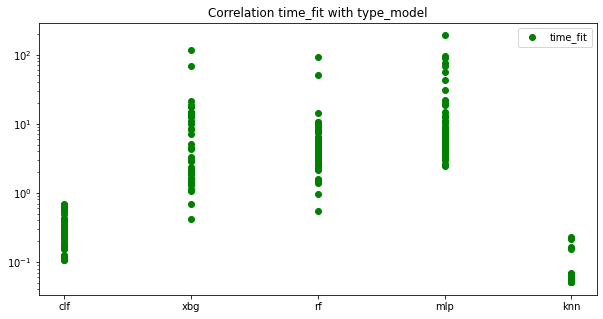

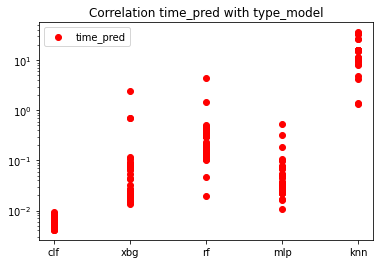

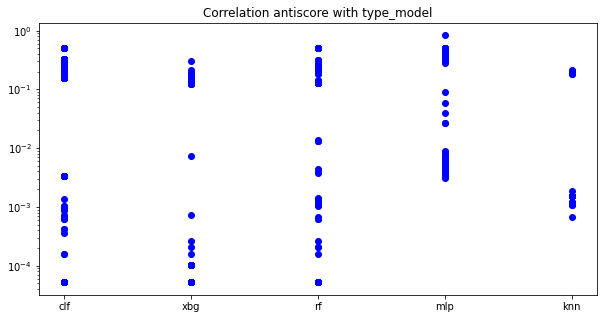

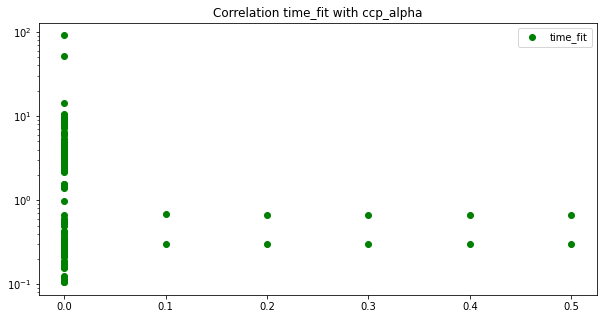

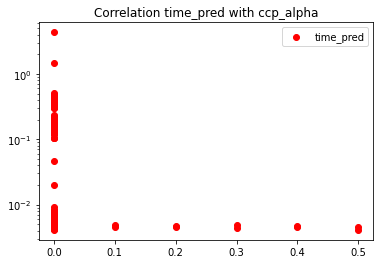

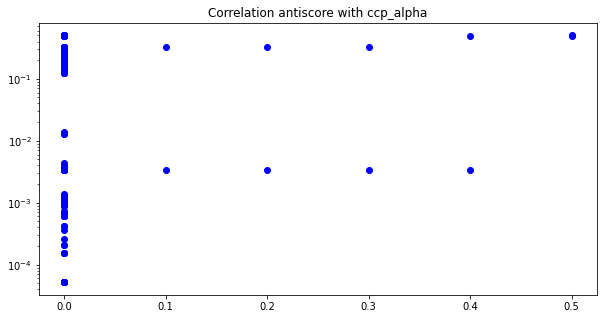

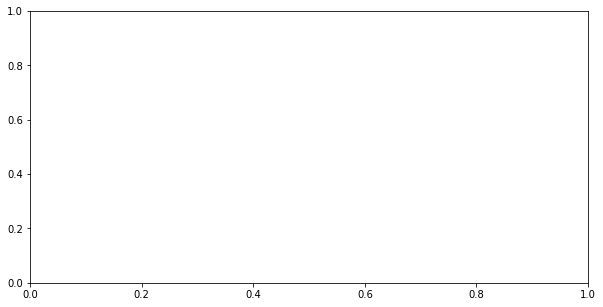

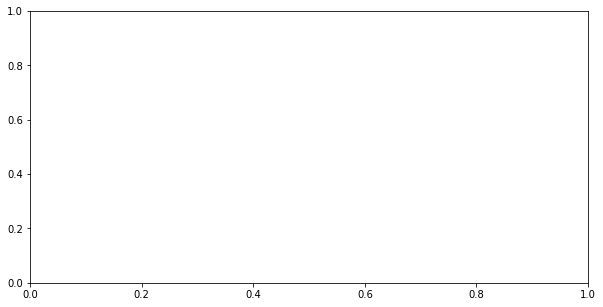

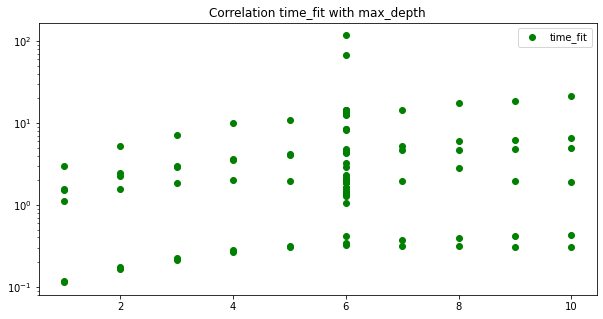

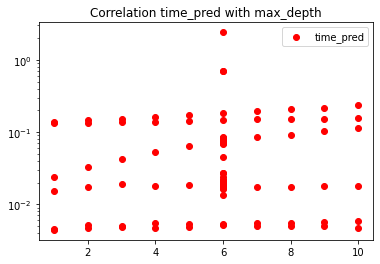

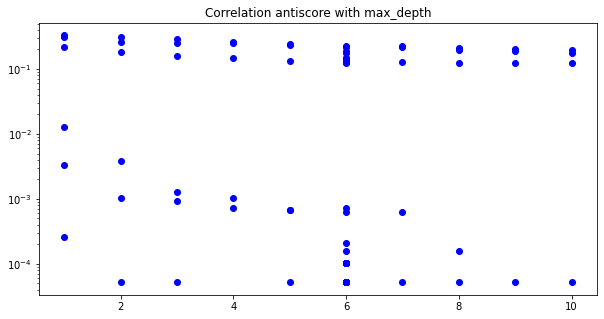

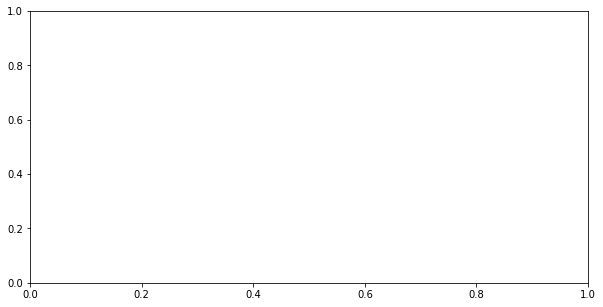

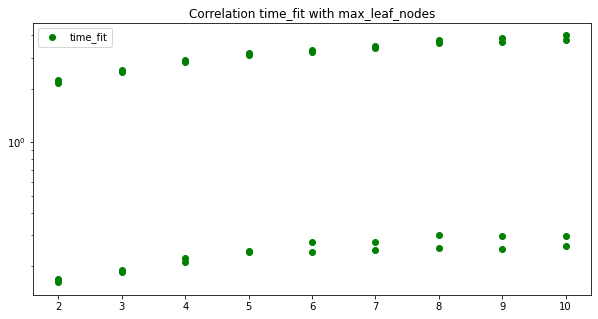

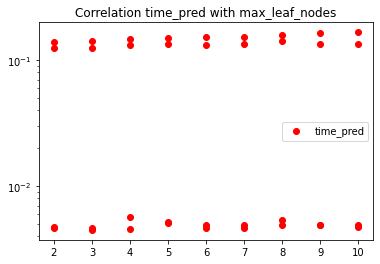

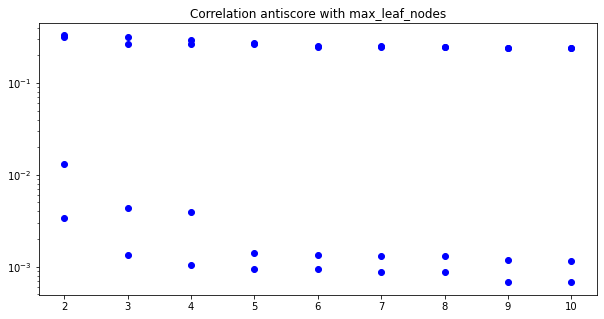

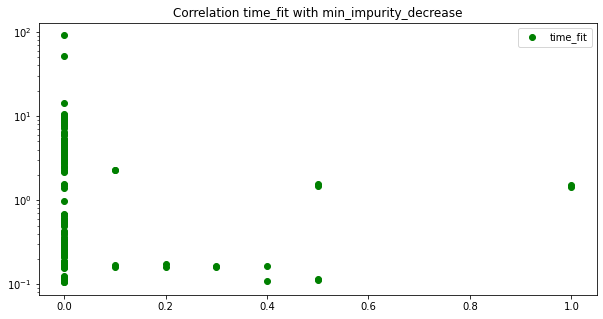

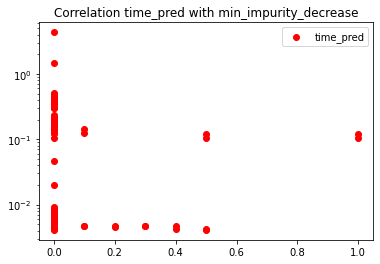

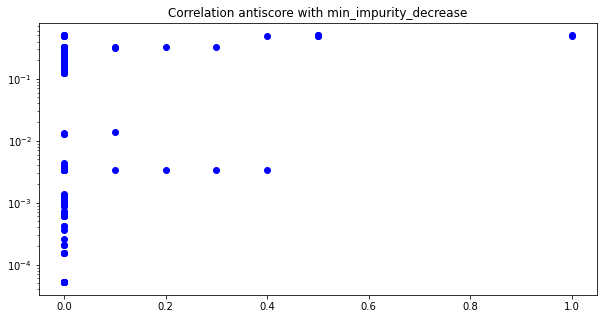

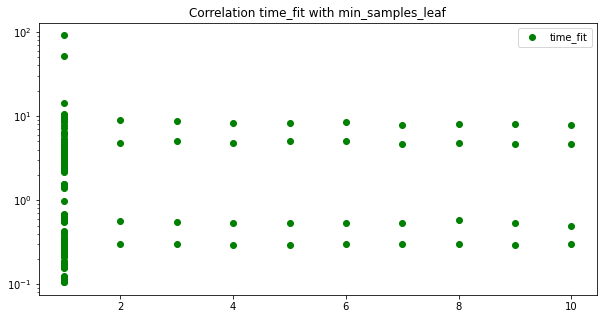

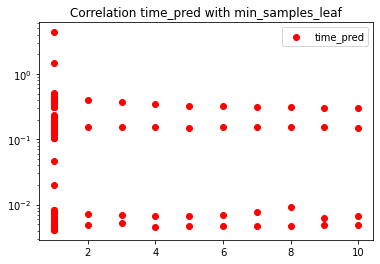

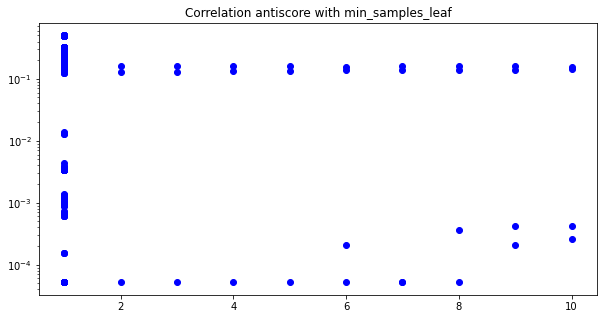

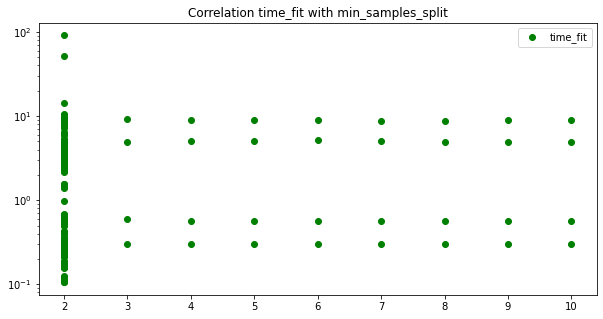

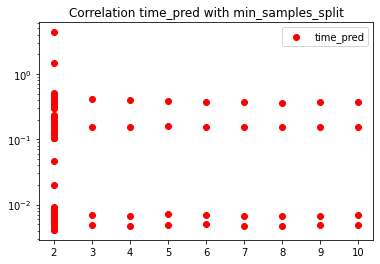

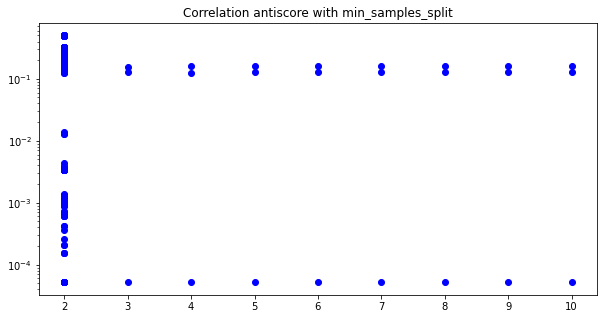

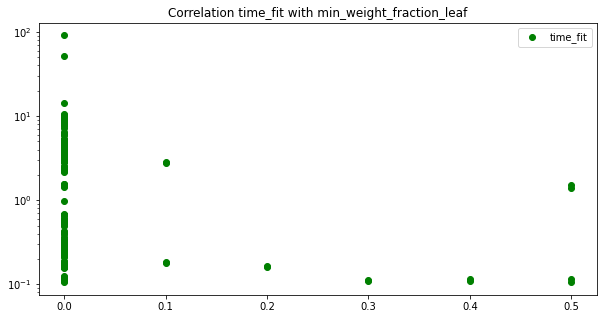

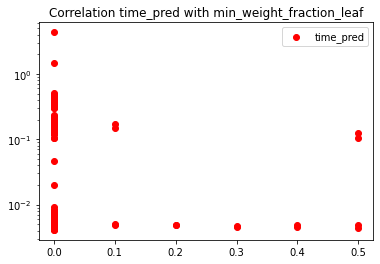

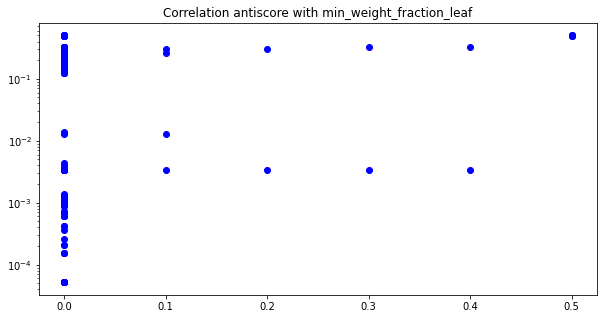

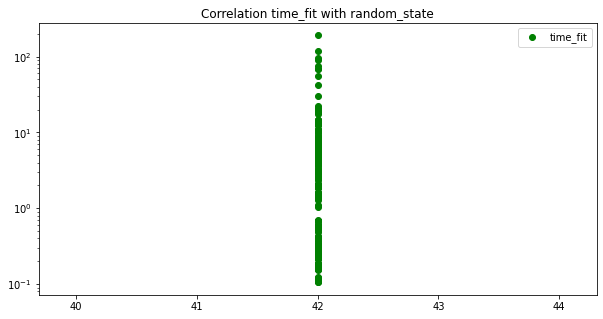

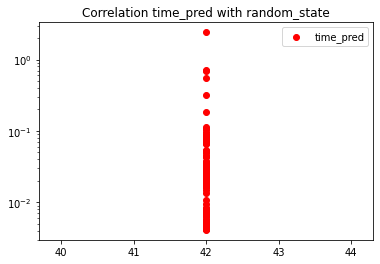

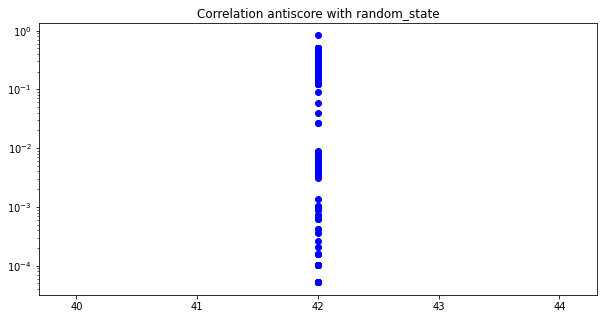

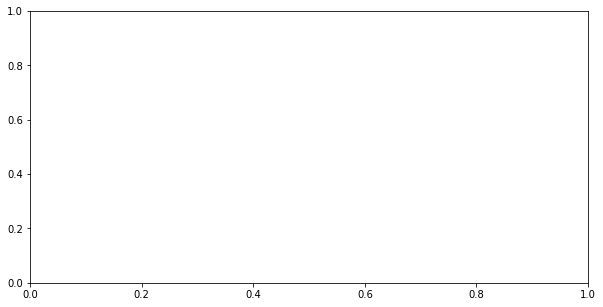

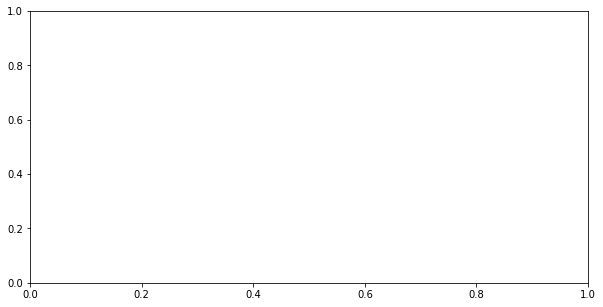

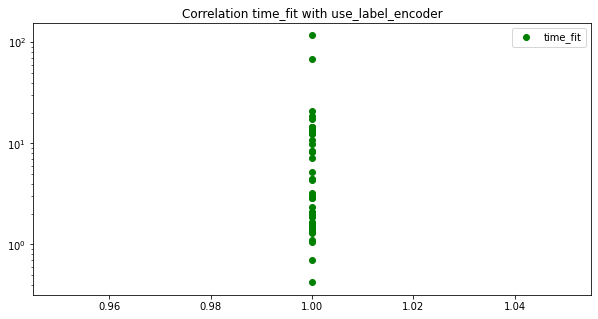

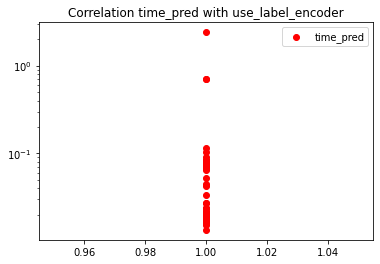

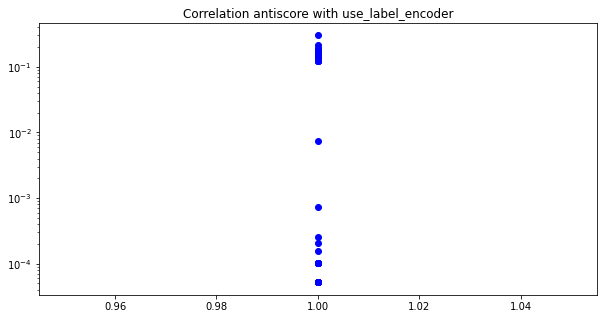

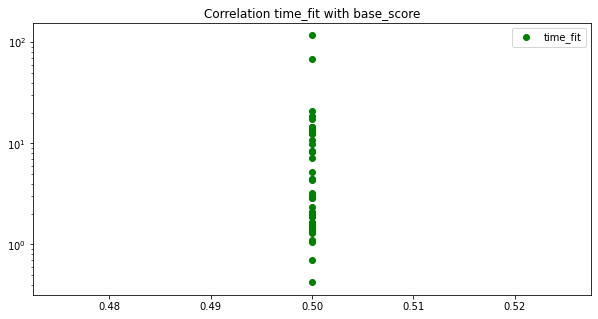

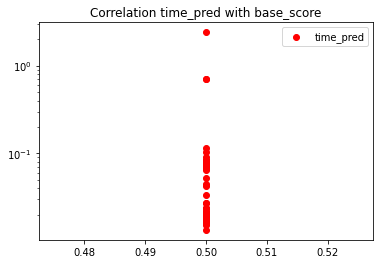

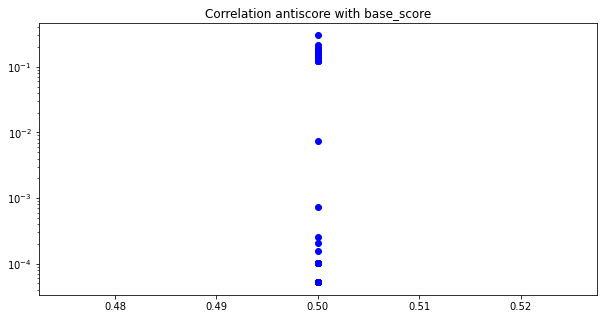

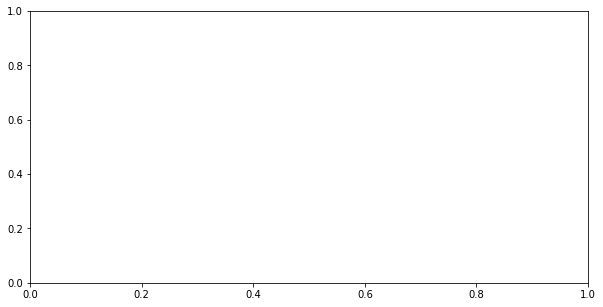

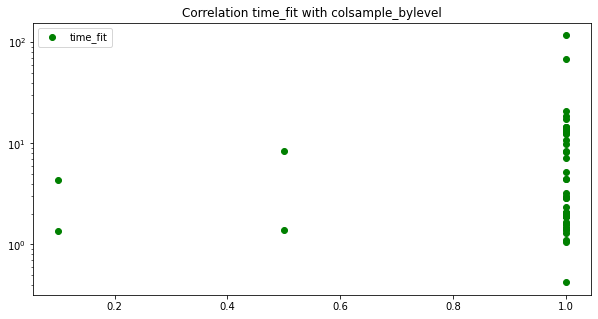

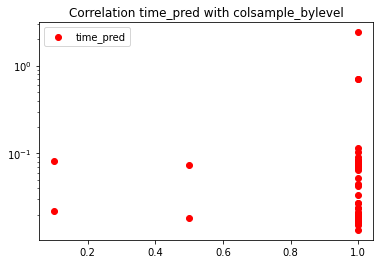

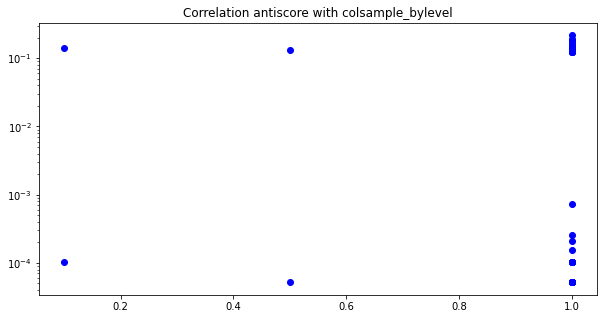

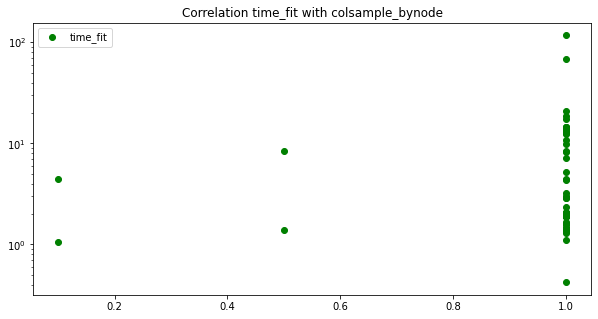

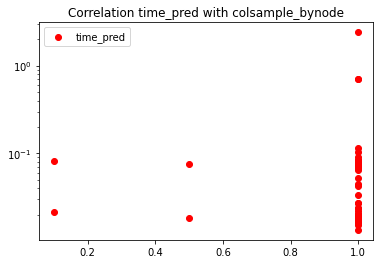

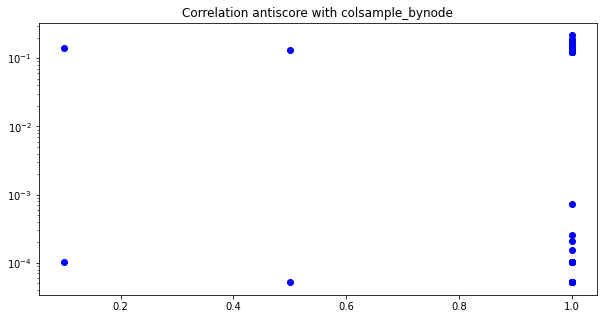

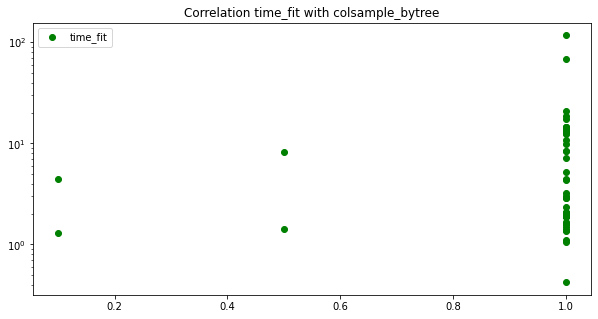

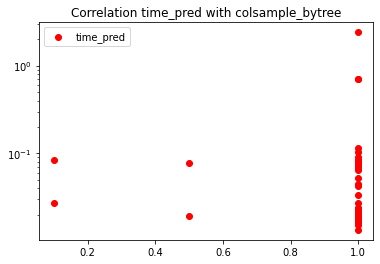

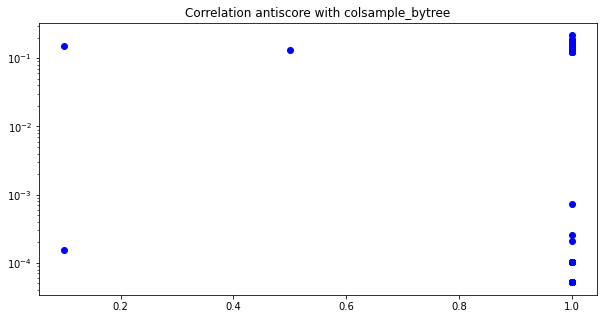

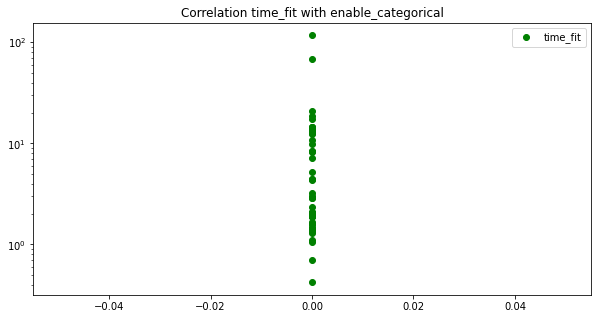

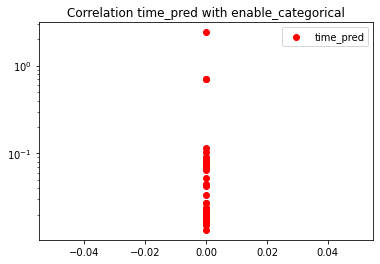

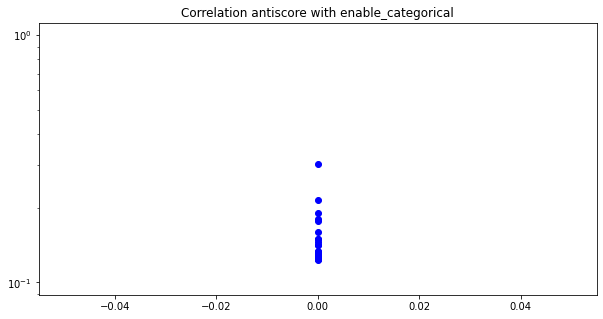

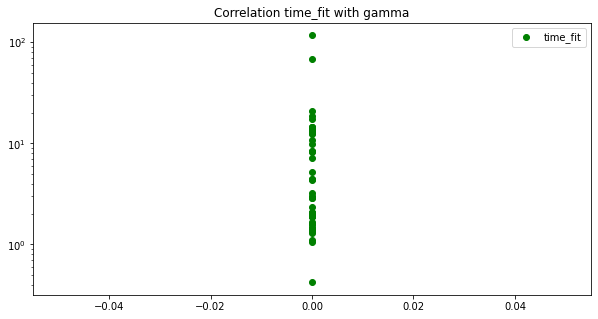

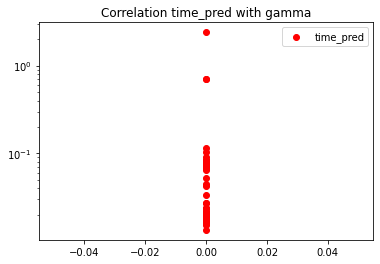

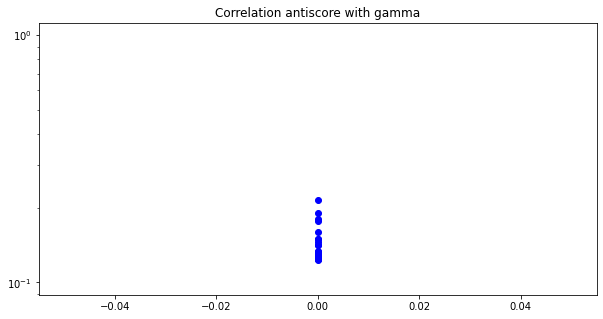

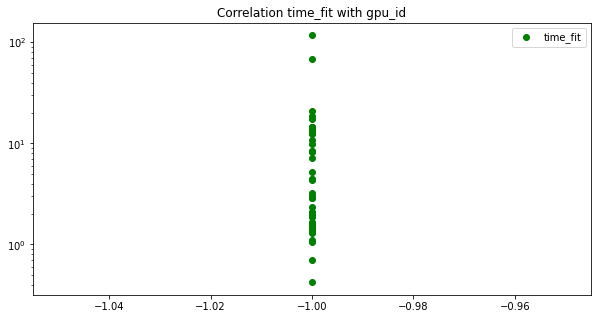

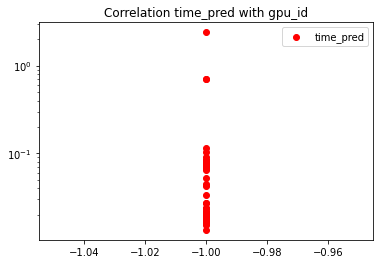

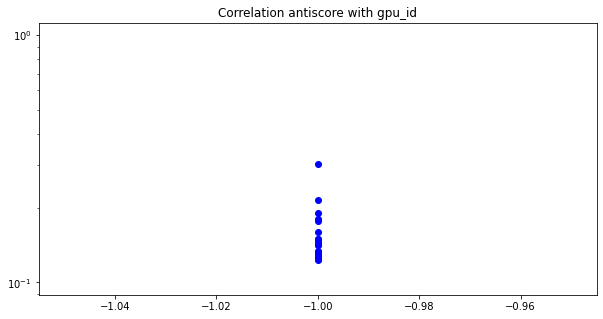

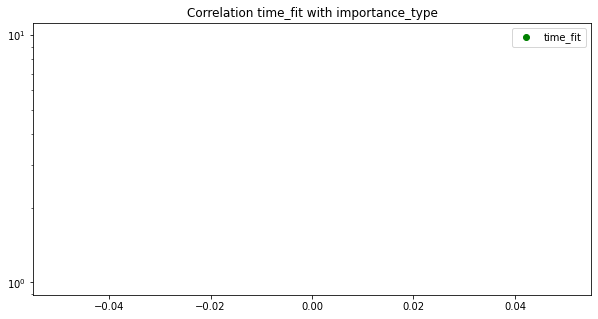

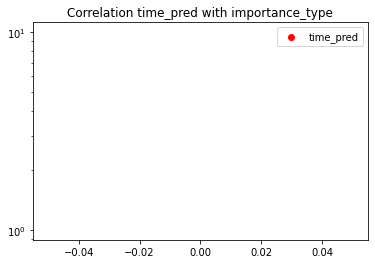

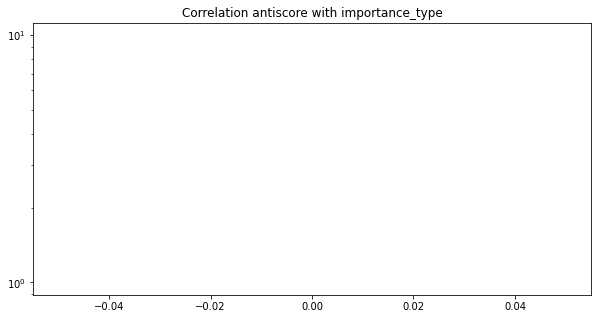

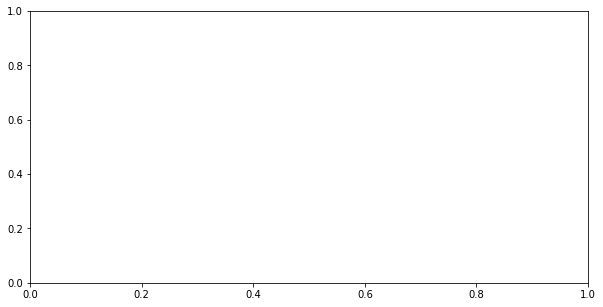

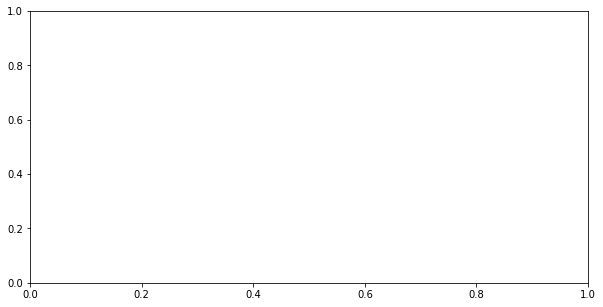

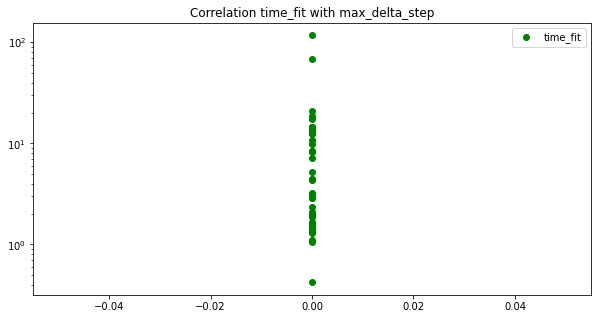

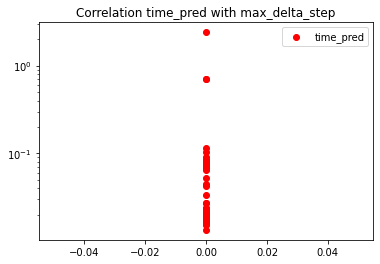

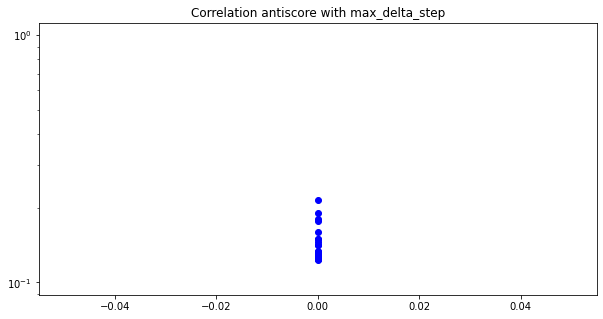

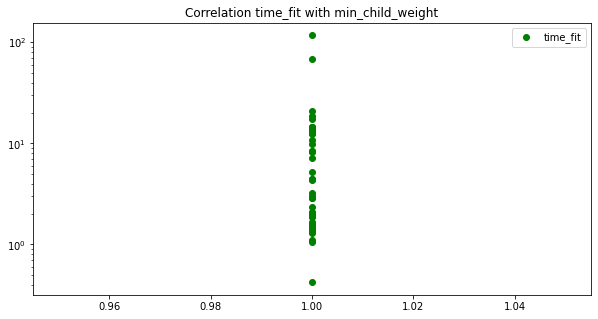

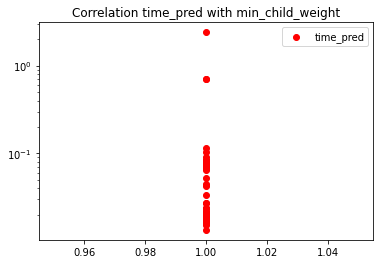

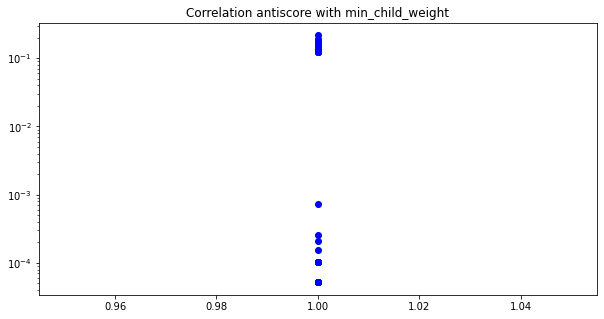

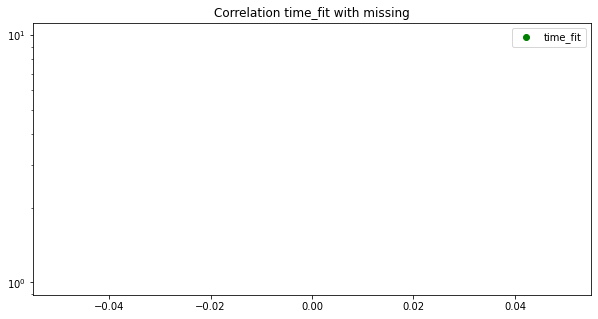

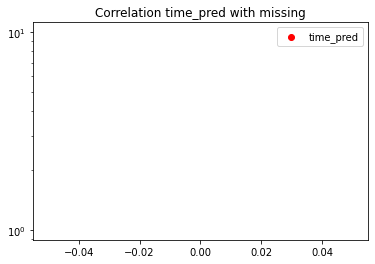

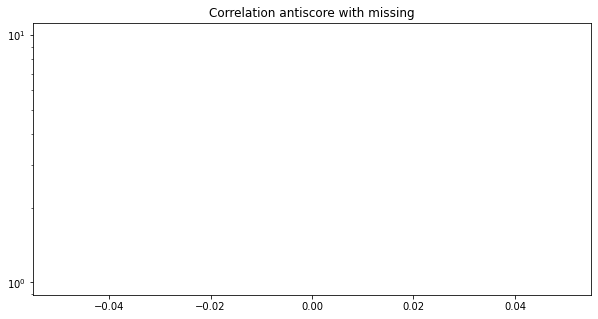

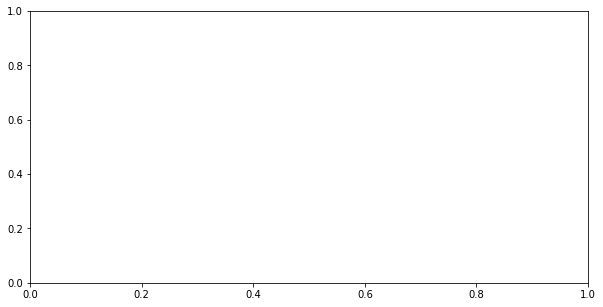

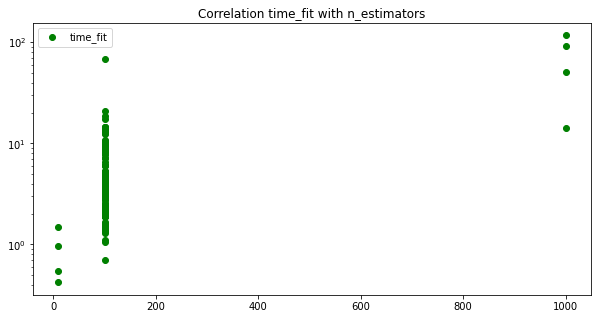

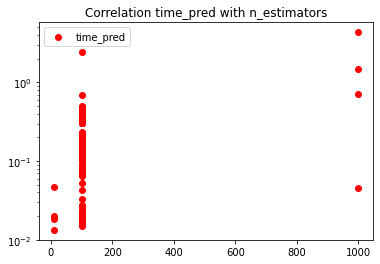

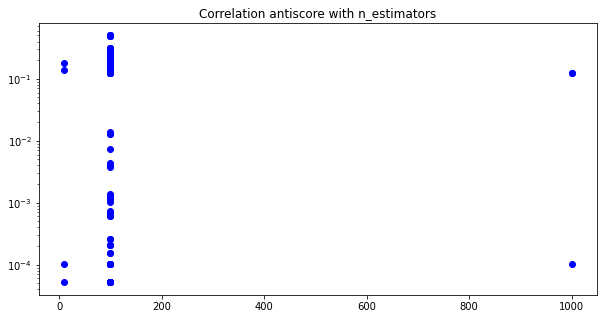

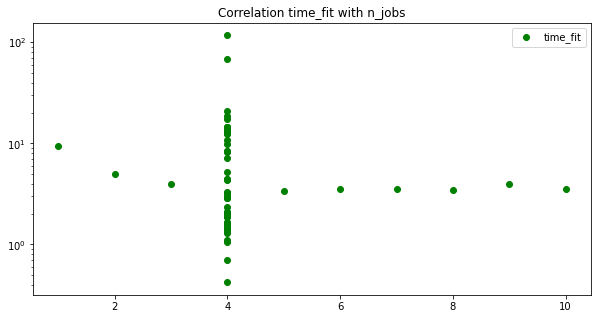

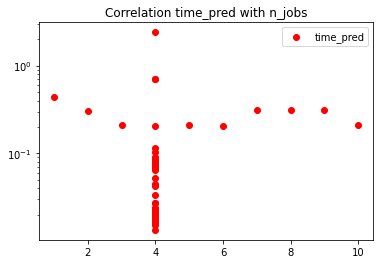

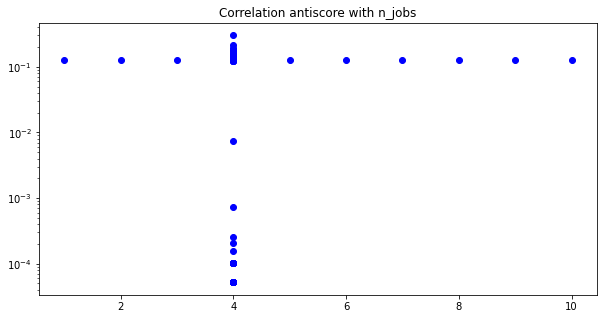

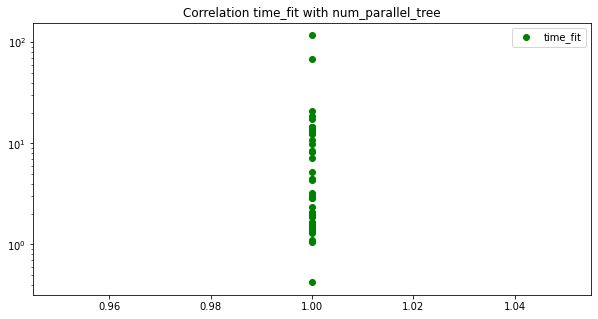

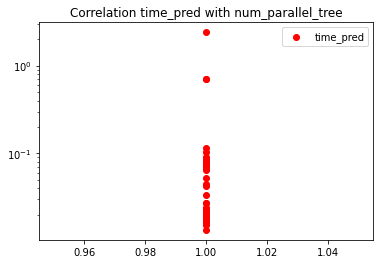

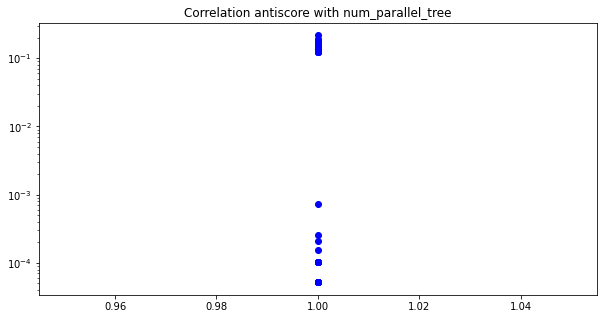

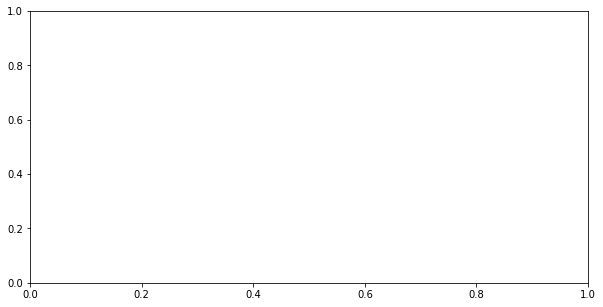

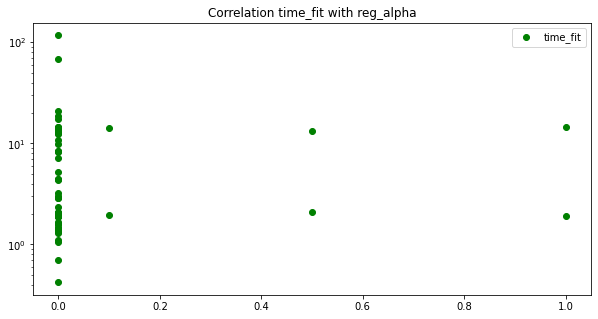

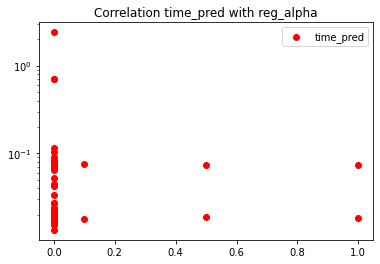

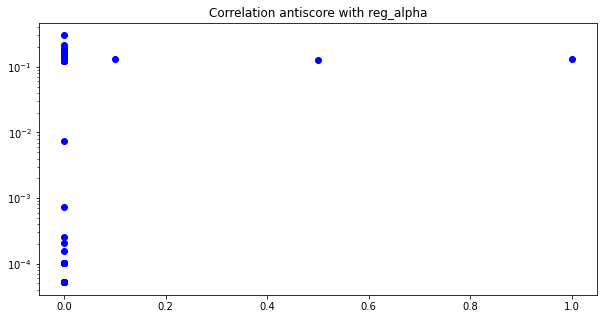

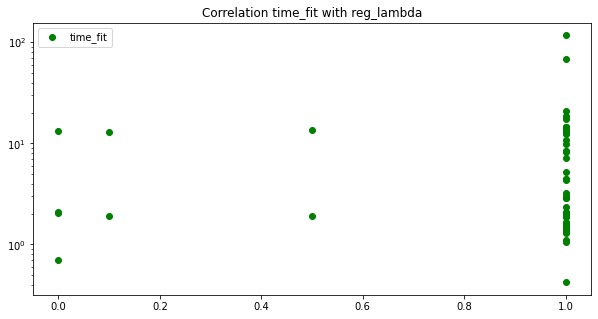

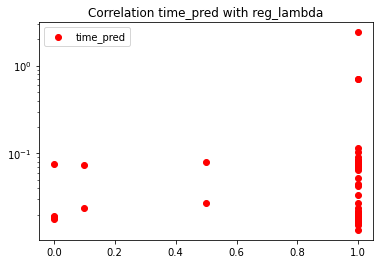

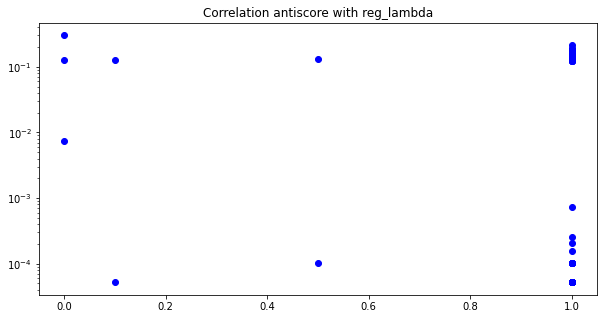

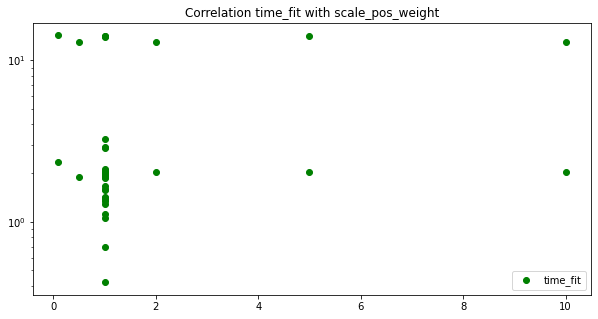

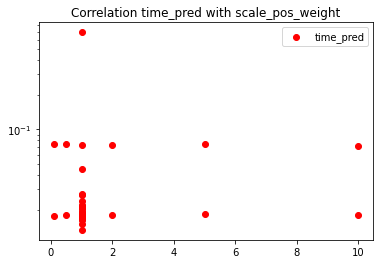

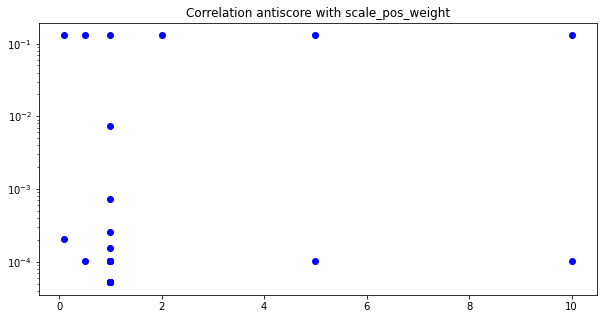

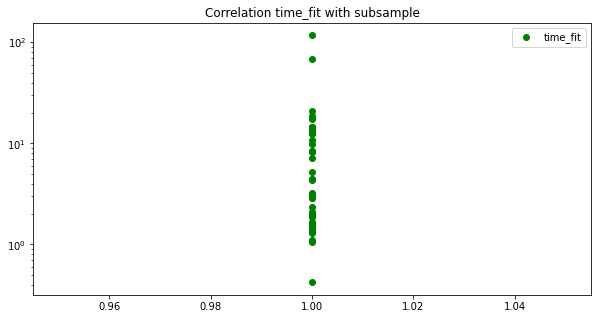

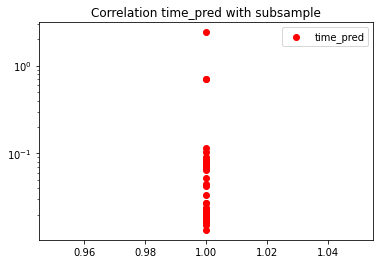

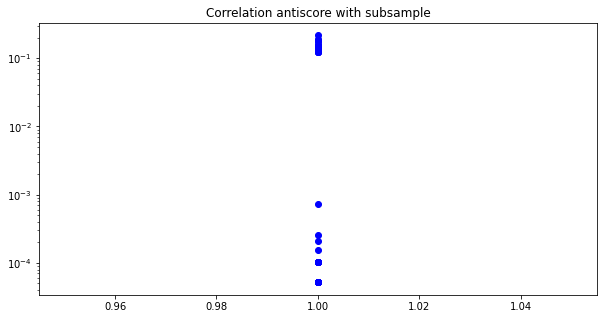

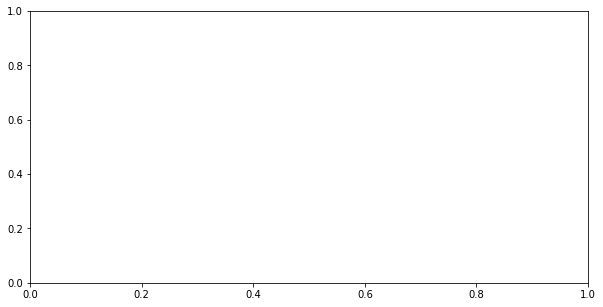

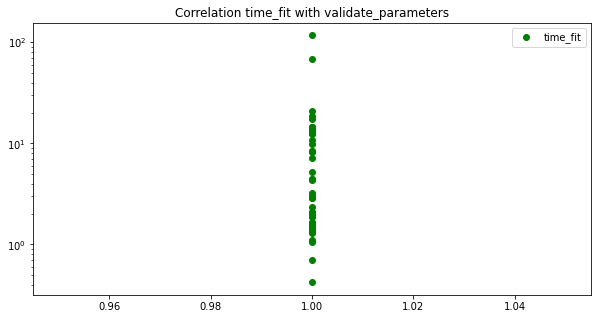

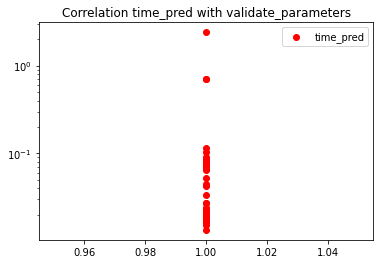

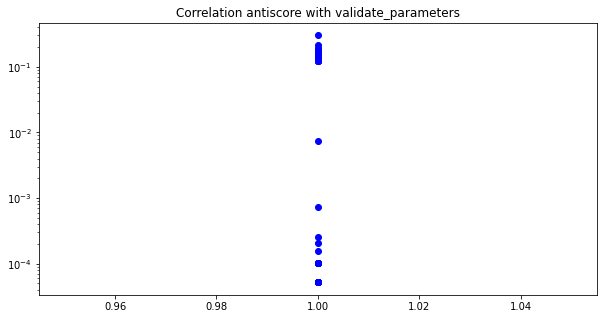

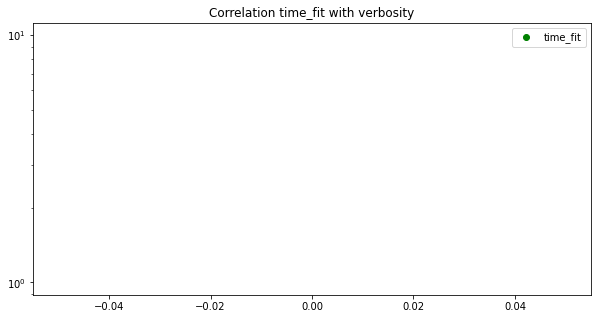

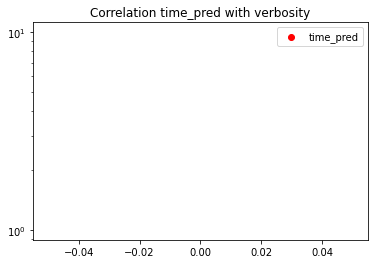

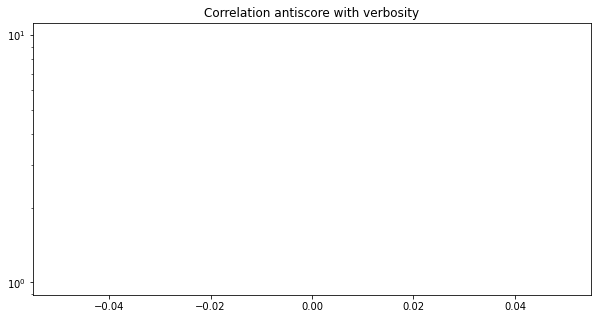

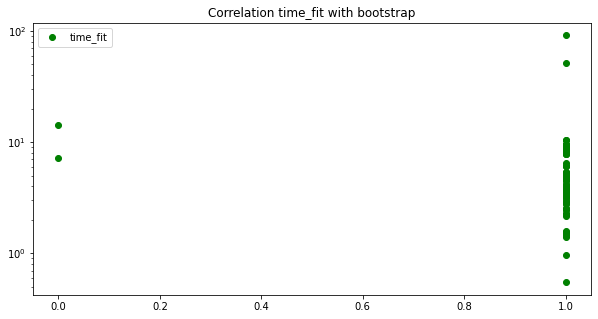

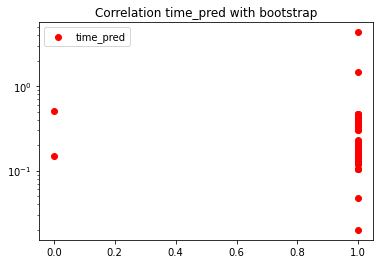

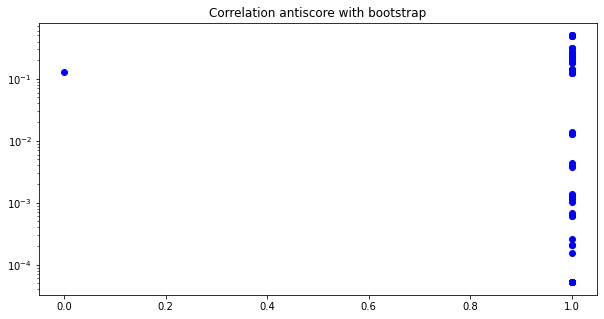

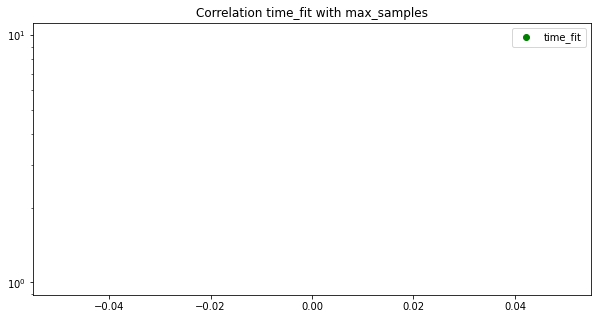

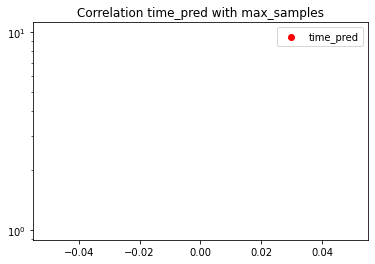

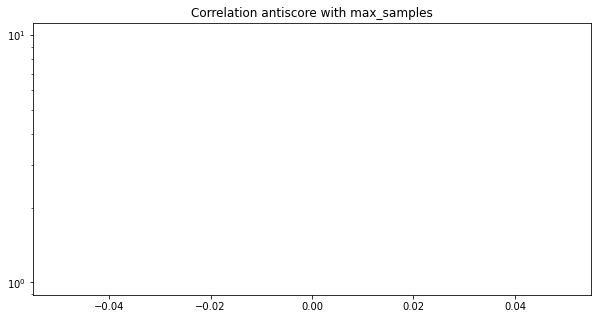

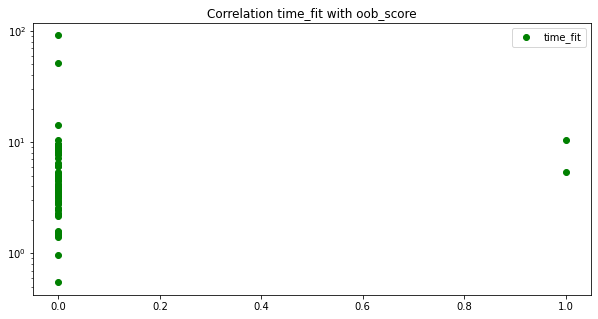

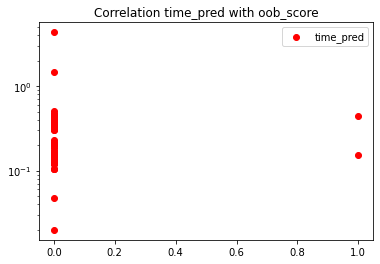

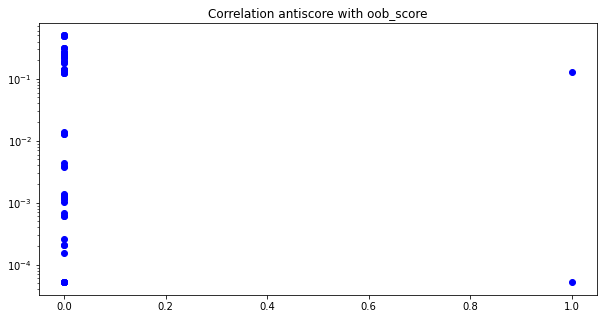

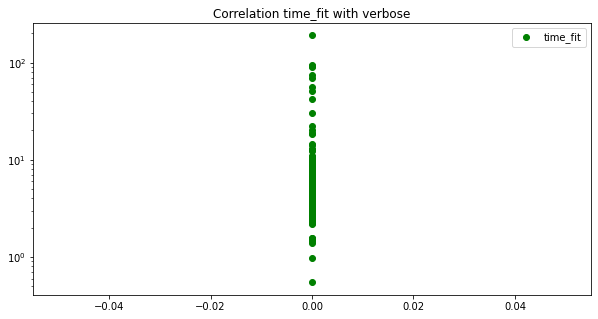

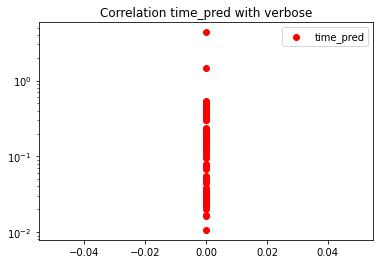

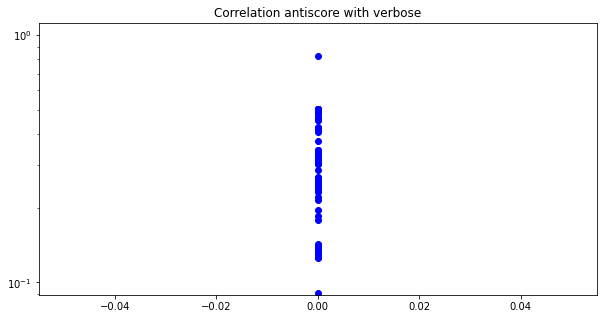

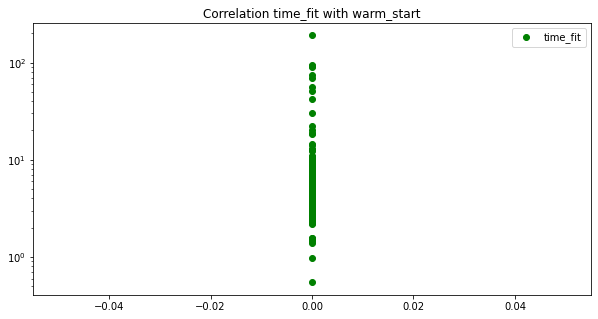

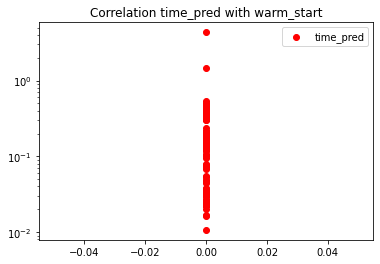

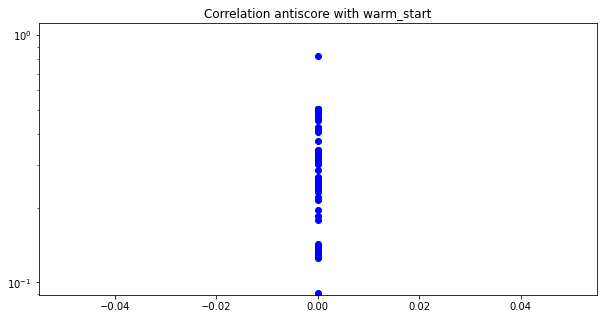

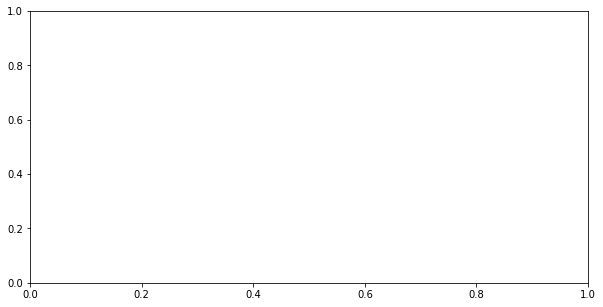

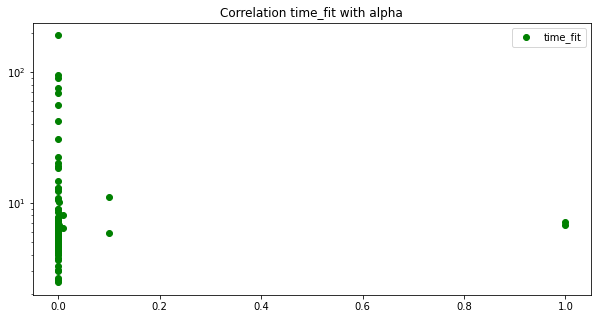

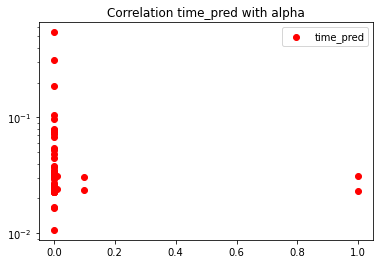

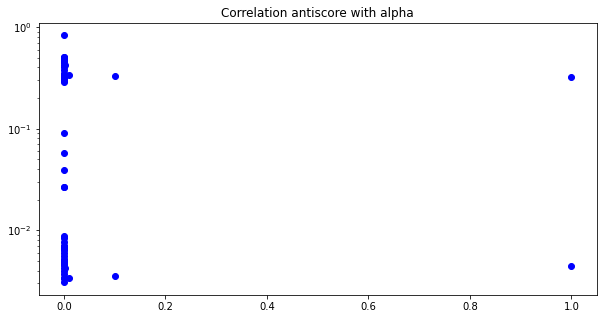

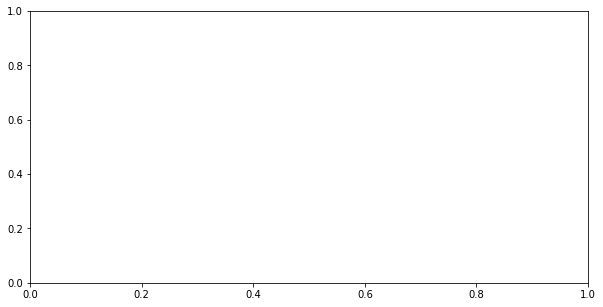

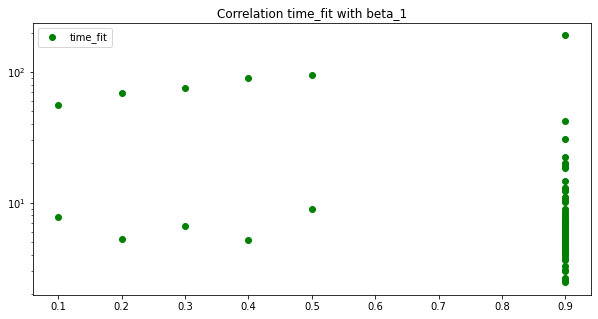

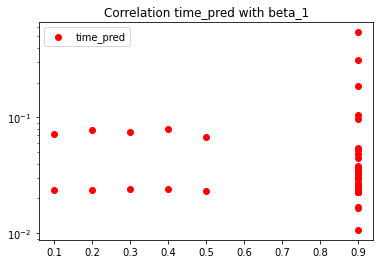

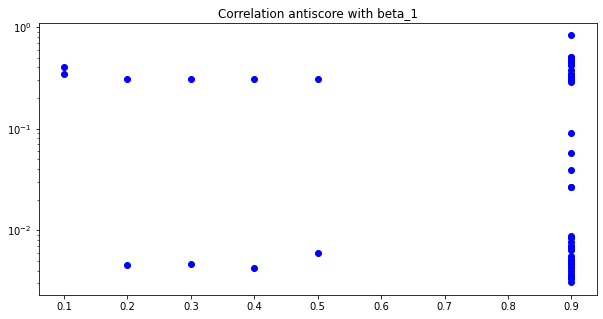

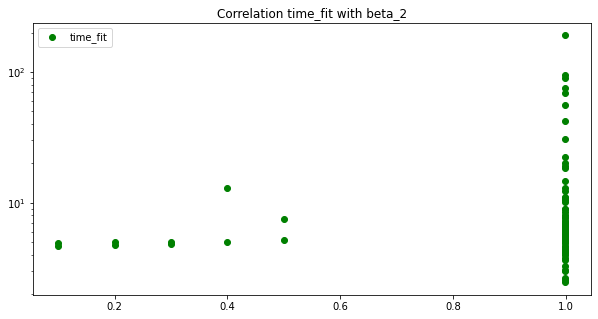

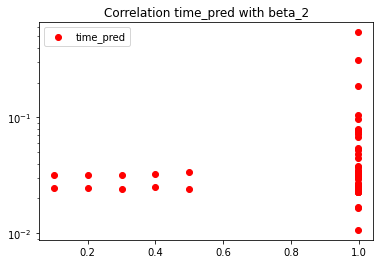

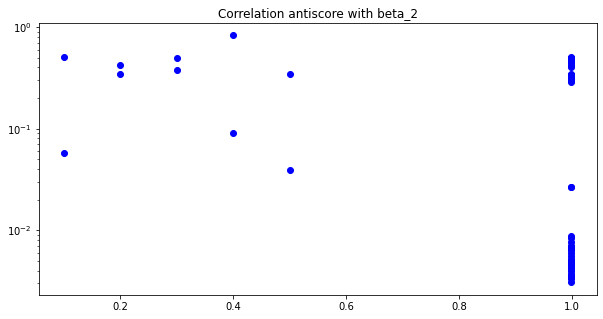

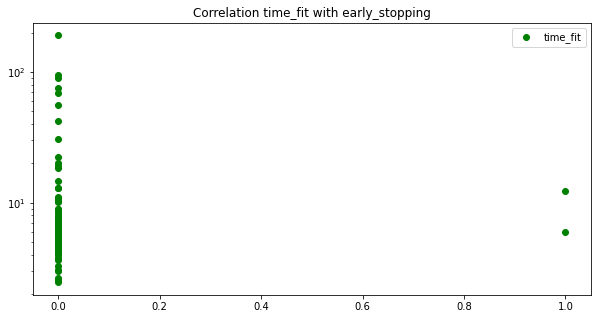

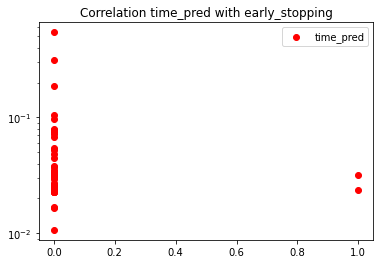

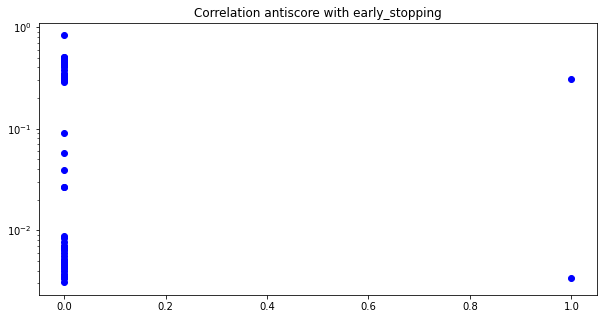

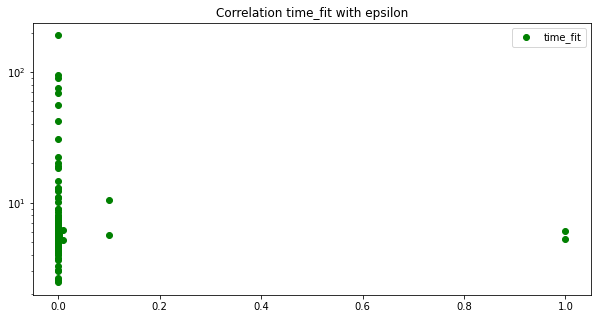

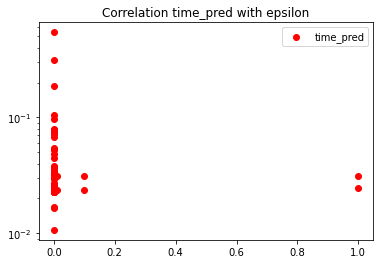

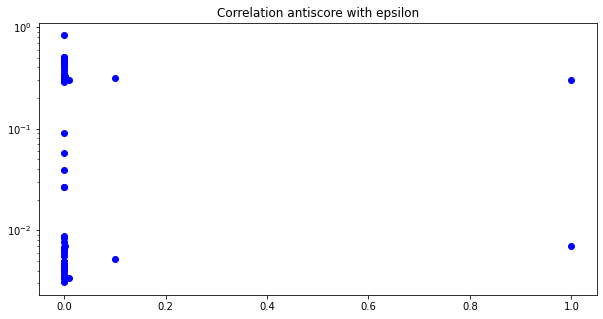

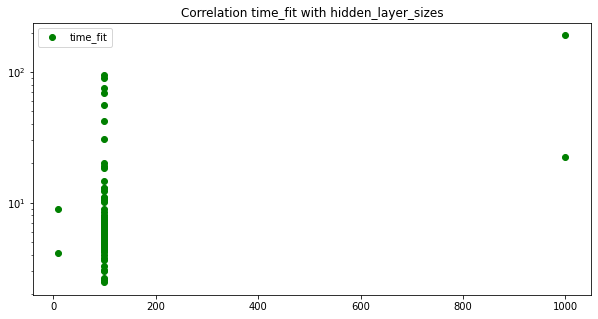

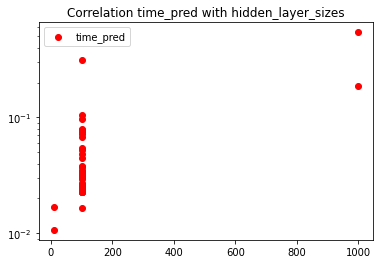

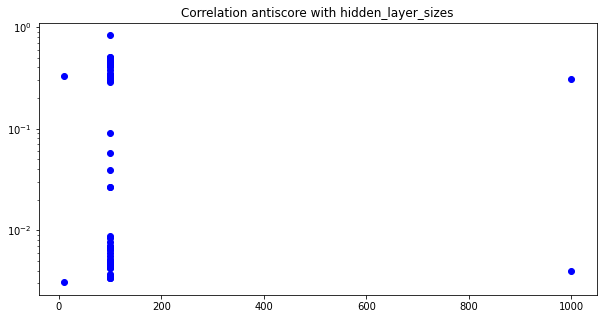

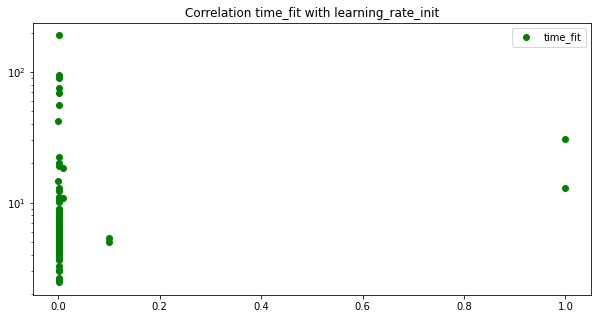

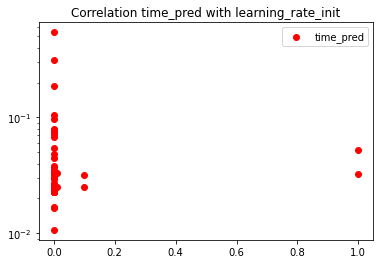

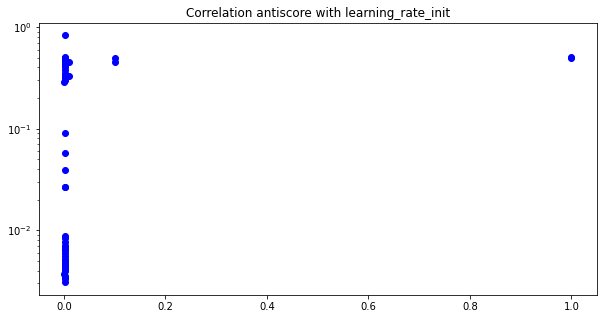

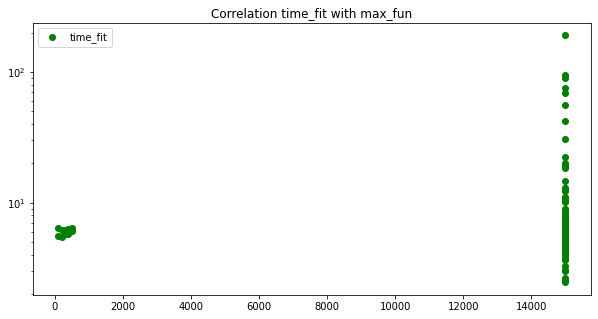

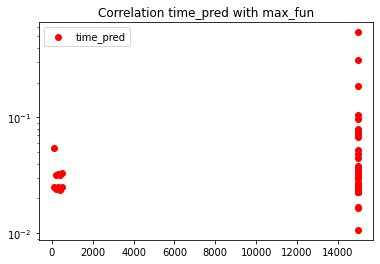

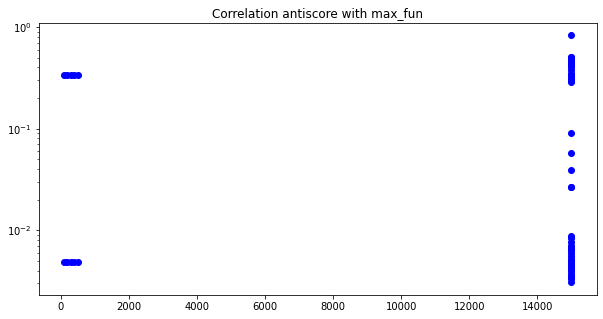

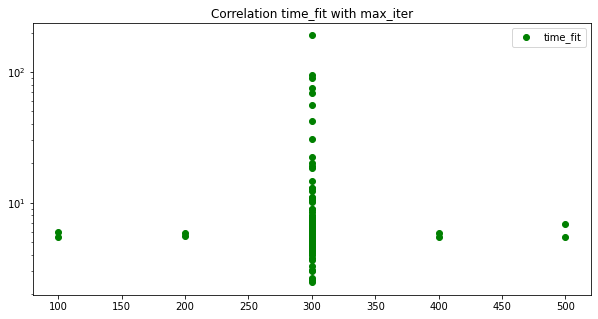

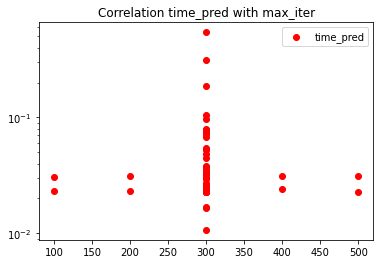

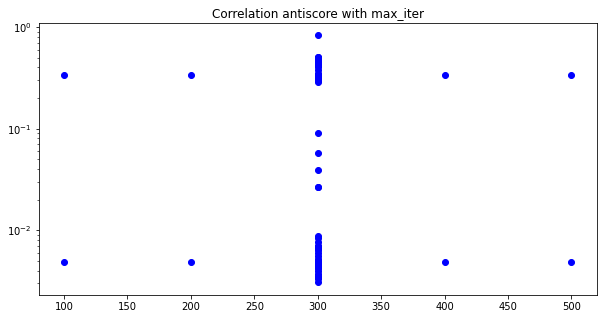

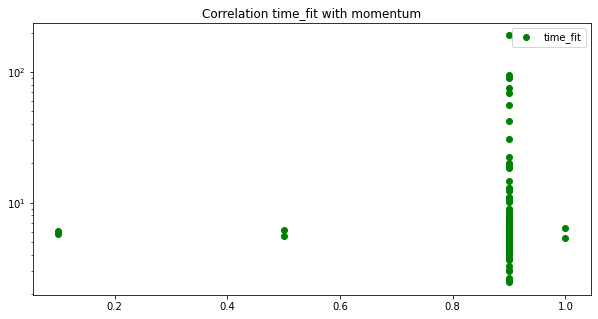

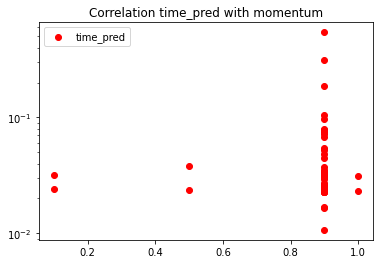

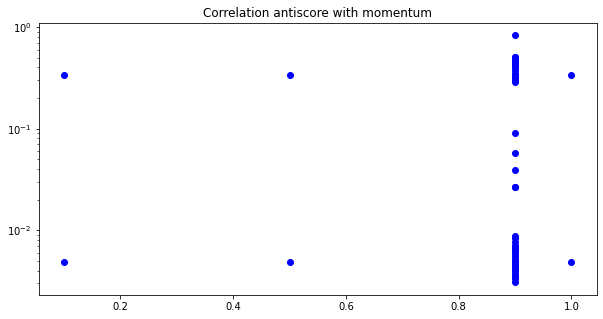

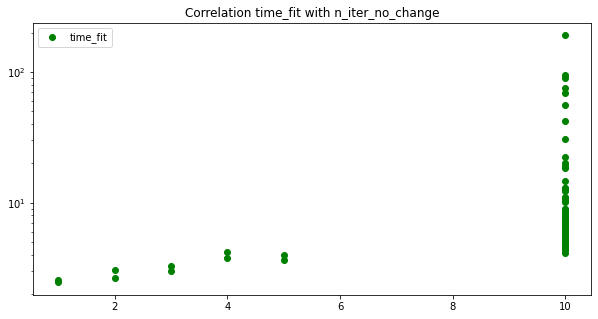

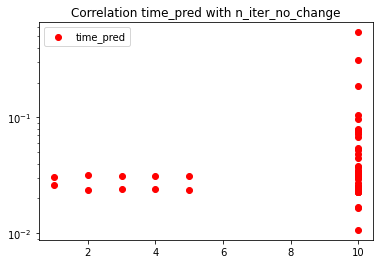

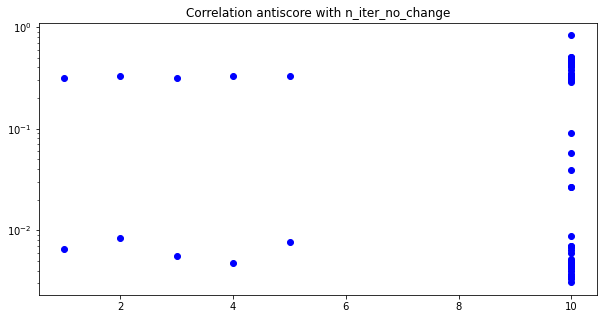

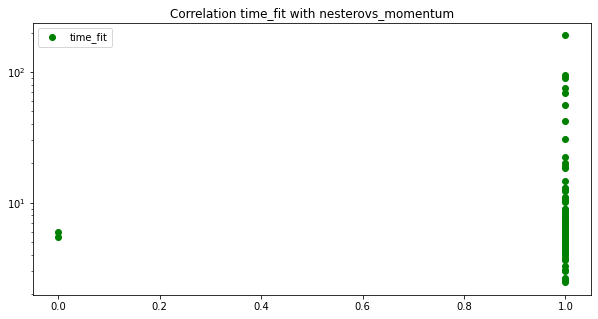

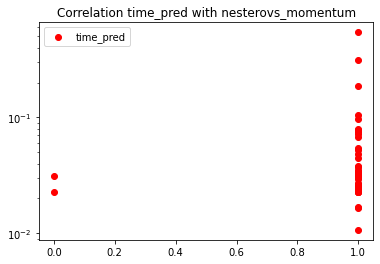

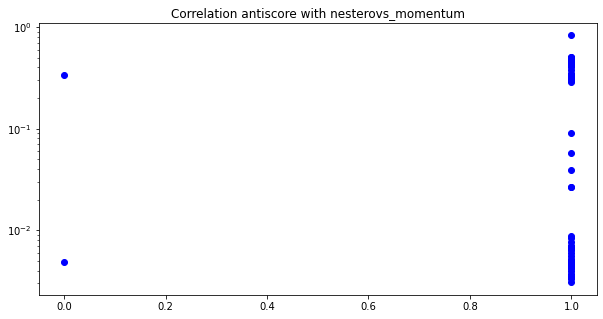

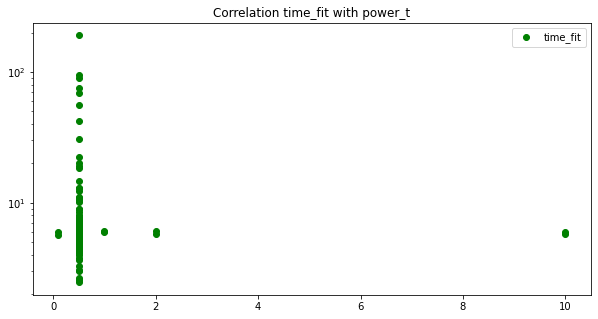

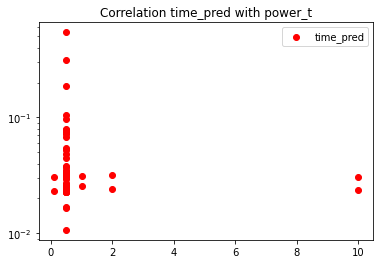

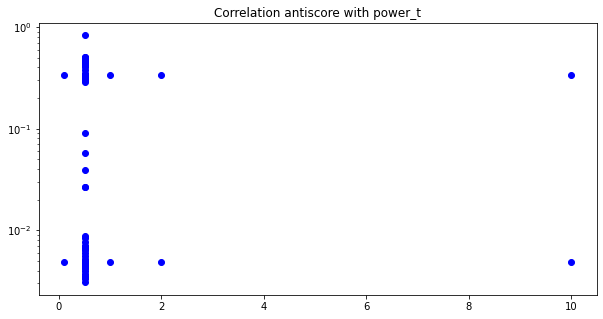

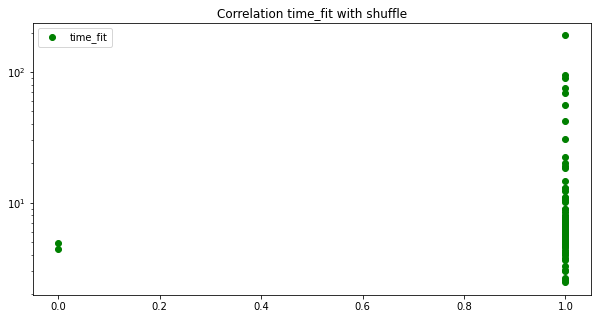

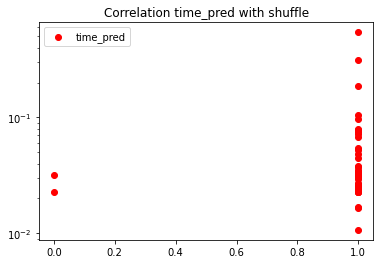

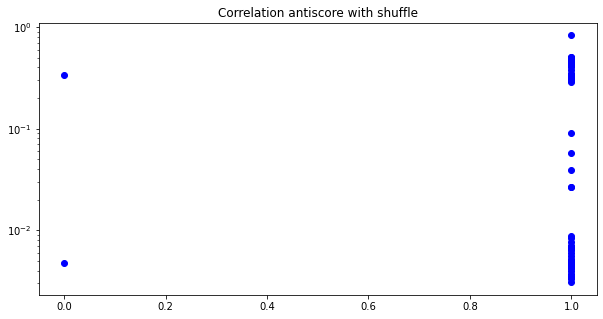

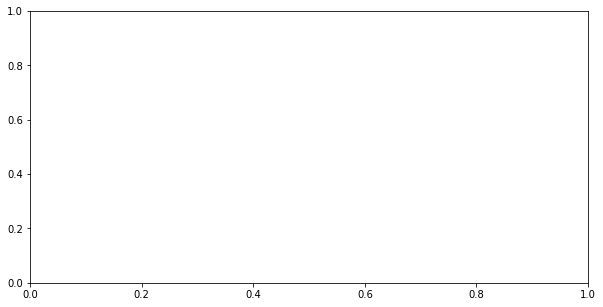

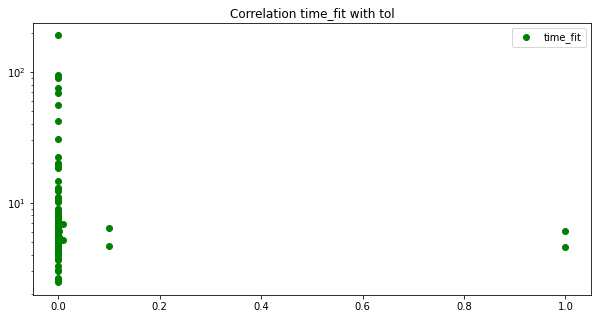

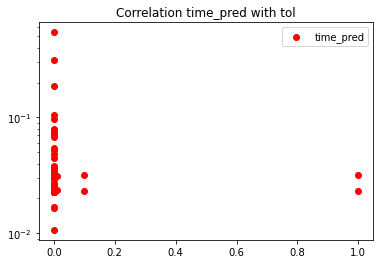

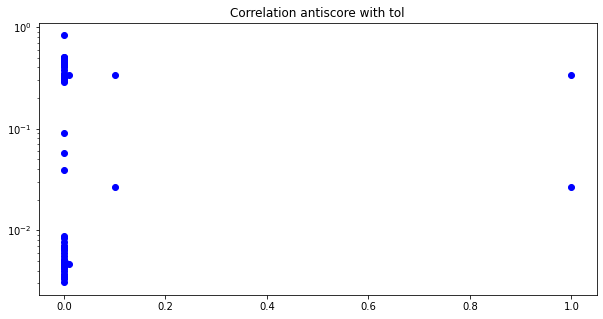

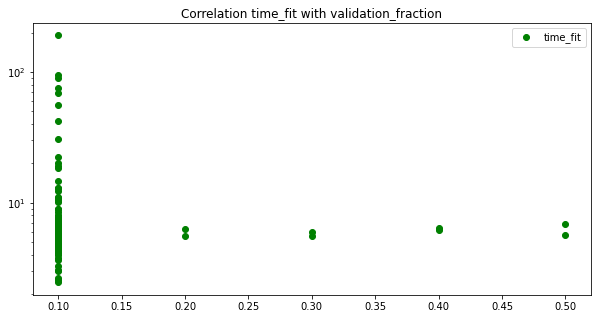

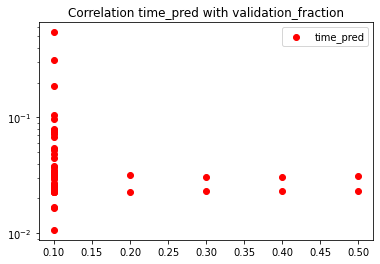

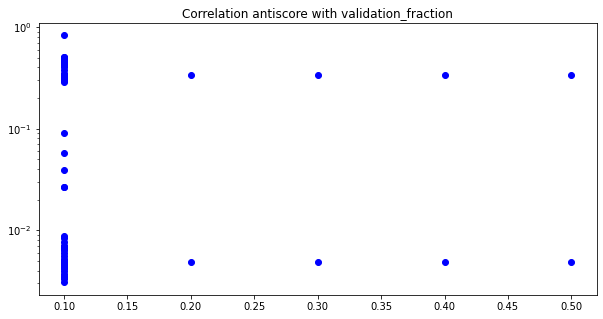

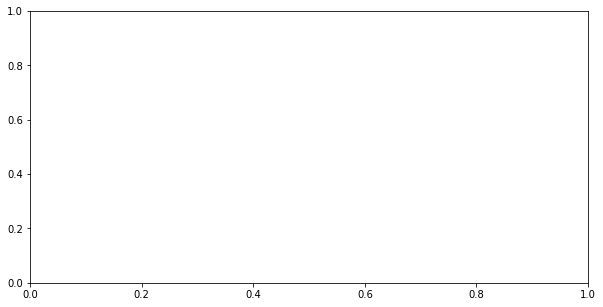

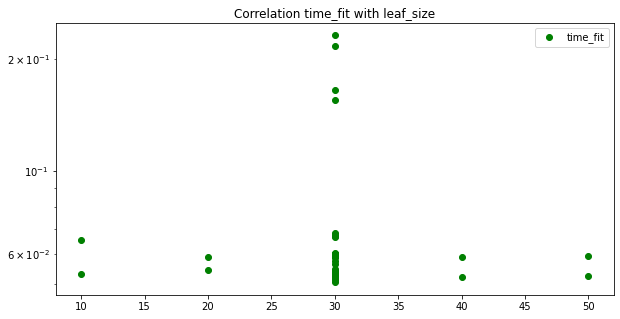

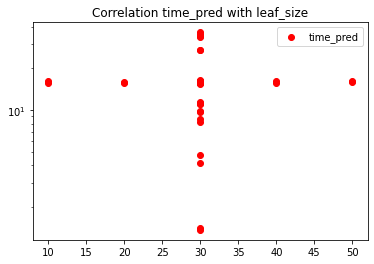

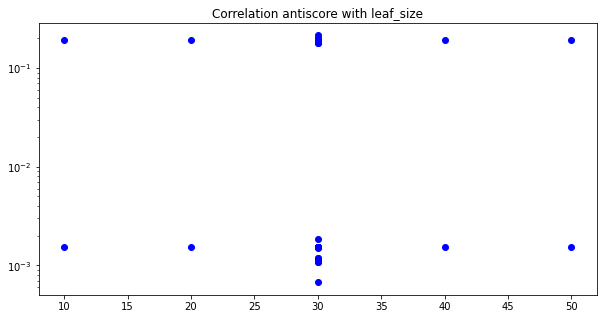

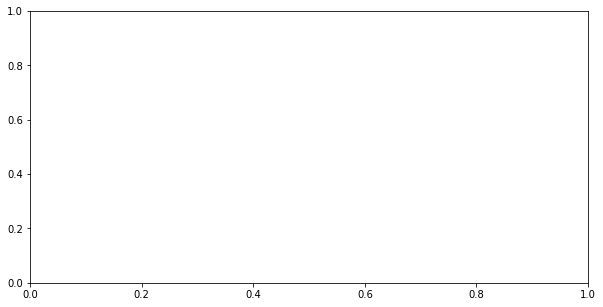

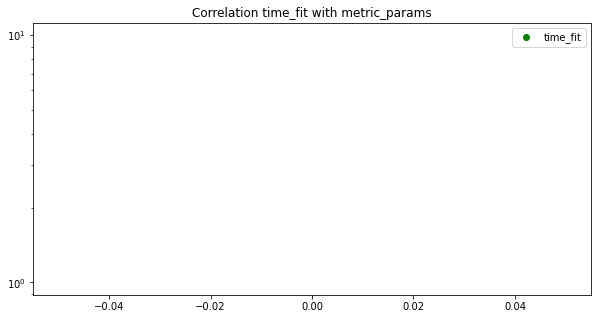

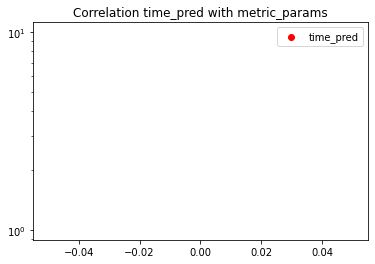

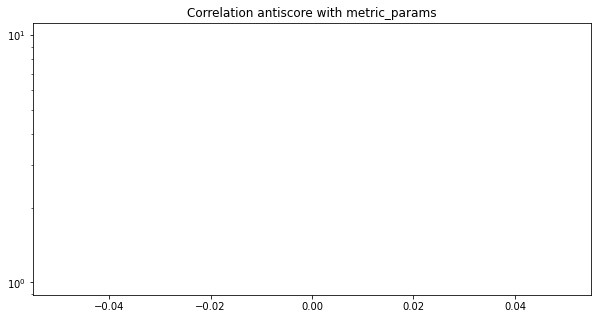

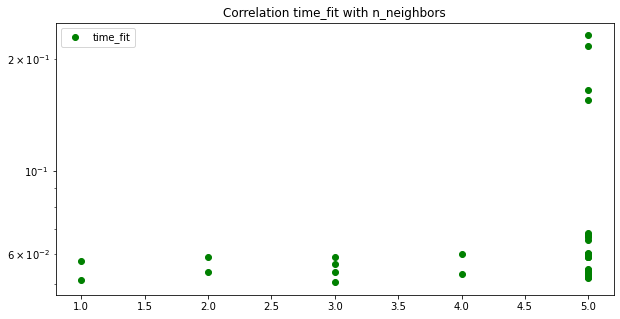

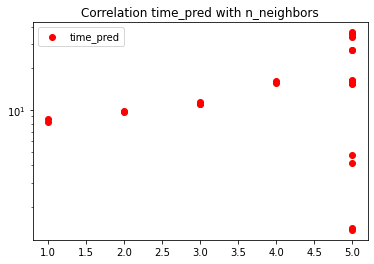

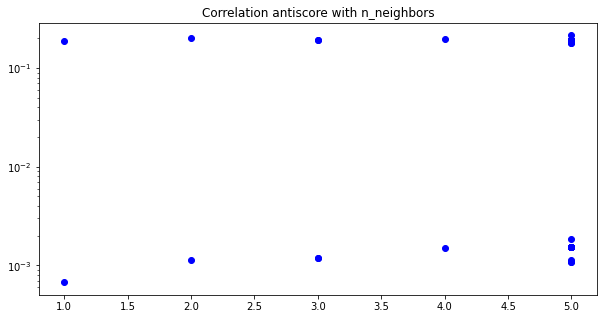

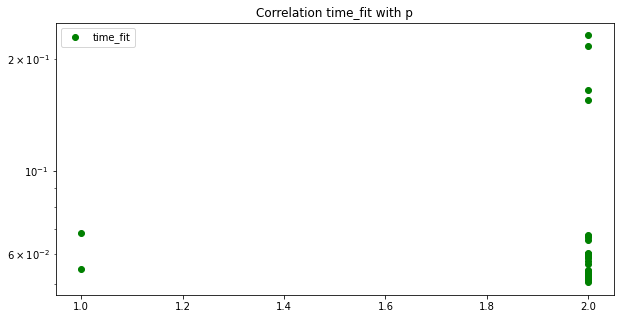

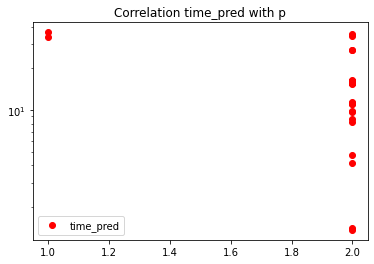

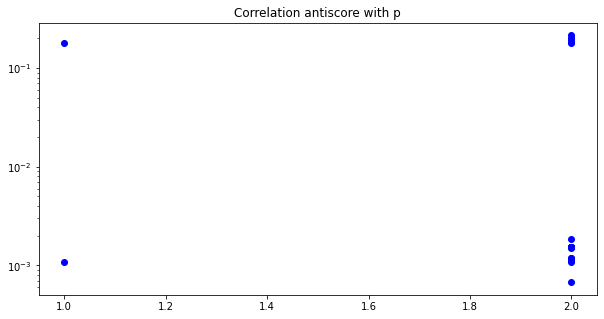

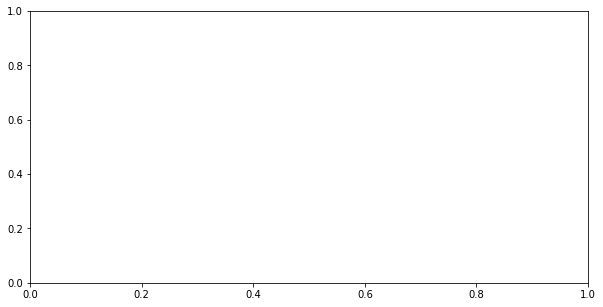

In [82]:
#df_plot = df.copy()
for param in df.columns:
    if param not in ["time_fit","time_pred","antiscore"]:
        #if df_plot[param].dtype == "object":
        #    df_plot[param] = df_plot[param].astype('category').cat.codes
        # with legend
        try:
            plt.figure(figsize=(10, 5))
            plt.scatter(df[param], df["time_fit"], color='g', label="time_fit")
            plt.yscale('log')
            plt.title('Correlation time_fit with ' + param)
            plt.legend()
            plt.show()
            plt.scatter(df[param], df["time_pred"], color='r', label="time_pred")
            plt.yscale('log')
            plt.title('Correlation time_pred with '+param)
            plt.legend()
            plt.show()
            plt.figure(figsize=(10, 5))
            plt.scatter(df[param], df["antiscore"], color='b')
            plt.yscale('log')
            plt.title('Correlation antiscore with '+param)
            plt.show()
        except:
            pass 

# Trouver les meilleurs paramètres

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [84]:
def find_best_parameters(models_all,type,indicators,indicators_val):
    df = pd.DataFrame(columns=indicators)
    for model in models_all.keys():
        if model.startswith(type):
            for param in models_all[model].get_params():
                df.join(pd.DataFrame(columns=[param]))
    for model in models_all.keys():
        if model.startswith(type):
            for ind in indicators:
                df.loc[model,ind] = indicators_val[ind][model]
            for param in models_all[model].get_params():
                df.loc[model,param] = models_all[model].get_params()[param]
    X = df[indicators]
    y = df.drop(columns=indicators)
    y = pd.get_dummies(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)
    model_tf = keras.Sequential([keras.layers.Dense(128, activation='relu', input_shape=[len(X_train[0])]),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(len(y_test[0]))])
    #model_tf = keras.Sequential([])
    model_tf.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    history = model_tf.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=0)
    best = model_tf.predict([[0]*len(indicators)])
    for i in range(len(y.keys())):
        print(f"{y.keys()[i]} = {best[0][i]}")
    return model_tf, history, y, best

In [85]:
model_tf, history, y, best = find_best_parameters(models_all,"mlp",["time_fit","time_pred","antiscore"],{"time_fit":time_fit_all,"time_pred":time_pred_all,"antiscore":antiscore_all})

2022-11-29 15:52:09.683976: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-29 15:52:09.910568: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


alpha = -12.856667518615723
beta_1 = -10.3270902633667
beta_2 = -1.7654829025268555
epsilon = 4.908565044403076
hidden_layer_sizes = 224.09860229492188
learning_rate_init = -8.35724925994873
max_fun = 11763.9306640625
max_iter = 197.96995544433594
momentum = -7.344945430755615
n_iter_no_change = -3.5816240310668945
power_t = -5.175094127655029
random_state = 111.14611053466797
tol = -2.029825448989868
validation_fraction = 2.9256162643432617
activation_identity = -2.3401896953582764
activation_logistic = 13.799301147460938
activation_relu = -0.030456729233264923
activation_tanh = 5.870625972747803
batch_size_auto = -1.907262921333313
early_stopping_False = 2.3199522495269775
early_stopping_True = -2.388721466064453
learning_rate_adaptive = -3.15993332862854
learning_rate_constant = 2.134174108505249
learning_rate_invscaling = -3.730236768722534
nesterovs_momentum_False = 0.27238476276397705
nesterovs_momentum_True = 13.283690452575684
shuffle_False = -0.9573097229003906
shuffle_True = 

In [86]:
test_model("mlp_best",MLPClassifier,alpha = 0, beta_1 = 0.99999999999, beta_2 = 0, epsilon = 0.00001, hidden_layer_sizes = 110, learning_rate_init = 0.23760008811950684, max_fun = 13148.3505859375, max_iter = 296, momentum = 0, n_iter_no_change = 8.396625518798828, power_t = 4.656700611114502, random_state = 42, tol = -1.833219051361084, validation_fraction = 0, activation="tanh", batch_size="auto", early_stopping=False, learning_rate="constant", nesterovs_momentum=True, shuffle=False, solver="sgd")

--->  mlp_best
temps de fit :  88.7629644870758
temps de prédiction :  0.041567087173461914
antiscore :  0.4578269638516833
